In [1]:
import numpy as np
np.__version__

'1.19.5'

In [2]:
import pandas as pd
pd.__version__

'1.1.5'

In [3]:
import matplotlib
matplotlib.__version__

'3.1.0'

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [6]:
import scipy
scipy.__version__

'1.5.4'

In [7]:
from scipy import stats

In [8]:
default_max_columns=pd.get_option('display.max_columns')

In [9]:
default_max_rows=pd.get_option('display.max_rows')

In [10]:
default_precision=pd.get_option('display.precision')

In [11]:
pd.set_option('display.precision', 2)

In [12]:
default_threshold=np.get_printoptions()['threshold']

In [13]:
np.set_printoptions(threshold=10000000)

# Read meta data

In [14]:
meta = pd.read_csv('20210428-EV/metadata.csv')

In [15]:
meta.head()

Rand 2 Batch_order D-plex Sequencing ID Lexogen Sequencing ID  \
0                1_1             SFHH005a              SFHH006a   
1                1_2             SFHH005b              SFHH006b   
2                1_3             SFHH005c              SFHH006c   
3                1_4             SFHH005d              SFHH006d   
4                1_5             SFHH005e              SFHH006e   

                                        Diagnosis  
0                              GBM, IDH1R132H WT,  
1  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
2                                GBM, IDH-mutant,  
3                                GBM, IDH-mutant,  
4                              GBM, IDH1R132H WT,

In [16]:
meta.rename(columns={"Rand 2 Batch_order": "subject"},inplace=True)
meta.rename(columns={"D-plex Sequencing ID": "dplex"},inplace=True)
meta.rename(columns={"Lexogen Sequencing ID": "lexogen"},inplace=True)
meta.rename(columns={"Diagnosis": "diag"},inplace=True)
#meta.set_index('subject',inplace=True)

In [17]:
meta

subject      dplex    lexogen  \
0      1_1   SFHH005a   SFHH006a   
1      1_2   SFHH005b   SFHH006b   
2      1_3   SFHH005c   SFHH006c   
3      1_4   SFHH005d   SFHH006d   
4      1_5   SFHH005e   SFHH006e   
5      1_6   SFHH005f   SFHH006f   
6      1_7   SFHH005g   SFHH006g   
7      1_8   SFHH005h   SFHH006h   
8      1_9   SFHH005i   SFHH006i   
9     1_10   SFHH005j   SFHH006j   
10    1_11   SFHH005k   SFHH006k   
11     2_1   SFHH005l   SFHH006l   
12     2_2   SFHH005m   SFHH006m   
13     2_3   SFHH005n   SFHH006n   
14     2_4   SFHH005o   SFHH006o   
15     2_5   SFHH005p   SFHH006p   
16     2_6   SFHH005q   SFHH006q   
17     2_7   SFHH005r   SFHH006r   
18     2_8   SFHH005s   SFHH006s   
19     2_9   SFHH005t   SFHH006t   
20    2_10   SFHH005u   SFHH006u   
21    2_11   SFHH005v   SFHH006v   
22     3_1   SFHH005w   SFHH006w   
23     3_2   SFHH005x   SFHH006x   
24     3_3   SFHH005y   SFHH006y   
25     3_4   SFHH005z   SFHH006z   
26     3_5  SFHH005aa  SFHH006aa   
27     3_6  SFHH005ab  SFHH006ab   
28     3_7  SFHH005ac  SFHH006ac   
29     3_8  SFHH005ad  SFHH006ad   
30     3_9  SFHH005ae  SFHH006ae   
31    3_10  SFHH005af  SFHH006af   
32    3_11  SFHH005ag  SFHH006ag   
33     4_1  SFHH005ah  SFHH006ah   
34     4_2  SFHH005ai  SFHH006ai   
35     4_3  SFHH005aj  SFHH006aj   
36     4_4  SFHH005ak  SFHH006ak   
37     4_5  SFHH005al  SFHH006al   
38     4_6  SFHH005am  SFHH006am   
39     4_7  SFHH005an  SFHH006an   
40     4_8  SFHH005ao  SFHH006ao   
41     4_9  SFHH005ap  SFHH006ap   
42    4_10  SFHH005aq  SFHH006aq   
43    4_11  SFHH005ar  SFHH006ar   

                                              diag  
0                               GBM, IDH1R132H WT,  
1   Oligodendroglioma, IDH-mutant, 1p19q codeleted  
2                                 GBM, IDH-mutant,  
3                                 GBM, IDH-mutant,  
4                               GBM, IDH1R132H WT,  
5                 Diffuse Astrocytoma, IDH-mutant,  
6   Oligodendroglioma, IDH-mutant, 1p19q codeleted  
7                               GBM, IDH1R132H WT,  
8                                 GBM, IDH-mutant,  
9                 Diffuse Astrocytoma, IDH-mutant,  
10                              V01 control (S1),,  
11                Diffuse Astrocytoma, IDH-mutant,  
12                              GBM, IDH1R132H WT,  
13                Diffuse Astrocytoma, IDH-mutant,  
14                              GBM, IDH1R132H WT,  
15                Diffuse Astrocytoma, IDH-mutant,  
16                                GBM, IDH-mutant,  
17                                GBM, IDH-mutant,  
18  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
19  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
20                              GBM, IDH1R132H WT,  
21                                   blank1 (C1),,  
22                                GBM, IDH-mutant,  
23  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
24                Diffuse Astrocytoma, IDH-mutant,  
25                                GBM, IDH-mutant,  
26                                GBM, IDH-mutant,  
27                Diffuse Astrocytoma, IDH-mutant,  
28  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
29                Diffuse Astrocytoma, IDH-mutant,  
30                Diffuse Astrocytoma, IDH-mutant,  
31                                GBM, IDH-mutant,  
32                              V01 control (S1),,  
33  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
34                              GBM, IDH1R132H WT,  
35                                GBM, IDH-mutant,  
36                              GBM, IDH1R132H WT,  
37  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
38                              GBM, IDH1R132H WT,  
39                              GBM, IDH1R132H WT,  
40  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
41  Oligodendroglioma, IDH-mutant, 1p19q codeleted  
42                Diffuse Astrocytoma, IDH-mutant,  
43                                  blank 2 (C1),,

In [18]:
meta[['disease','idh','x1p19q']] = meta['diag'].str.split(",", 2, expand=True)
#meta.drop('diag',axis='columns',inplace=True)

In [19]:
meta

subject      dplex    lexogen  \
0      1_1   SFHH005a   SFHH006a   
1      1_2   SFHH005b   SFHH006b   
2      1_3   SFHH005c   SFHH006c   
3      1_4   SFHH005d   SFHH006d   
4      1_5   SFHH005e   SFHH006e   
5      1_6   SFHH005f   SFHH006f   
6      1_7   SFHH005g   SFHH006g   
7      1_8   SFHH005h   SFHH006h   
8      1_9   SFHH005i   SFHH006i   
9     1_10   SFHH005j   SFHH006j   
10    1_11   SFHH005k   SFHH006k   
11     2_1   SFHH005l   SFHH006l   
12     2_2   SFHH005m   SFHH006m   
13     2_3   SFHH005n   SFHH006n   
14     2_4   SFHH005o   SFHH006o   
15     2_5   SFHH005p   SFHH006p   
16     2_6   SFHH005q   SFHH006q   
17     2_7   SFHH005r   SFHH006r   
18     2_8   SFHH005s   SFHH006s   
19     2_9   SFHH005t   SFHH006t   
20    2_10   SFHH005u   SFHH006u   
21    2_11   SFHH005v   SFHH006v   
22     3_1   SFHH005w   SFHH006w   
23     3_2   SFHH005x   SFHH006x   
24     3_3   SFHH005y   SFHH006y   
25     3_4   SFHH005z   SFHH006z   
26     3_5  SFHH005aa  SFHH006aa   
27     3_6  SFHH005ab  SFHH006ab   
28     3_7  SFHH005ac  SFHH006ac   
29     3_8  SFHH005ad  SFHH006ad   
30     3_9  SFHH005ae  SFHH006ae   
31    3_10  SFHH005af  SFHH006af   
32    3_11  SFHH005ag  SFHH006ag   
33     4_1  SFHH005ah  SFHH006ah   
34     4_2  SFHH005ai  SFHH006ai   
35     4_3  SFHH005aj  SFHH006aj   
36     4_4  SFHH005ak  SFHH006ak   
37     4_5  SFHH005al  SFHH006al   
38     4_6  SFHH005am  SFHH006am   
39     4_7  SFHH005an  SFHH006an   
40     4_8  SFHH005ao  SFHH006ao   
41     4_9  SFHH005ap  SFHH006ap   
42    4_10  SFHH005aq  SFHH006aq   
43    4_11  SFHH005ar  SFHH006ar   

                                              diag              disease  \
0                               GBM, IDH1R132H WT,                  GBM   
1   Oligodendroglioma, IDH-mutant, 1p19q codeleted    Oligodendroglioma   
2                                 GBM, IDH-mutant,                  GBM   
3                                 GBM, IDH-mutant,                  GBM   
4                               GBM, IDH1R132H WT,                  GBM   
5                 Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
6   Oligodendroglioma, IDH-mutant, 1p19q codeleted    Oligodendroglioma   
7                               GBM, IDH1R132H WT,                  GBM   
8                                 GBM, IDH-mutant,                  GBM   
9                 Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
10                              V01 control (S1),,     V01 control (S1)   
11                Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
12                              GBM, IDH1R132H WT,                  GBM   
13                Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
14                              GBM, IDH1R132H WT,                  GBM   
15                Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
16                                GBM, IDH-mutant,                  GBM   
17                                GBM, IDH-mutant,                  GBM   
18  Oligodendroglioma, IDH-mutant, 1p19q codeleted    Oligodendroglioma   
19  Oligodendroglioma, IDH-mutant, 1p19q codeleted    Oligodendroglioma   
20                              GBM, IDH1R132H WT,                  GBM   
21                                   blank1 (C1),,          blank1 (C1)   
22                                GBM, IDH-mutant,                  GBM   
23  Oligodendroglioma, IDH-mutant, 1p19q codeleted    Oligodendroglioma   
24                Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
25                                GBM, IDH-mutant,                  GBM   
26                                GBM, IDH-mutant,                  GBM   
27                Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
28  Oligodendroglioma, IDH-mutant, 1p19q codeleted    Oligodendroglioma   
29                Diffuse Astrocytoma, IDH-mutant,  Diffuse Astrocytoma   
30                Diffuse Astrocytoma, IDH-mutant,  Diffu

# Read raw matrix

In [20]:
df = pd.read_csv('20210428-EV/report.csv',index_col=0,header=None)

In [21]:
df.shape

(133, 528)

In [22]:
df.head(12)

1          2          3          4    \
0                                                                             
                                 SFHH005aa  SFHH005aa  SFHH005aa  SFHH005aa   
---                                    ---        ---        ---        ---   
Subject                                3_5        3_5        3_5        3_5   
Lab kit                             D-plex     D-plex     D-plex     D-plex   
Trimmer                             bbduk1     bbduk2     bbduk3  cutadapt1   
Raw Read Count                     7706323    7706323    7706323    7706323   
Raw Read Length                        201        201        201        201   
Trimmed Read Count                 4578177    7054912    7067406    4879448   
Trimmed Ave Read Length            57.8849    60.3426    60.5684    132.375   
STAR Aligned to Transcriptome        99328     140222     138584     105508   
STAR Aligned to Transcriptome %       2.16       1.98       1.96       2.16   
STAR Aligned to Genome             1192402    2852663    2842961    3297454   

                                       5          6          7          8    \
0                                                                             
                                 SFHH005aa  SFHH005aa  SFHH005ab  SFHH005ab   
---                                    ---        ---        ---        ---   
Subject                                3_5        3_5        3_6        3_6   
Lab kit                             D-plex     D-plex     D-plex     D-plex   
Trimmer                          cutadapt2  cutadapt3     bbduk1     bbduk2   
Raw Read Count                     7706323    7706323   10555114   10555114   
Raw Read Length                        201        201        201        201   
Trimmed Read Count                 4877655    4877495    8524196   10205171   
Trimmed Ave Read Length             131.86    131.853    57.5903    67.8537   
STAR Aligned to Transcriptome       119834     119714      95308     141326   
STAR Aligned to Transcriptome %       2.45       2.45       1.11       1.38   
STAR Aligned to Genome             3312585    3312614    1387724    2593560   

                                       9          10   ...       519  \
0                                                      ...             
                                 SFHH005ab  SFHH005ab  ...  SFHH006y   
---                                    ---        ---  ...       ---   
Subject                                3_6        3_6  ...       3_3   
Lab kit                             D-plex     D-plex  ...   Lexogen   
Trimmer                             bbduk3  cutadapt1  ...    bbduk3   
Raw Read Count                    10555114   10555114  ...  10323625   
Raw Read Length                        201        201  ...       201   
Trimmed Read Count                10212051    8828603  ...   3781877   
Trimmed Ave Read Length            67.9501    152.468  ...   35.3093   
STAR Aligned to Transcriptome       138939      69646  ...    349522   
STAR Aligned to Transcriptome %       1.36        .78  ...      9.24   
STAR Aligned to Genome             2585854    1465216  ...   1587163   

                                       520        521        522       523  \
0                                                                            
                                  SFHH006y   SFHH006y   SFHH006y  SFHH006z   
---                                    ---        ---        ---       ---   
Subject                                3_3        3_3        3_3       3_4   
Lab kit                            Lexogen    Lexogen    Lexogen   Lexogen   
Trimmer                          cutadapt1  cutadapt2  cutadapt3    bbduk1   
Raw Read Count                    10323625   10323625   10323625  13959130   
Raw Read Length                        201        201        201       201   
Trimmed Read Count                 3796529    3738351    3735601   4571854   
Trimmed Ave Read Length            4

In [23]:
df.drop("---",inplace=True)

In [24]:
df.shape

(132, 528)

In [25]:
df.rename({'  ':'sample'},axis='rows',inplace=True)

In [26]:
df

1          2          3          4          5    \
0                                                                               
sample                  SFHH005aa  SFHH005aa  SFHH005aa  SFHH005aa  SFHH005aa   
Subject                       3_5        3_5        3_5        3_5        3_5   
Lab kit                    D-plex     D-plex     D-plex     D-plex     D-plex   
Trimmer                    bbduk1     bbduk2     bbduk3  cutadapt1  cutadapt2   
Raw Read Count            7706323    7706323    7706323    7706323    7706323   
...                           ...        ...        ...        ...        ...   
hsa-mir-6787-5p-mature        799         33         31       1034       1034   
hsa-mir-1281-hairpin        14186        121        103      20096      20096   
hsa-mir-6887-hairpin        20494         78         68      15303      15303   
hsa-mir-6887-5p-mature      20259         76         66      15056      15056   
hsa-mir-3613-3p-mature          2      12246      12209         35         35   

                              6          7          8          9          10   \
0                                                                               
sample                  SFHH005aa  SFHH005ab  SFHH005ab  SFHH005ab  SFHH005ab   
Subject                       3_5        3_6        3_6        3_6        3_6   
Lab kit                    D-plex     D-plex     D-plex     D-plex     D-plex   
Trimmer                 cutadapt3     bbduk1     bbduk2     bbduk3  cutadapt1   
Raw Read Count            7706323   10555114   10555114   10555114   10555114   
...                           ...        ...        ...        ...        ...   
hsa-mir-6787-5p-mature       1034        560         11         10        607   
hsa-mir-1281-hairpin        20096       1706         11         10       2295   
hsa-mir-6887-hairpin        15303       5381         24         21       3893   
hsa-mir-6887-5p-mature      15056       4837         22         19       3509   
hsa-mir-3613-3p-mature         35          7       8655       8577         12   

                        ...       519        520        521        522  \
0                       ...                                              
sample                  ...  SFHH006y   SFHH006y   SFHH006y   SFHH006y   
Subject                 ...       3_3        3_3        3_3        3_3   
Lab kit                 ...   Lexogen    Lexogen    Lexogen    Lexogen   
Trimmer                 ...    bbduk3  cutadapt1  cutadapt2  cutadapt3   
Raw Read Count          ...  10323625   10323625   10323625   10323625   
...                     ...       ...        ...        ...        ...   
hsa-mir-6787-5p-mature  ...      5011       5114       5168       5169   
hsa-mir-1281-hairpin    ...        79         79         79         79   
hsa-mir-6887-hairpin    ...       245        204        205        205   
hsa-mir-6887-5p-mature  ...       102         67         68         68   
hsa-mir-3613-3p-mature  ...       196        187        189        188   

                             523       524       525        526        527  \
0                                                                            
sample                  SFHH006z  SFHH006z  SFHH006z   SFHH006z   SFHH006z   
Subject                      3_4       3_4       3_4        3_4        3_4   
Lab kit                  Lexogen   Lexogen   Lexogen    Lexogen    Lexogen   
Trimmer                   bbduk1    bbduk2    bbduk3  cutadapt1  cutadapt2   
Raw Read Count          13959130  13959130  13959130   13959130   13959130   
...                          ...       ...       ...        ...        ...   
hsa-mir-6787-5p-mature      7729      7714      7691       7699       7755   
hsa-mir-1281-hairpin          50        50        50         46         48   
hsa-mir-6887-hairpin         241       241       242        235        237   
hsa-mir-6887-5p-mature        58        58        59         57         59   
hsa-mir-3613-3p-mature 

In [27]:
df=df.T

In [28]:
df.head()

0     sample Subject Lab kit    Trimmer Raw Read Count Raw Read Length  \
1  SFHH005aa     3_5  D-plex     bbduk1        7706323             201   
2  SFHH005aa     3_5  D-plex     bbduk2        7706323             201   
3  SFHH005aa     3_5  D-plex     bbduk3        7706323             201   
4  SFHH005aa     3_5  D-plex  cutadapt1        7706323             201   
5  SFHH005aa     3_5  D-plex  cutadapt2        7706323             201   

0 Trimmed Read Count Trimmed Ave Read Length STAR Aligned to Transcriptome  \
1            4578177                 57.8849                         99328   
2            7054912                 60.3426                        140222   
3            7067406                 60.5684                        138584   
4            4879448                 132.375                        105508   
5            4877655                  131.86                        119834   

0 STAR Aligned to Transcriptome %  ... hsa-mir-509-1-hairpin  \
1                            2.16  ...                   152   
2                            1.98  ...                    54   
3                            1.96  ...                    52   
4                            2.16  ...                   276   
5                            2.45  ...                   276   

0 hsa-mir-892b-hairpin hsa-mir-509-2-hairpin hsa-mir-509-3-hairpin  \
1                  166                   152                   116   
2                  161                    54                    54   
3                  158                    52                    52   
4                  268                   276                   276   
5                  269                   276                   276   

0 hsa-mir-6787-hairpin hsa-mir-6787-5p-mature hsa-mir-1281-hairpin  \
1                  874                    799                14186   
2                   36                     33                  121   
3                   33                     31                  103   
4                 1255                   1034                20096   
5                 1255                   1034                20096   

0 hsa-mir-6887-hairpin hsa-mir-6887-5p-mature hsa-mir-3613-3p-mature  
1                20494                  20259                      2  
2                   78                     76                  12246  
3                   68                     66                  12209  
4                15303                  15056                     35  
5                15303                  15056                     35  

[5 rows x 132 columns]

In [29]:
df=df.merge(meta,left_on='Subject',right_on='subject')

In [30]:
df.head()

sample Subject Lab kit    Trimmer Raw Read Count Raw Read Length  \
0  SFHH005aa     3_5  D-plex     bbduk1        7706323             201   
1  SFHH005aa     3_5  D-plex     bbduk2        7706323             201   
2  SFHH005aa     3_5  D-plex     bbduk3        7706323             201   
3  SFHH005aa     3_5  D-plex  cutadapt1        7706323             201   
4  SFHH005aa     3_5  D-plex  cutadapt2        7706323             201   

  Trimmed Read Count Trimmed Ave Read Length STAR Aligned to Transcriptome  \
0            4578177                 57.8849                         99328   
1            7054912                 60.3426                        140222   
2            7067406                 60.5684                        138584   
3            4879448                 132.375                        105508   
4            4877655                  131.86                        119834   

  STAR Aligned to Transcriptome %  ... hsa-mir-6887-hairpin  \
0                            2.16  ...                20494   
1                            1.98  ...                   78   
2                            1.96  ...                   68   
3                            2.16  ...                15303   
4                            2.45  ...                15303   

  hsa-mir-6887-5p-mature hsa-mir-3613-3p-mature subject      dplex    lexogen  \
0                  20259                      2     3_5  SFHH005aa  SFHH006aa   
1                     76                  12246     3_5  SFHH005aa  SFHH006aa   
2                     66                  12209     3_5  SFHH005aa  SFHH006aa   
3                  15056                     35     3_5  SFHH005aa  SFHH006aa   
4                  15056                     35     3_5  SFHH005aa  SFHH006aa   

               diag disease          idh x1p19q  
0  GBM, IDH-mutant,     GBM   IDH-mutant         
1  GBM, IDH-mutant,     GBM   IDH-mutant         
2  GBM, IDH-mutant,     GBM   IDH-mutant         
3  GBM, IDH-mutant,     GBM   IDH-mutant         
4  GBM, IDH-mutant,     GBM   IDH-mutant         

[5 rows x 139 columns]

In [31]:
df.columns

Index(['sample', 'Subject', 'Lab kit', 'Trimmer', 'Raw Read Count',
       'Raw Read Length', 'Trimmed Read Count', 'Trimmed Ave Read Length',
       'STAR Aligned to Transcriptome', 'STAR Aligned to Transcriptome %',
       ...
       'hsa-mir-6887-hairpin', 'hsa-mir-6887-5p-mature',
       'hsa-mir-3613-3p-mature', 'subject', 'dplex', 'lexogen', 'diag',
       'disease', 'idh', 'x1p19q'],
      dtype='object', length=139)


---
Subject
Lab kit
Trimmer
Raw Read Count
Raw Read Length
Trimmed Read Count
Trimmed Ave Read Length
STAR Aligned to Transcriptome
STAR Aligned to Transcriptome %
STAR Aligned to Genome
STAR Aligned to Genome %
STAR Unaligned
STAR Unaligned %
STAR Unmapped
STAR Unmapped %
Bowtie2 Aligned to hg38 (1)
Bowtie2 Aligned to hg38 (1) %
STAR Aligned to mirna
STAR Aligned to mirna %
Bowtie Aligned to mirna
Bowtie Aligned to mirna %
Bowtie2 Aligned to mirna
Bowtie2 Aligned to mirna %
Bowtie2 Aligned to phiX
Bowtie2 Aligned to phiX %
Bowtie2 Aligned to Salmonella
Bowtie2 Aligned to Salmonella %
Bowtie2 Aligned to Burkholderia
Bowtie2 Aligned to Burkholderia %
STAR Gene Counts
LOC102724859
RPH3A
PLCE1
ADGRG6
CCDC151
IGF2
P2RX6
PIGG
MAPT
MIR486-1
MIR486-2
RO60
RWDD2A
RARS2
LOC100335030
NAALADL2
HASPIN
NOL4L
GOLGA2P10
KCNN3
RNA45SN2
GREM2
RNA45SN3
RNA45SN4
RNA45SN1
RNA45SN5
PACS2
MECP2
CASP1P2
FGD2
KIF18B
MIRLET7BHG
FRMD4A
ZMYM2
GRB10
RNA28SN2
RNA28SN3
RNA28SN1
RNA28SN5
RNA28SN4
AHDC1
INS-IGF2
MICAL2
NOTCH2NLB
TTN
TTC21A
TUBGCP4
WSB1
EDEM3
NACC2
STAR miRNA Counts
hsa-mir-4329-hairpin
hsa-mir-5588-hairpin
hsa-mir-92b-hairpin
hsa-mir-4271-hairpin
hsa-mir-548u-hairpin
hsa-mir-1260a-hairpin
hsa-mir-944-hairpin
hsa-mir-10226-hairpin
hsa-mir-4538-hairpin
hsa-mir-4538-mature
hsa-mir-552-hairpin
hsa-mir-486-1-hairpin
hsa-mir-486-2-hairpin
hsa-mir-3908-hairpin
hsa-mir-3168-hairpin
hsa-mir-3168-mature
hsa-mir-4314-hairpin
hsa-mir-3613-hairpin
hsa-mir-6735-hairpin
hsa-mir-8086-hairpin
hsa-mir-137-hairpin
hsa-mir-552-3p-mature
hsa-mir-4668-hairpin
hsa-mir-4668-5p-mature
hsa-mir-484-hairpin
hsa-mir-486-5p-mature
hsa-mir-216b-hairpin
hsa-mir-3658-hairpin
hsa-mir-4283-2-hairpin
hsa-mir-4283-1-hairpin
hsa-mir-1273c-hairpin
hsa-mir-567-hairpin
hsa-mir-3183-hairpin
hsa-mir-1303-hairpin
hsa-mir-662-hairpin
hsa-mir-184-hairpin
hsa-mir-7110-hairpin
hsa-mir-8052-hairpin
hsa-mir-3613-5p-mature
hsa-mir-8052-mature
hsa-mir-509-1-hairpin
hsa-mir-892b-hairpin
hsa-mir-509-2-hairpin
hsa-mir-509-3-hairpin
hsa-mir-6787-hairpin
hsa-mir-6787-5p-mature
hsa-mir-1281-hairpin
hsa-mir-6887-hairpin
hsa-mir-6887-5p-mature
hsa-mir-3613-3p-mature

In [32]:
mirnas=df.columns[82:132]

In [33]:
genes=df.columns[31:81]

In [34]:
#df.dtypes[df.columns[82:132]]

In [35]:
#df["normal_"+mirnas]=
#df[mirnas]/df[:,'Raw Read Count']
#tmp['normalized']=
#\df.apply(lambda row: row[mirnas].astype(str).astype(int)/row['Raw Read Count'].astype(str).astype(int), axis=1 )
#df[mirnas]/df.loc[:,'Raw Read Count']

#pd.to_numeric(df[mirna[0]])

#df.apply(lambda row: row[mirnas]/9999, axis=1 )
#df[mirnas].to_numeric()/999


#close but drops non-mirna columns
#df=


#normalize=df.apply(lambda row: 1e9*pd.to_numeric(row[mirnas])/pd.to_numeric(row['Raw Read Count']), axis=1 )


In [36]:
#normalize.columns="normalized_"+normalize[mirnas].columns

In [37]:
#normalize.head()

# Normalize by Raw Read Count

In [38]:
dfn=df.copy()

In [39]:
dfn.head()

sample Subject Lab kit    Trimmer Raw Read Count Raw Read Length  \
0  SFHH005aa     3_5  D-plex     bbduk1        7706323             201   
1  SFHH005aa     3_5  D-plex     bbduk2        7706323             201   
2  SFHH005aa     3_5  D-plex     bbduk3        7706323             201   
3  SFHH005aa     3_5  D-plex  cutadapt1        7706323             201   
4  SFHH005aa     3_5  D-plex  cutadapt2        7706323             201   

  Trimmed Read Count Trimmed Ave Read Length STAR Aligned to Transcriptome  \
0            4578177                 57.8849                         99328   
1            7054912                 60.3426                        140222   
2            7067406                 60.5684                        138584   
3            4879448                 132.375                        105508   
4            4877655                  131.86                        119834   

  STAR Aligned to Transcriptome %  ... hsa-mir-6887-hairpin  \
0                            2.16  ...                20494   
1                            1.98  ...                   78   
2                            1.96  ...                   68   
3                            2.16  ...                15303   
4                            2.45  ...                15303   

  hsa-mir-6887-5p-mature hsa-mir-3613-3p-mature subject      dplex    lexogen  \
0                  20259                      2     3_5  SFHH005aa  SFHH006aa   
1                     76                  12246     3_5  SFHH005aa  SFHH006aa   
2                     66                  12209     3_5  SFHH005aa  SFHH006aa   
3                  15056                     35     3_5  SFHH005aa  SFHH006aa   
4                  15056                     35     3_5  SFHH005aa  SFHH006aa   

               diag disease          idh x1p19q  
0  GBM, IDH-mutant,     GBM   IDH-mutant         
1  GBM, IDH-mutant,     GBM   IDH-mutant         
2  GBM, IDH-mutant,     GBM   IDH-mutant         
3  GBM, IDH-mutant,     GBM   IDH-mutant         
4  GBM, IDH-mutant,     GBM   IDH-mutant         

[5 rows x 139 columns]

In [40]:
dfn[mirnas].head()

hsa-mir-4329-hairpin hsa-mir-5588-hairpin hsa-mir-92b-hairpin  \
0                   37                    2                 337   
1               504505               164998              130955   
2               492709               169068              127250   
3                  178                  121                1250   
4                  178                  121                1251   

  hsa-mir-4271-hairpin hsa-mir-548u-hairpin hsa-mir-1260a-hairpin  \
0                  968                    7                   355   
1                84567               211982                  1300   
2                81636               207177                  1278   
3                 2630                  307                  1035   
4                 2630                  307                  1035   

  hsa-mir-944-hairpin hsa-mir-10226-hairpin hsa-mir-4538-hairpin  \
0                 380                  4846                   32   
1                  31                  4799                  NaN   
2                  30                  4799                  NaN   
3                 694                    71                   18   
4                 694                    71                   18   

  hsa-mir-4538-mature  ... hsa-mir-509-1-hairpin hsa-mir-892b-hairpin  \
0                  28  ...                   152                  166   
1                 NaN  ...                    54                  161   
2                 NaN  ...                    52                  158   
3                  15  ...                   276                  268   
4                  15  ...                   276                  269   

  hsa-mir-509-2-hairpin hsa-mir-509-3-hairpin hsa-mir-6787-hairpin  \
0                   152                   116                  874   
1                    54                    54                   36   
2                    52                    52                   33   
3                   276                   276                 1255   
4                   276                   276                 1255   

  hsa-mir-6787-5p-mature hsa-mir-1281-hairpin hsa-mir-6887-hairpin  \
0                    799                14186                20494   
1                     33                  121                   78   
2                     31                  103                   68   
3                   1034                20096                15303   
4                   1034                20096                15303   

  hsa-mir-6887-5p-mature hsa-mir-3613-3p-mature  
0                  20259                      2  
1                     76                  12246  
2                     66                  12209  
3                  15056                     35  
4                  15056                     35  

[5 rows x 50 columns]

In [41]:
dfn[mirnas]=dfn.apply(lambda row: 1e9*pd.to_numeric(row[mirnas])/pd.to_numeric(row['Raw Read Count']), axis=1 )


In [42]:
dfn[mirnas].head()

hsa-mir-4329-hairpin  hsa-mir-5588-hairpin  hsa-mir-92b-hairpin  \
0              4.80e+03              2.60e+02             4.37e+04   
1              6.55e+07              2.14e+07             1.70e+07   
2              6.39e+07              2.19e+07             1.65e+07   
3              2.31e+04              1.57e+04             1.62e+05   
4              2.31e+04              1.57e+04             1.62e+05   

   hsa-mir-4271-hairpin  hsa-mir-548u-hairpin  hsa-mir-1260a-hairpin  \
0              1.26e+05              9.08e+02               46066.07   
1              1.10e+07              2.75e+07              168692.64   
2              1.06e+07              2.69e+07              165837.85   
3              3.41e+05              3.98e+04              134305.30   
4              3.41e+05              3.98e+04              134305.30   

   hsa-mir-944-hairpin  hsa-mir-10226-hairpin  hsa-mir-4538-hairpin  \
0             49310.16              628834.27               4152.43   
1              4022.67              622735.38                   NaN   
2              3892.91              622735.38                   NaN   
3             90055.92                9213.21               2335.74   
4             90055.92                9213.21               2335.74   

   hsa-mir-4538-mature  ...  hsa-mir-509-1-hairpin  hsa-mir-892b-hairpin  \
0              3633.38  ...               19724.06              21540.75   
1                  NaN  ...                7007.23              20891.94   
2                  NaN  ...                6747.71              20502.64   
3              1946.45  ...               35814.75              34776.64   
4              1946.45  ...               35814.75              34906.40   

   hsa-mir-509-2-hairpin  hsa-mir-509-3-hairpin  hsa-mir-6787-hairpin  \
0               19724.06               15052.57             113413.36   
1                7007.23                7007.23               4671.49   
2                6747.71                6747.71               4282.20   
3               35814.75               35814.75             162853.28   
4               35814.75               35814.75             162853.28   

   hsa-mir-6787-5p-mature  hsa-mir-1281-hairpin  hsa-mir-6887-hairpin  \
0               103681.09              1.84e+06              2.66e+06   
1                 4282.20              1.57e+04              1.01e+04   
2                 4022.67              1.34e+04              8.82e+03   
3               134175.53              2.61e+06              1.99e+06   
4               134175.53              2.61e+06              1.99e+06   

   hsa-mir-6887-5p-mature  hsa-mir-3613-3p-mature  
0                2.63e+06                2.60e+02  
1                9.86e+03                1.59e+06  
2                8.56e+03                1.58e+06  
3                1.95e+06                4.54e+03  
4                1.95e+06                4.54e+03  

[5 rows x 50 columns]

In [43]:
dfn[genes].head()

LOC102724859 RPH3A PLCE1 ADGRG6 CCDC151   IGF2  P2RX6 PIGG MAPT MIR486-1  \
0          NaN   NaN  2660    481     152      7  67662  NaN   21      NaN   
1          NaN   NaN   252    NaN      24  39465   2583  NaN  NaN      NaN   
2          NaN   NaN   252    NaN      24  43385   2520  NaN  NaN      NaN   
3           34     1  2110    250     NaN     17  55125  NaN  NaN      NaN   
4           34     1  2110    250     NaN     17  55125  NaN  NaN      NaN   

   ...  AHDC1 INS-IGF2 MICAL2 NOTCH2NLB   TTN TTC21A TUBGCP4  WSB1 EDEM3 NACC2  
0  ...    336        1   2220        21  2124   5814      48     4  6636    28  
1  ...   9848     7893     78       NaN   144     38      30  4270   486   NaN  
2  ...  11708     8677     76       NaN   144     38      30  4190   450   NaN  
3  ...   2662        2   2960       206  4626   4826     216   NaN  7242    34  
4  ...   2662        2   2960       206  4626   4826     216   NaN  7242    34  

[5 rows x 50 columns]

In [44]:
dfn[genes]=dfn.apply(lambda row: 1e9*pd.to_numeric(row[genes])/pd.to_numeric(row['Raw Read Count']), axis=1 )


In [45]:
dfn[genes].head()

LOC102724859   RPH3A      PLCE1    ADGRG6   CCDC151      IGF2     P2RX6  \
0           NaN     NaN  345171.10  62416.28  19724.06  9.08e+02  8.78e+06   
1           NaN     NaN   32700.42       NaN   3114.33  5.12e+06  3.35e+05   
2           NaN     NaN   32700.42       NaN   3114.33  5.63e+06  3.27e+05   
3       4411.96  129.76  273801.14  32440.89       NaN  2.21e+03  7.15e+06   
4       4411.96  129.76  273801.14  32440.89       NaN  2.21e+03  7.15e+06   

   PIGG     MAPT  MIR486-1  ...     AHDC1  INS-IGF2     MICAL2  NOTCH2NLB  \
0   NaN  2725.04       NaN  ...  4.36e+04  1.30e+02  288075.13    2725.04   
1   NaN      NaN       NaN  ...  1.28e+06  1.02e+06   10121.56        NaN   
2   NaN      NaN       NaN  ...  1.52e+06  1.13e+06    9862.03        NaN   
3   NaN      NaN       NaN  ...  3.45e+05  2.60e+02  384100.17   26731.30   
4   NaN      NaN       NaN  ...  3.45e+05  2.60e+02  384100.17   26731.30   

         TTN     TTC21A   TUBGCP4       WSB1      EDEM3    NACC2  
0  275617.83  754445.41   6228.65     519.05  861111.06  3633.38  
1   18685.95    4931.02   3892.91  554090.45   63065.10      NaN  
2   18685.95    4931.02   3892.91  543709.37   58393.61      NaN  
3  600286.28  626239.00  28028.93        NaN  939747.79  4411.96  
4  600286.28  626239.00  28028.93        NaN  939747.79  4411.96  

[5 rows x 50 columns]

In [46]:
dfn.value_counts(['disease','idh','x1p19q'])

disease              idh            x1p19q          
Oligodendroglioma     IDH-mutant     1p19q codeleted    120
GBM                   IDH1R132H WT                      120
                      IDH-mutant                        120
Diffuse Astrocytoma   IDH-mutant                        120
V01 control (S1)                                         24
blank1 (C1)                                              12
blank 2 (C1)                                             12
dtype: int64

In [47]:
dfn.value_counts(['diag'])

diag                                          
Oligodendroglioma, IDH-mutant, 1p19q codeleted    120
GBM, IDH1R132H WT,                                120
GBM, IDH-mutant,                                  120
Diffuse Astrocytoma, IDH-mutant,                  120
V01 control (S1),,                                 24
blank1 (C1),,                                      12
blank 2 (C1),,                                     12
dtype: int64

In [48]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

hsa-mir-4329-hairpin D-plex bbduk2
	t = -1.8220299018653567
	p = 0.0851097019733531


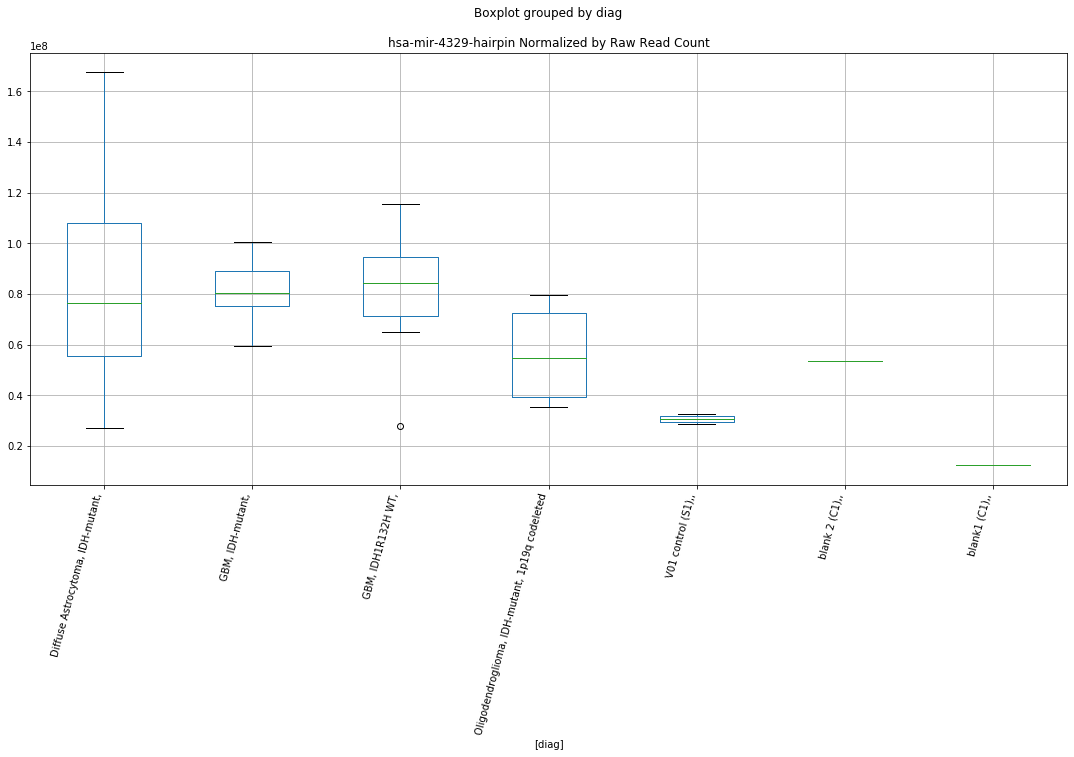

hsa-mir-4329-hairpin D-plex bbduk3
	t = -1.8188362804995875
	p = 0.08561432988659


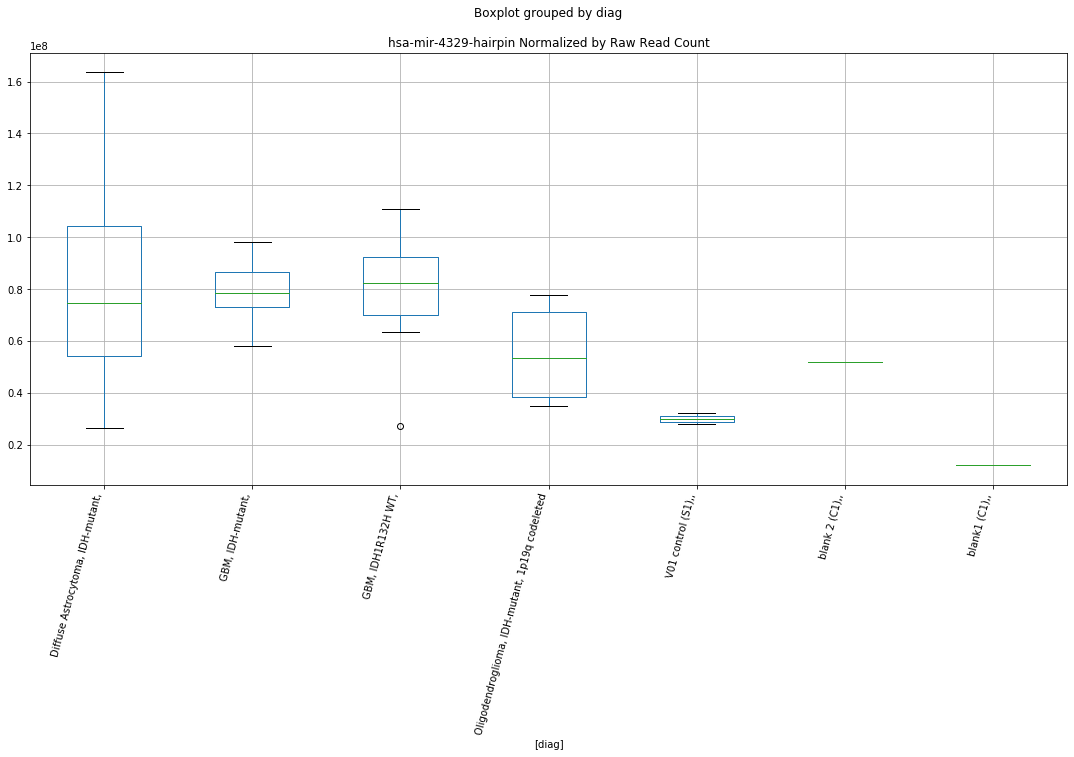

hsa-mir-548u-hairpin D-plex cutadapt1
	t = -1.9083055337899084
	p = 0.07243115896079615


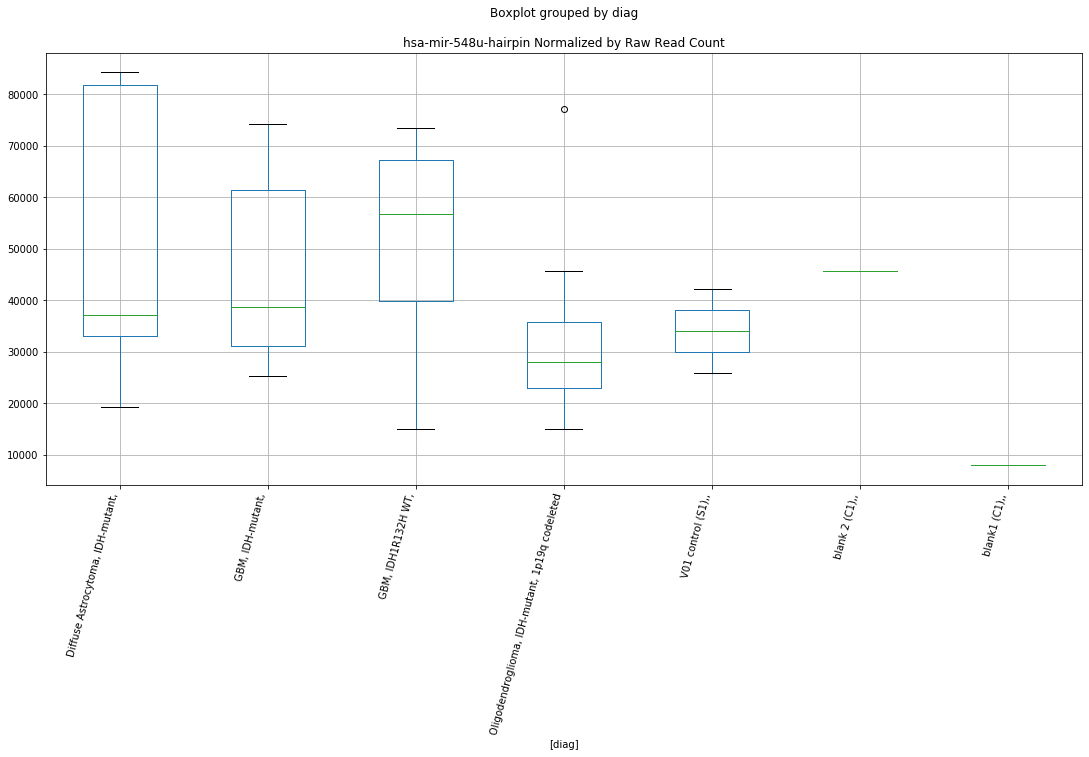

hsa-mir-548u-hairpin D-plex cutadapt2
	t = -1.9083055337899084
	p = 0.07243115896079615


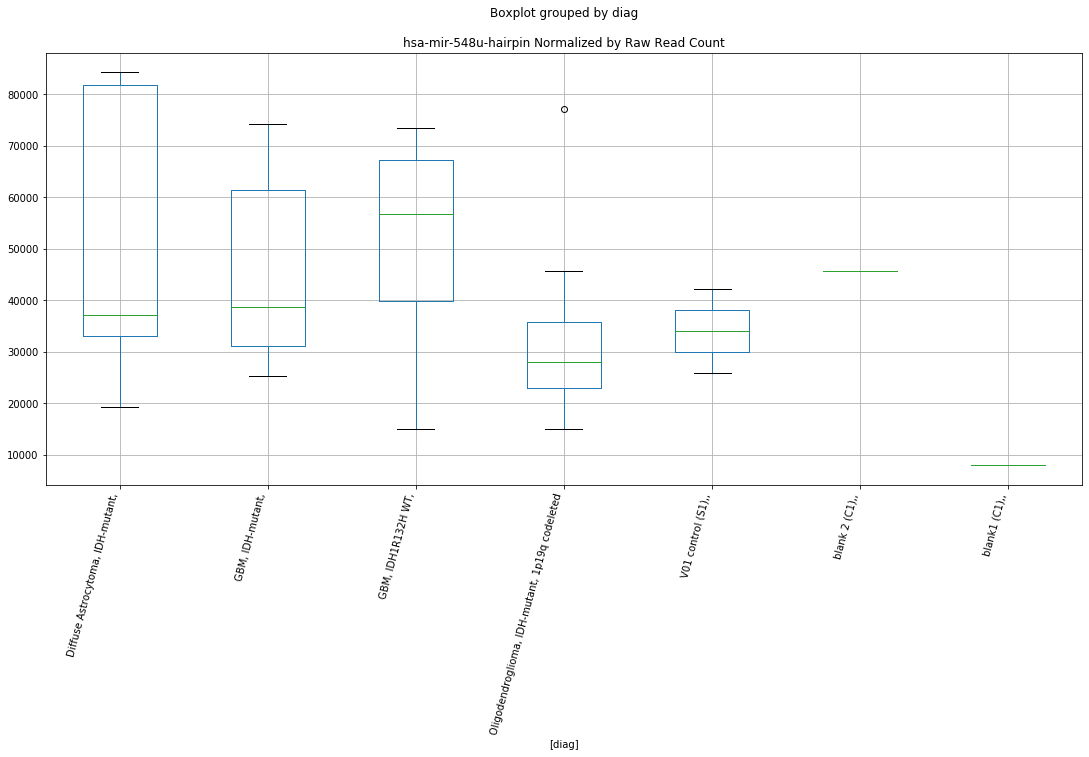

hsa-mir-548u-hairpin D-plex cutadapt3
	t = -1.9083055337899084
	p = 0.07243115896079615


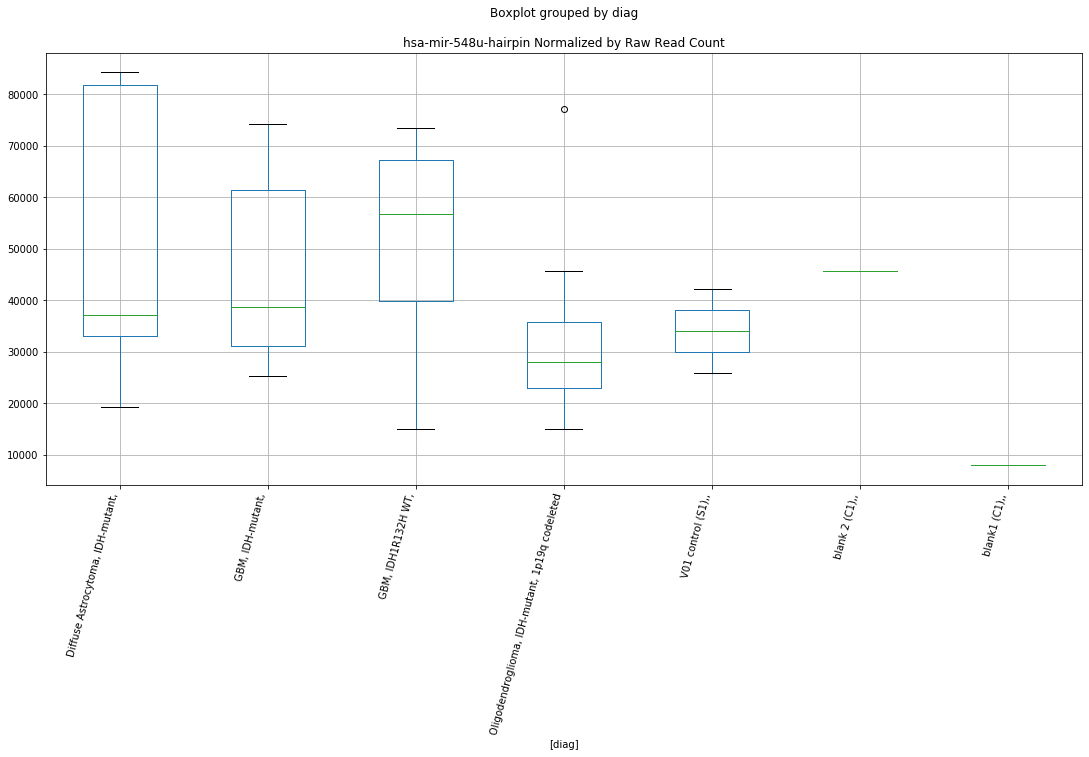

hsa-mir-3908-hairpin D-plex bbduk2
	t = -1.745027441956704
	p = 0.09802860052579611


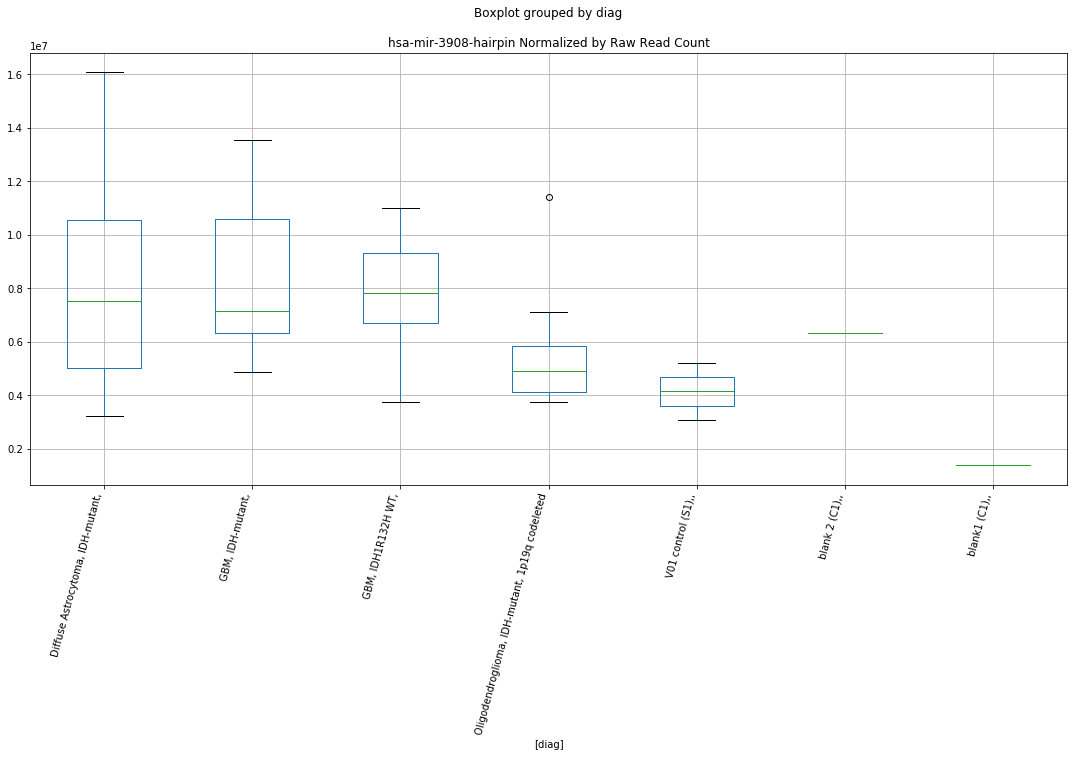

hsa-mir-3908-hairpin D-plex bbduk3
	t = -1.7478124262019827
	p = 0.09753322842163667


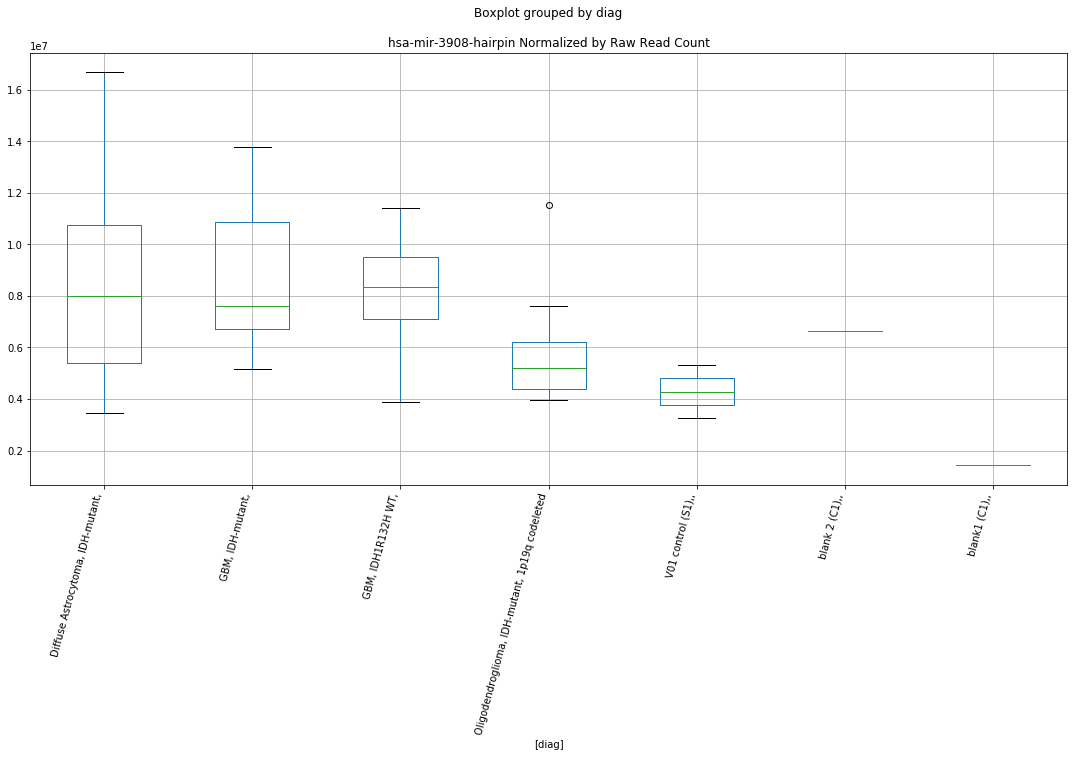

hsa-mir-4668-hairpin D-plex cutadapt1
	t = -1.812668982247556
	p = 0.08659625763795067


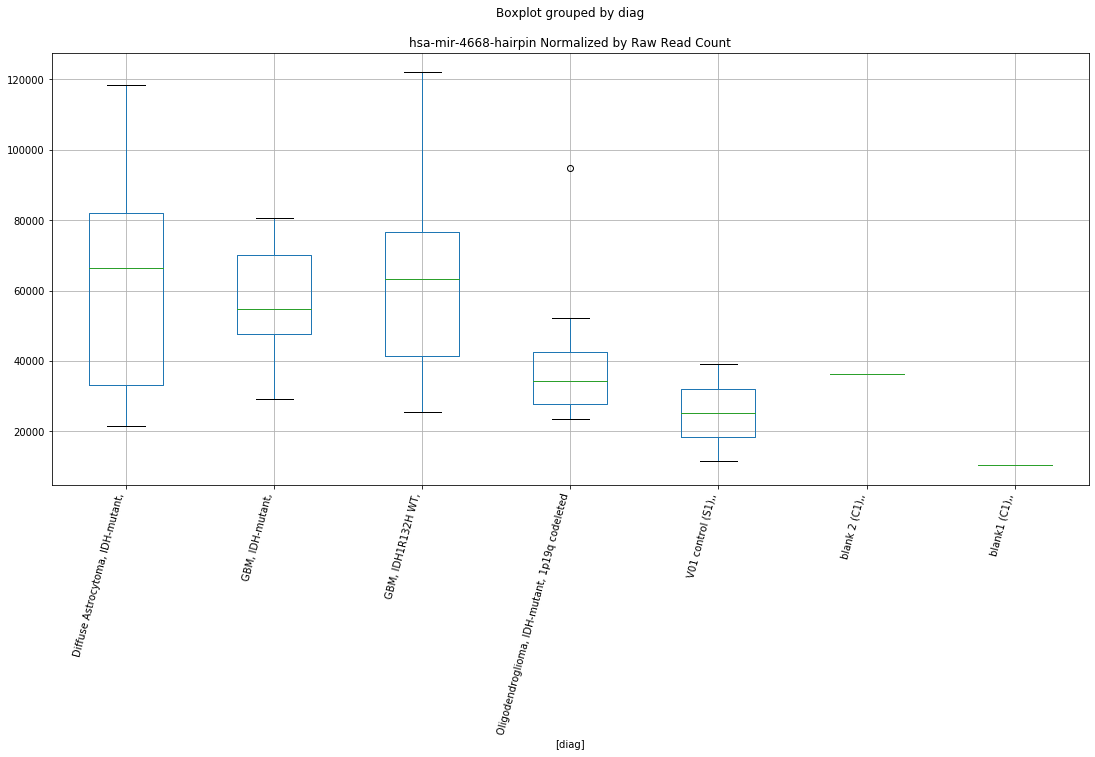

hsa-mir-4668-hairpin D-plex cutadapt2
	t = -1.812668982247556
	p = 0.08659625763795067


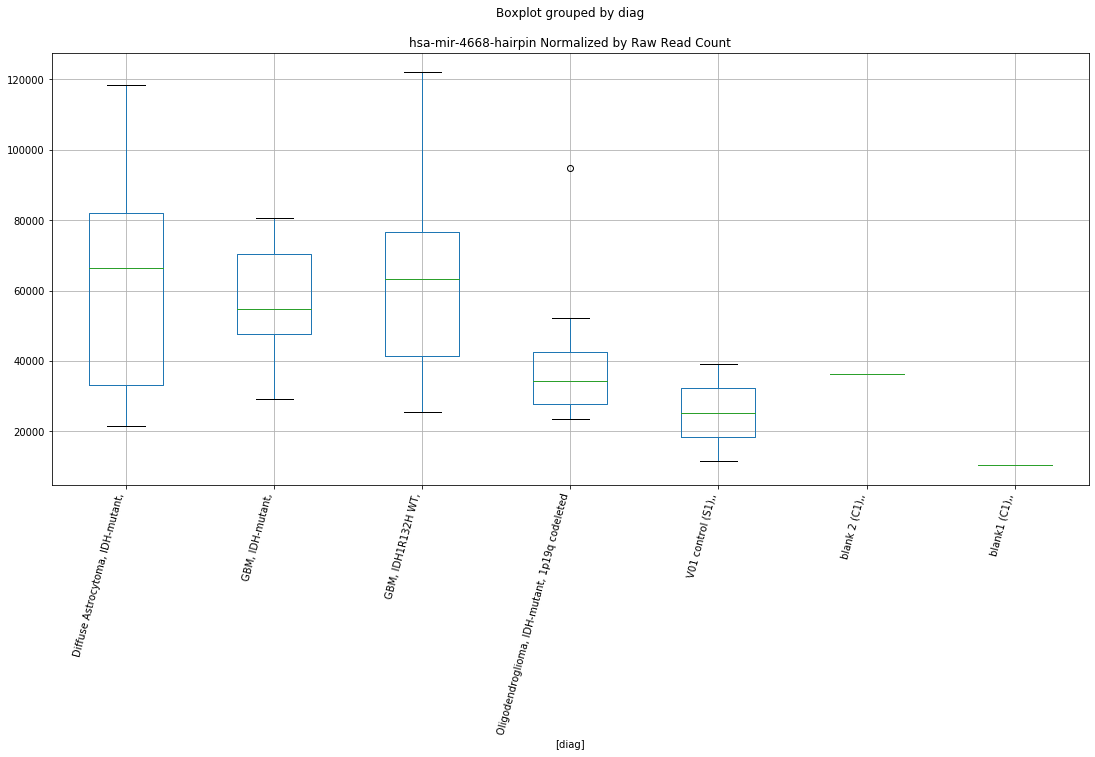

hsa-mir-4668-hairpin D-plex cutadapt3
	t = -1.812668982247556
	p = 0.08659625763795067


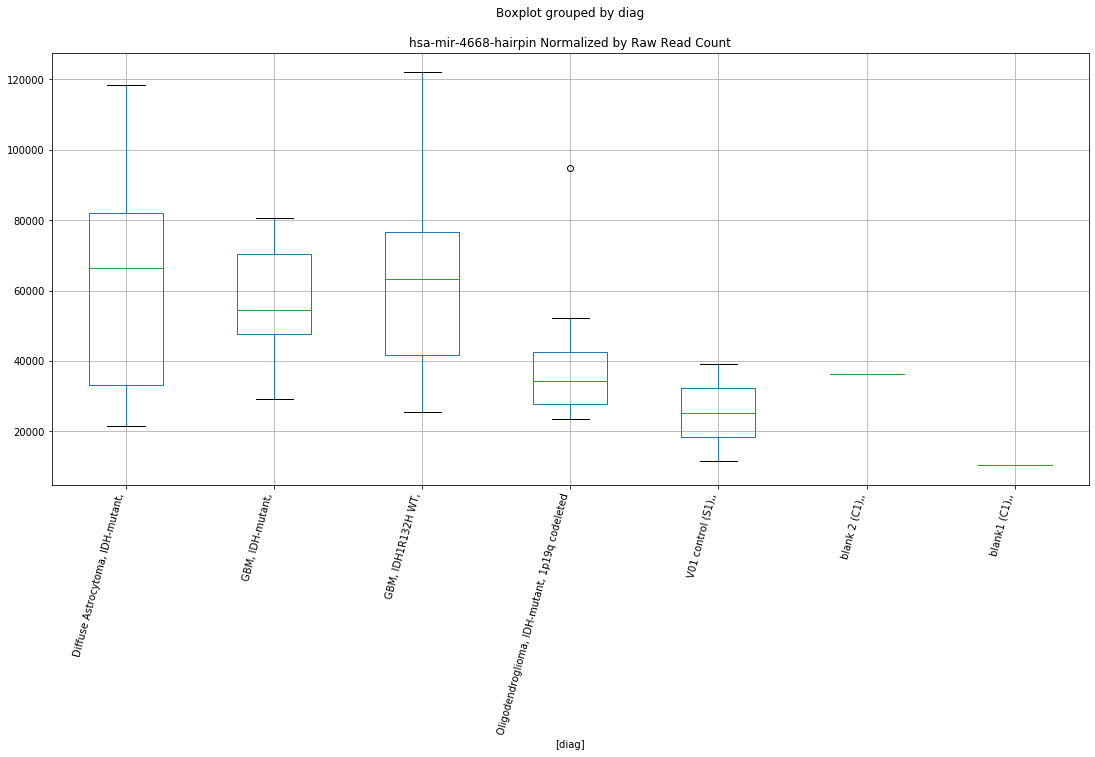

hsa-mir-4668-5p-mature D-plex cutadapt1
	t = -1.890842849591318
	p = 0.07485336934464526


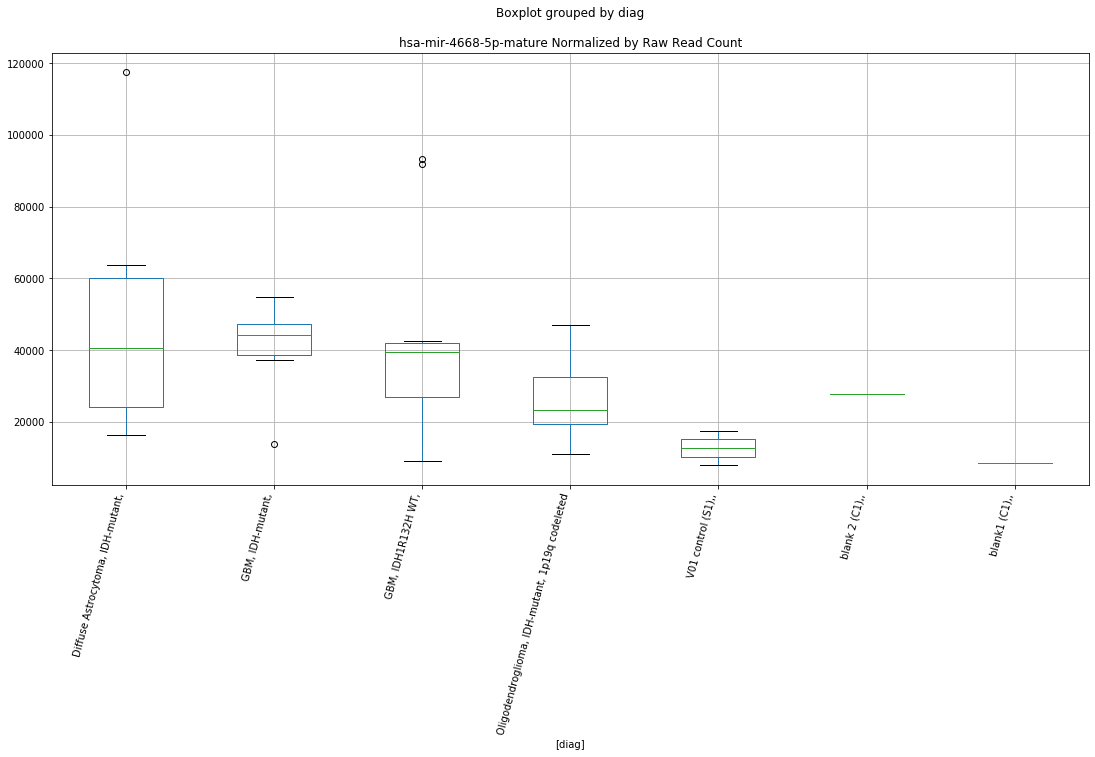

hsa-mir-4668-5p-mature D-plex cutadapt2
	t = -1.890842849591318
	p = 0.07485336934464526


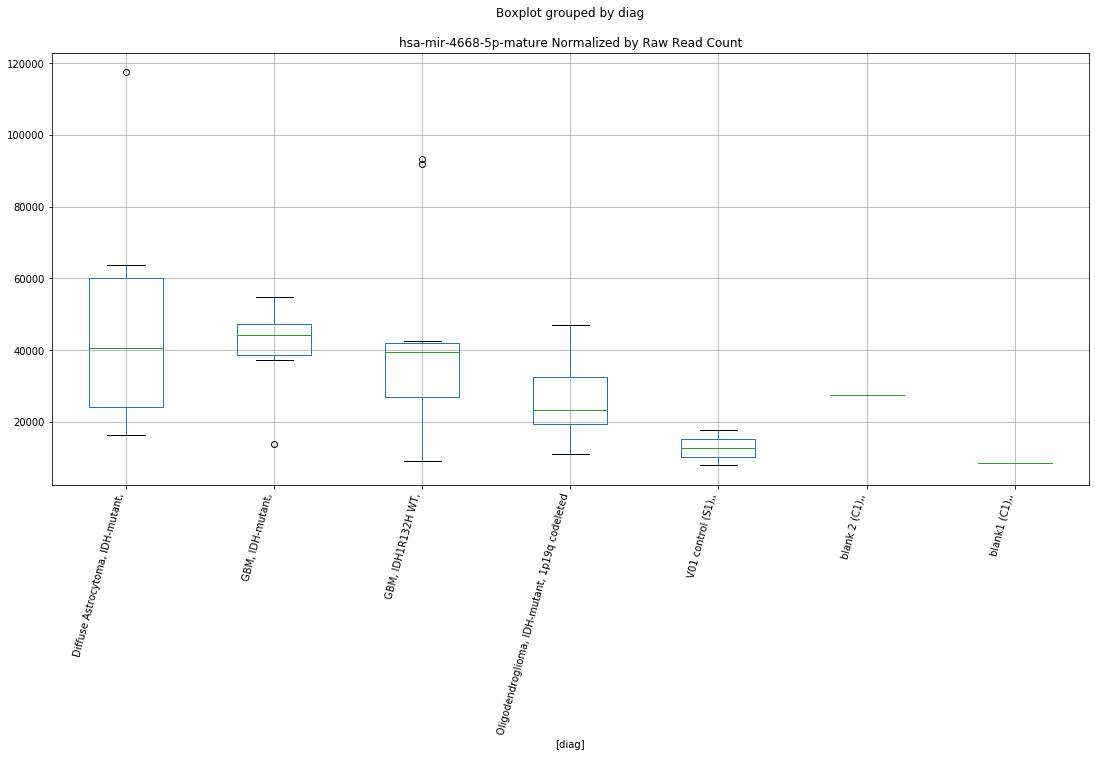

hsa-mir-4668-5p-mature D-plex cutadapt3
	t = -1.890842849591318
	p = 0.07485336934464526


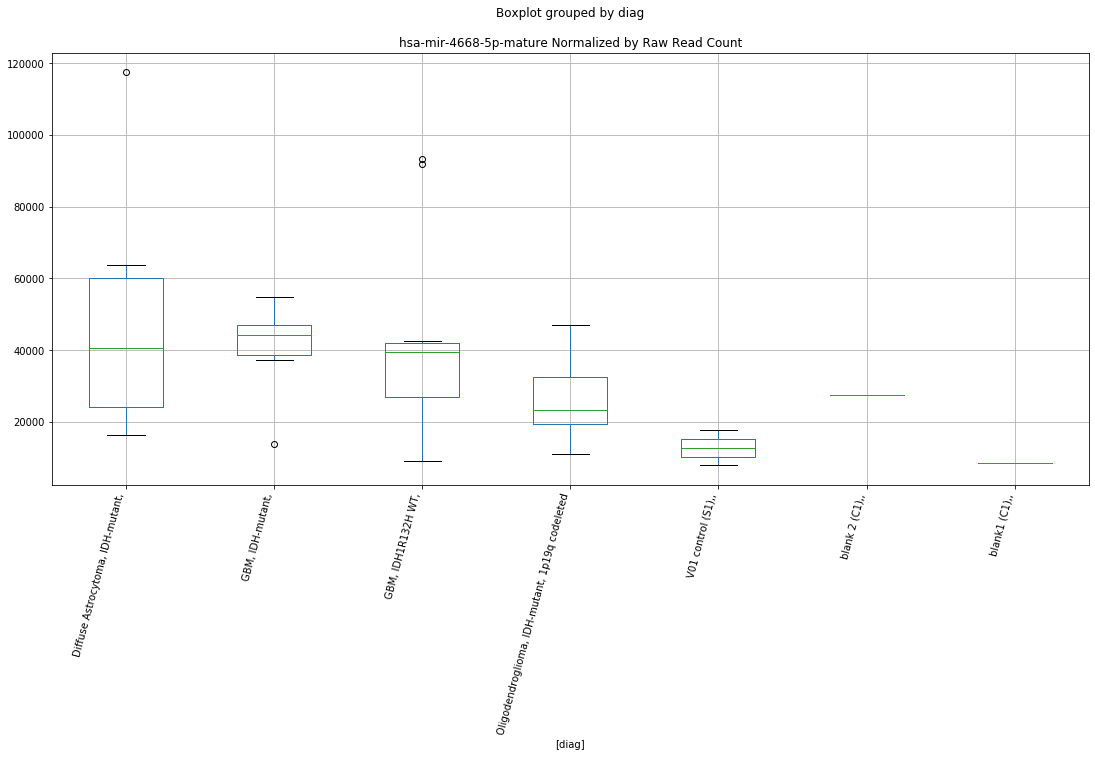

hsa-mir-8052-hairpin D-plex cutadapt1
	t = -1.7362018986444896
	p = 0.0996128447900852


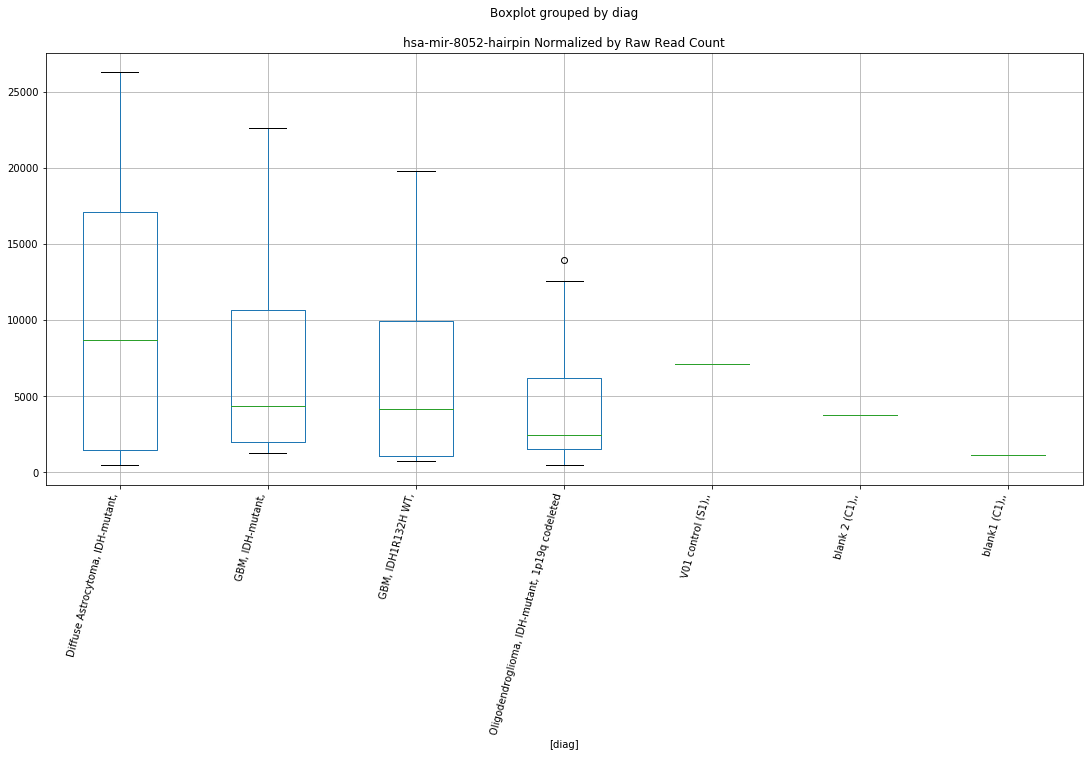

hsa-mir-8052-hairpin D-plex cutadapt2
	t = -1.7362018986444896
	p = 0.0996128447900852


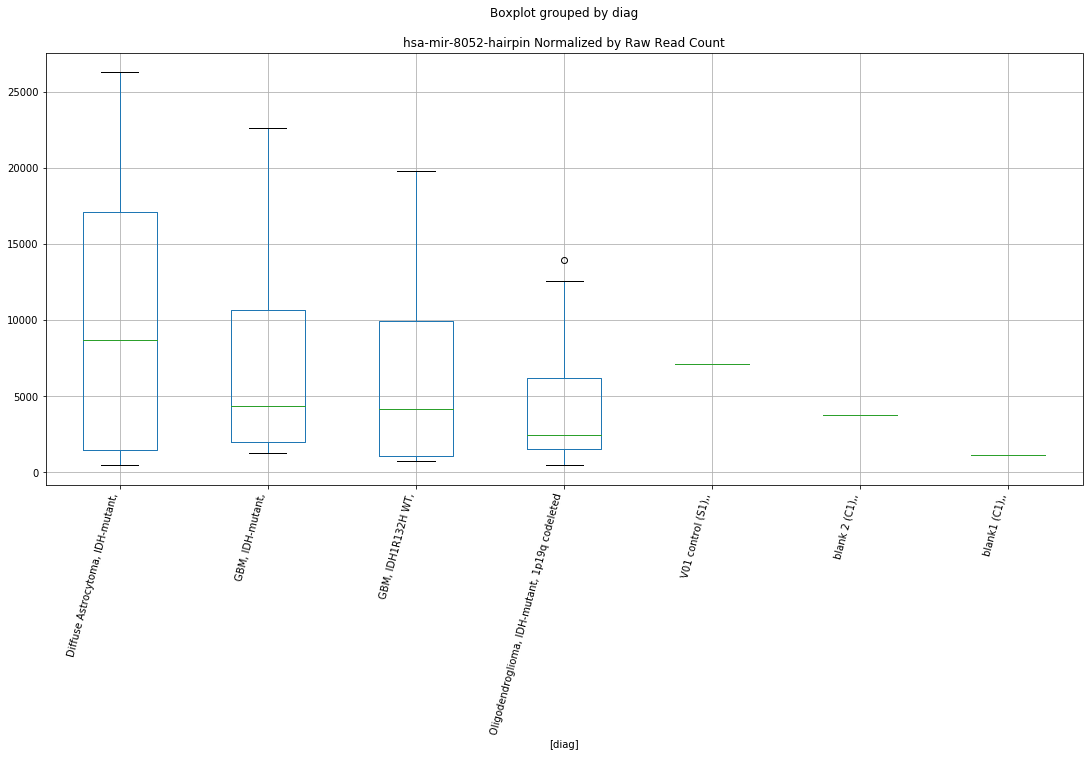

hsa-mir-8052-hairpin D-plex cutadapt3
	t = -1.7362018986444896
	p = 0.0996128447900852


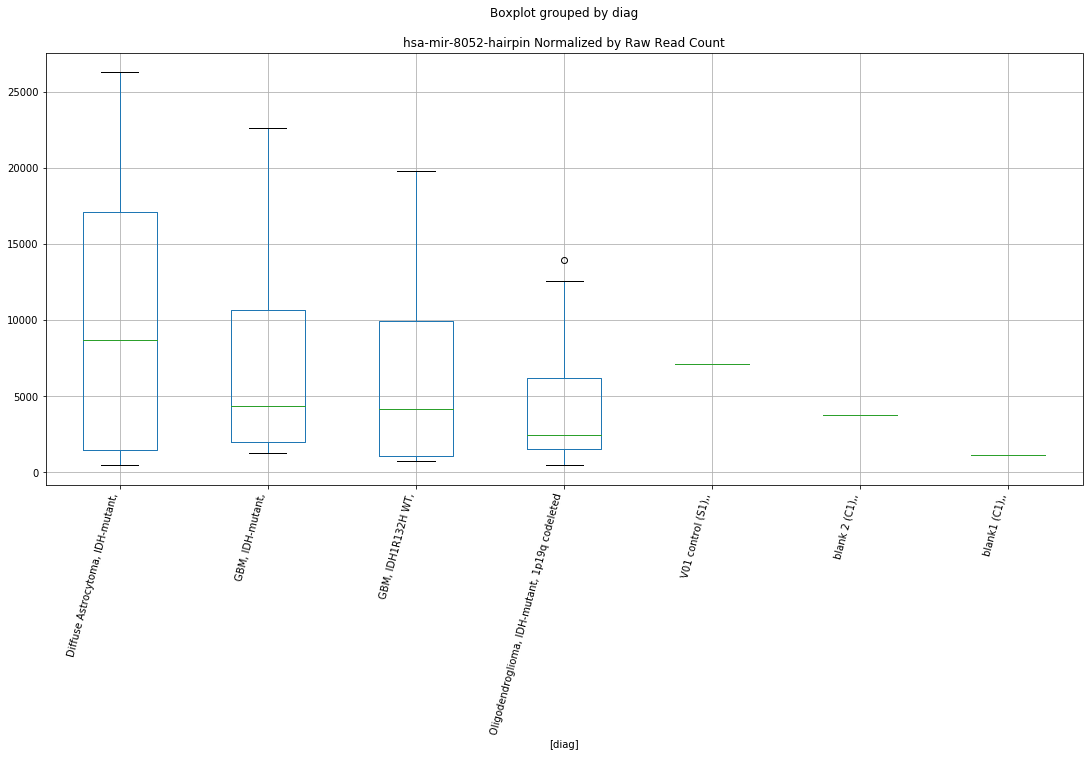

hsa-mir-3613-5p-mature D-plex bbduk2
	t = -1.7687687437897943
	p = 0.09387481979320651


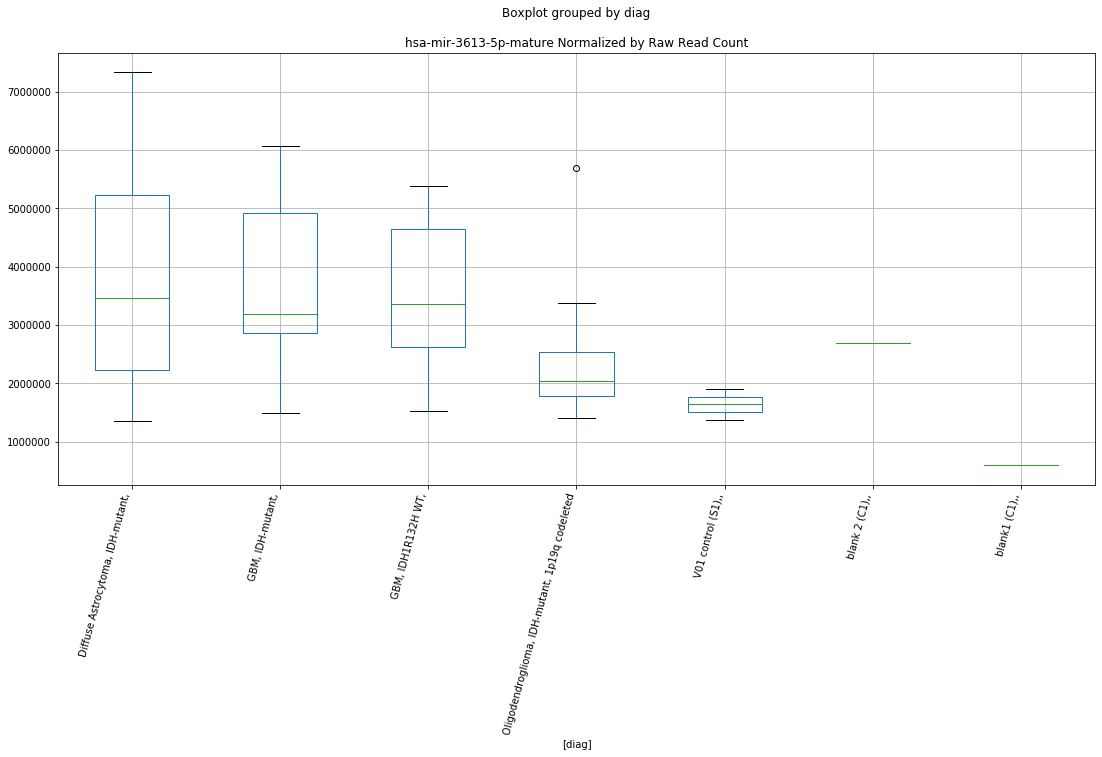

hsa-mir-3613-5p-mature D-plex bbduk3
	t = -1.7597924307981083
	p = 0.09542698405880327


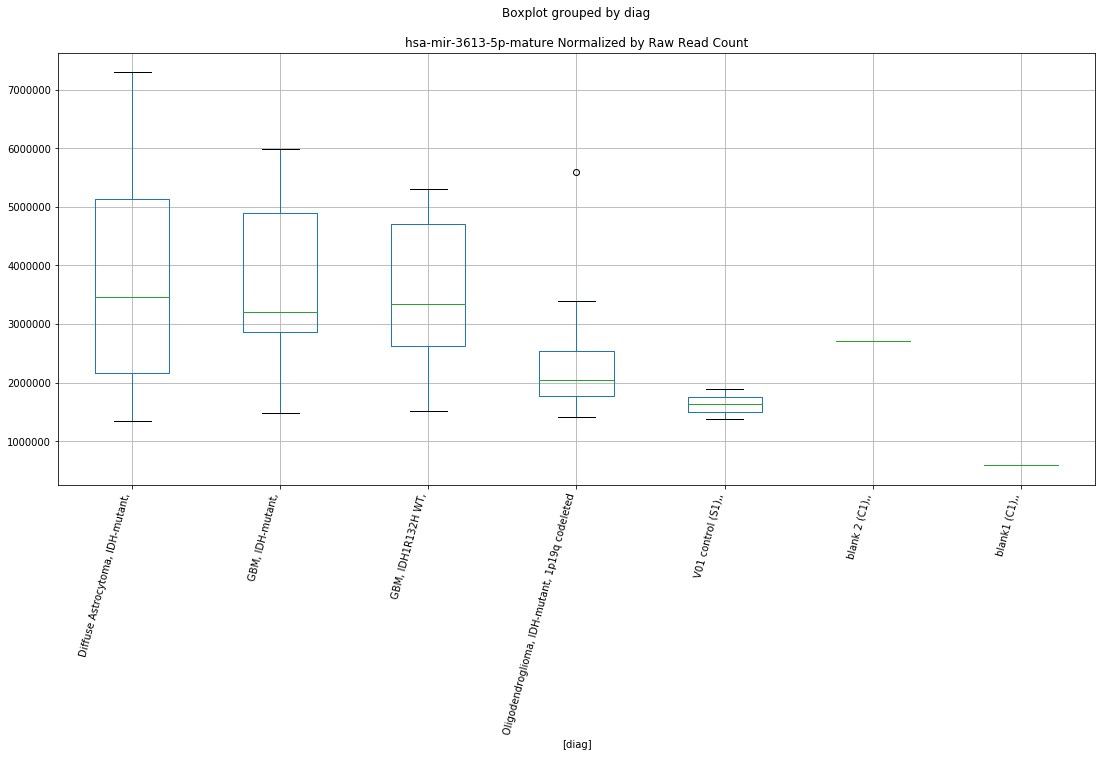

hsa-mir-509-1-hairpin D-plex bbduk2
	t = -2.3942419776572446
	p = 0.027752804387029602


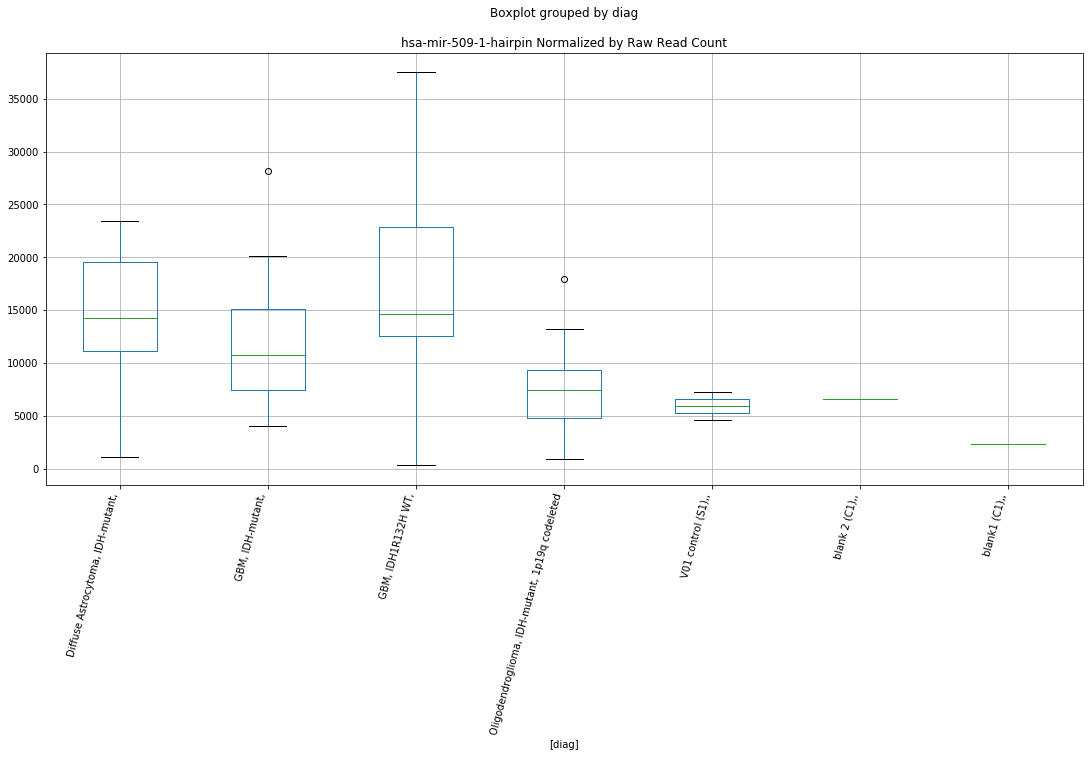

hsa-mir-509-1-hairpin D-plex bbduk3
	t = -2.3780853592744666
	p = 0.02868678970720762


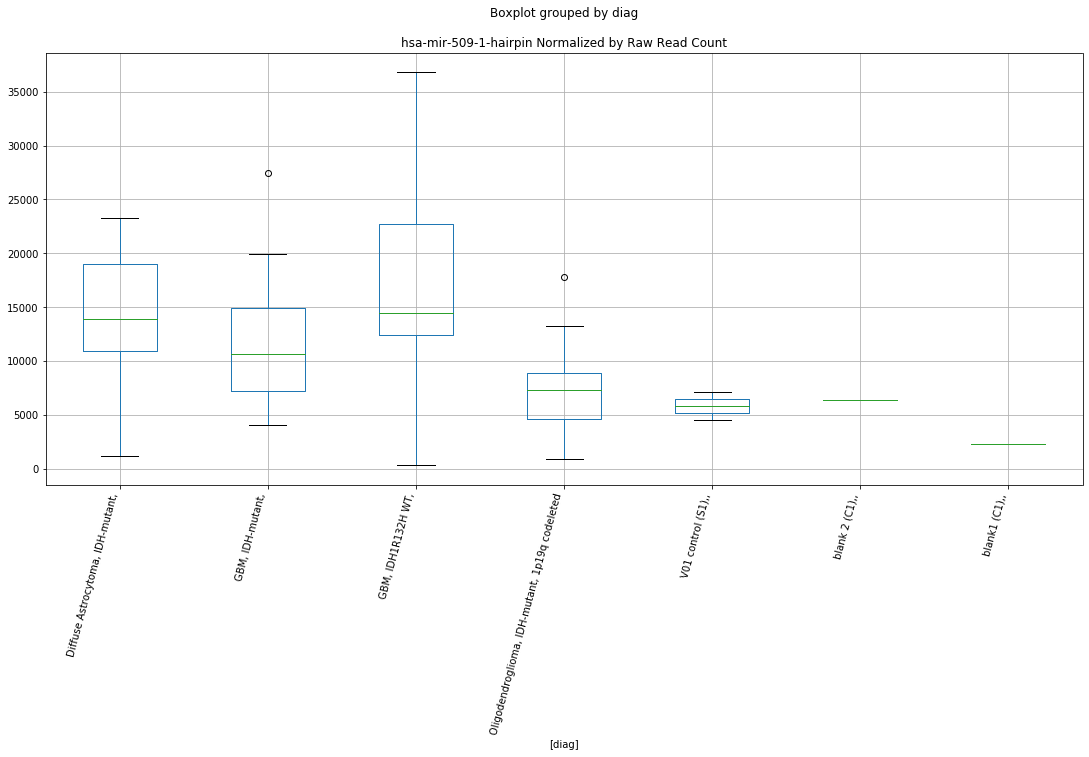

hsa-mir-509-2-hairpin D-plex bbduk2
	t = -2.3995664602615627
	p = 0.027451283442649858


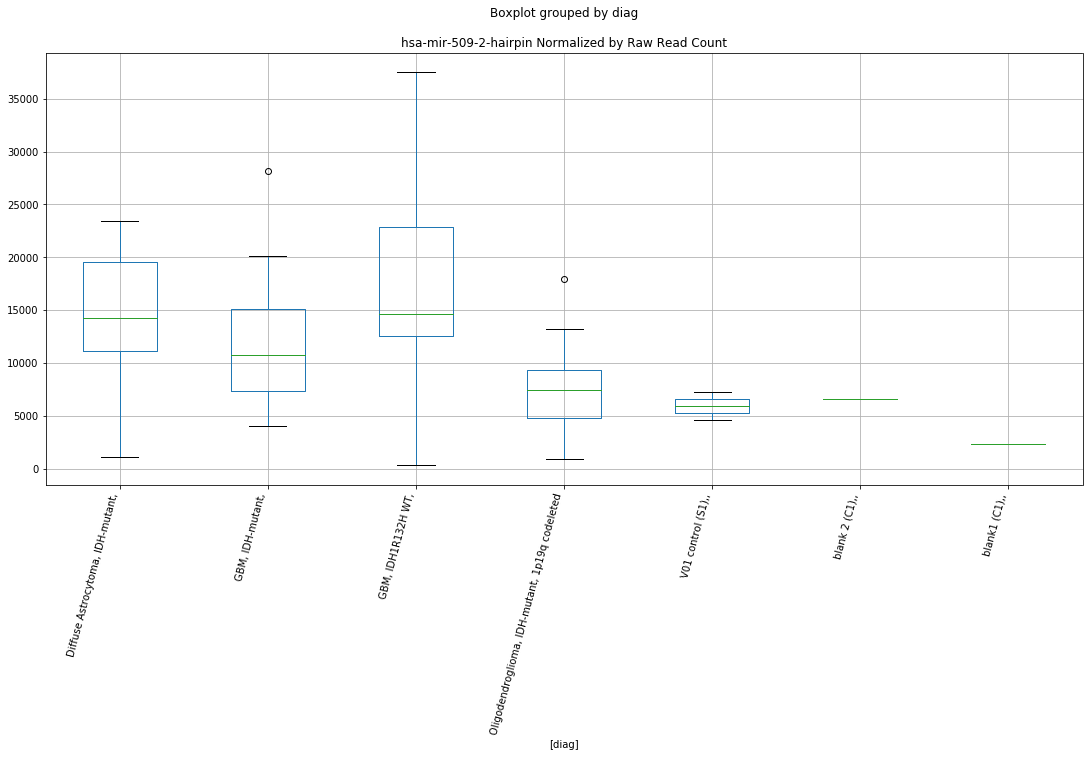

hsa-mir-509-2-hairpin D-plex bbduk3
	t = -2.3834515392768156
	p = 0.0283733731051158


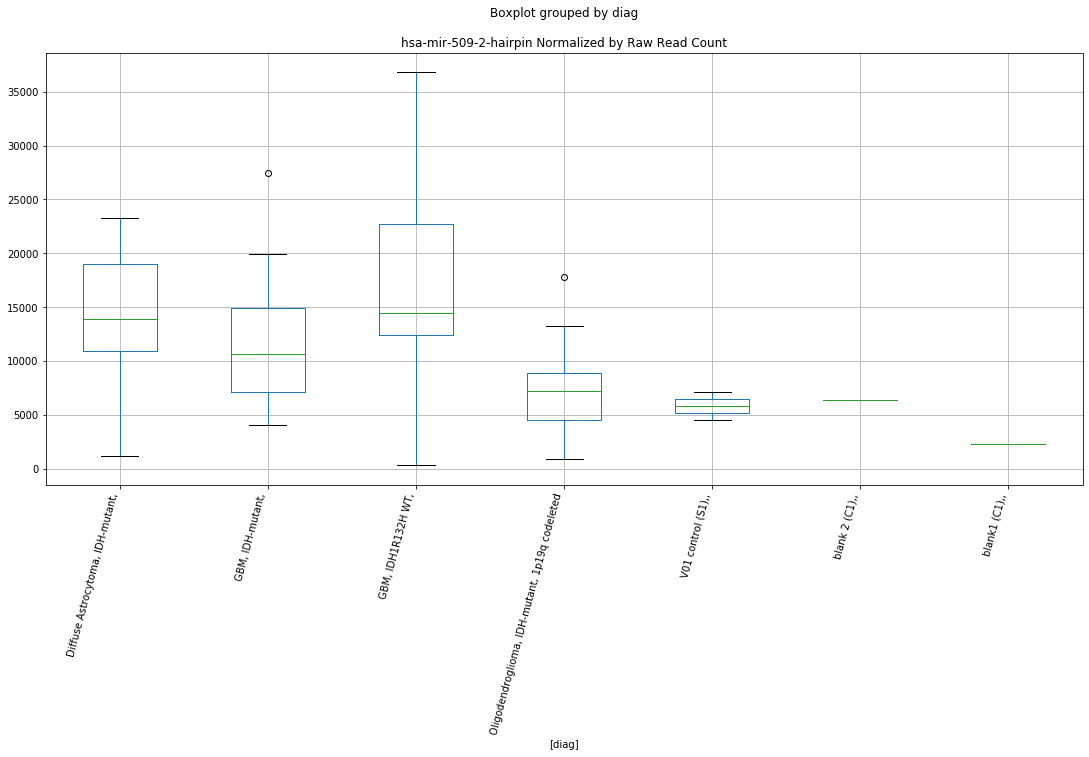

hsa-mir-509-3-hairpin D-plex bbduk2
	t = -2.4000793212036173
	p = 0.027422402843632045


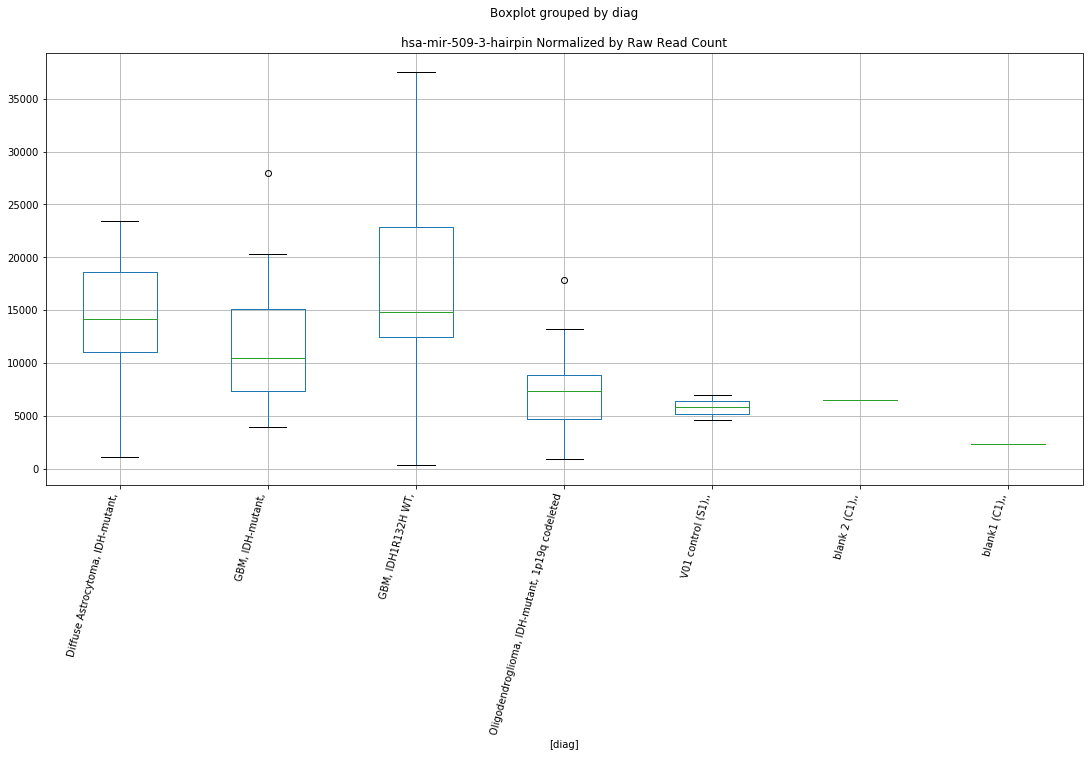

hsa-mir-509-3-hairpin D-plex bbduk3
	t = -2.368021792863344
	p = 0.02928329051002383


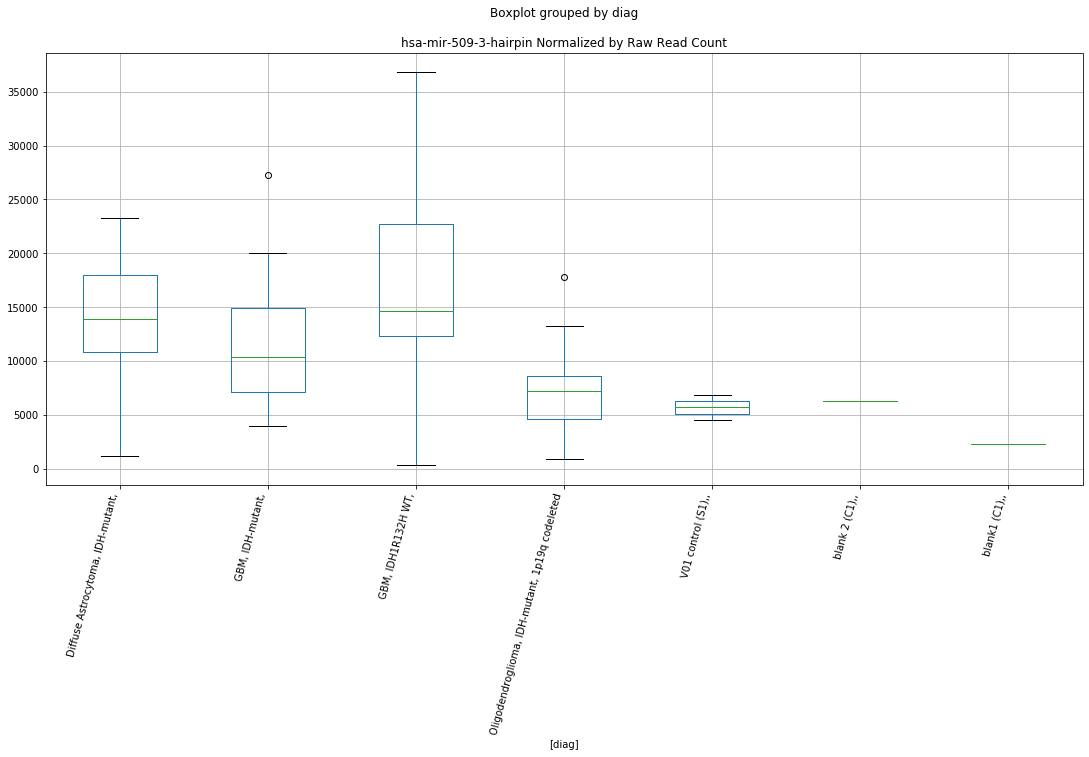

In [49]:
for mirna in mirnas:
    #print()
    for labkit in "D-plex","Lexogen":
        for trimmer in "bbduk1","bbduk2","bbduk3","cutadapt1","cutadapt2","cutadapt3":
            t, p = stats.ttest_ind(
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer) & 
                    (dfn["diag"]=="Oligodendroglioma, IDH-mutant, 1p19q codeleted"))][mirna],
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer) & 
                    (dfn["diag"]=="Diffuse Astrocytoma, IDH-mutant,"))][mirna])
            if p < 0.10:
                print(mirna+" "+labkit+" "+trimmer)
                print("\tt = " + str(t))
                print("\tp = " + str(p))
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer))].boxplot(column=mirna,by=['diag'])
                plt.title(mirna + " Normalized by Raw Read Count")
                plt.xticks(rotation=75,ha='right')
                plt.show()


AHDC1 D-plex bbduk2
	t = -1.8210723194495197
	p = 0.08526073626159333


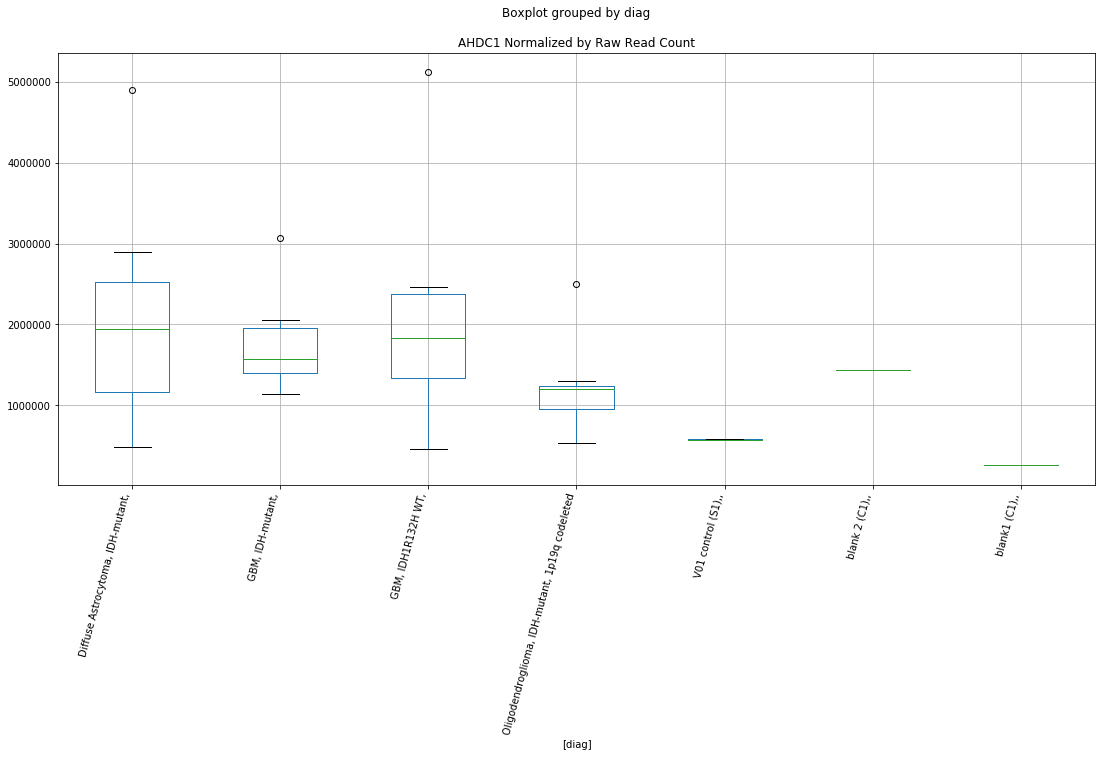

In [50]:
for gene in genes:
    #print()
    for labkit in "D-plex","Lexogen":
        for trimmer in "bbduk1","bbduk2","bbduk3","cutadapt1","cutadapt2","cutadapt3":
            t, p = stats.ttest_ind(
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer) & 
                    (dfn["diag"]=="Oligodendroglioma, IDH-mutant, 1p19q codeleted"))][gene],
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer) & 
                    (dfn["diag"]=="Diffuse Astrocytoma, IDH-mutant,"))][gene])
            if p < 0.10:
                print(gene+" "+labkit+" "+trimmer)
                print("\tt = " + str(t))
                print("\tp = " + str(p))
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer))].boxplot(column=gene,by=['diag'])
                plt.title(gene + " Normalized by Raw Read Count")
                plt.xticks(rotation=75,ha='right')
                plt.show()


# Normalize by Trimmed Read Count

In [51]:
dfn=df.copy()

In [52]:
dfn.head()

sample Subject Lab kit    Trimmer Raw Read Count Raw Read Length  \
0  SFHH005aa     3_5  D-plex     bbduk1        7706323             201   
1  SFHH005aa     3_5  D-plex     bbduk2        7706323             201   
2  SFHH005aa     3_5  D-plex     bbduk3        7706323             201   
3  SFHH005aa     3_5  D-plex  cutadapt1        7706323             201   
4  SFHH005aa     3_5  D-plex  cutadapt2        7706323             201   

  Trimmed Read Count Trimmed Ave Read Length STAR Aligned to Transcriptome  \
0            4578177                 57.8849                         99328   
1            7054912                 60.3426                        140222   
2            7067406                 60.5684                        138584   
3            4879448                 132.375                        105508   
4            4877655                  131.86                        119834   

  STAR Aligned to Transcriptome %  ... hsa-mir-6887-hairpin  \
0                            2.16  ...                20494   
1                            1.98  ...                   78   
2                            1.96  ...                   68   
3                            2.16  ...                15303   
4                            2.45  ...                15303   

  hsa-mir-6887-5p-mature hsa-mir-3613-3p-mature subject      dplex    lexogen  \
0                  20259                      2     3_5  SFHH005aa  SFHH006aa   
1                     76                  12246     3_5  SFHH005aa  SFHH006aa   
2                     66                  12209     3_5  SFHH005aa  SFHH006aa   
3                  15056                     35     3_5  SFHH005aa  SFHH006aa   
4                  15056                     35     3_5  SFHH005aa  SFHH006aa   

               diag disease          idh x1p19q  
0  GBM, IDH-mutant,     GBM   IDH-mutant         
1  GBM, IDH-mutant,     GBM   IDH-mutant         
2  GBM, IDH-mutant,     GBM   IDH-mutant         
3  GBM, IDH-mutant,     GBM   IDH-mutant         
4  GBM, IDH-mutant,     GBM   IDH-mutant         

[5 rows x 139 columns]

In [53]:
dfn[mirnas].head()

hsa-mir-4329-hairpin hsa-mir-5588-hairpin hsa-mir-92b-hairpin  \
0                   37                    2                 337   
1               504505               164998              130955   
2               492709               169068              127250   
3                  178                  121                1250   
4                  178                  121                1251   

  hsa-mir-4271-hairpin hsa-mir-548u-hairpin hsa-mir-1260a-hairpin  \
0                  968                    7                   355   
1                84567               211982                  1300   
2                81636               207177                  1278   
3                 2630                  307                  1035   
4                 2630                  307                  1035   

  hsa-mir-944-hairpin hsa-mir-10226-hairpin hsa-mir-4538-hairpin  \
0                 380                  4846                   32   
1                  31                  4799                  NaN   
2                  30                  4799                  NaN   
3                 694                    71                   18   
4                 694                    71                   18   

  hsa-mir-4538-mature  ... hsa-mir-509-1-hairpin hsa-mir-892b-hairpin  \
0                  28  ...                   152                  166   
1                 NaN  ...                    54                  161   
2                 NaN  ...                    52                  158   
3                  15  ...                   276                  268   
4                  15  ...                   276                  269   

  hsa-mir-509-2-hairpin hsa-mir-509-3-hairpin hsa-mir-6787-hairpin  \
0                   152                   116                  874   
1                    54                    54                   36   
2                    52                    52                   33   
3                   276                   276                 1255   
4                   276                   276                 1255   

  hsa-mir-6787-5p-mature hsa-mir-1281-hairpin hsa-mir-6887-hairpin  \
0                    799                14186                20494   
1                     33                  121                   78   
2                     31                  103                   68   
3                   1034                20096                15303   
4                   1034                20096                15303   

  hsa-mir-6887-5p-mature hsa-mir-3613-3p-mature  
0                  20259                      2  
1                     76                  12246  
2                     66                  12209  
3                  15056                     35  
4                  15056                     35  

[5 rows x 50 columns]

In [54]:
dfn[mirnas]=dfn.apply(lambda row: 1e9*pd.to_numeric(row[mirnas])/pd.to_numeric(row['Trimmed Read Count']), axis=1 )


In [55]:
dfn[mirnas].head()

hsa-mir-4329-hairpin  hsa-mir-5588-hairpin  hsa-mir-92b-hairpin  \
0              8.08e+03              4.37e+02             7.36e+04   
1              7.15e+07              2.34e+07             1.86e+07   
2              6.97e+07              2.39e+07             1.80e+07   
3              3.65e+04              2.48e+04             2.56e+05   
4              3.65e+04              2.48e+04             2.56e+05   

   hsa-mir-4271-hairpin  hsa-mir-548u-hairpin  hsa-mir-1260a-hairpin  \
0              2.11e+05              1.53e+03               77541.78   
1              1.20e+07              3.00e+07              184268.78   
2              1.16e+07              2.93e+07              180830.14   
3              5.39e+05              6.29e+04              212114.16   
4              5.39e+05              6.29e+04              212192.13   

   hsa-mir-944-hairpin  hsa-mir-10226-hairpin  hsa-mir-4538-hairpin  \
0             83002.47               1.06e+06               6989.68   
1              4394.10               6.80e+05                   NaN   
2              4244.84               6.79e+05                   NaN   
3            142229.20               1.46e+04               3688.94   
4            142281.49               1.46e+04               3690.30   

   hsa-mir-4538-mature  ...  hsa-mir-509-1-hairpin  hsa-mir-892b-hairpin  \
0              6115.97  ...               33200.99              36258.97   
1                  NaN  ...                7654.24              22820.98   
2                  NaN  ...                7357.72              22356.15   
3              3074.12  ...               56563.78              54924.25   
4              3075.25  ...               56584.57              55149.45   

   hsa-mir-509-2-hairpin  hsa-mir-509-3-hairpin  hsa-mir-6787-hairpin  \
0               33200.99               25337.60             190905.68   
1                7654.24                7654.24               5102.83   
2                7357.72                7357.72               4669.32   
3               56563.78               56563.78             257201.22   
4               56584.57               56584.57             257295.77   

   hsa-mir-6787-5p-mature  hsa-mir-1281-hairpin  hsa-mir-6887-hairpin  \
0               174523.61              3.10e+06              4.48e+06   
1                 4677.59              1.72e+04              1.11e+04   
2                 4386.33              1.46e+04              9.62e+03   
3               211909.22              4.12e+06              3.14e+06   
4               211987.11              4.12e+06              3.14e+06   

   hsa-mir-6887-5p-mature  hsa-mir-3613-3p-mature  
0                4.43e+06                4.37e+02  
1                1.08e+04                1.74e+06  
2                9.34e+03                1.73e+06  
3                3.09e+06                7.17e+03  
4                3.09e+06                7.18e+03  

[5 rows x 50 columns]

In [56]:
dfn[genes].head()

LOC102724859 RPH3A PLCE1 ADGRG6 CCDC151   IGF2  P2RX6 PIGG MAPT MIR486-1  \
0          NaN   NaN  2660    481     152      7  67662  NaN   21      NaN   
1          NaN   NaN   252    NaN      24  39465   2583  NaN  NaN      NaN   
2          NaN   NaN   252    NaN      24  43385   2520  NaN  NaN      NaN   
3           34     1  2110    250     NaN     17  55125  NaN  NaN      NaN   
4           34     1  2110    250     NaN     17  55125  NaN  NaN      NaN   

   ...  AHDC1 INS-IGF2 MICAL2 NOTCH2NLB   TTN TTC21A TUBGCP4  WSB1 EDEM3 NACC2  
0  ...    336        1   2220        21  2124   5814      48     4  6636    28  
1  ...   9848     7893     78       NaN   144     38      30  4270   486   NaN  
2  ...  11708     8677     76       NaN   144     38      30  4190   450   NaN  
3  ...   2662        2   2960       206  4626   4826     216   NaN  7242    34  
4  ...   2662        2   2960       206  4626   4826     216   NaN  7242    34  

[5 rows x 50 columns]

In [57]:
dfn[genes]=dfn.apply(lambda row: 1e9*pd.to_numeric(row[genes])/pd.to_numeric(row['Trimmed Read Count']), axis=1 )


In [58]:
dfn[genes].head()

LOC102724859   RPH3A      PLCE1     ADGRG6   CCDC151      IGF2     P2RX6  \
0           NaN     NaN  581017.29  105063.65  33200.99  1.53e+03  1.48e+07   
1           NaN     NaN   35719.79        NaN   3401.89  5.59e+06  3.66e+05   
2           NaN     NaN   35656.65        NaN   3395.87  6.14e+06  3.57e+05   
3       6968.00  204.94  432425.96   51235.30       NaN  3.48e+03  1.13e+07   
4       6970.56  205.02  432584.92   51254.14       NaN  3.49e+03  1.13e+07   

   PIGG     MAPT  MIR486-1  ...     AHDC1  INS-IGF2     MICAL2  NOTCH2NLB  \
0   NaN  4586.98       NaN  ...  7.34e+04  2.18e+02  484909.17    4586.98   
1   NaN      NaN       NaN  ...  1.40e+06  1.12e+06   11056.13        NaN   
2   NaN      NaN       NaN  ...  1.66e+06  1.23e+06   10753.59        NaN   
3   NaN      NaN       NaN  ...  5.46e+05  4.10e+02  606626.00   42217.89   
4   NaN      NaN       NaN  ...  5.46e+05  4.10e+02  606848.99   42233.41   

         TTN    TTC21A   TUBGCP4       WSB1     EDEM3    NACC2  
0  463940.12  1.27e+06  10484.52     873.71  1.45e+06  6115.97  
1   20411.31  5.39e+03   4252.36  605252.06  6.89e+04      NaN  
2   20375.23  5.38e+03   4244.84  592862.50  6.37e+04      NaN  
3  948058.06  9.89e+05  44267.30        NaN  1.48e+06  6968.00  
4  948406.56  9.89e+05  44283.57        NaN  1.48e+06  6970.56  

[5 rows x 50 columns]

In [59]:
dfn.value_counts(['disease','idh','x1p19q'])

disease              idh            x1p19q          
Oligodendroglioma     IDH-mutant     1p19q codeleted    120
GBM                   IDH1R132H WT                      120
                      IDH-mutant                        120
Diffuse Astrocytoma   IDH-mutant                        120
V01 control (S1)                                         24
blank1 (C1)                                              12
blank 2 (C1)                                             12
dtype: int64

In [60]:
dfn.value_counts(['diag'])

diag                                          
Oligodendroglioma, IDH-mutant, 1p19q codeleted    120
GBM, IDH1R132H WT,                                120
GBM, IDH-mutant,                                  120
Diffuse Astrocytoma, IDH-mutant,                  120
V01 control (S1),,                                 24
blank1 (C1),,                                      12
blank 2 (C1),,                                     12
dtype: int64

In [61]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

hsa-mir-4329-hairpin D-plex bbduk2
	t = -1.8135458014382166
	p = 0.08645605592493179


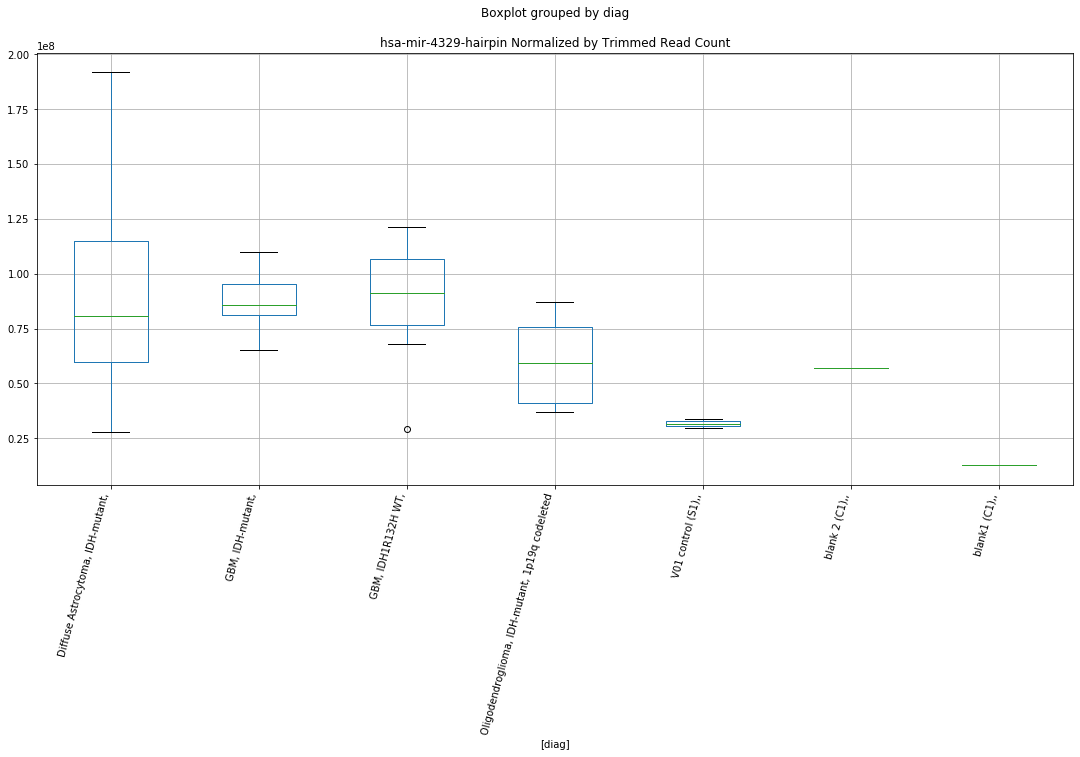

hsa-mir-4329-hairpin D-plex bbduk3
	t = -1.808755117524016
	p = 0.08722450737854702


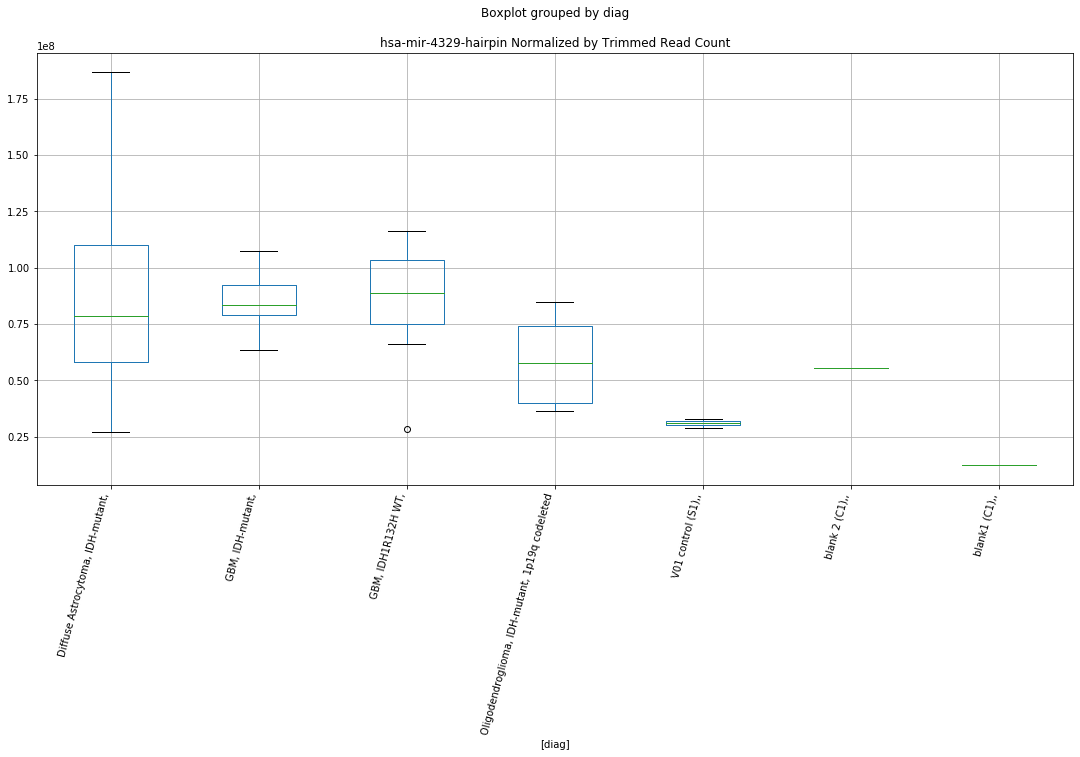

hsa-mir-4329-hairpin D-plex cutadapt1
	t = -2.2207852664084915
	p = 0.03943790485063914


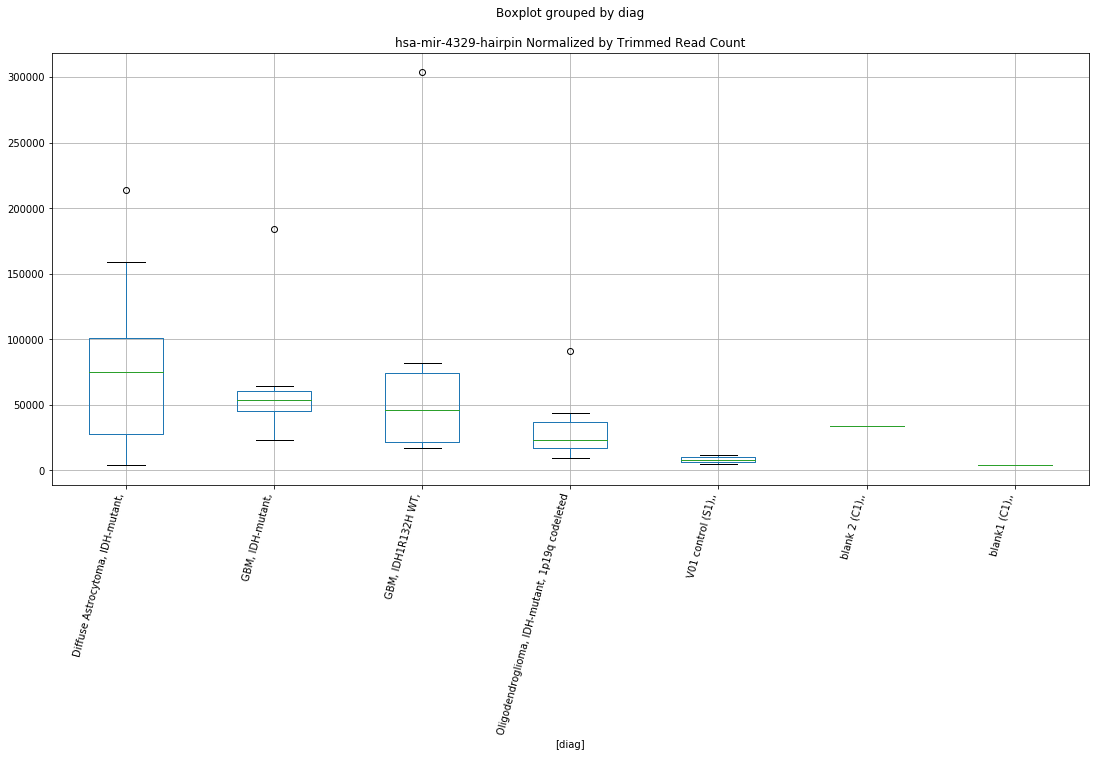

hsa-mir-4329-hairpin D-plex cutadapt2
	t = -2.2192499139195805
	p = 0.03955914420915662


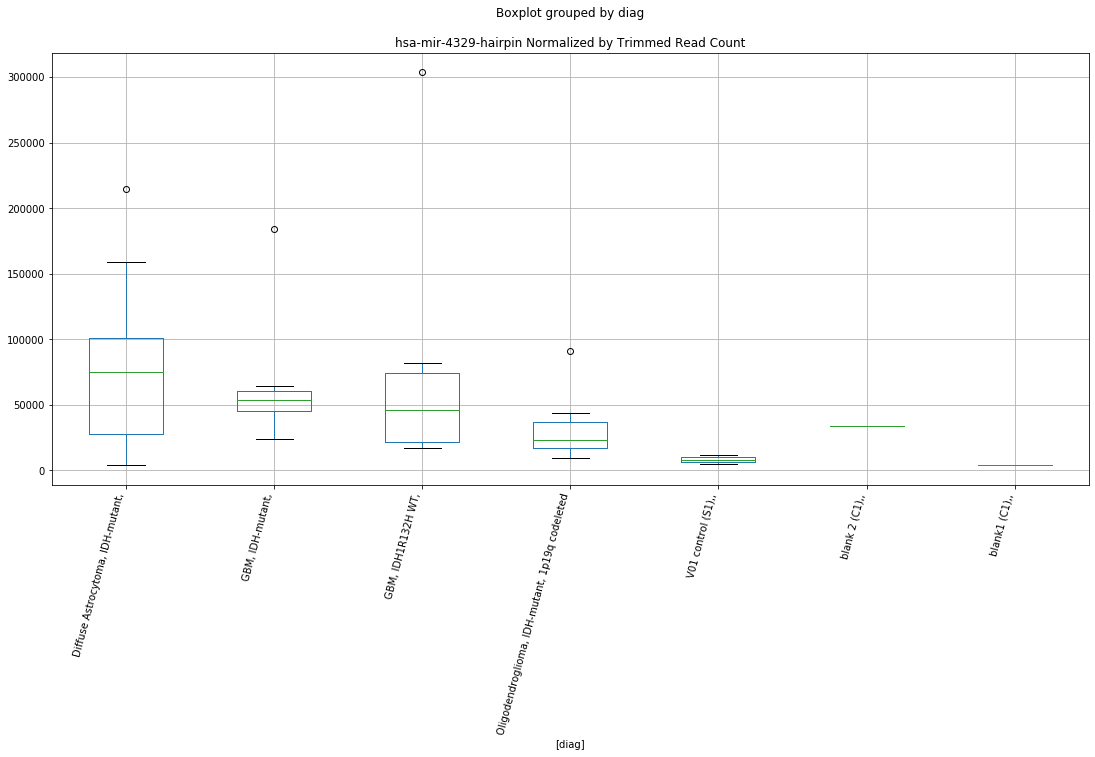

hsa-mir-4329-hairpin D-plex cutadapt3
	t = -2.219172948164431
	p = 0.03956523083992132


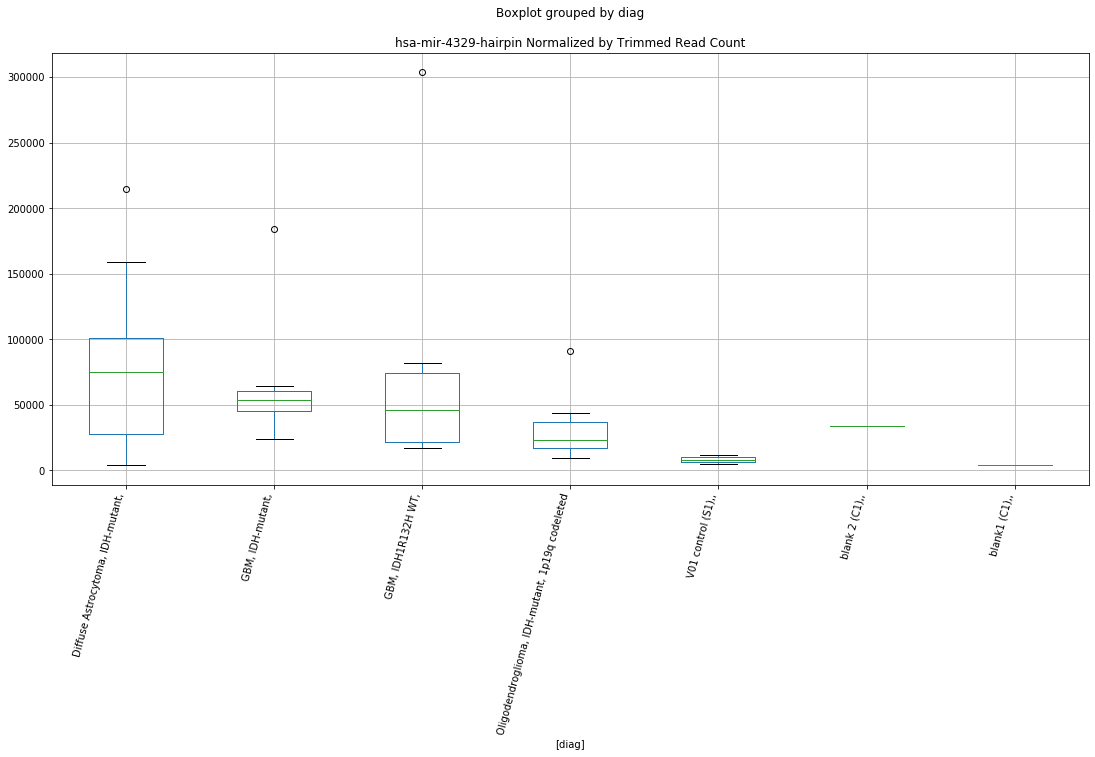

hsa-mir-4329-hairpin Lexogen bbduk1
	t = -1.8525870090446994
	p = 0.08041180630000702


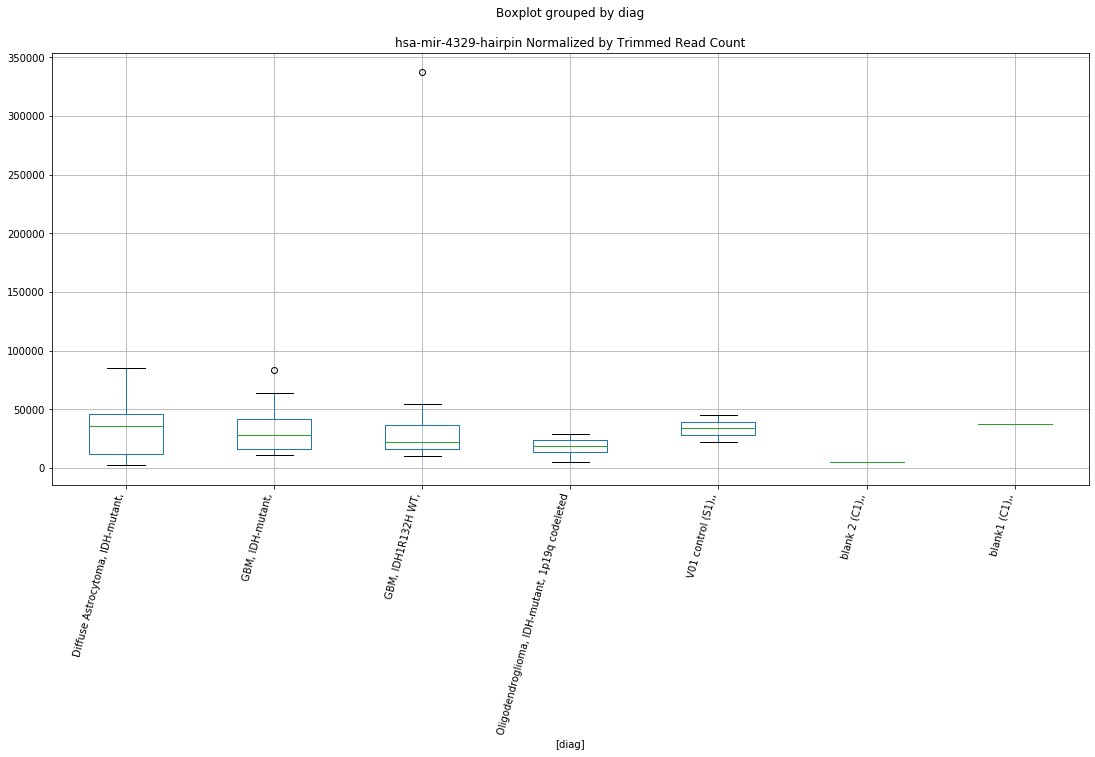

hsa-mir-5588-hairpin D-plex cutadapt1
	t = -1.766140964035959
	p = 0.09432692130293358


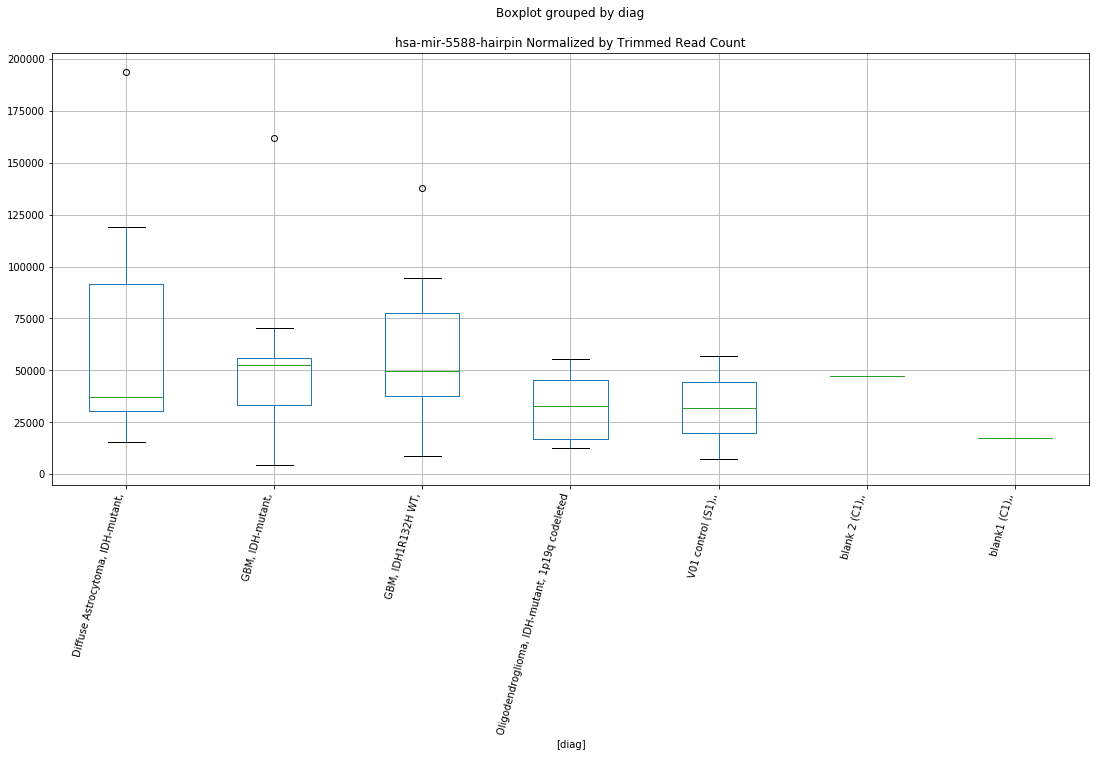

hsa-mir-5588-hairpin D-plex cutadapt2
	t = -1.767007743426541
	p = 0.09417758576614638


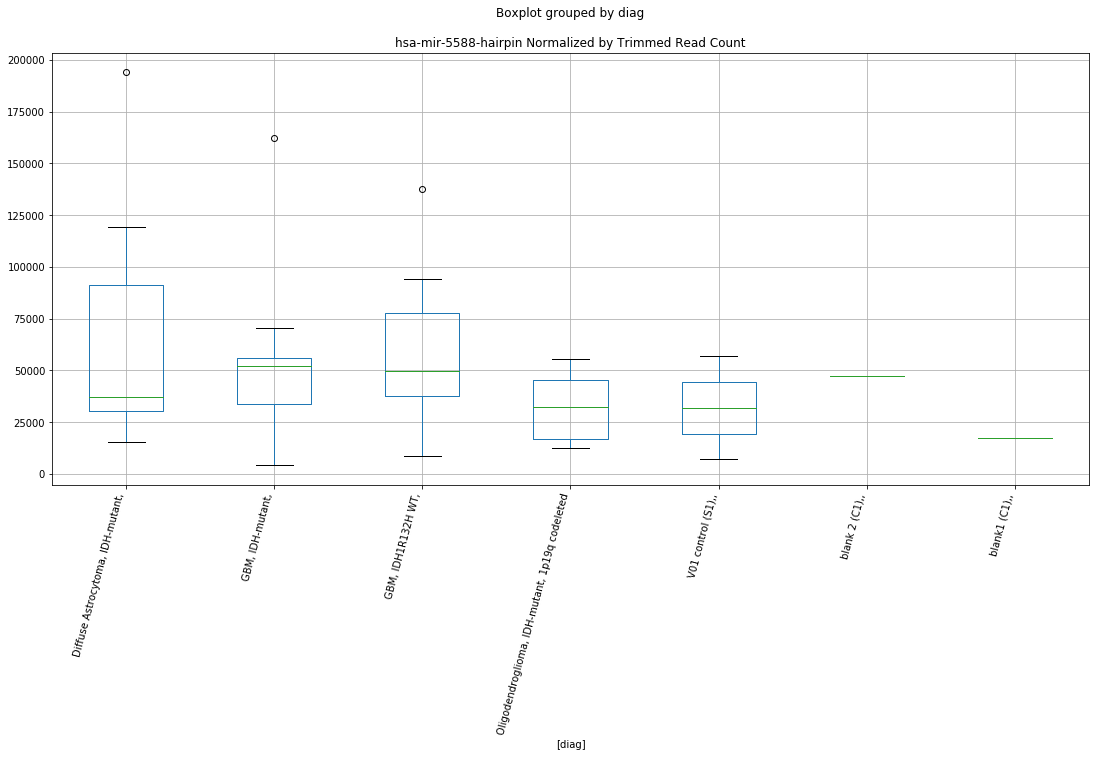

hsa-mir-5588-hairpin D-plex cutadapt3
	t = -1.7670894256068905
	p = 0.09416352352459655


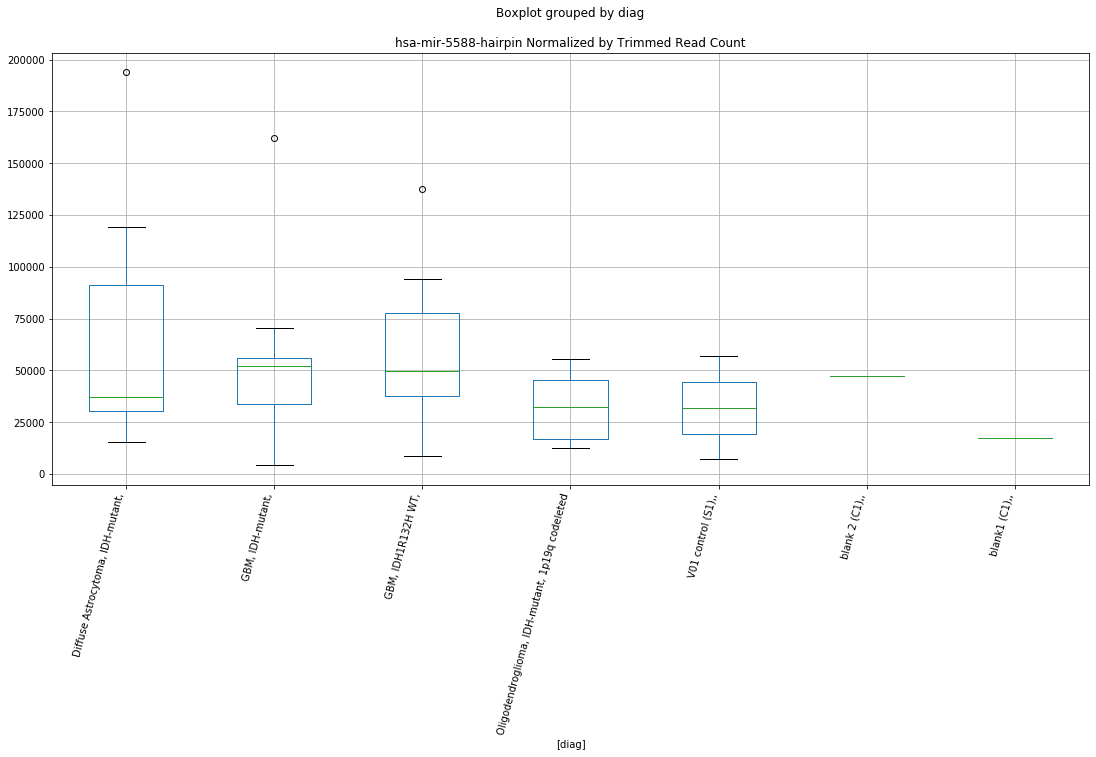

hsa-mir-92b-hairpin D-plex bbduk1
	t = -1.8053346737534732
	p = 0.08777681621626923


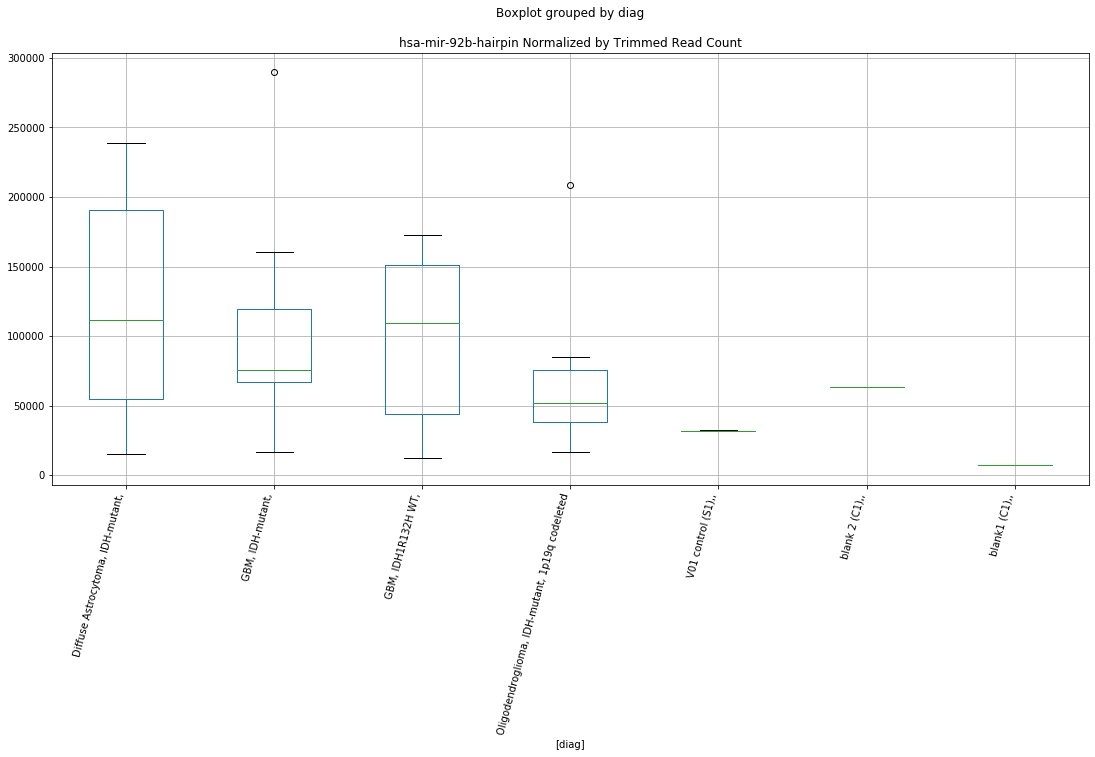

hsa-mir-92b-hairpin D-plex cutadapt1
	t = -2.340861620486848
	p = 0.030951377208327323


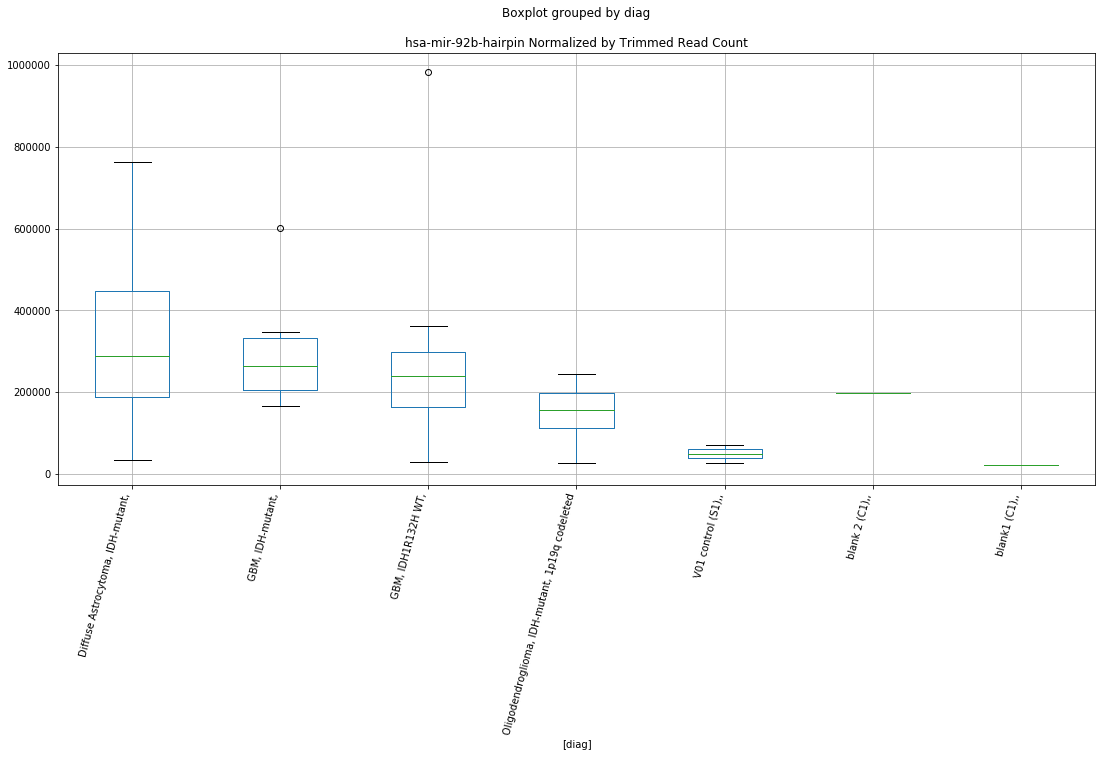

hsa-mir-92b-hairpin D-plex cutadapt2
	t = -2.341687365262328
	p = 0.030899384927178822


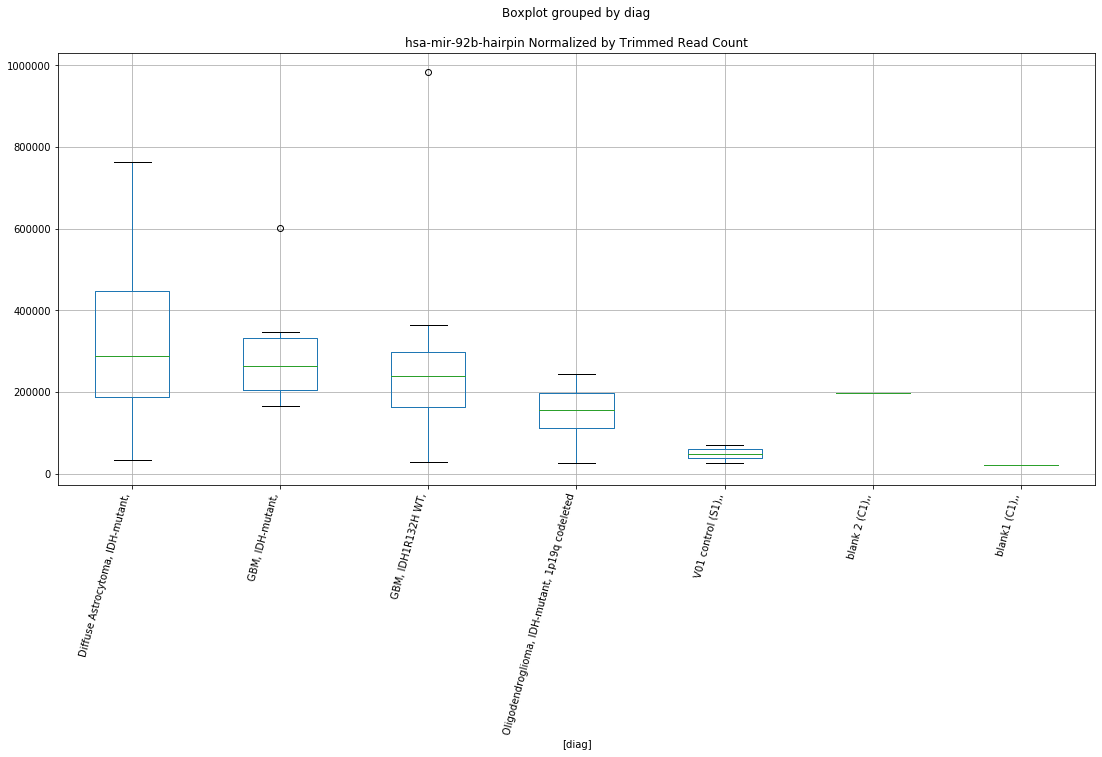

hsa-mir-92b-hairpin D-plex cutadapt3
	t = -2.3415544207754975
	p = 0.030907750165590612


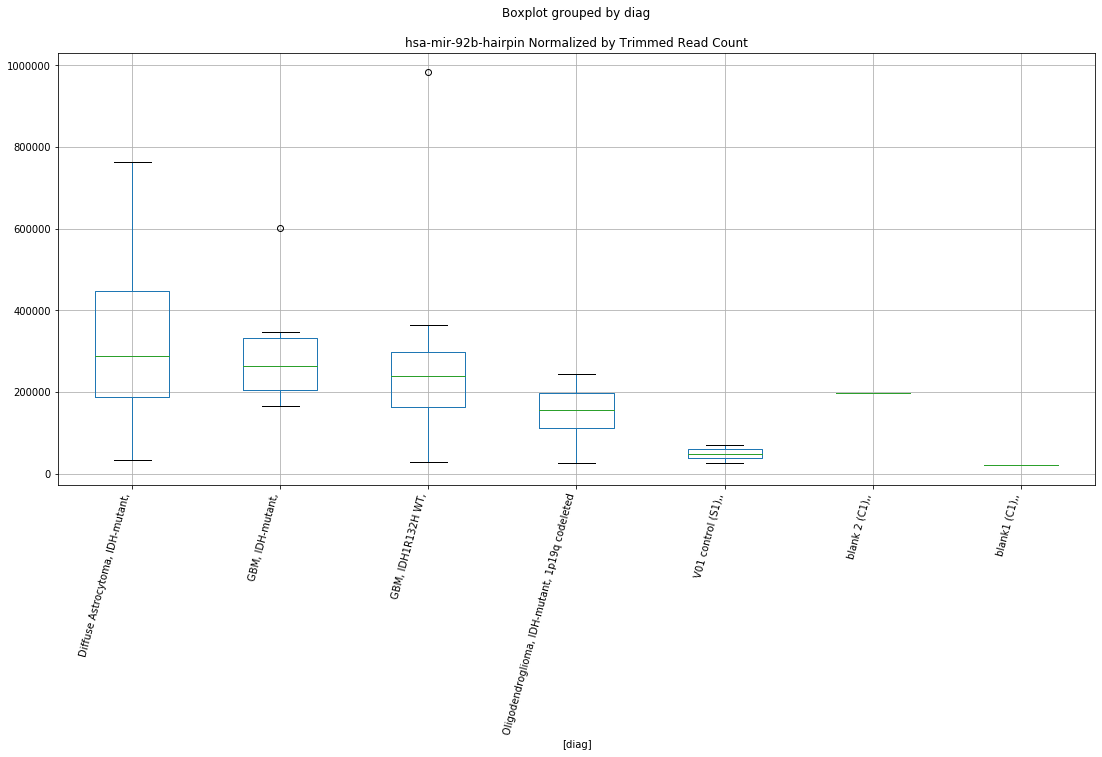

hsa-mir-548u-hairpin D-plex cutadapt1
	t = -2.3800454087659872
	p = 0.02857193847329608


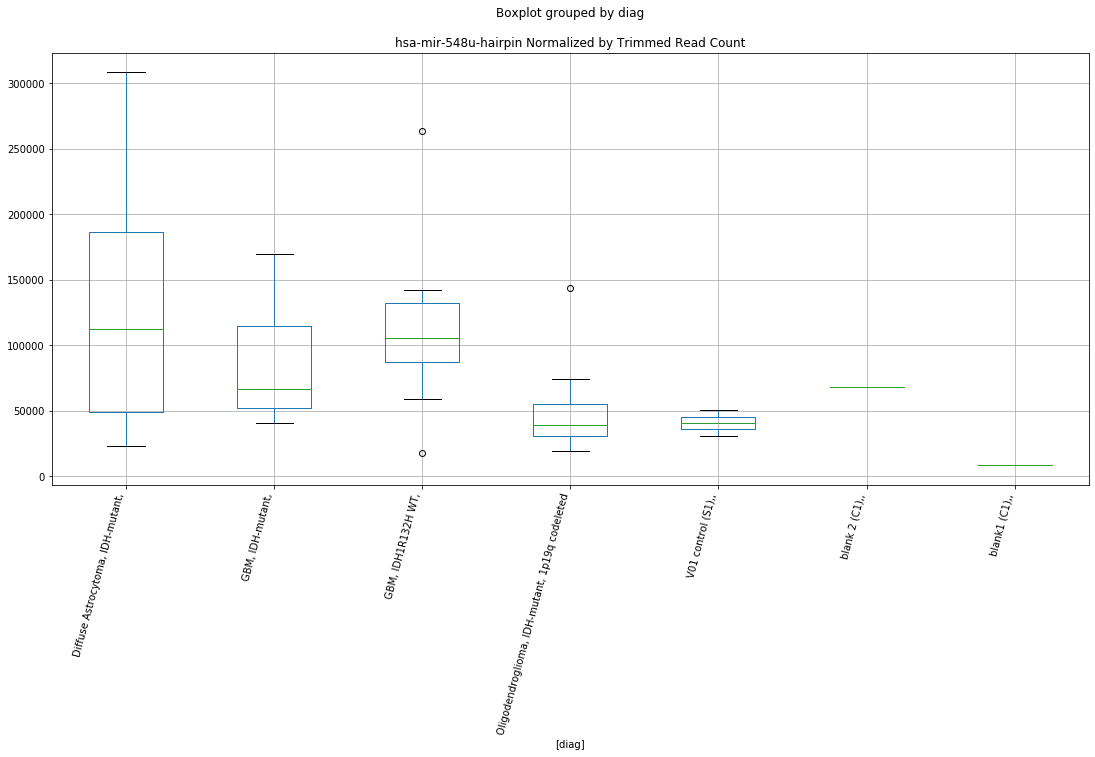

hsa-mir-548u-hairpin D-plex cutadapt2
	t = -2.379497414724235
	p = 0.028604005478941142


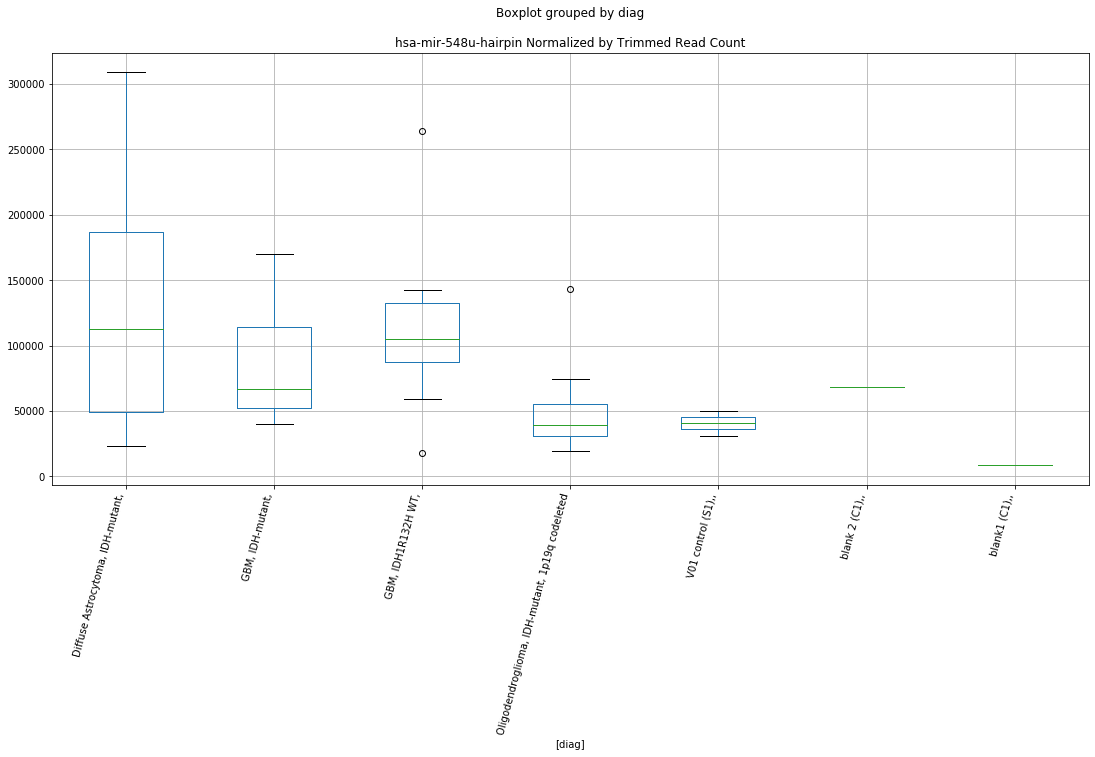

hsa-mir-548u-hairpin D-plex cutadapt3
	t = -2.3796459341772906
	p = 0.028595311238544908


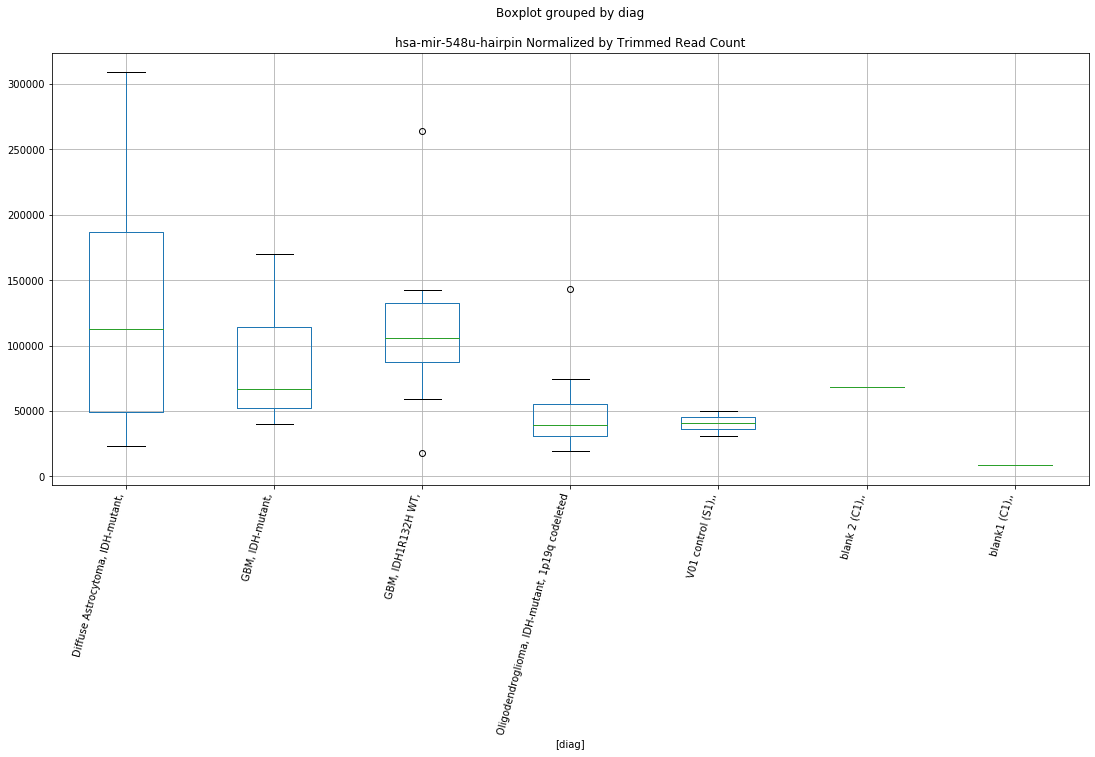

hsa-mir-944-hairpin D-plex bbduk1
	t = -1.9018443758081909
	p = 0.0733191461248945


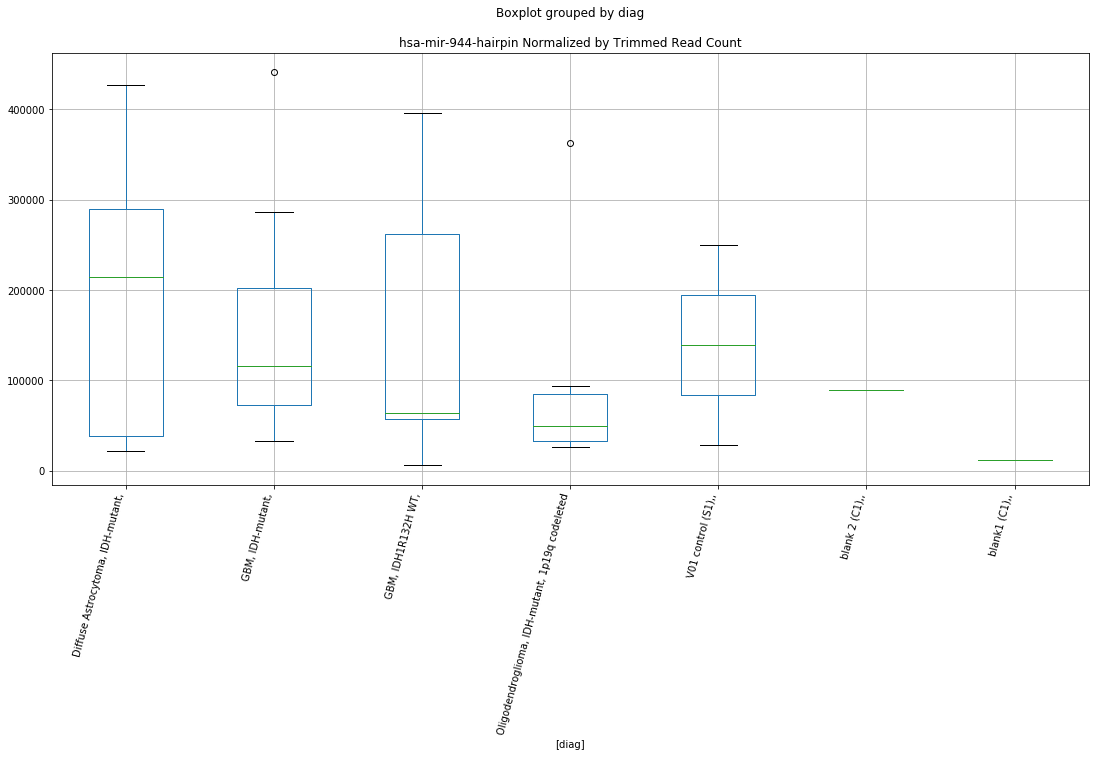

hsa-mir-486-1-hairpin D-plex cutadapt1
	t = -1.800184823266016
	p = 0.08861414669463698


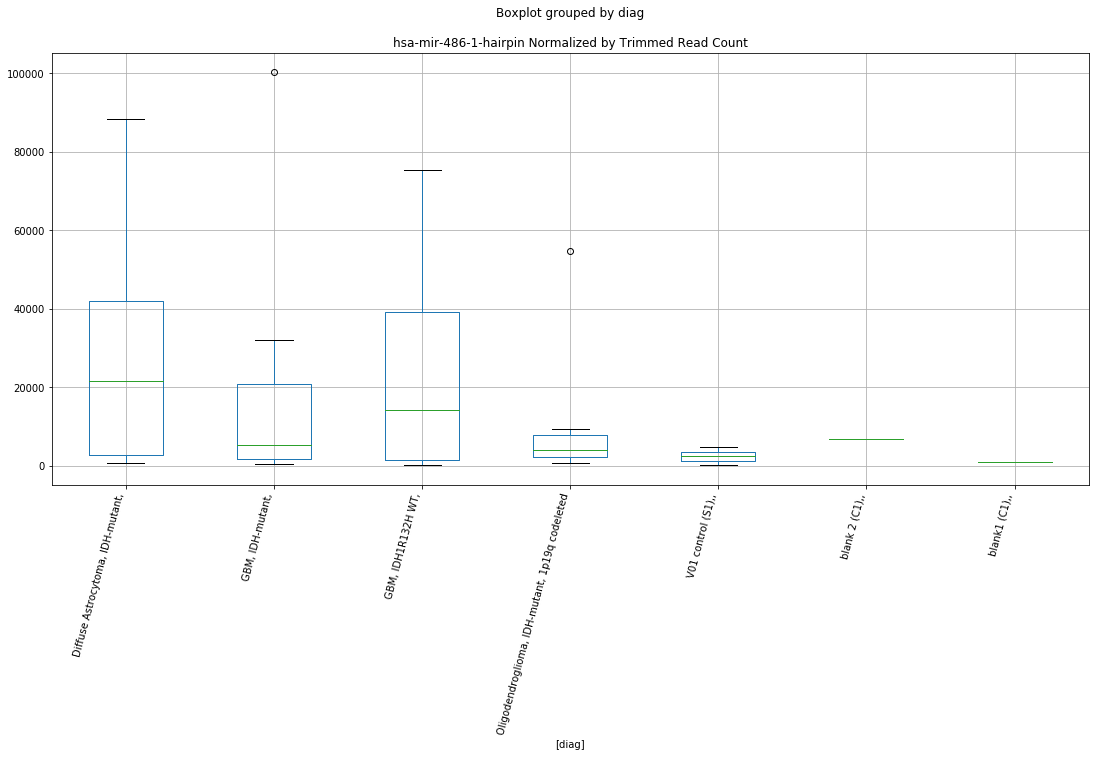

hsa-mir-486-1-hairpin D-plex cutadapt2
	t = -1.800965749749875
	p = 0.08848672597501504


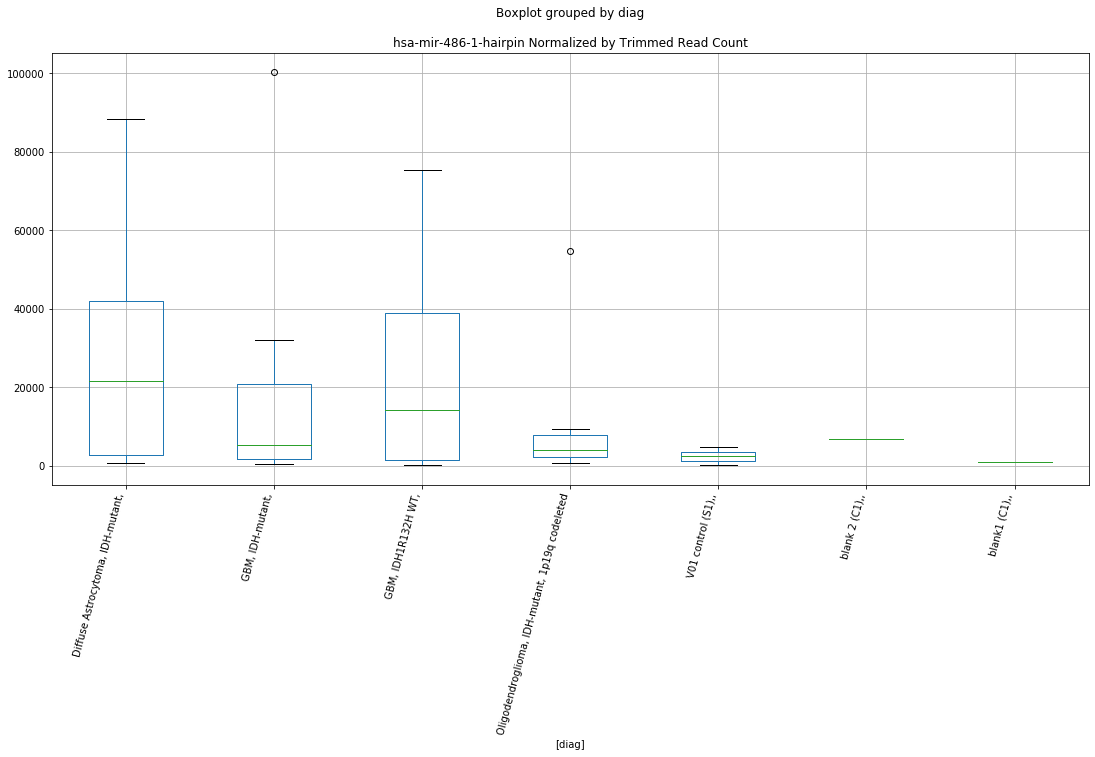

hsa-mir-486-1-hairpin D-plex cutadapt3
	t = -1.800882065183797
	p = 0.08850037279277988


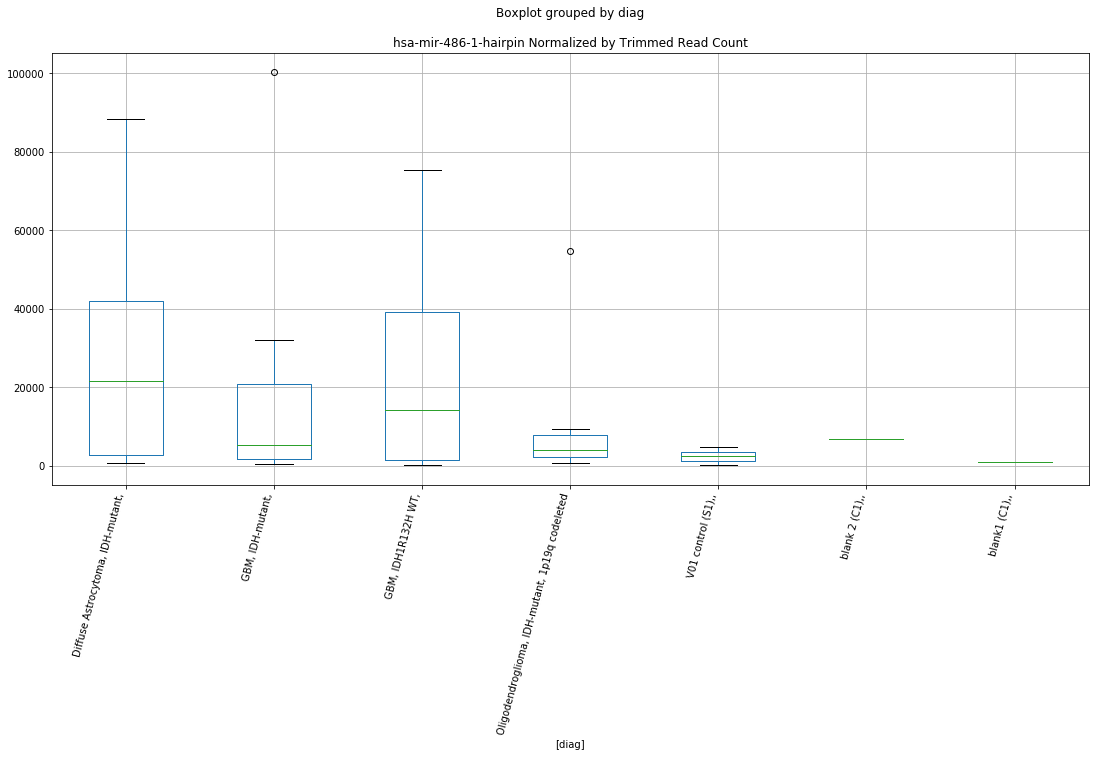

hsa-mir-486-2-hairpin D-plex cutadapt1
	t = -1.765312567737122
	p = 0.0944698362406023


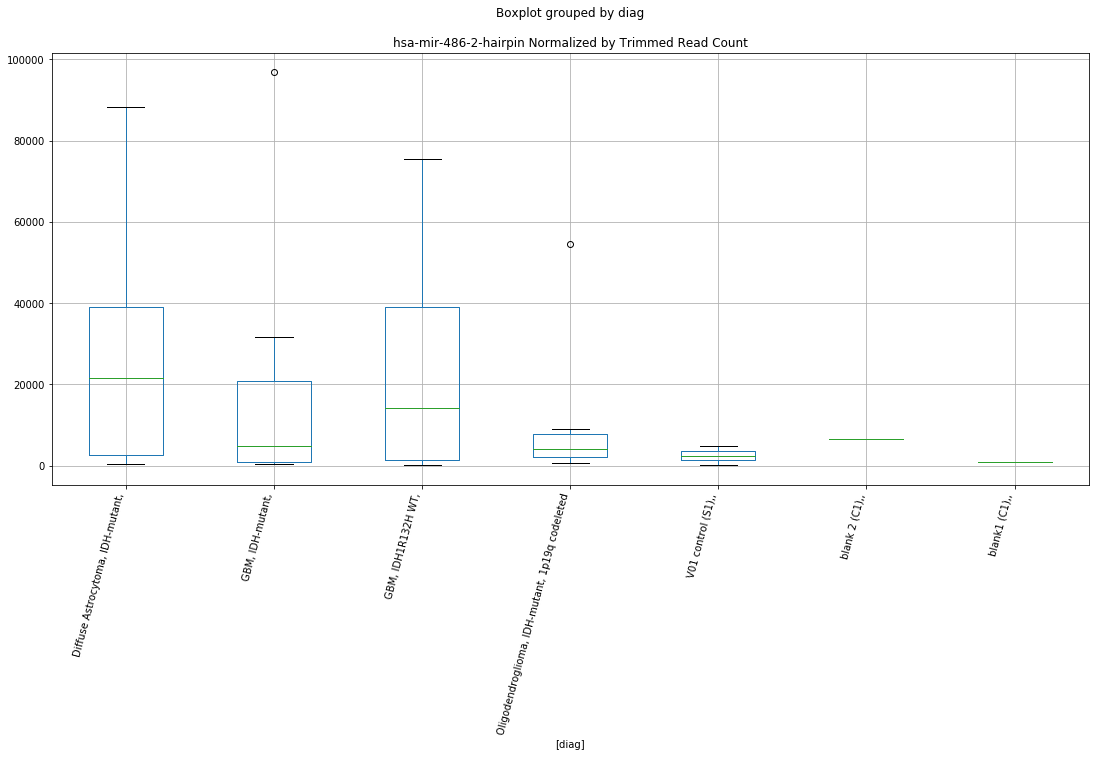

hsa-mir-486-2-hairpin D-plex cutadapt2
	t = -1.7660904202461218
	p = 0.09433563573113646


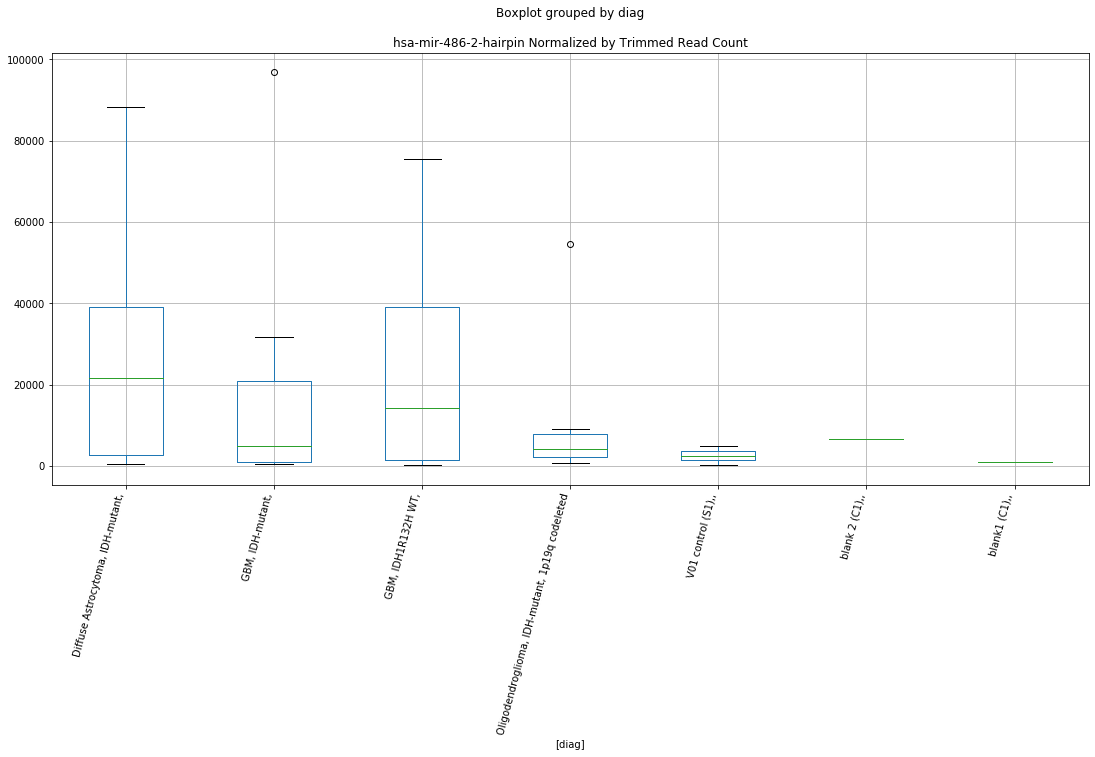

hsa-mir-486-2-hairpin D-plex cutadapt3
	t = -1.7660064279738716
	p = 0.09435011867480977


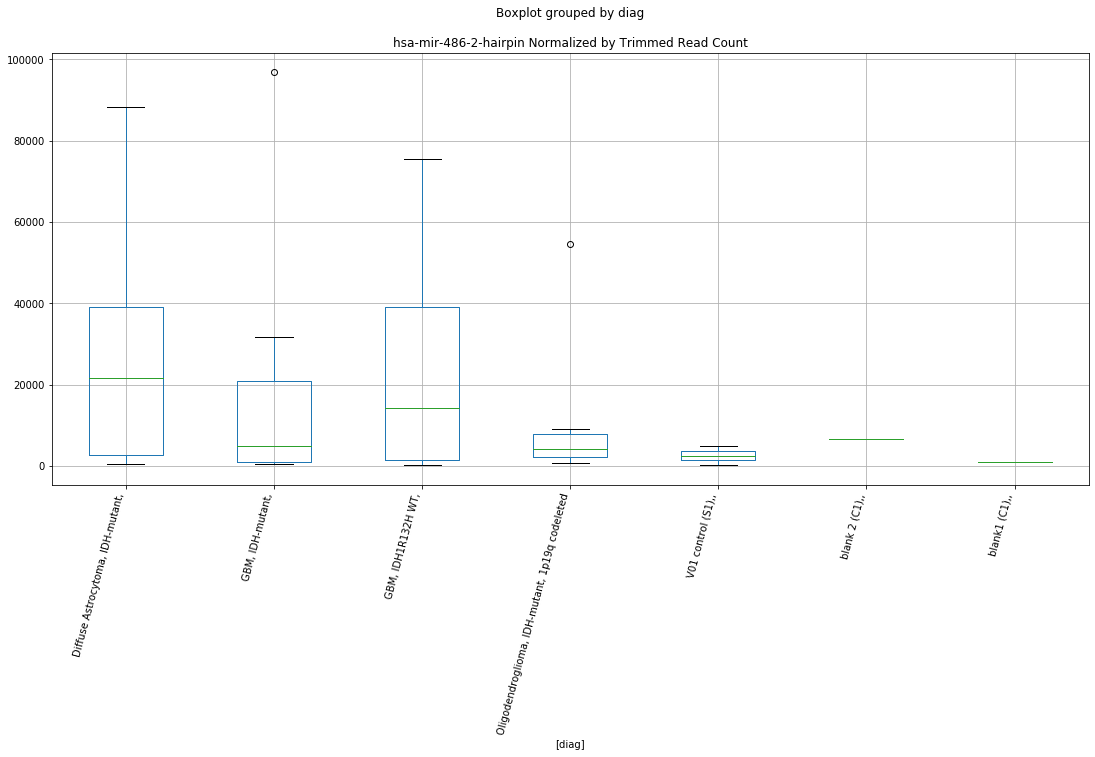

hsa-mir-3908-hairpin D-plex bbduk2
	t = -1.7648083709597484
	p = 0.09455691238087317


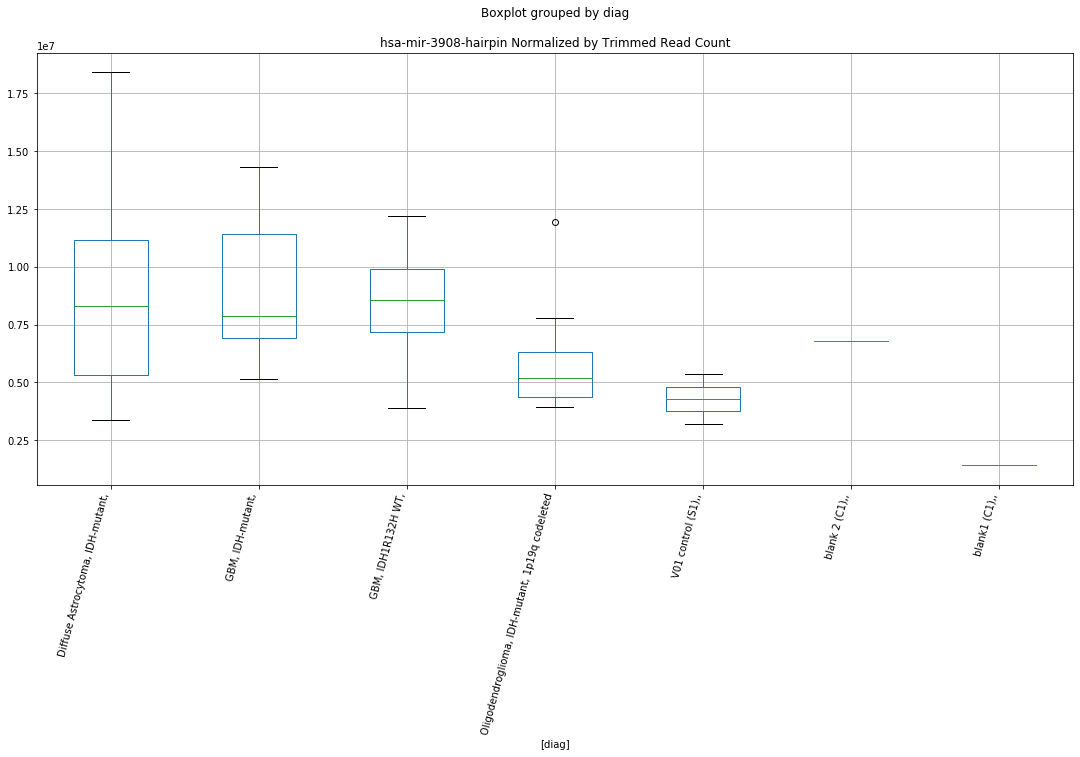

hsa-mir-3908-hairpin D-plex bbduk3
	t = -1.7623356913689423
	p = 0.09498496140108717


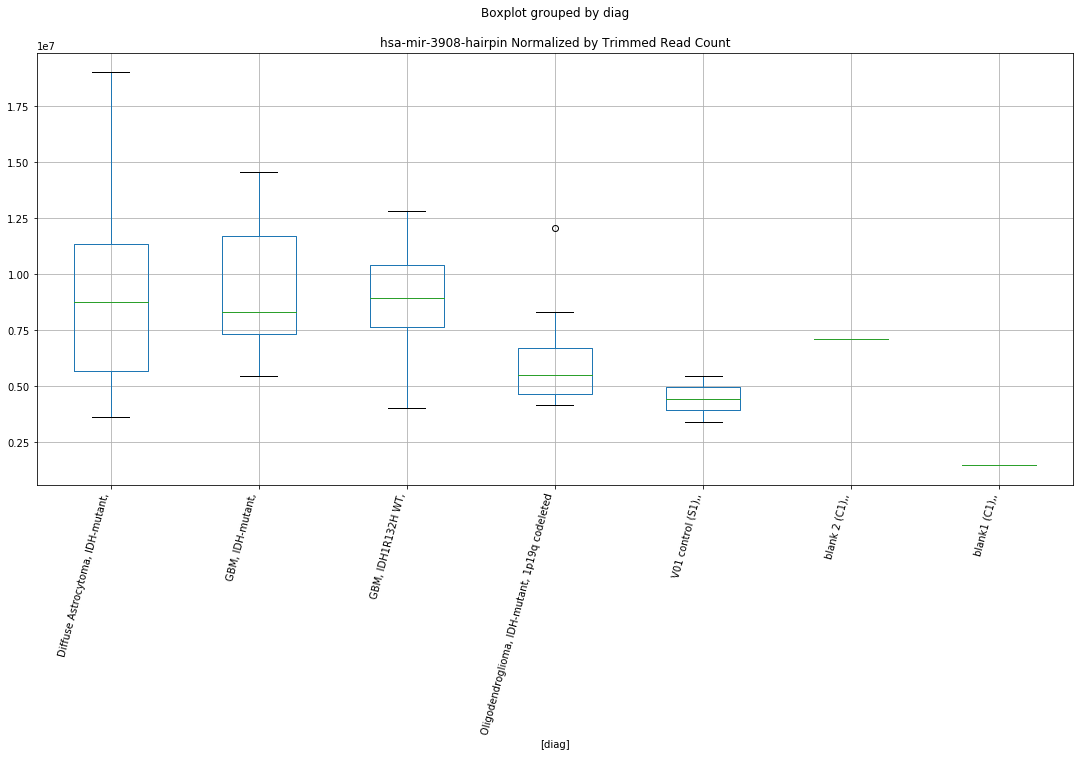

hsa-mir-484-hairpin D-plex cutadapt1
	t = -1.9910188115669878
	p = 0.061879959058147846


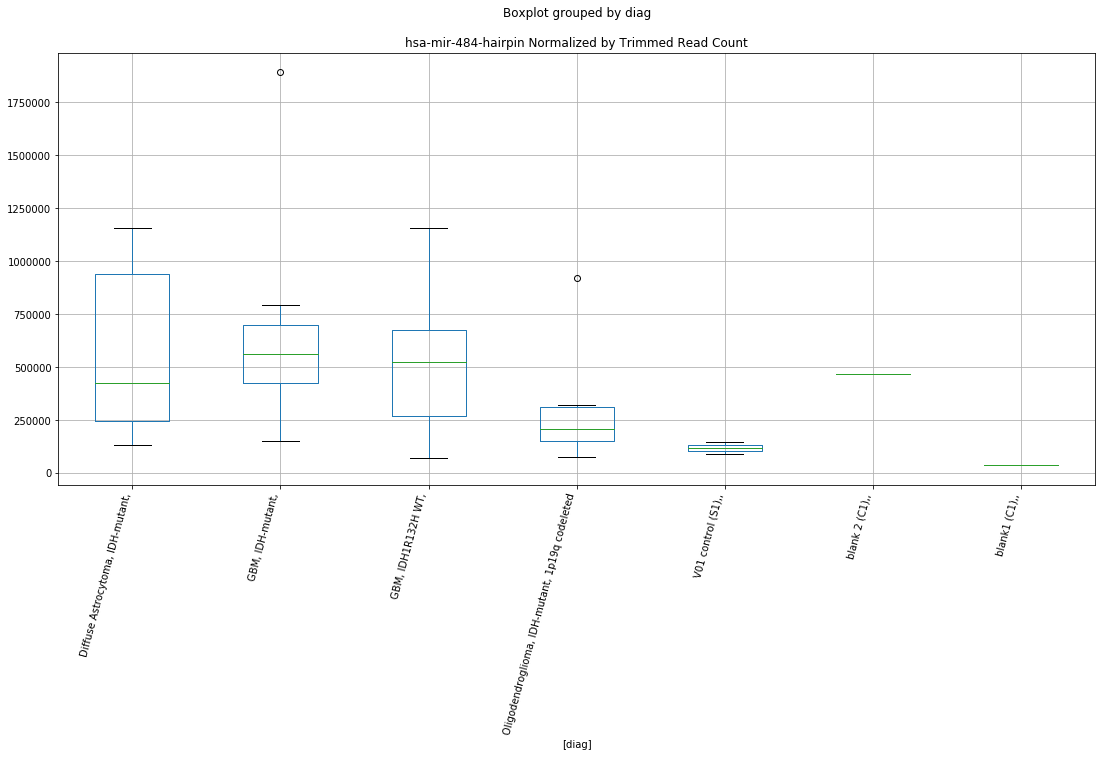

hsa-mir-484-hairpin D-plex cutadapt2
	t = -1.991511386500976
	p = 0.061821480015555645


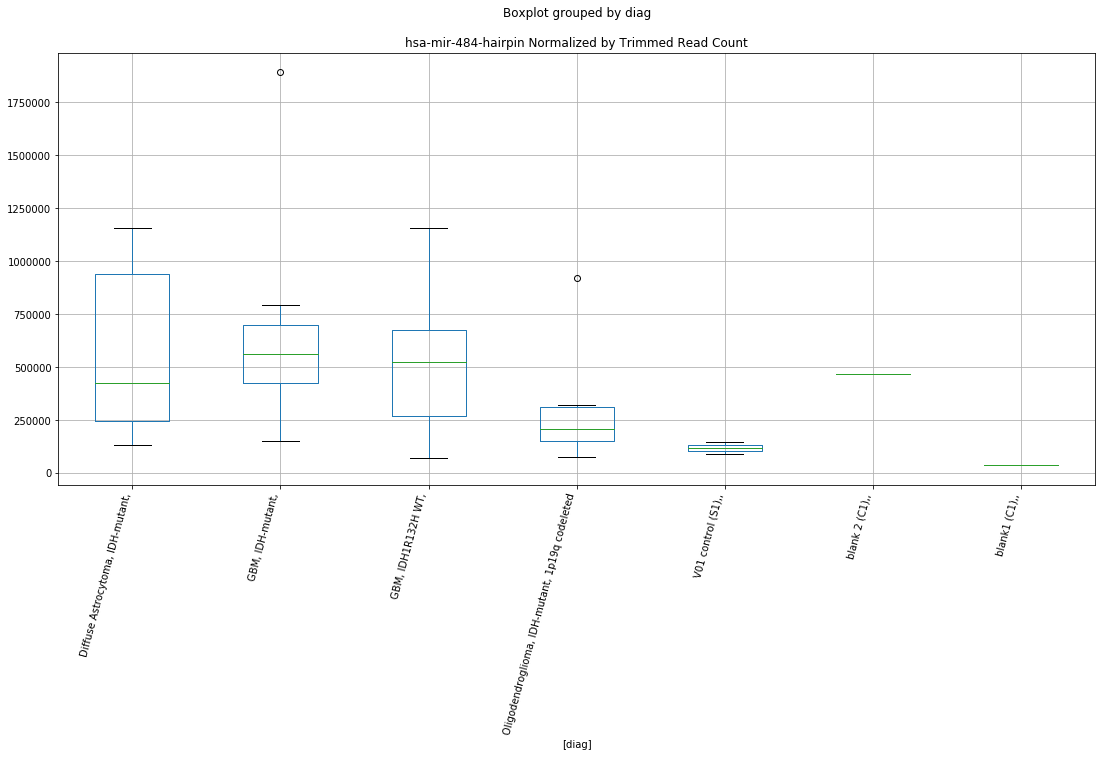

hsa-mir-484-hairpin D-plex cutadapt3
	t = -1.9914863237483302
	p = 0.061824454295444524


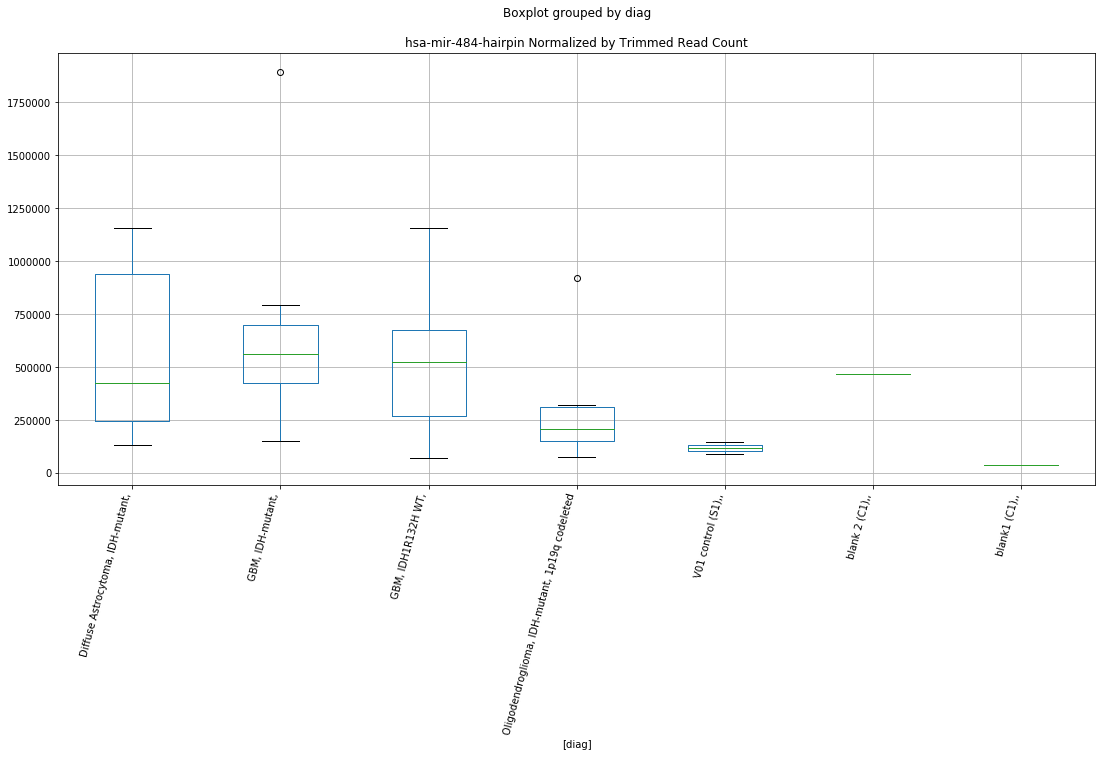

hsa-mir-3658-hairpin D-plex bbduk1
	t = -1.800366476462714
	p = 0.08858449274859748


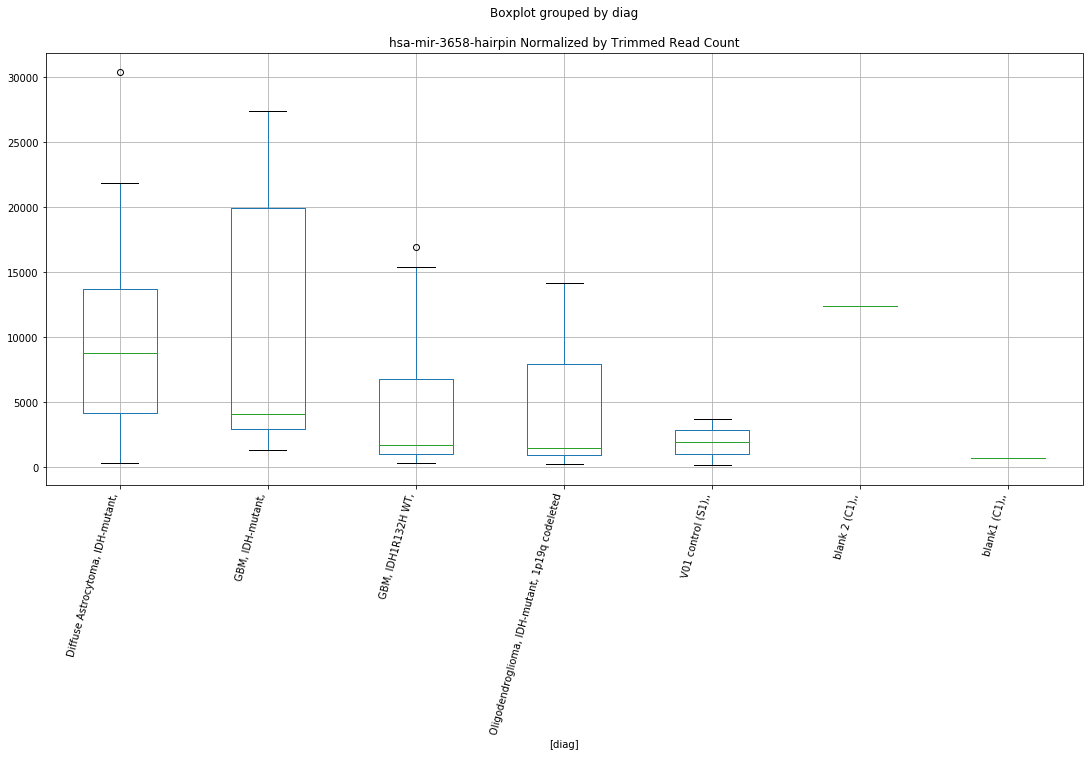

hsa-mir-3658-hairpin D-plex cutadapt1
	t = -1.9386430759116569
	p = 0.06838821690184979


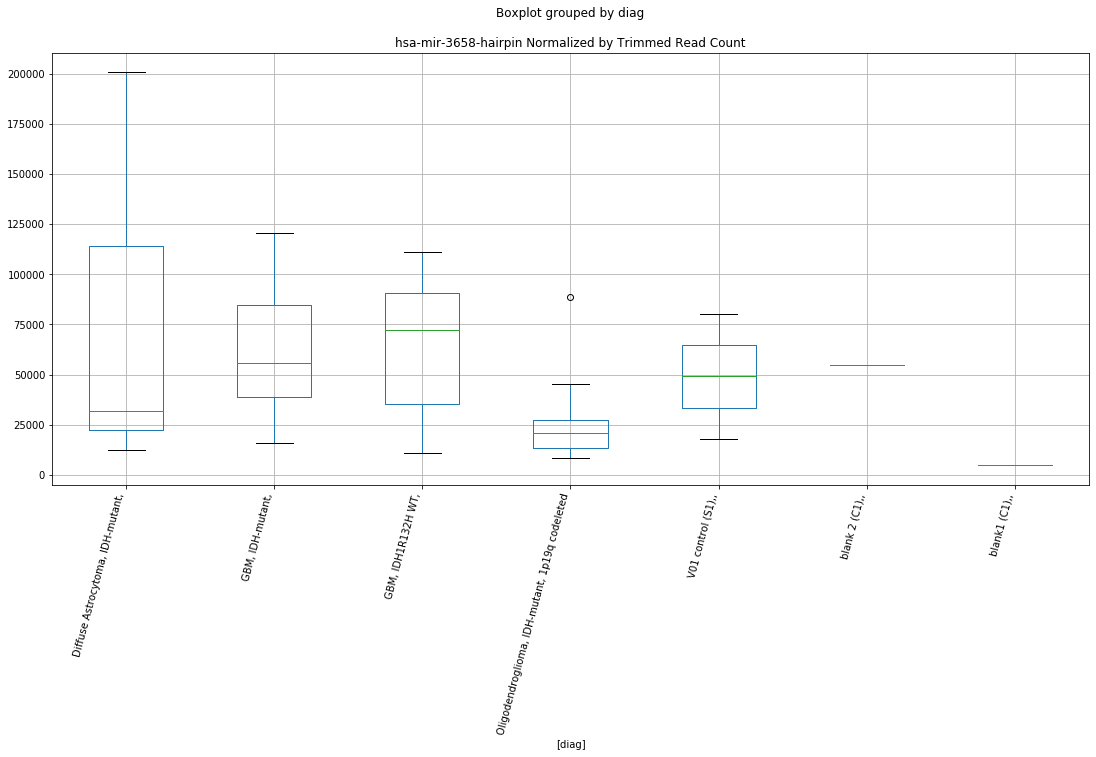

hsa-mir-3658-hairpin D-plex cutadapt2
	t = -1.9385876833522135
	p = 0.06839541185123327


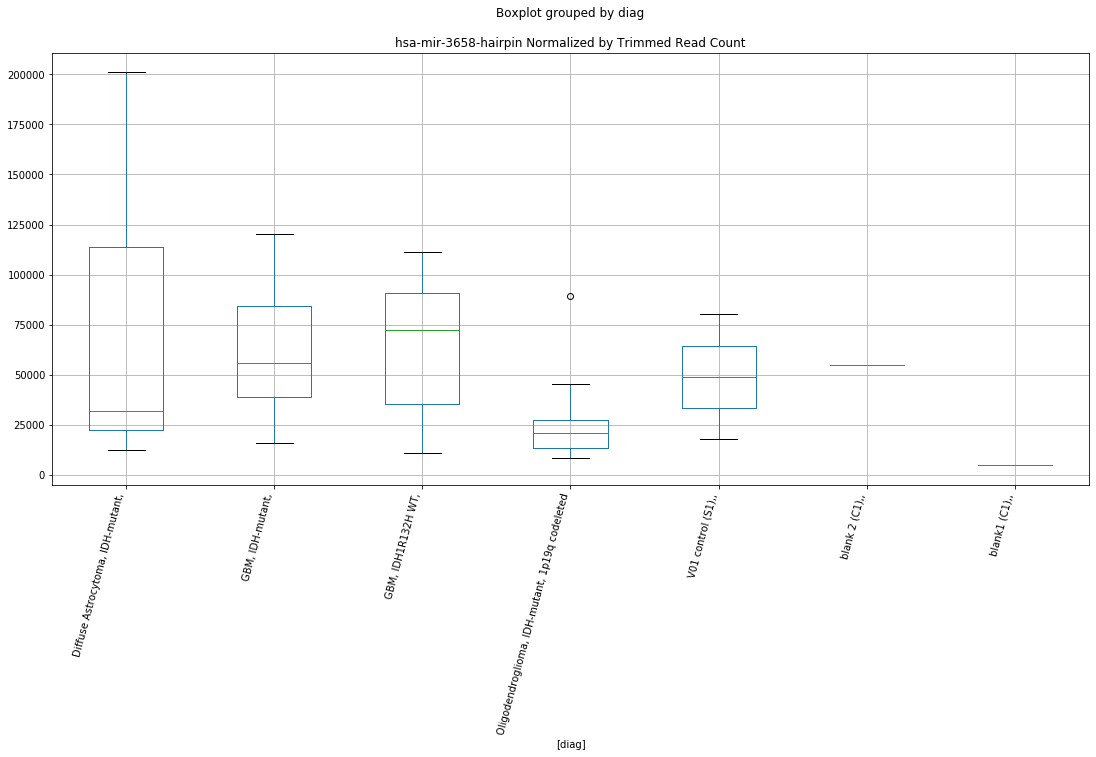

hsa-mir-3658-hairpin D-plex cutadapt3
	t = -1.9419625913175687
	p = 0.06795827429404297


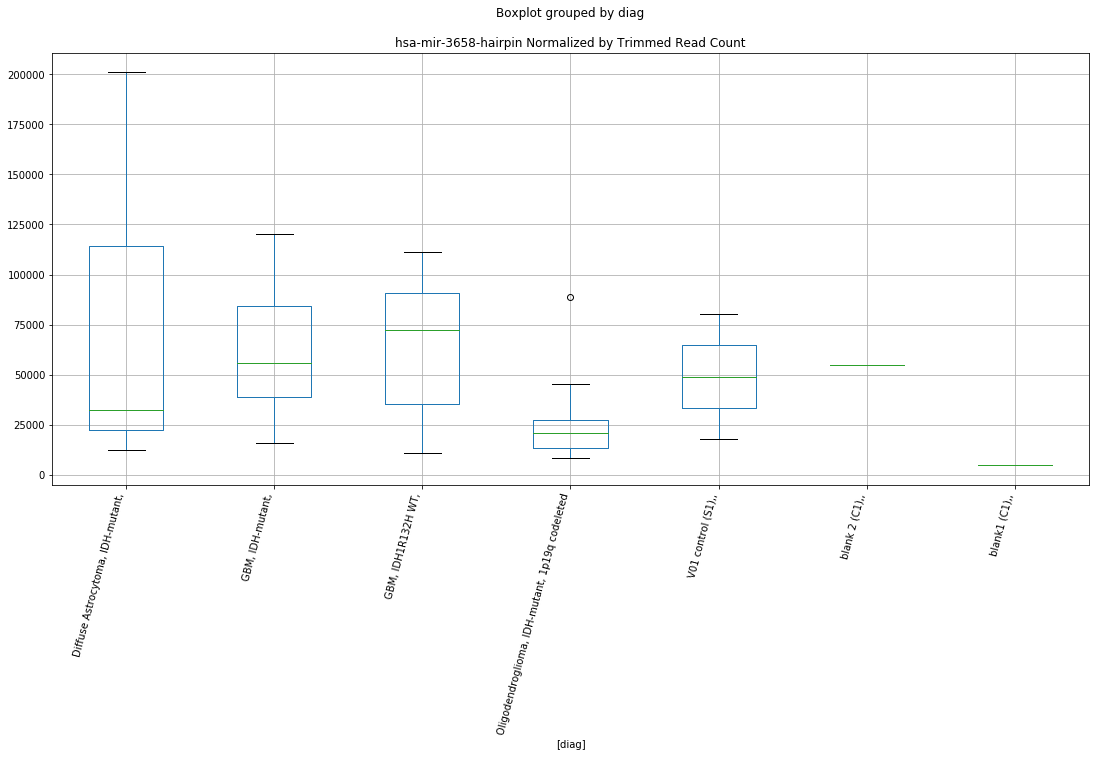

hsa-mir-567-hairpin D-plex cutadapt1
	t = -2.0419543754115916
	p = 0.05608937909077346


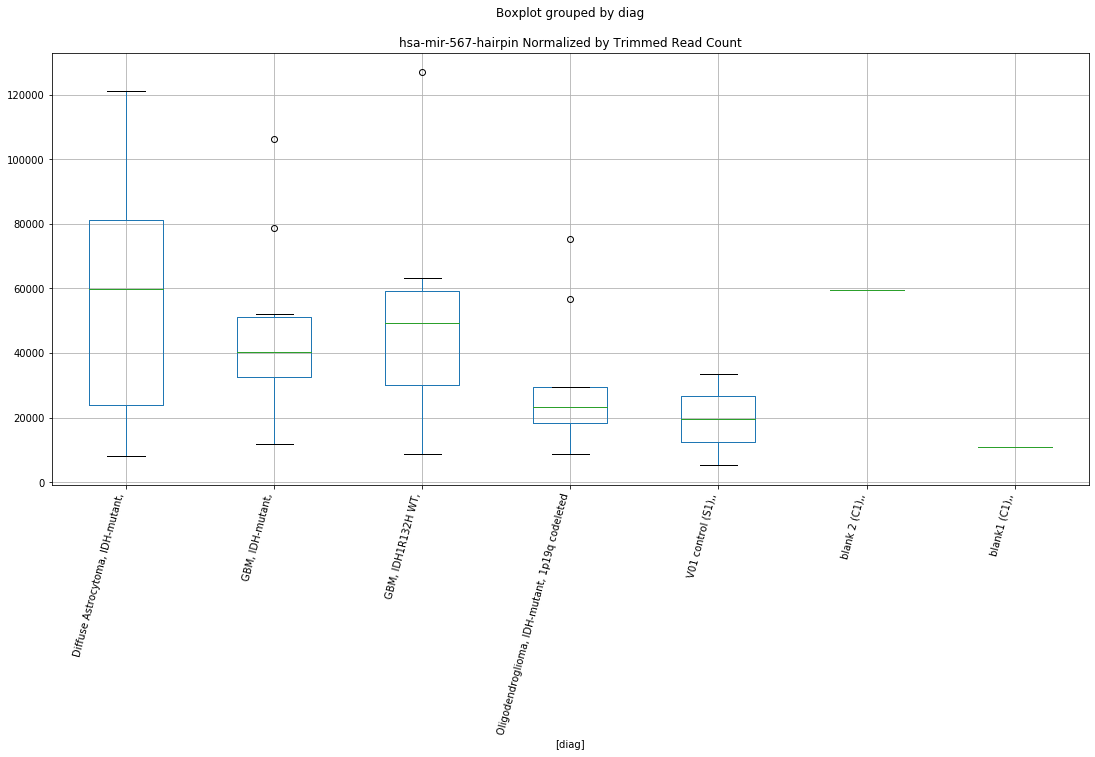

hsa-mir-567-hairpin D-plex cutadapt2
	t = -2.043023426154904
	p = 0.05597326185680311


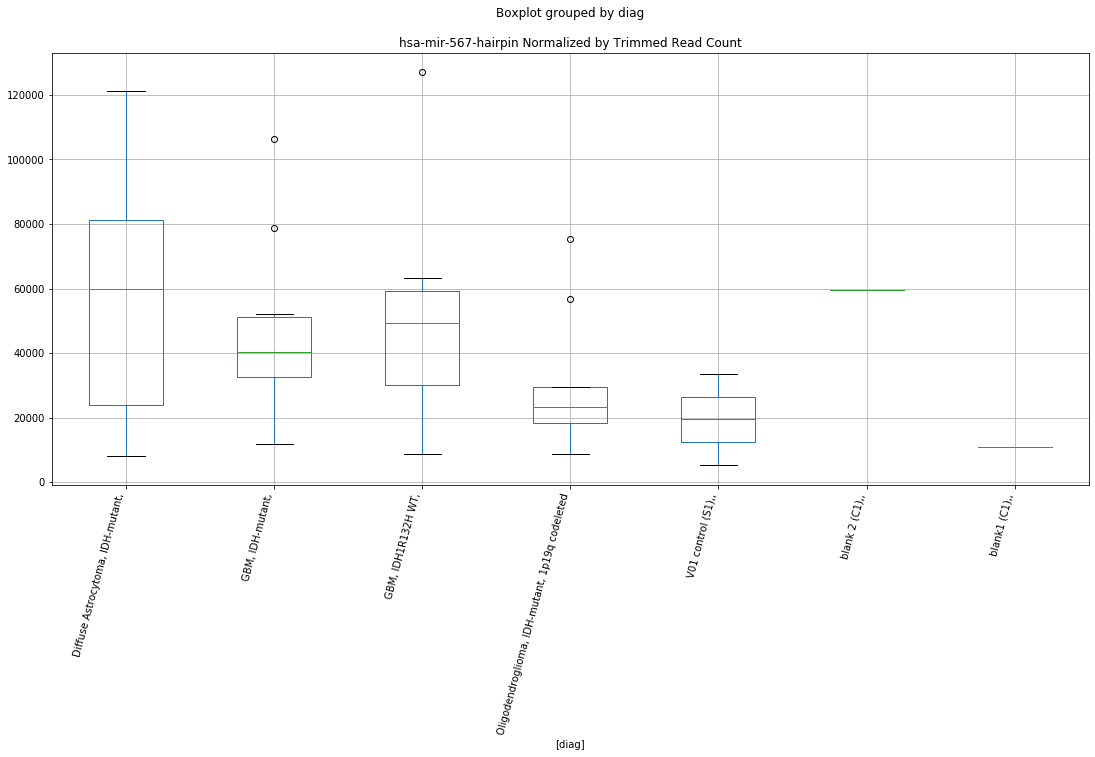

hsa-mir-567-hairpin D-plex cutadapt3
	t = -2.043025704859016
	p = 0.05597301458247591


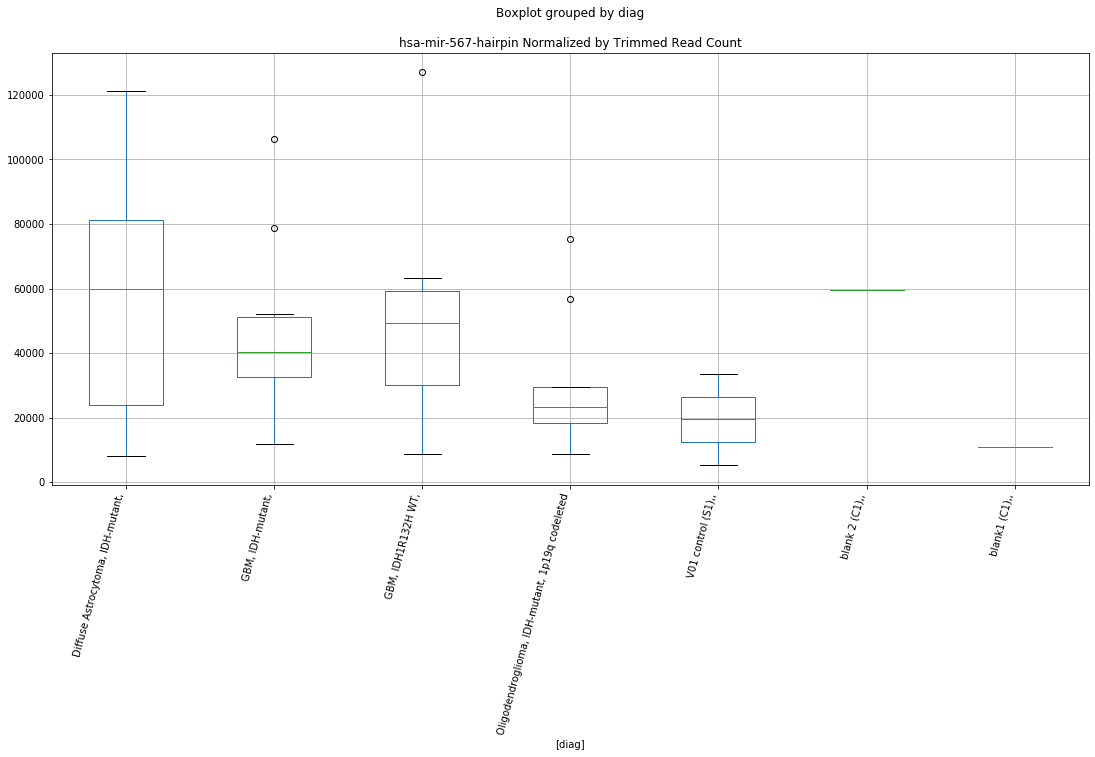

hsa-mir-8052-hairpin D-plex cutadapt1
	t = -2.1125857718652314
	p = 0.04886911341759986


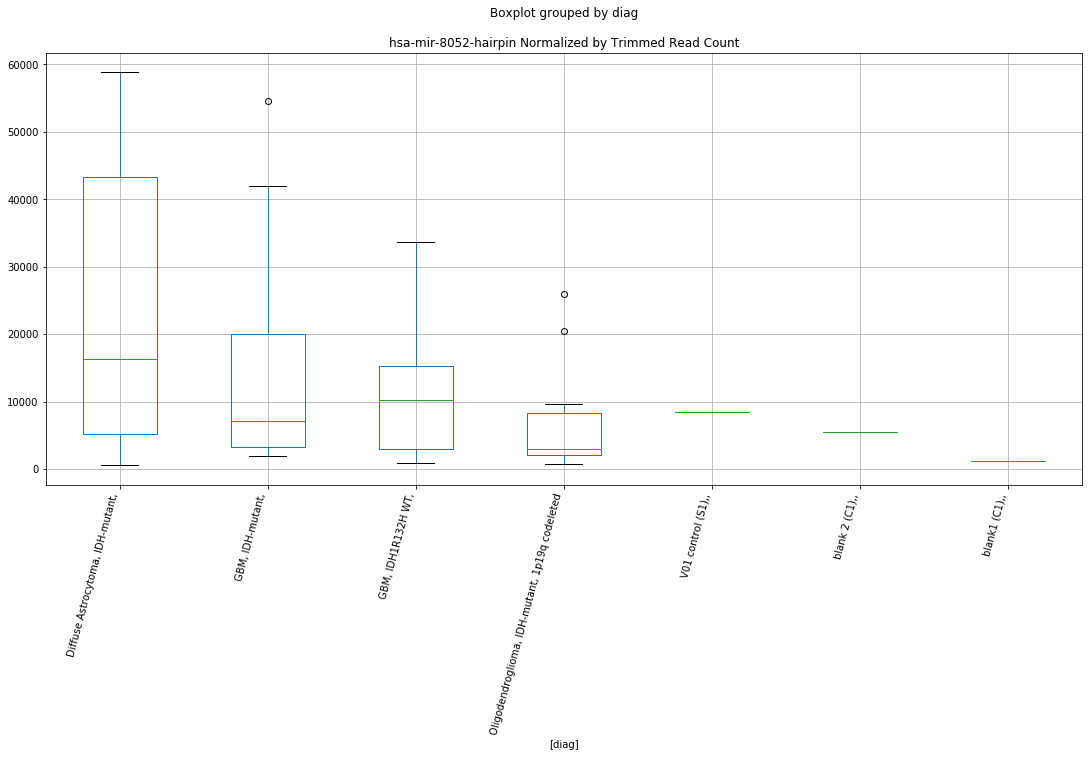

hsa-mir-8052-hairpin D-plex cutadapt2
	t = -2.112617019768805
	p = 0.048866115209812926


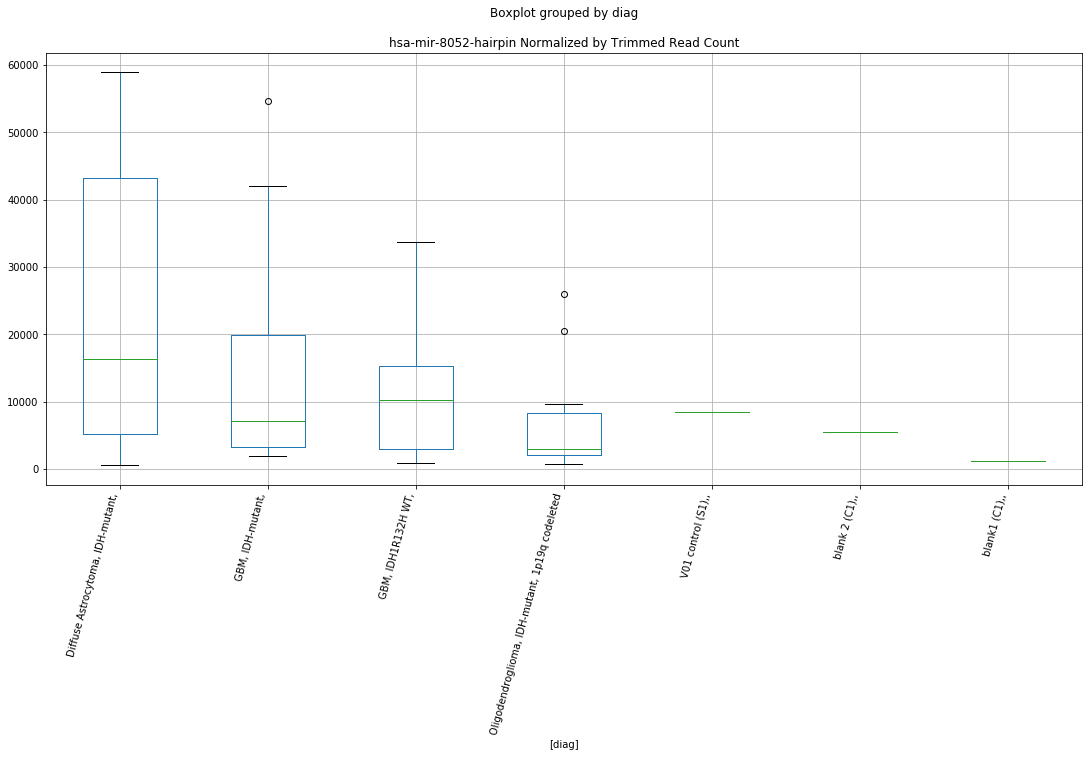

hsa-mir-8052-hairpin D-plex cutadapt3
	t = -2.112627126260637
	p = 0.04886514553698773


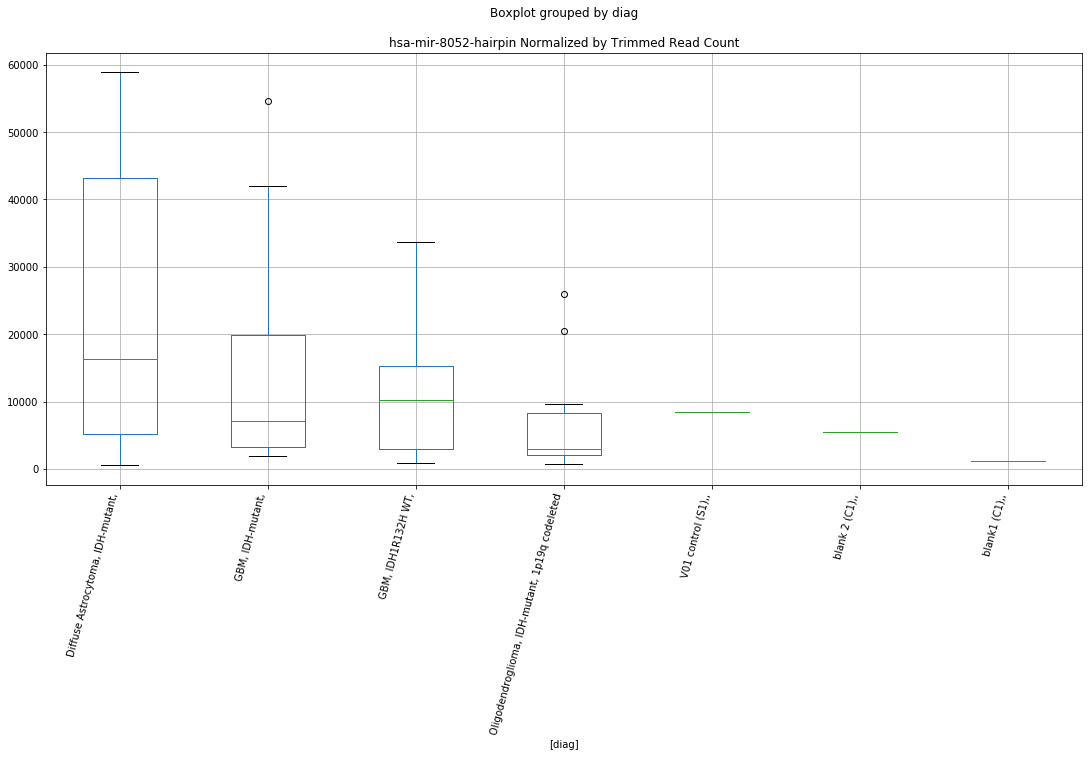

hsa-mir-3613-5p-mature D-plex bbduk2
	t = -1.7928130879560331
	p = 0.08982488549520708


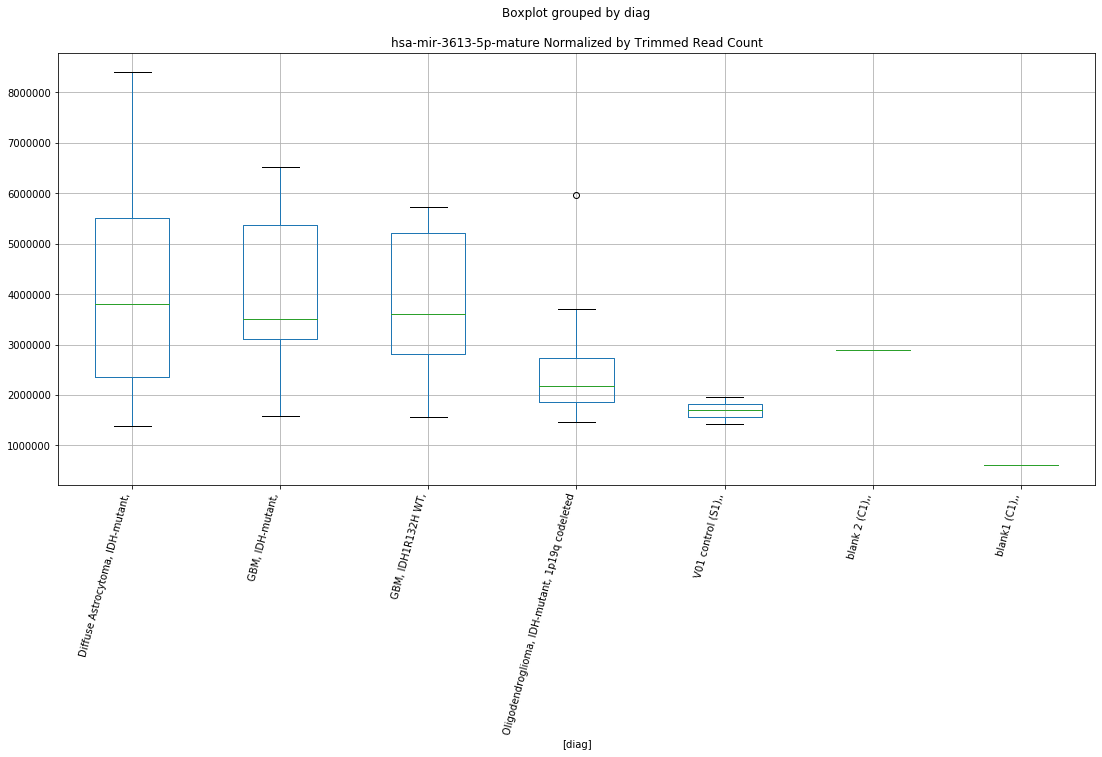

hsa-mir-3613-5p-mature D-plex bbduk3
	t = -1.7810694788895103
	p = 0.09178349278138252


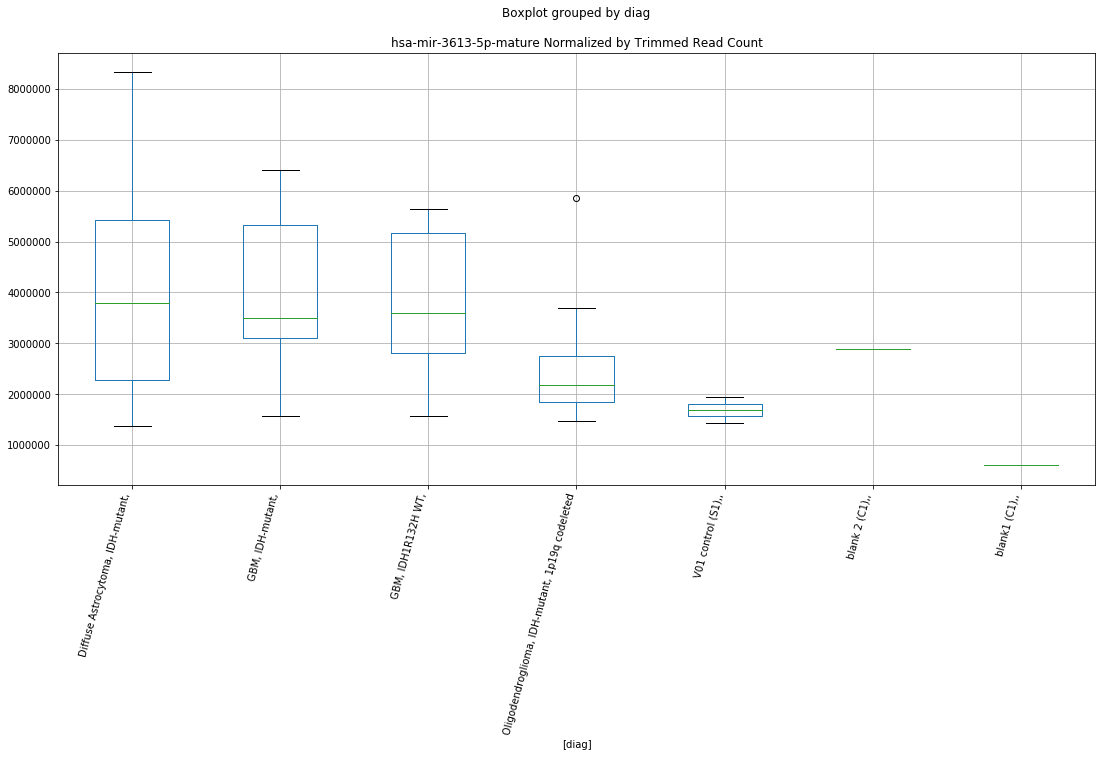

hsa-mir-509-1-hairpin D-plex bbduk2
	t = -2.406745118834779
	p = 0.027049609120159707


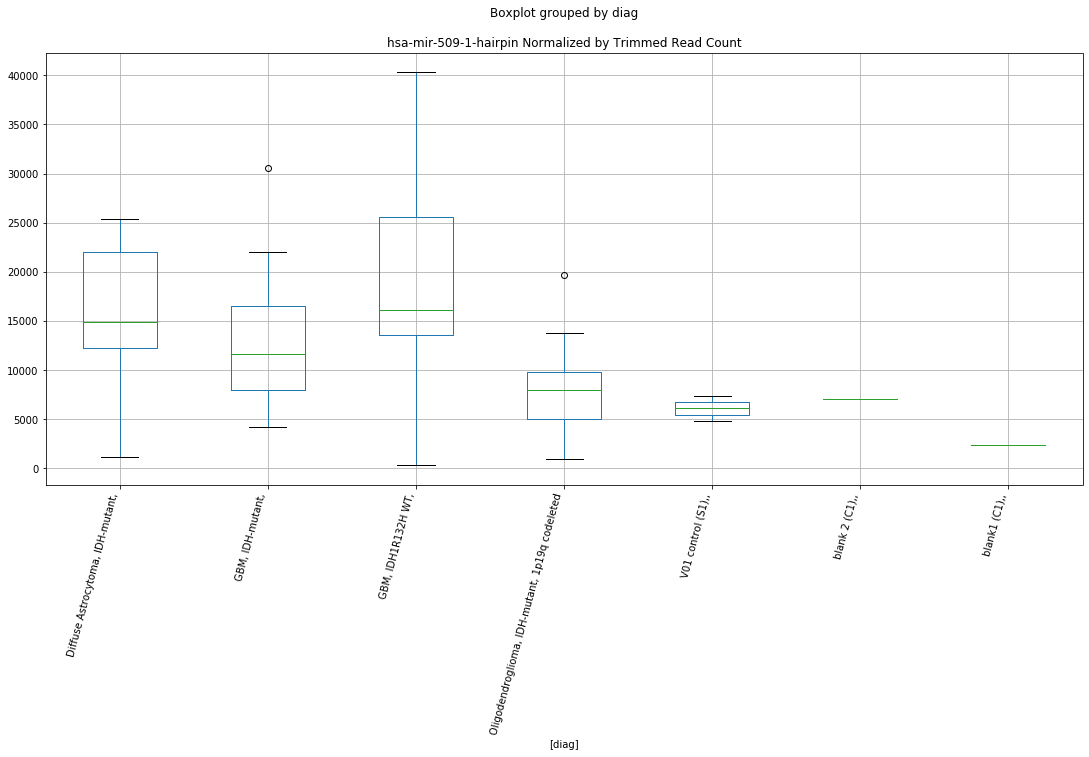

hsa-mir-509-1-hairpin D-plex bbduk3
	t = -2.3901435944579523
	p = 0.0279869975956702


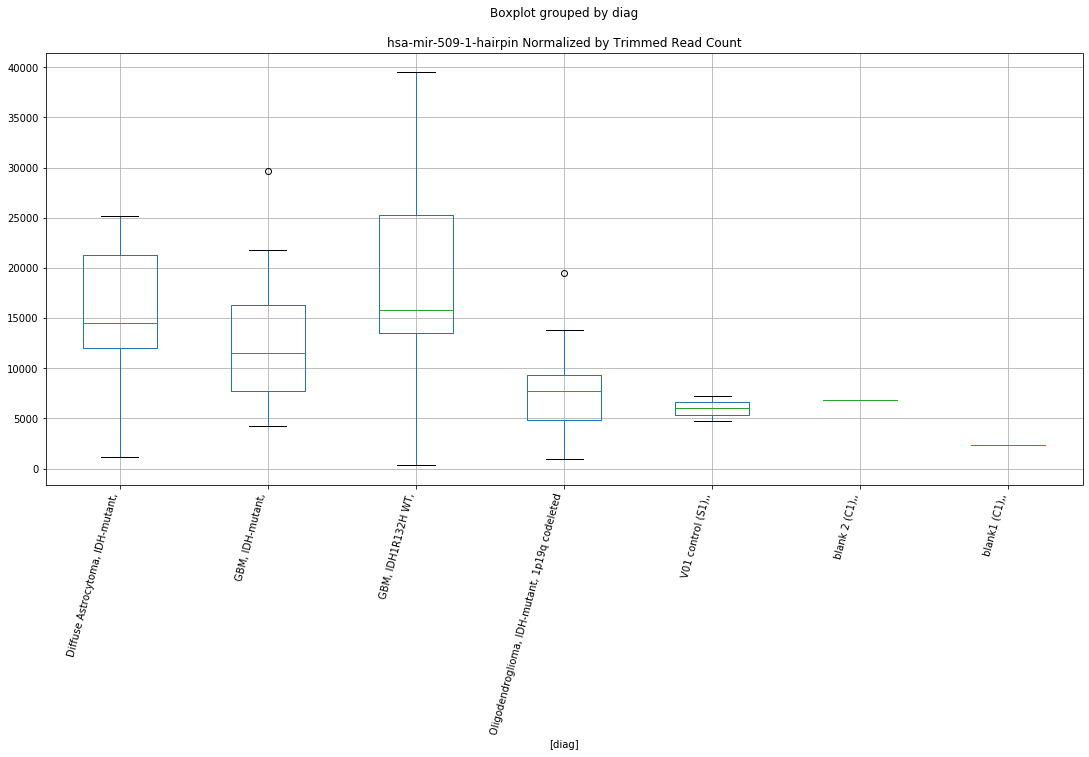

hsa-mir-509-2-hairpin D-plex bbduk2
	t = -2.4117868983224366
	p = 0.026770795830736587


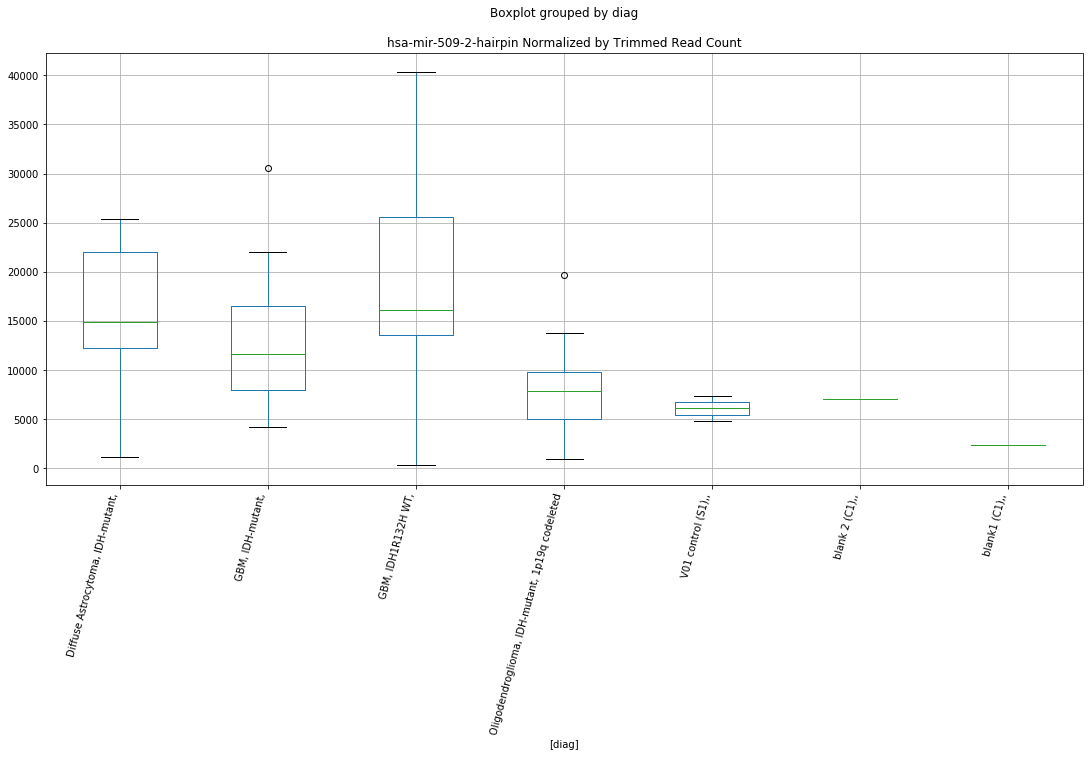

hsa-mir-509-2-hairpin D-plex bbduk3
	t = -2.3952339677642747
	p = 0.027696395214637615


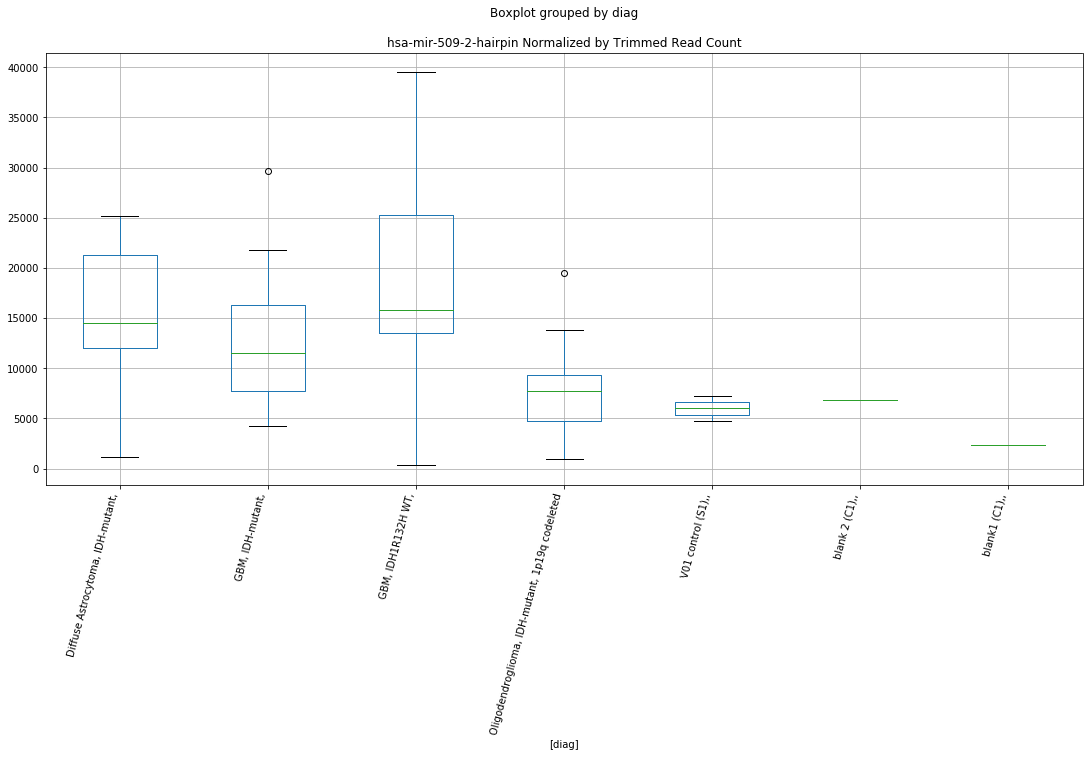

hsa-mir-509-3-hairpin D-plex bbduk2
	t = -2.4171144101254347
	p = 0.0264791055858835


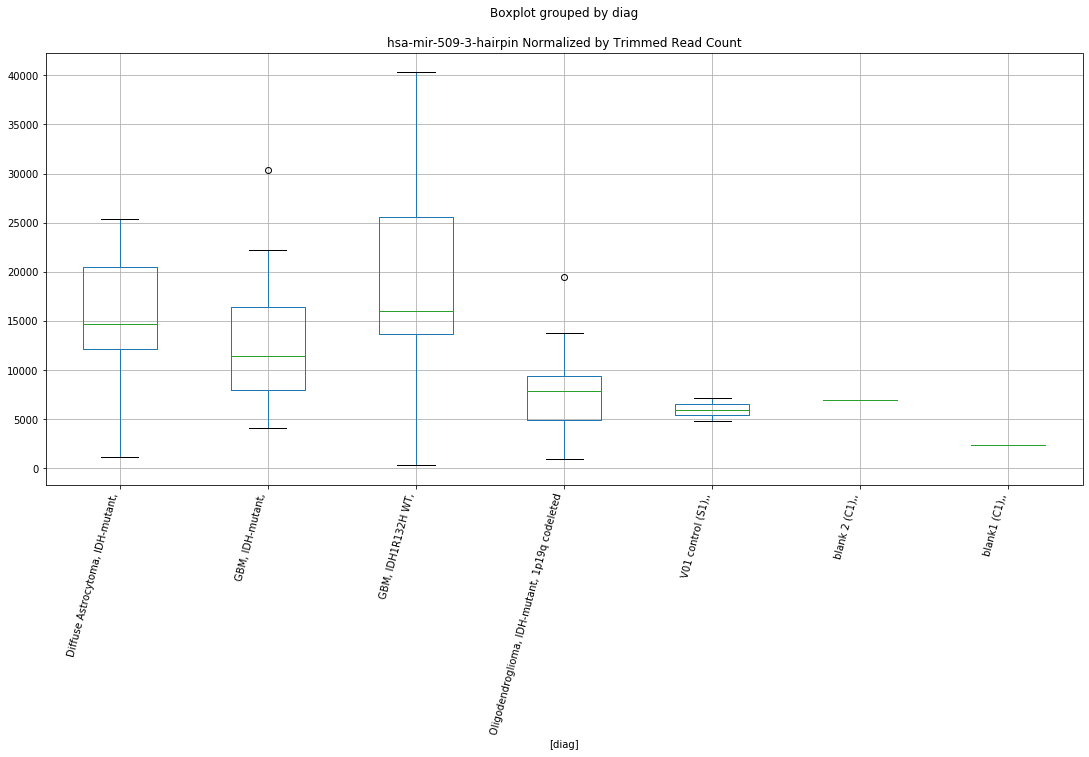

hsa-mir-509-3-hairpin D-plex bbduk3
	t = -2.3840611965638274
	p = 0.028337968479828113


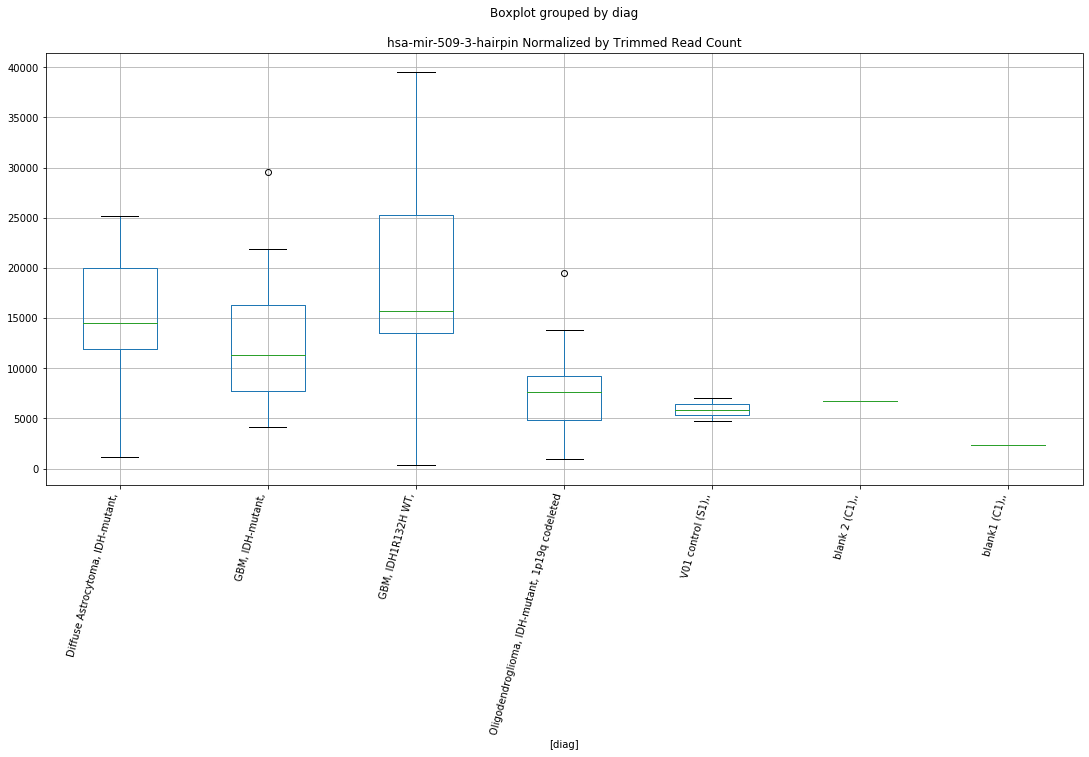

hsa-mir-6787-hairpin D-plex cutadapt1
	t = -1.7968717592017418
	p = 0.08915651124504272


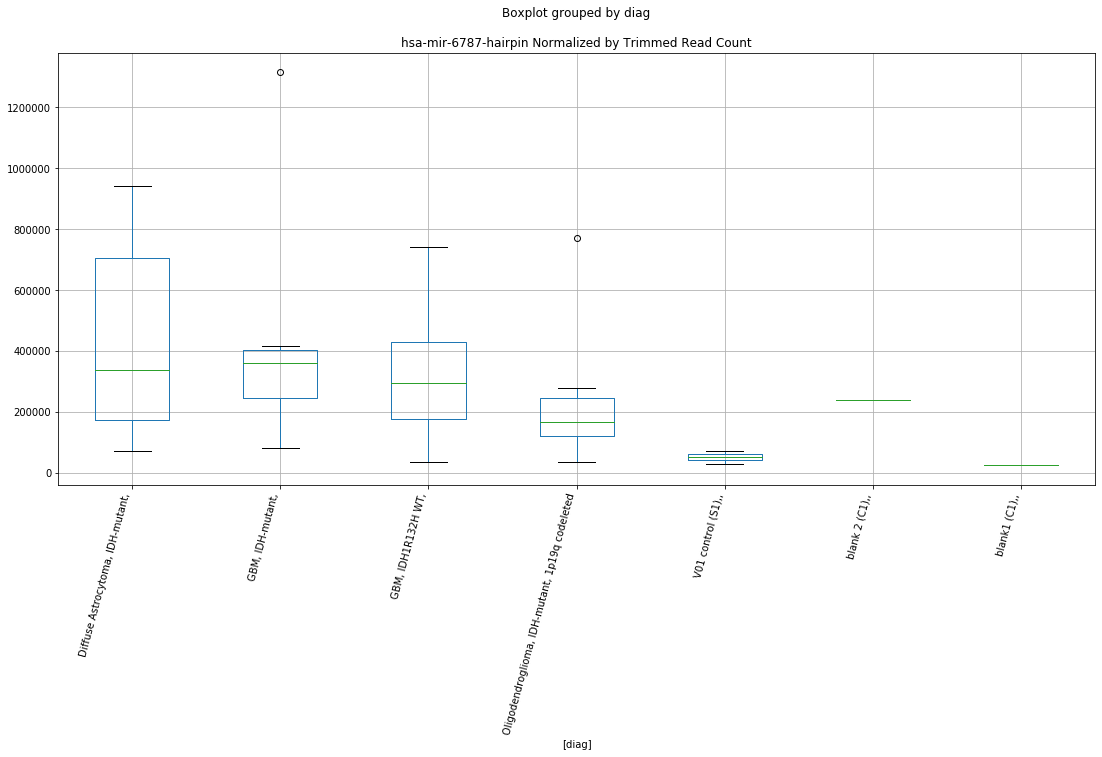

hsa-mir-6787-hairpin D-plex cutadapt2
	t = -1.7974548943966313
	p = 0.08906083942287328


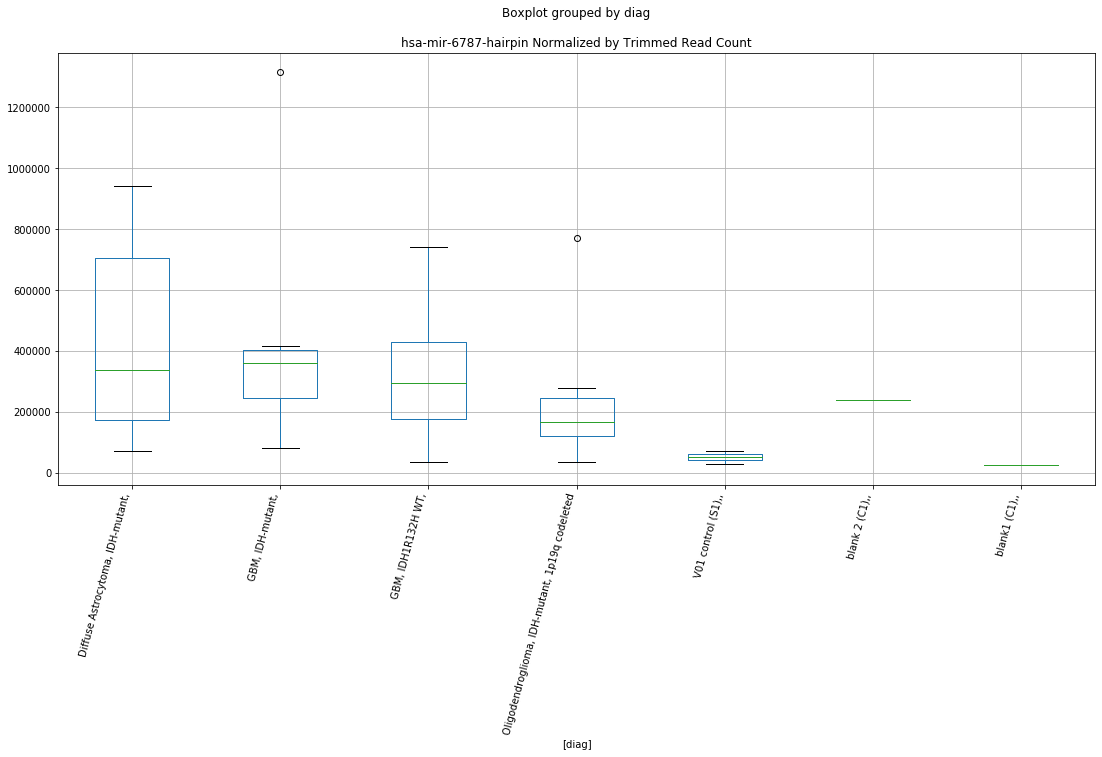

hsa-mir-6787-hairpin D-plex cutadapt3
	t = -1.7974074710431511
	p = 0.08906861656307581


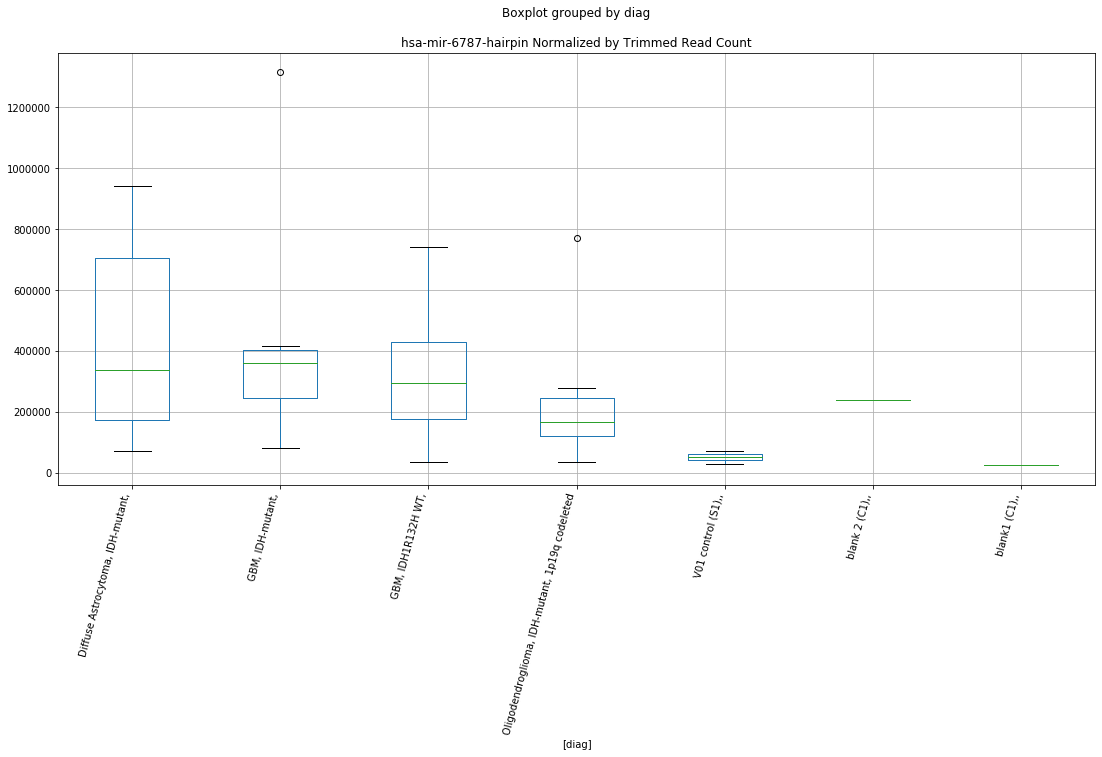

hsa-mir-3613-3p-mature D-plex cutadapt1
	t = -1.736793024961182
	p = 0.09950604558685543


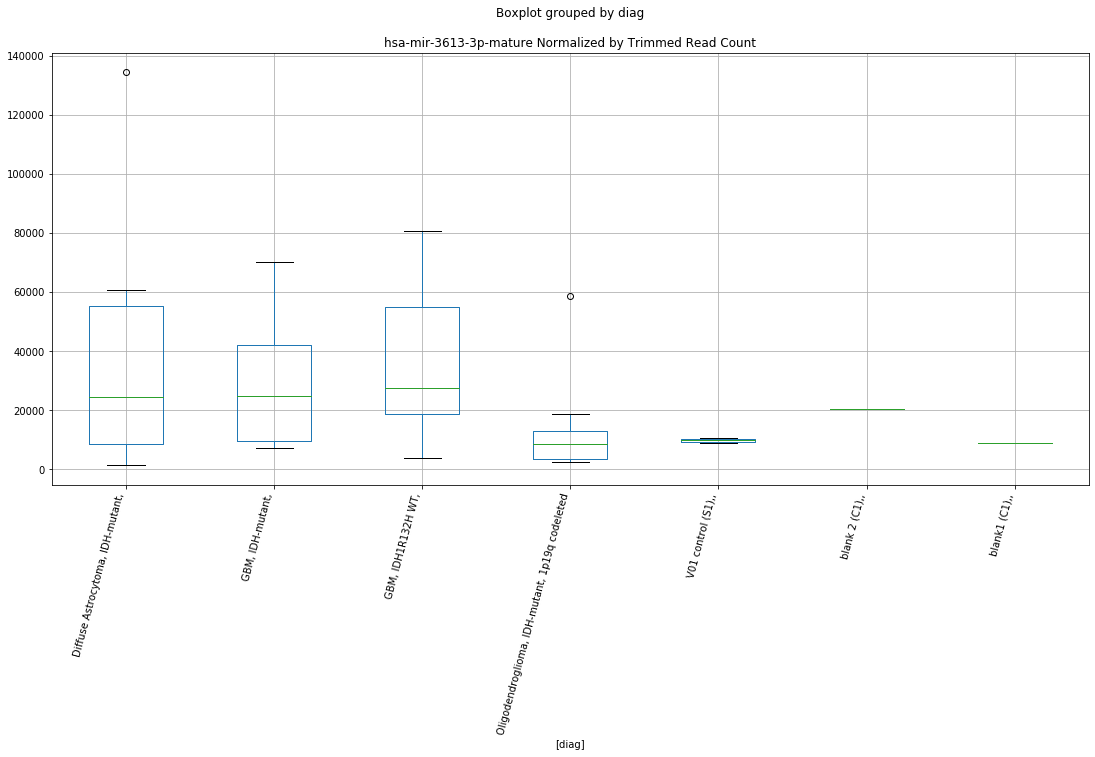

hsa-mir-3613-3p-mature D-plex cutadapt2
	t = -1.7365494745807797
	p = 0.09955003599825046


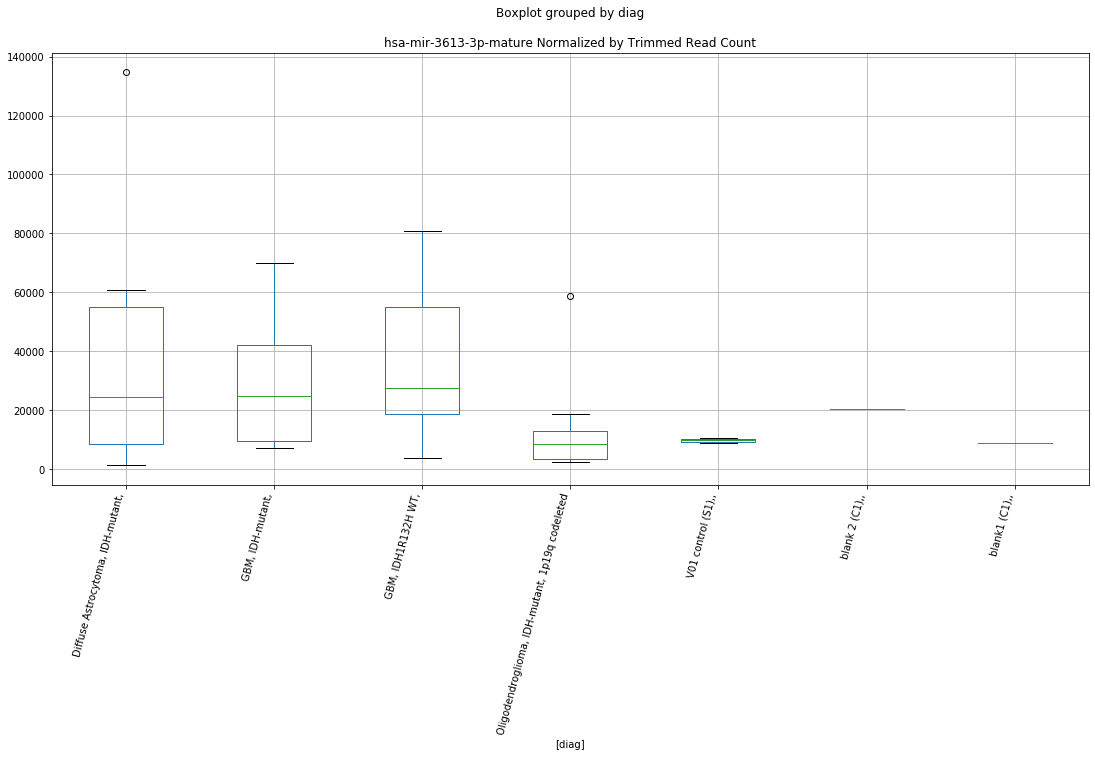

hsa-mir-3613-3p-mature D-plex cutadapt3
	t = -1.7366346327259554
	p = 0.09953465270198869


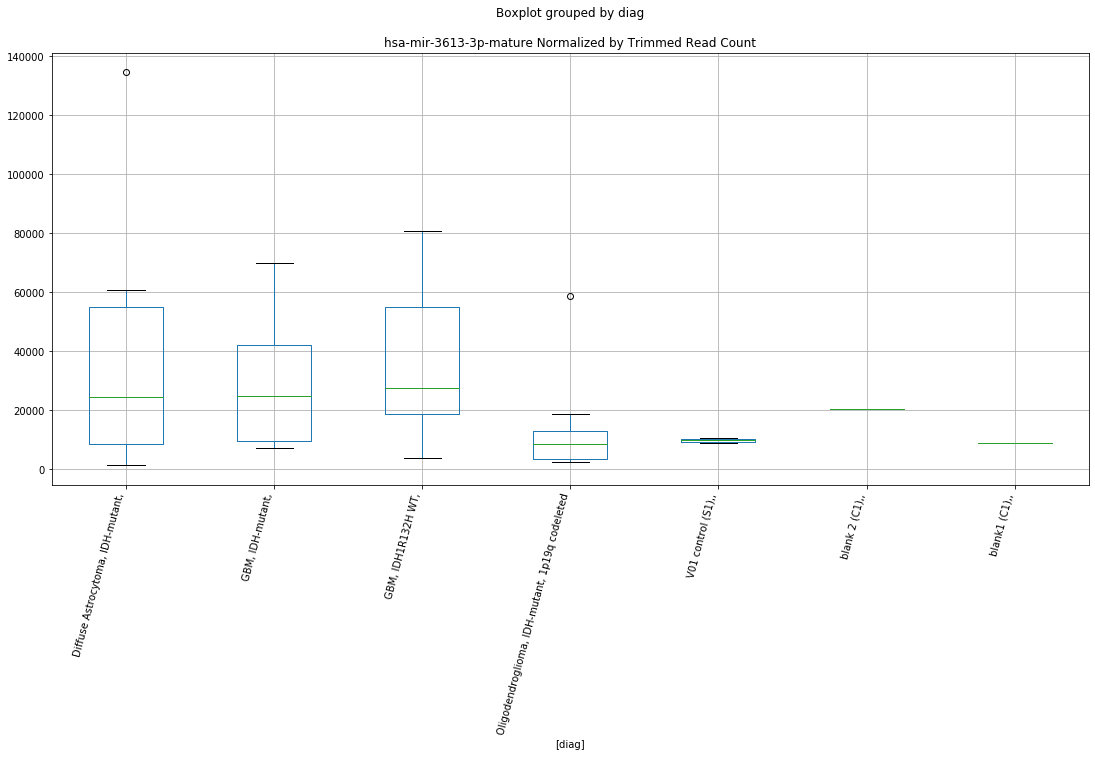

In [62]:
for mirna in mirnas:
    #print()
    for labkit in "D-plex","Lexogen":
        for trimmer in "bbduk1","bbduk2","bbduk3","cutadapt1","cutadapt2","cutadapt3":
            t, p = stats.ttest_ind(
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer) & 
                    (dfn["diag"]=="Oligodendroglioma, IDH-mutant, 1p19q codeleted"))][mirna],
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer) & 
                    (dfn["diag"]=="Diffuse Astrocytoma, IDH-mutant,"))][mirna])
            if p < 0.10:
                print(mirna+" "+labkit+" "+trimmer)
                print("\tt = " + str(t))
                print("\tp = " + str(p))
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer))].boxplot(column=mirna,by=['diag'])
                plt.title(mirna + " Normalized by Trimmed Read Count")
                plt.xticks(rotation=75,ha='right')
                plt.show()


NAALADL2 D-plex cutadapt1
	t = -1.9945557755171512
	p = 0.06146114605789118


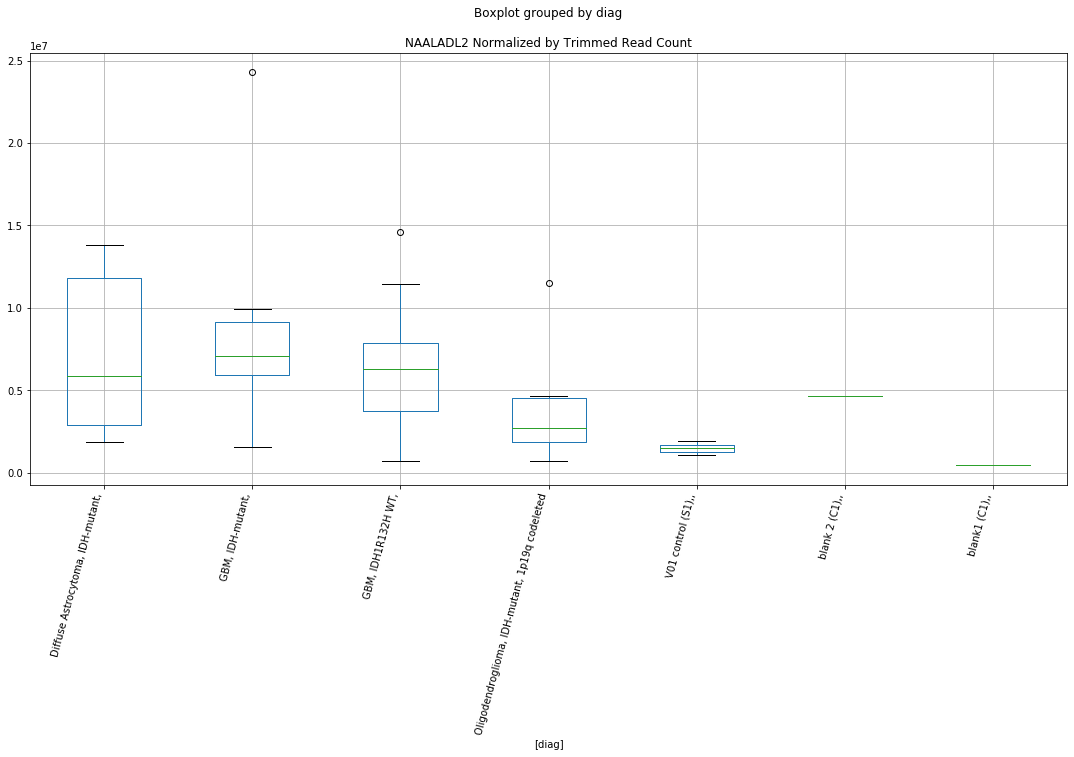

NAALADL2 D-plex cutadapt2
	t = -1.9950655483385369
	p = 0.06140099395105807


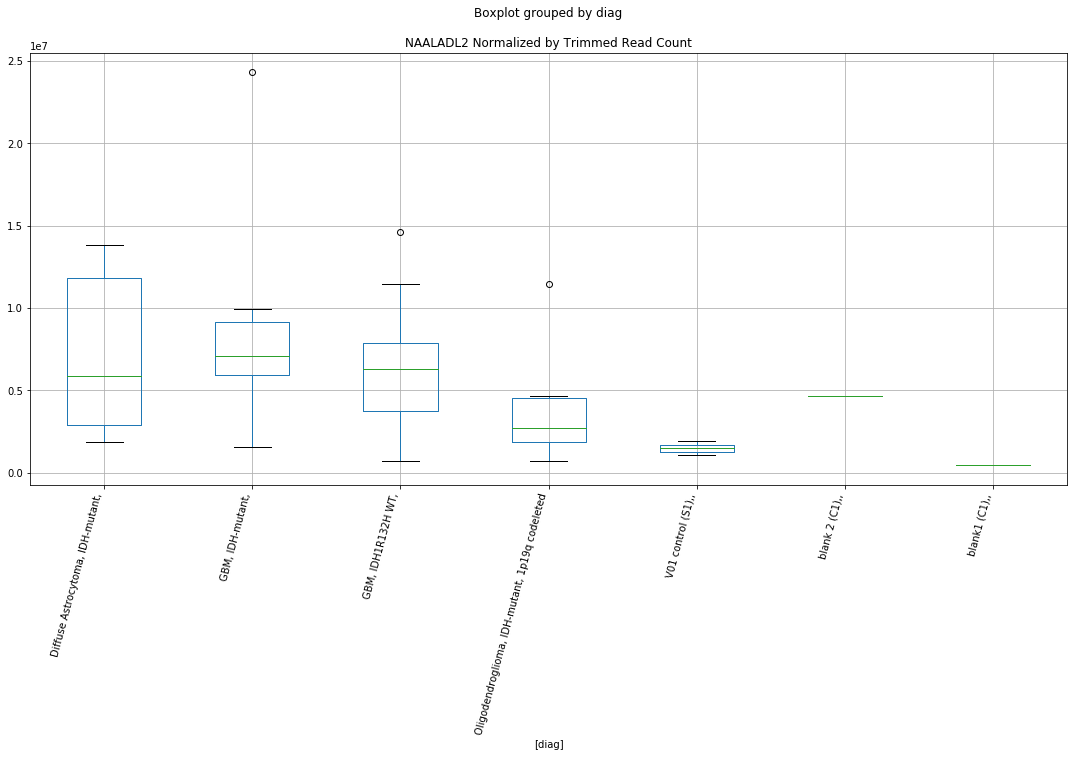

NAALADL2 D-plex cutadapt3
	t = -1.9950130415419465
	p = 0.06140718719871664


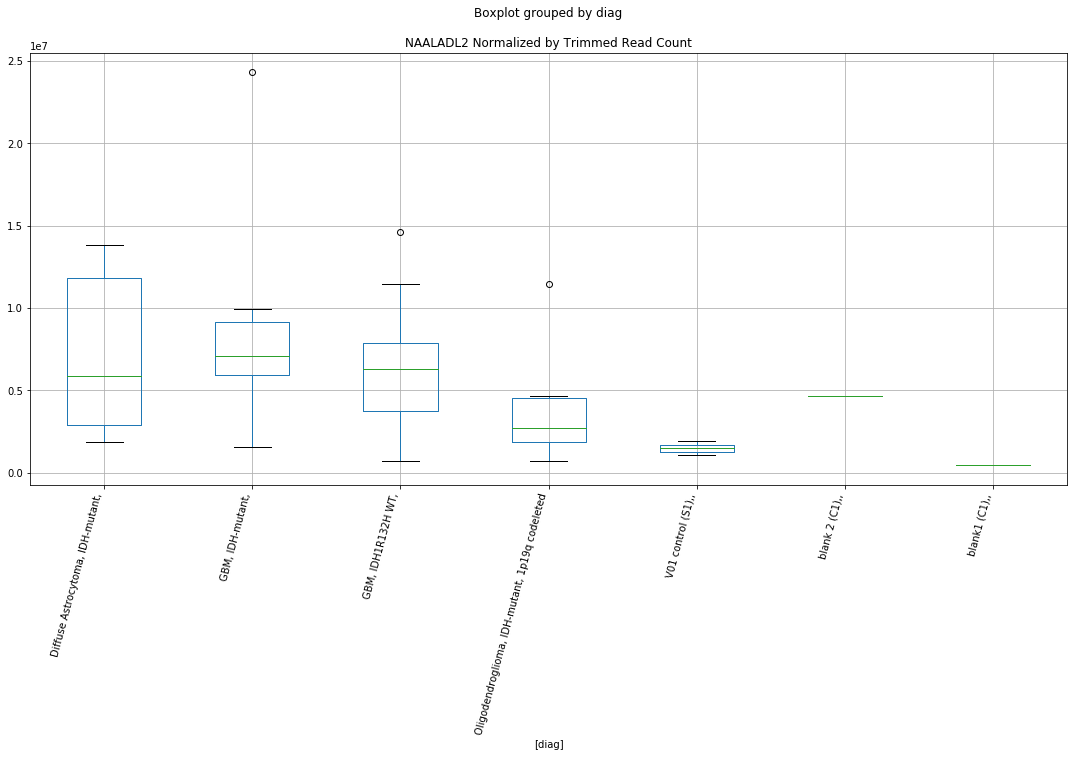

RNA45SN2 D-plex cutadapt1
	t = -1.806957833412612
	p = 0.08751433969709727


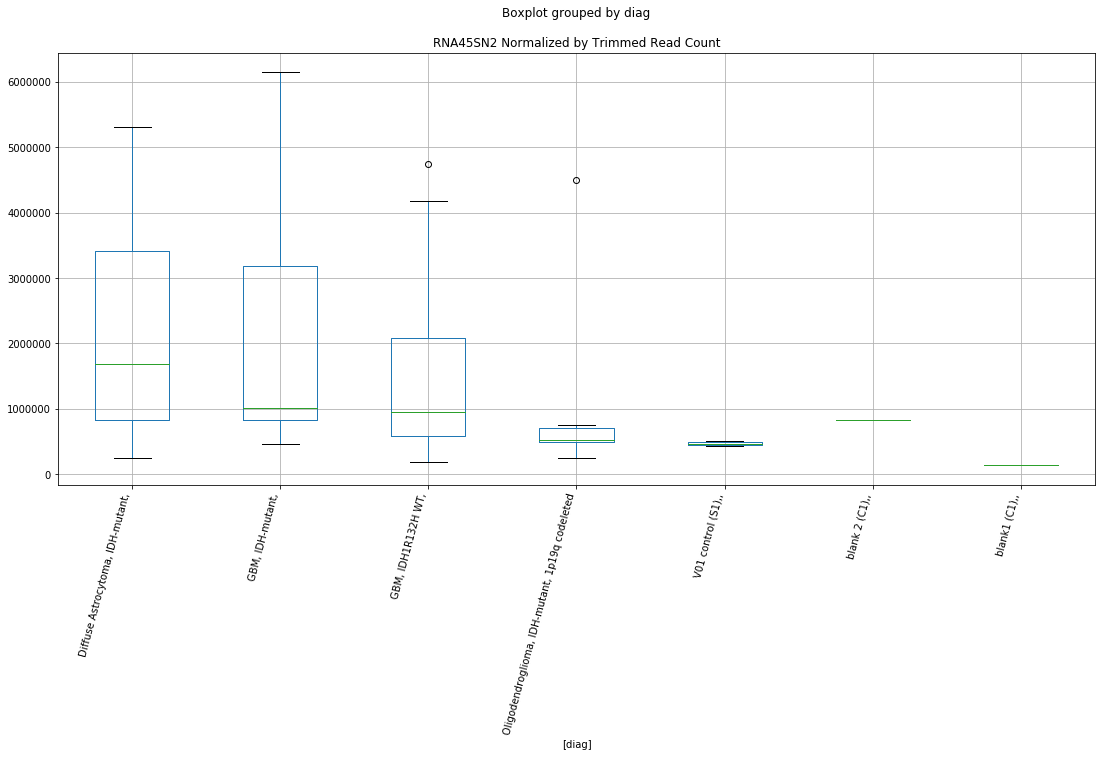

RNA45SN2 D-plex cutadapt2
	t = -1.807832879250546
	p = 0.08737312360372554


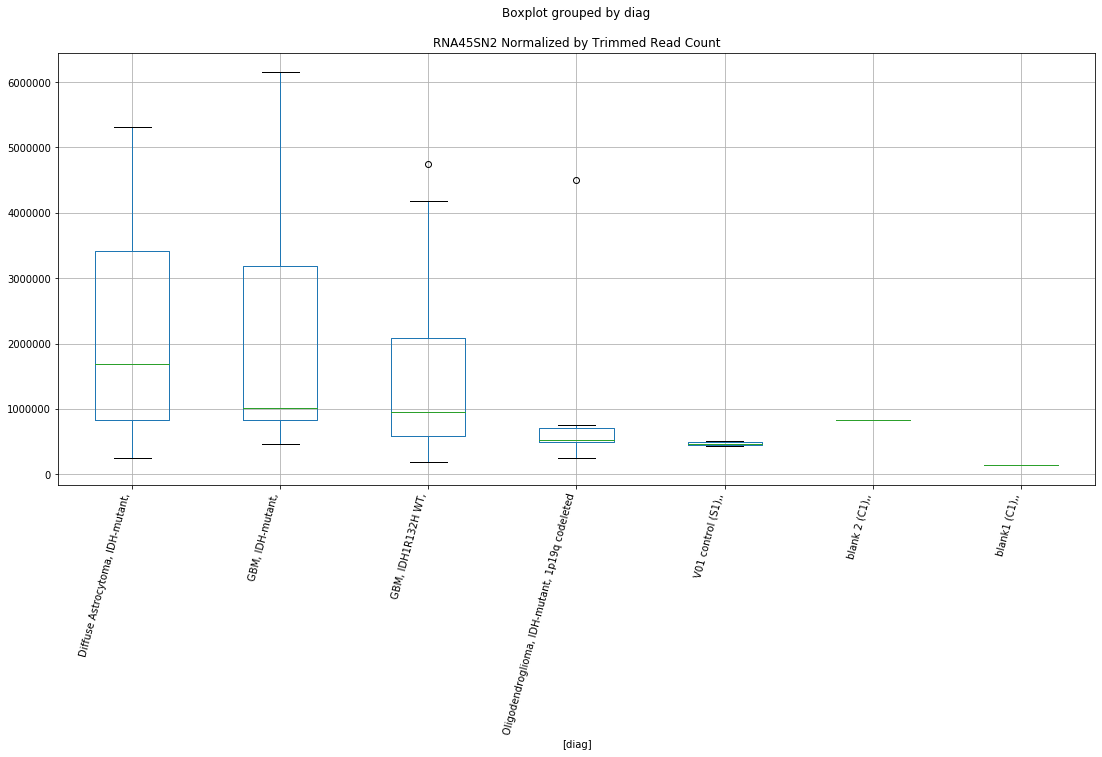

RNA45SN2 D-plex cutadapt3
	t = -1.8077616553980815
	p = 0.08738461034790455


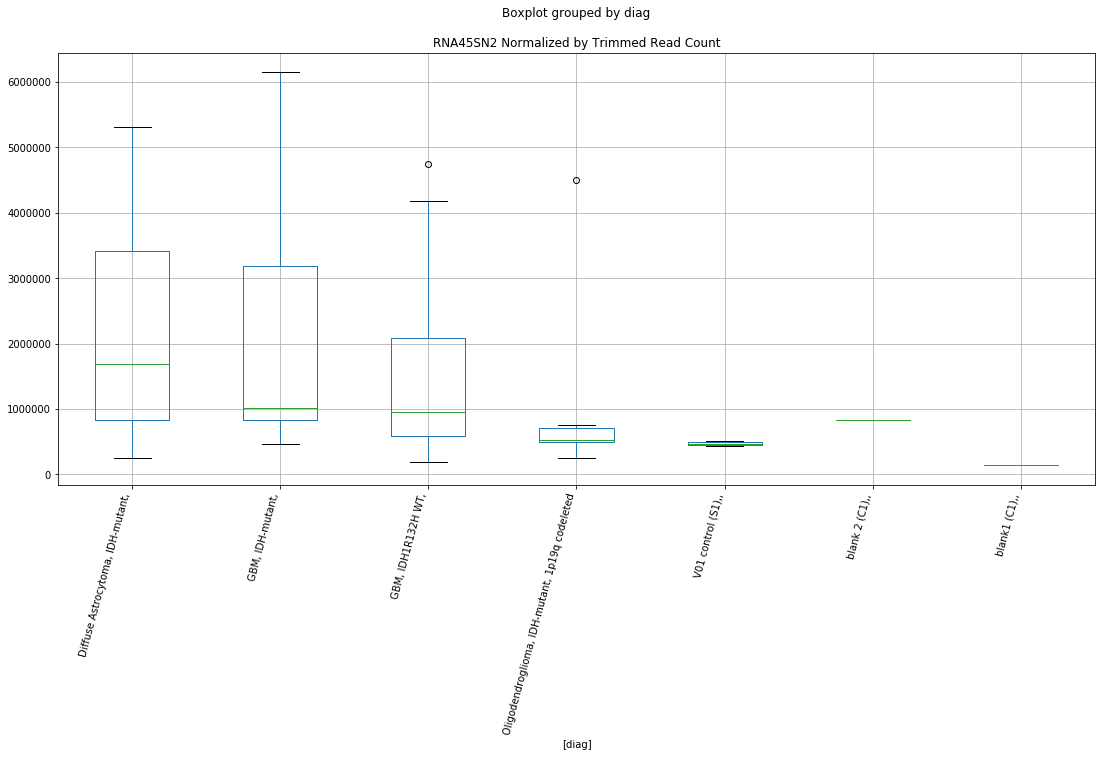

RNA45SN3 D-plex cutadapt1
	t = -1.7818589540649556
	p = 0.09165066588739951


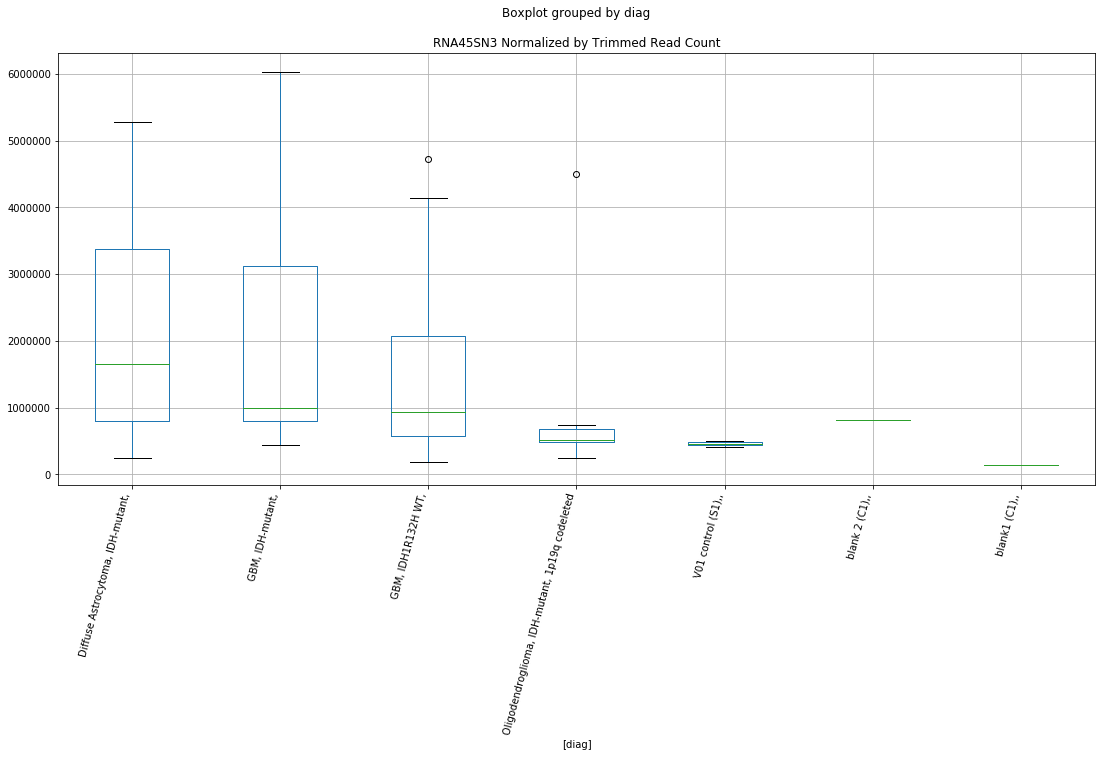

RNA45SN3 D-plex cutadapt2
	t = -1.7827296731363713
	p = 0.0915043642434882


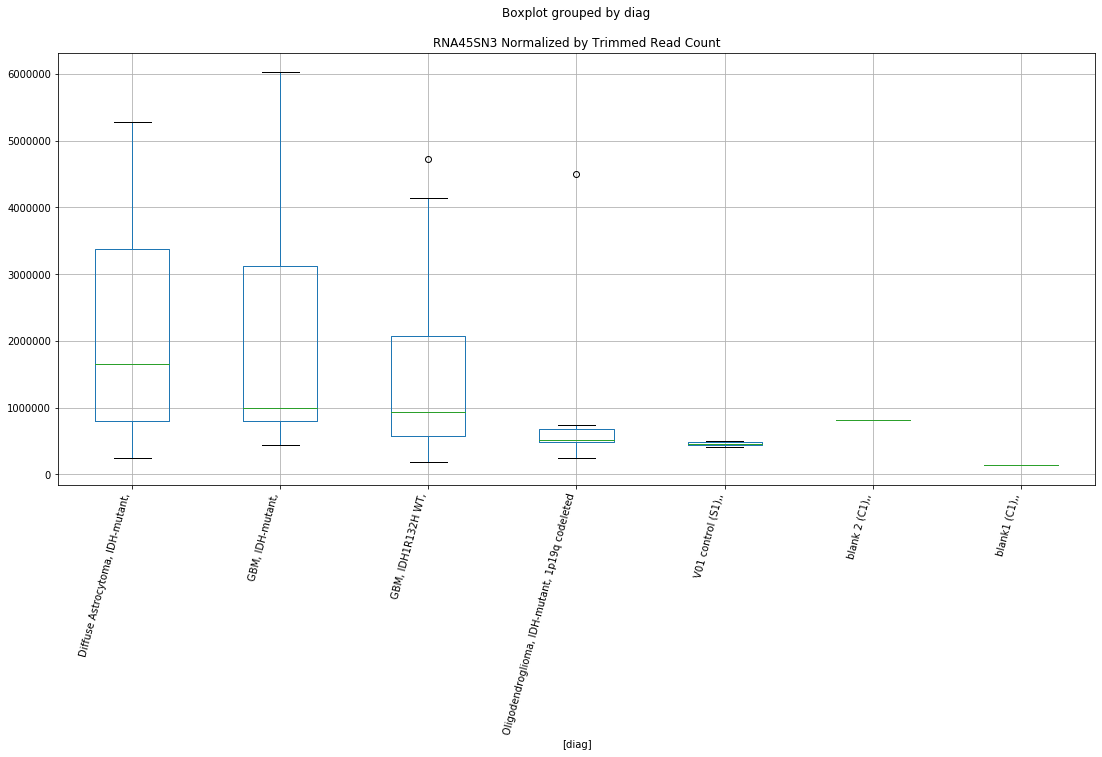

RNA45SN3 D-plex cutadapt3
	t = -1.7826578311898844
	p = 0.09151642770070681


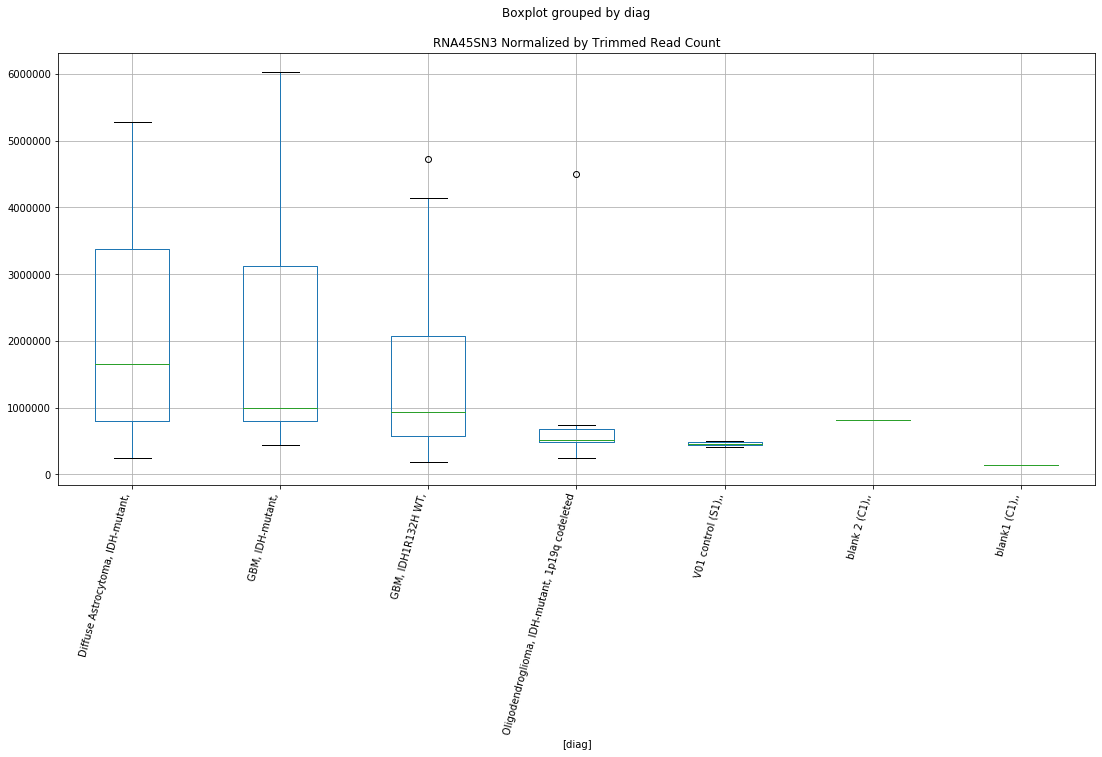

RNA45SN4 D-plex cutadapt1
	t = -1.8485007712594876
	p = 0.08102651633358038


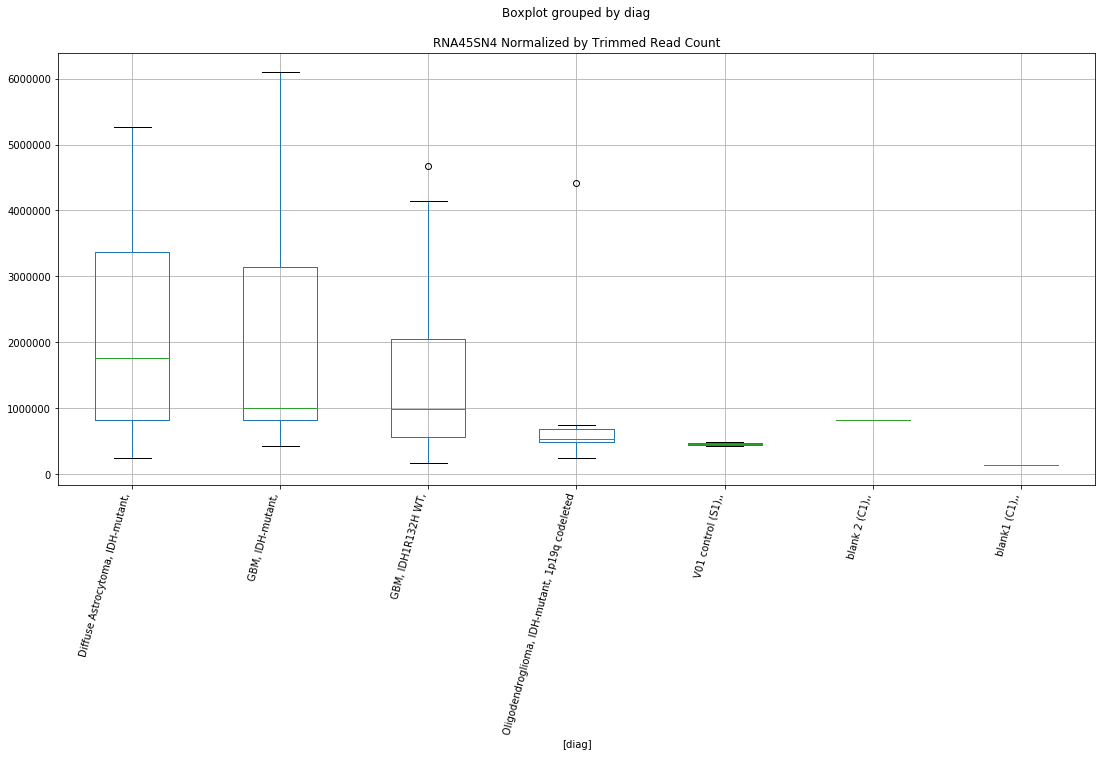

RNA45SN4 D-plex cutadapt2
	t = -1.8493753063564797
	p = 0.08089460943440133


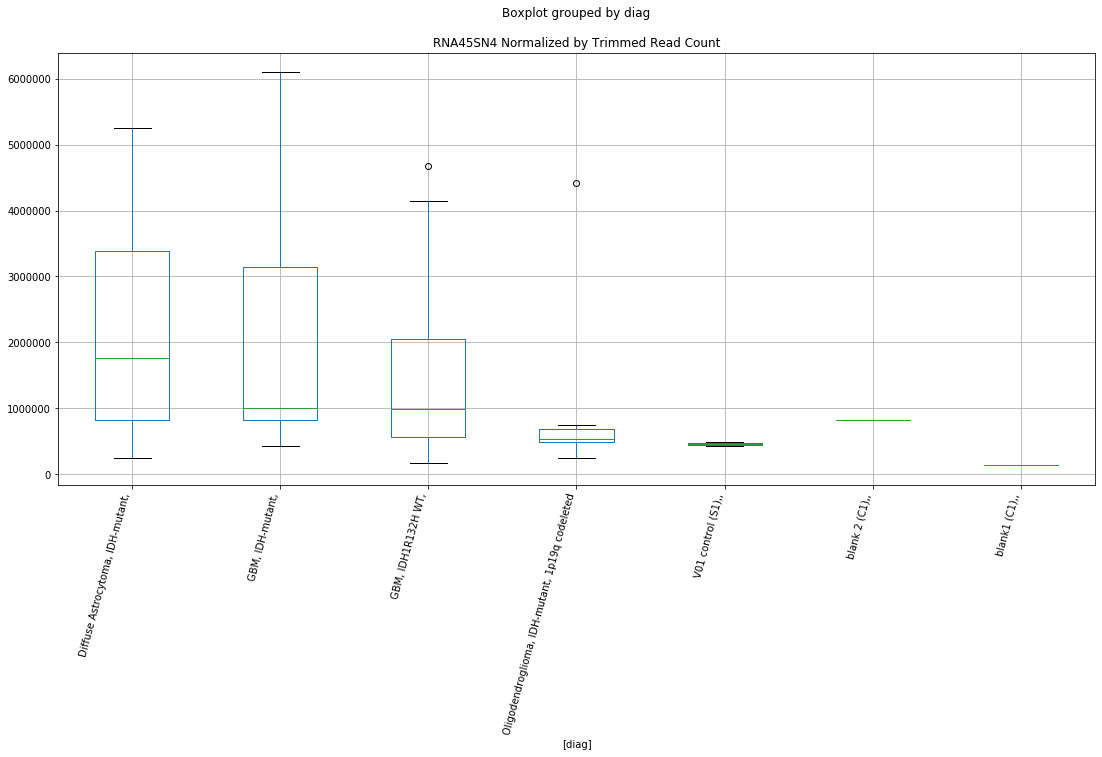

RNA45SN4 D-plex cutadapt3
	t = -1.84930627723272
	p = 0.08090501428127224


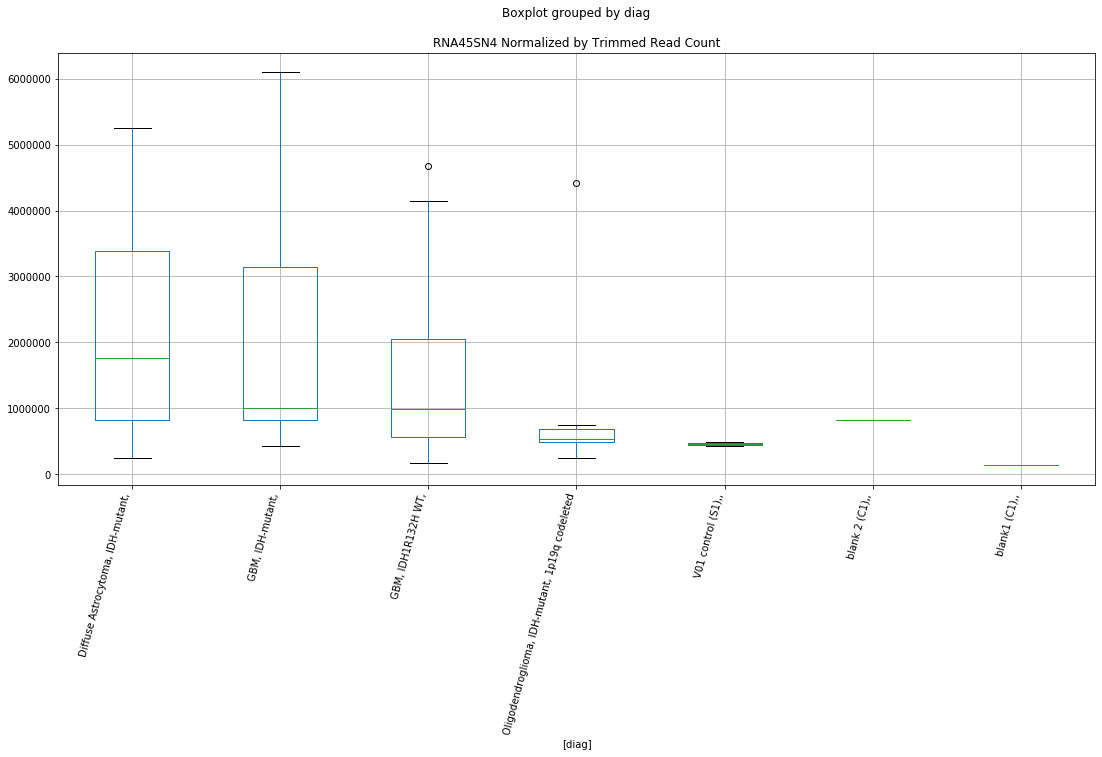

RNA45SN1 D-plex cutadapt1
	t = -1.8180822283387308
	p = 0.08573386058714423


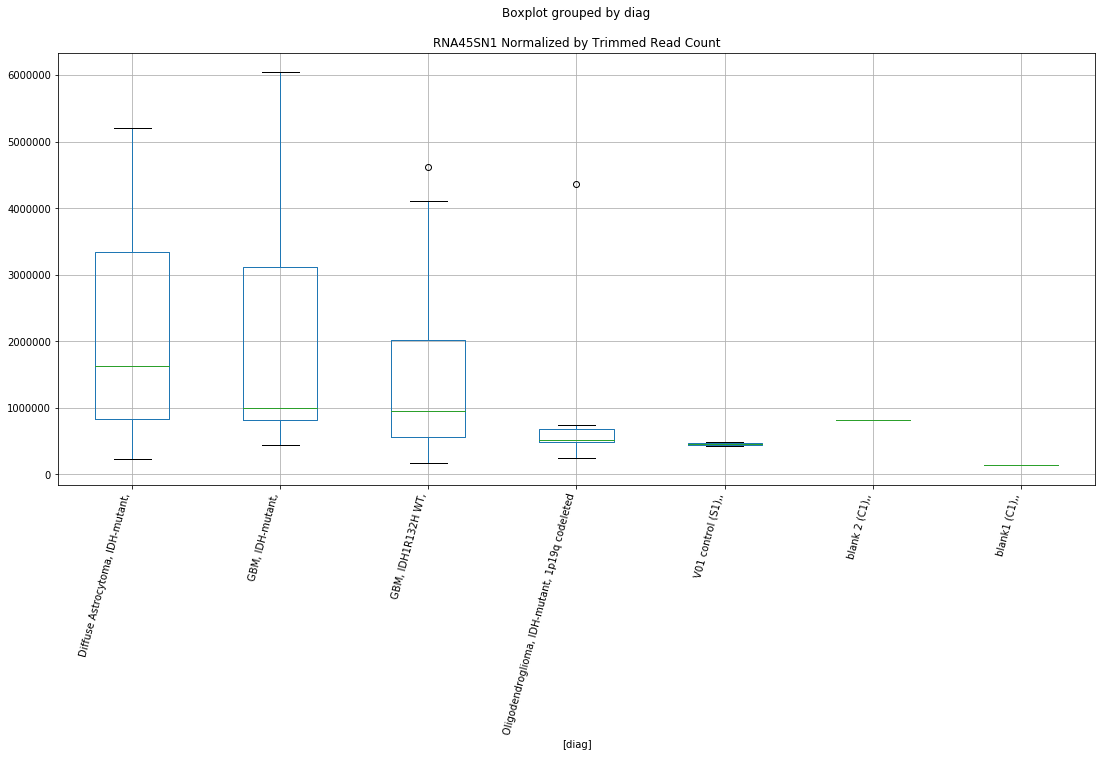

RNA45SN1 D-plex cutadapt2
	t = -1.818957799410772
	p = 0.08559508064639082


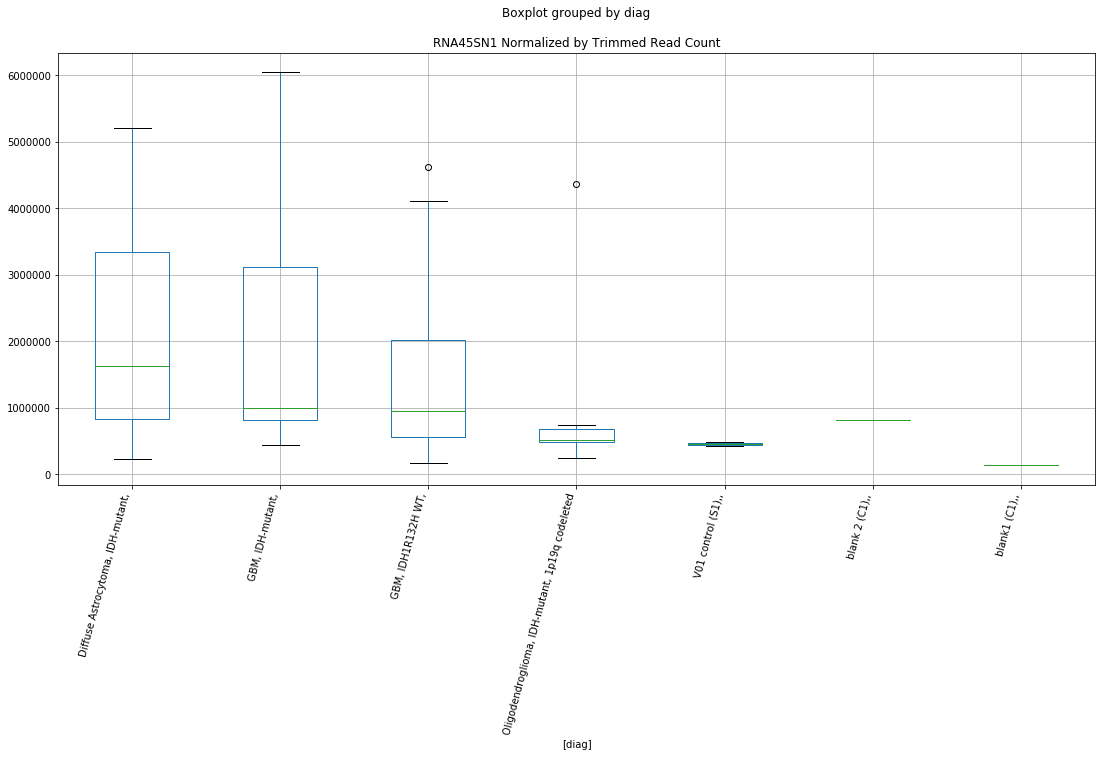

RNA45SN1 D-plex cutadapt3
	t = -1.818887341942981
	p = 0.08560624102093224


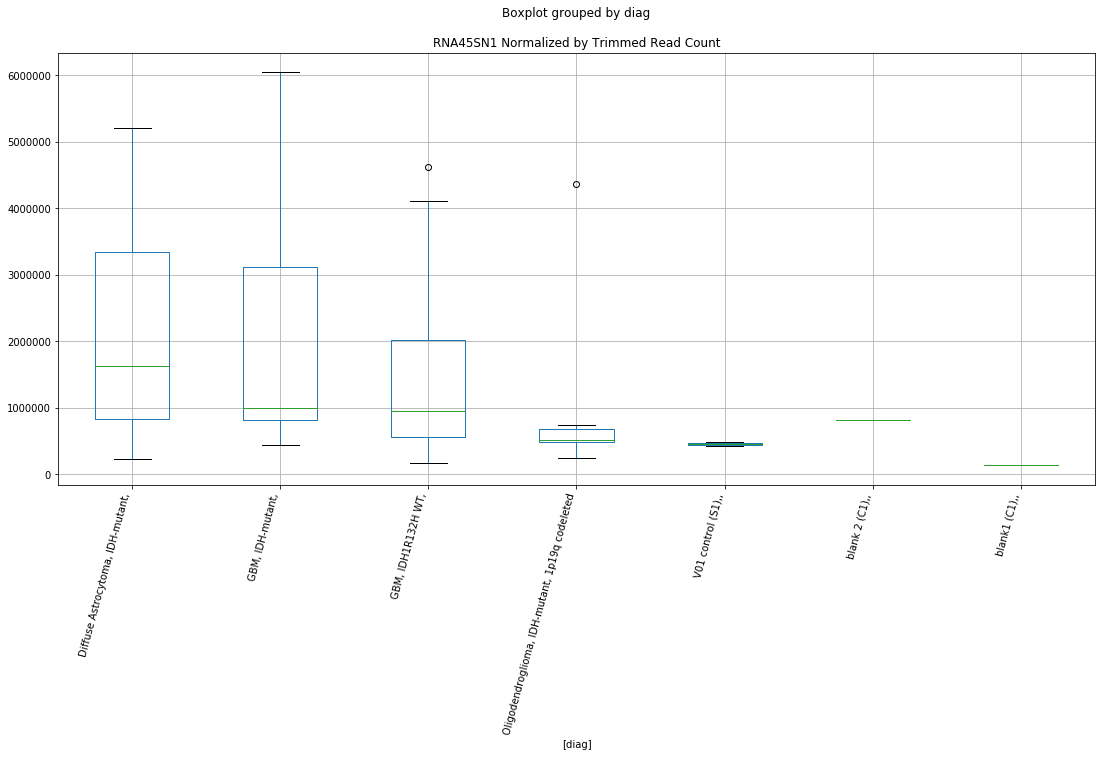

RNA45SN5 D-plex cutadapt1
	t = -1.8177318226281343
	p = 0.08578945588975204


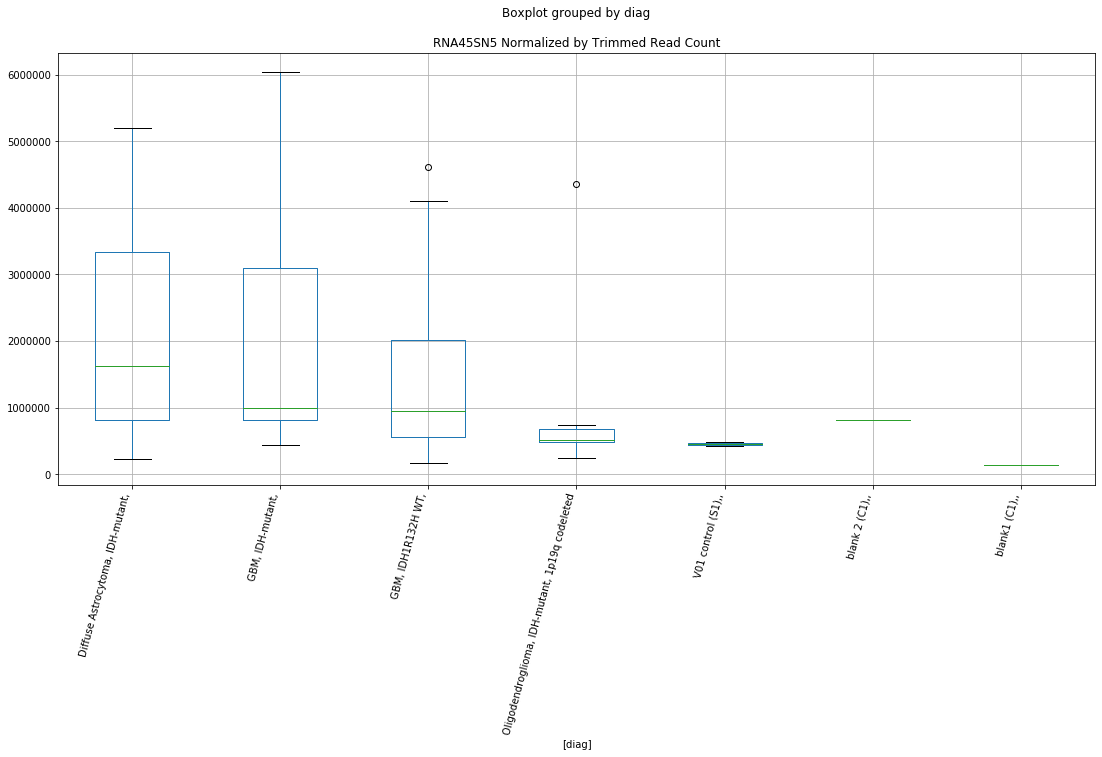

RNA45SN5 D-plex cutadapt2
	t = -1.8186070361930236
	p = 0.08565065373127385


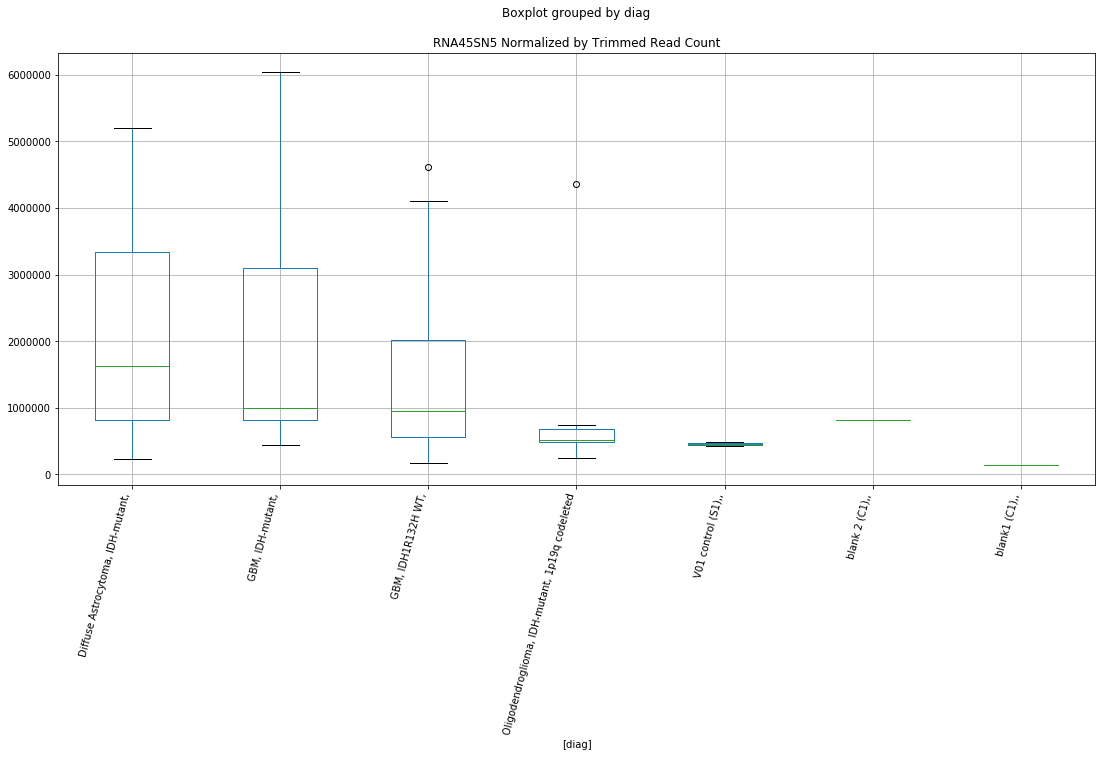

RNA45SN5 D-plex cutadapt3
	t = -1.8185366002262275
	p = 0.08566181704837765


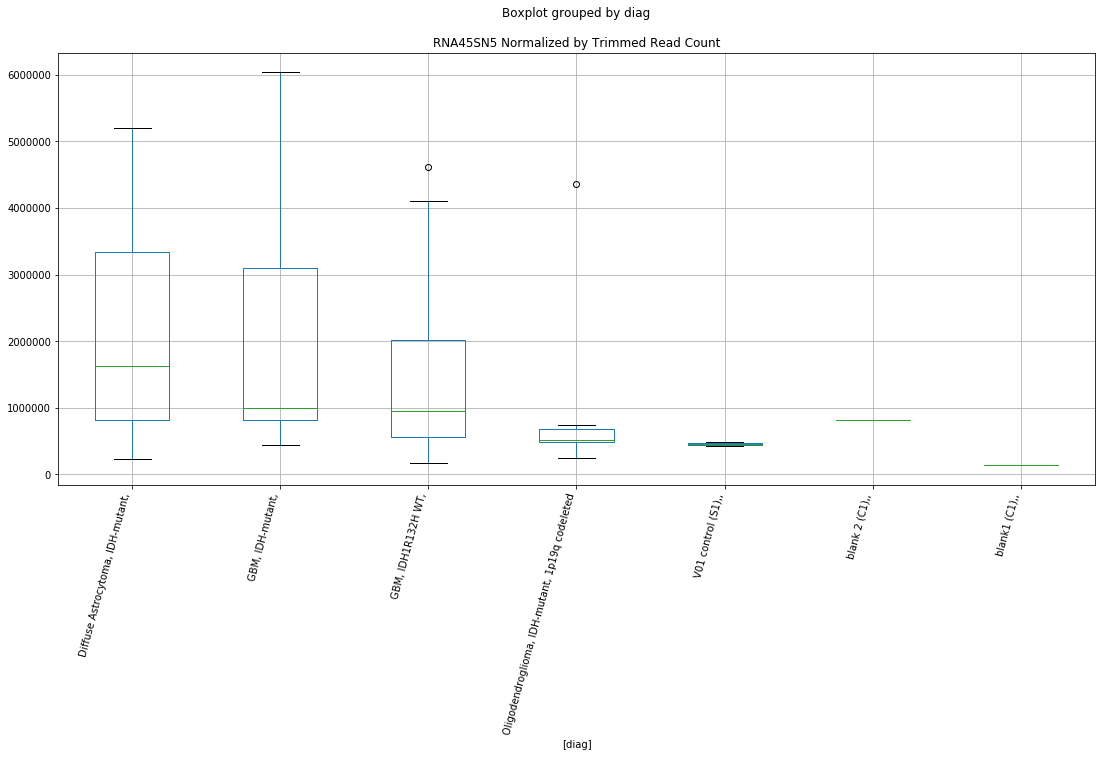

RNA28SN2 D-plex cutadapt1
	t = -1.7678143218305549
	p = 0.09403880680724726


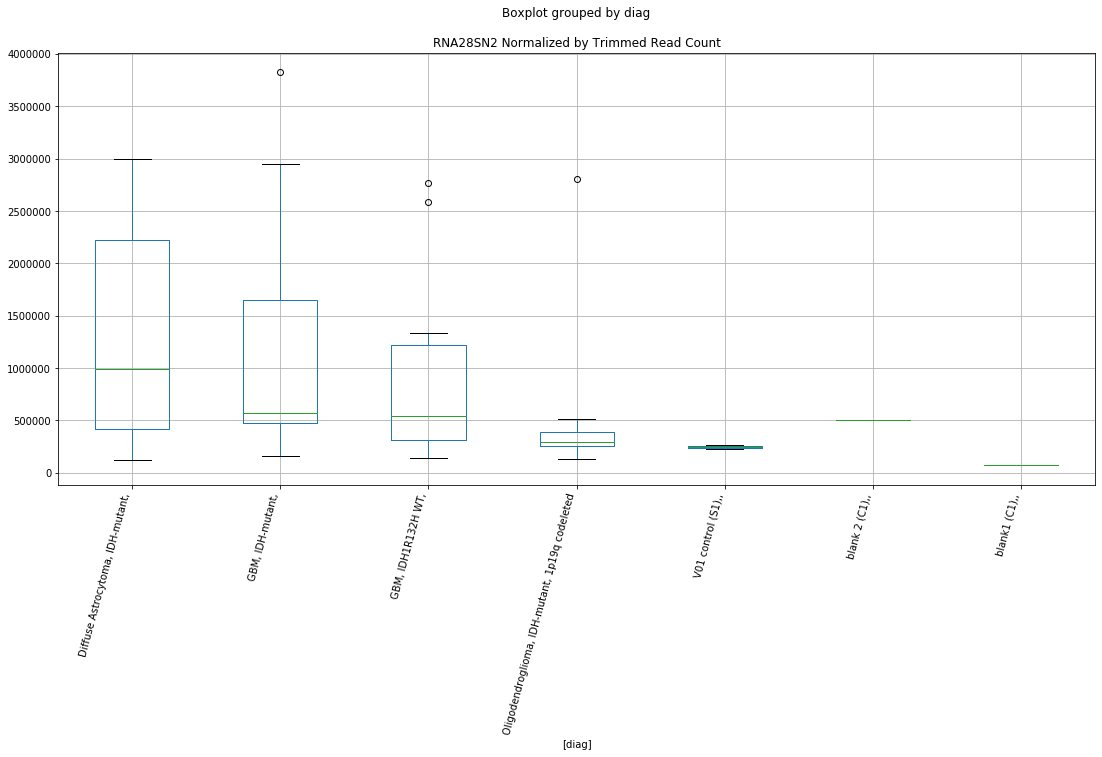

RNA28SN2 D-plex cutadapt2
	t = -1.7685903241221084
	p = 0.09390545661695218


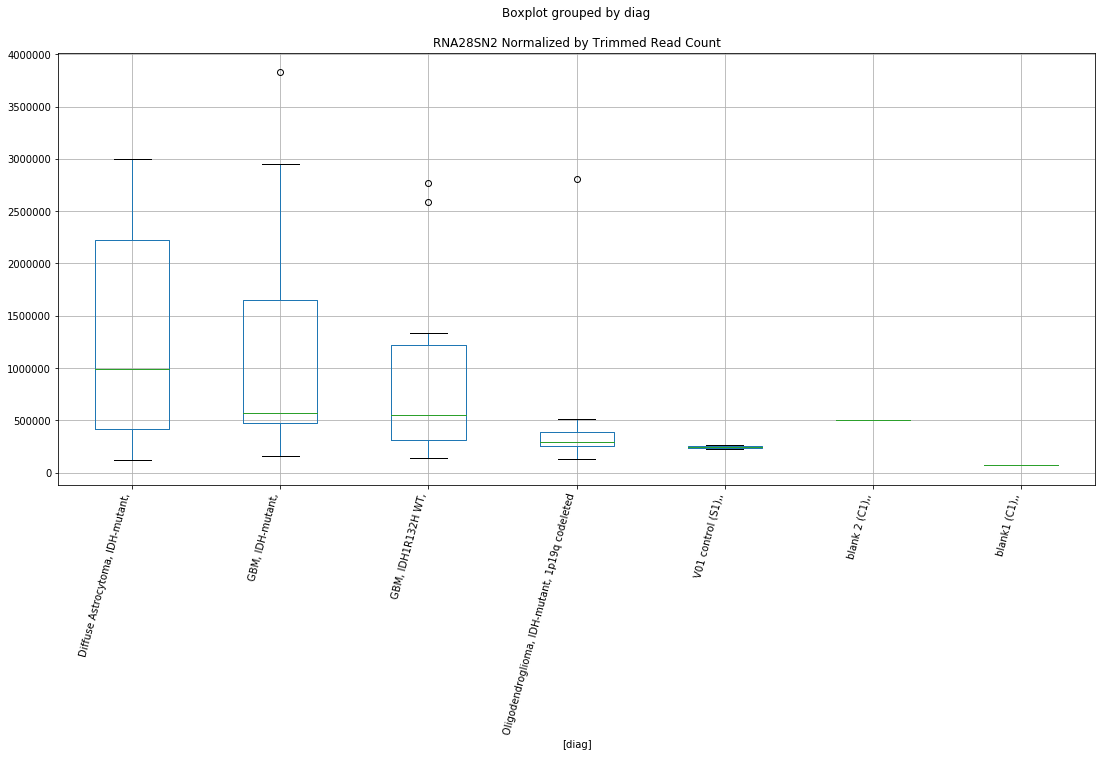

RNA28SN2 D-plex cutadapt3
	t = -1.7685327076865254
	p = 0.09391535191586962


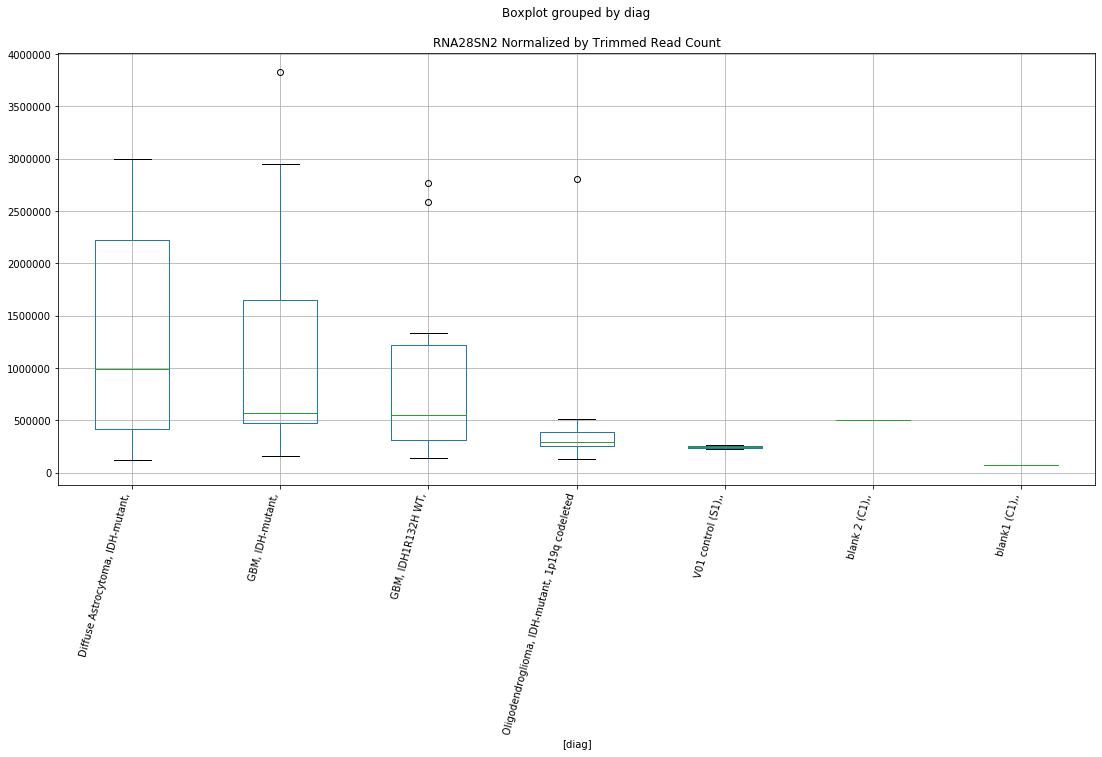

RNA28SN1 D-plex cutadapt1
	t = -1.790398035897665
	p = 0.09022466407280137


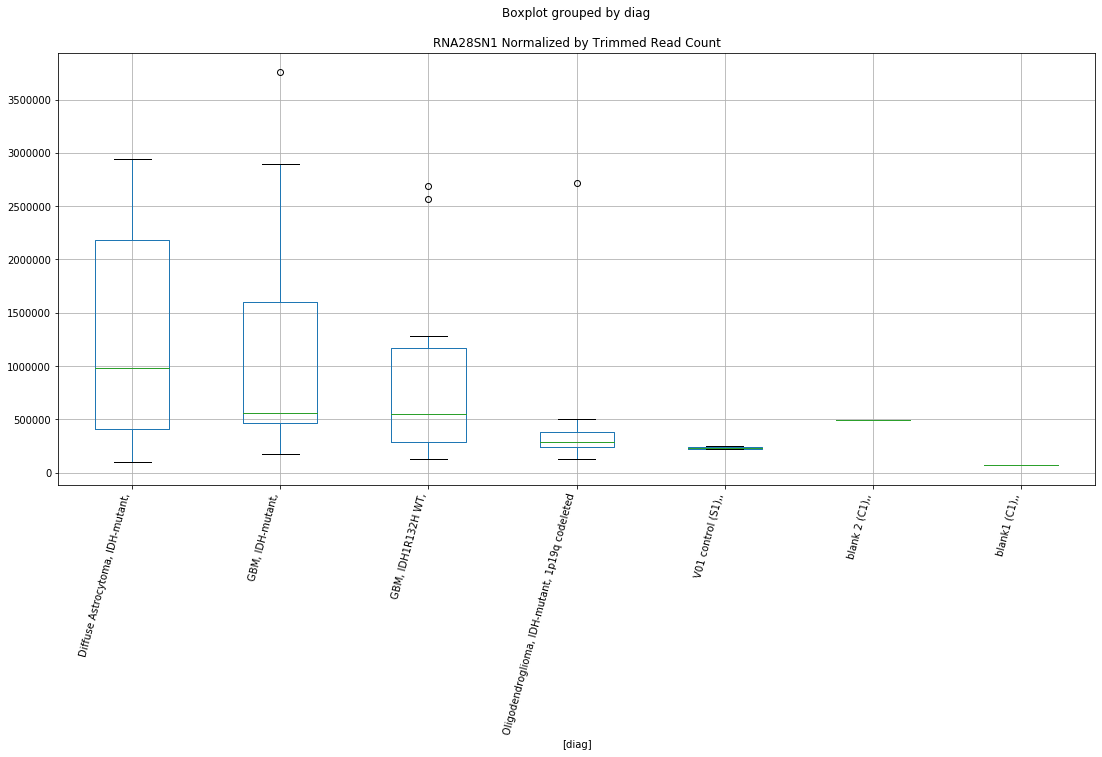

RNA28SN1 D-plex cutadapt2
	t = -1.7911689163327291
	p = 0.09009688704691224


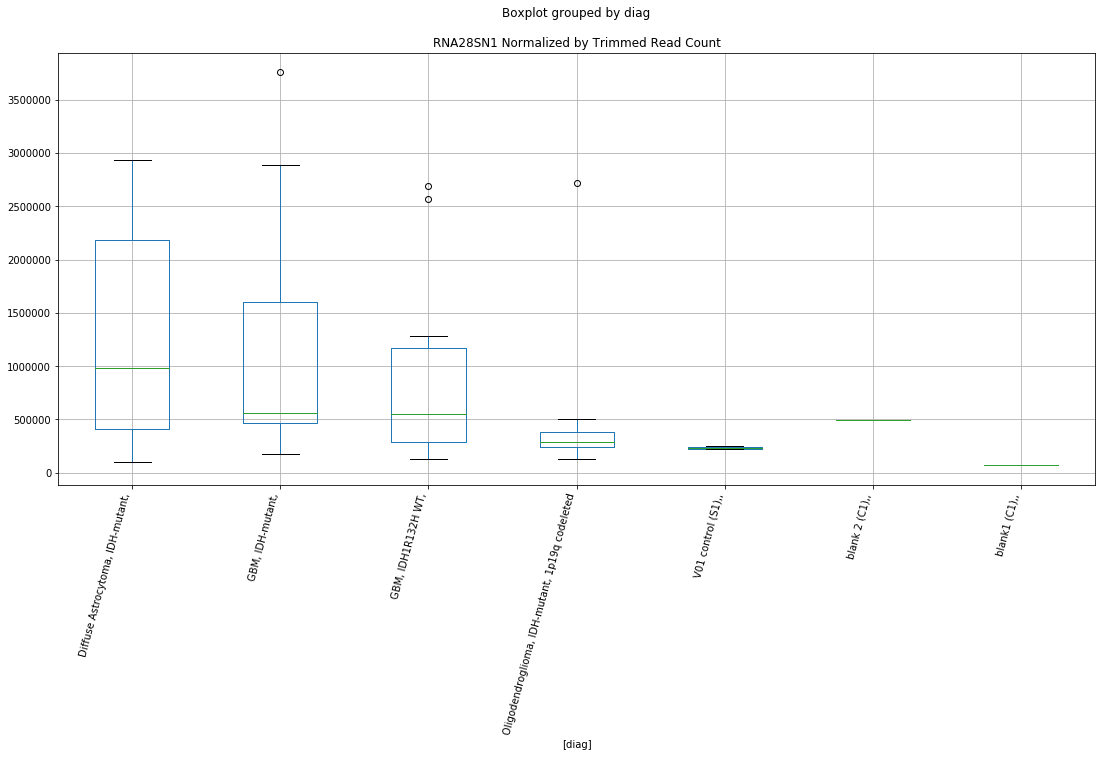

RNA28SN1 D-plex cutadapt3
	t = -1.7911131855933697
	p = 0.09010611937783419


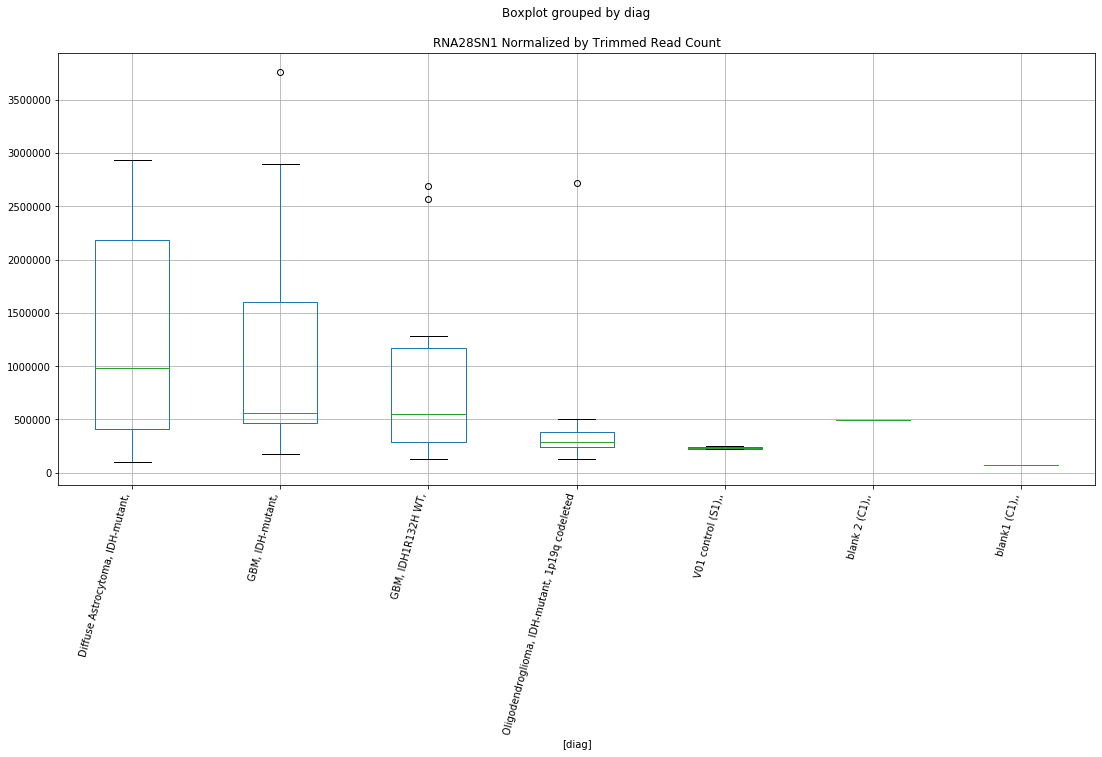

RNA28SN5 D-plex cutadapt1
	t = -1.7898499490349784
	p = 0.0903156081872515


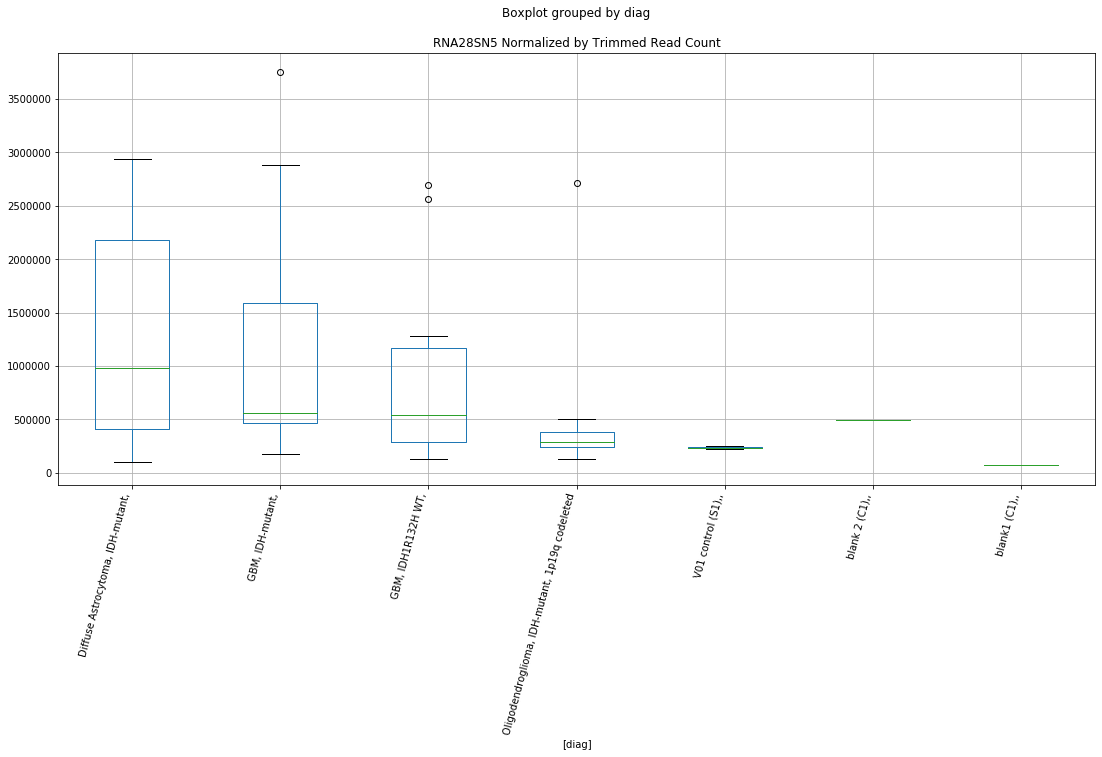

RNA28SN5 D-plex cutadapt2
	t = -1.7906202325545946
	p = 0.0901878177287973


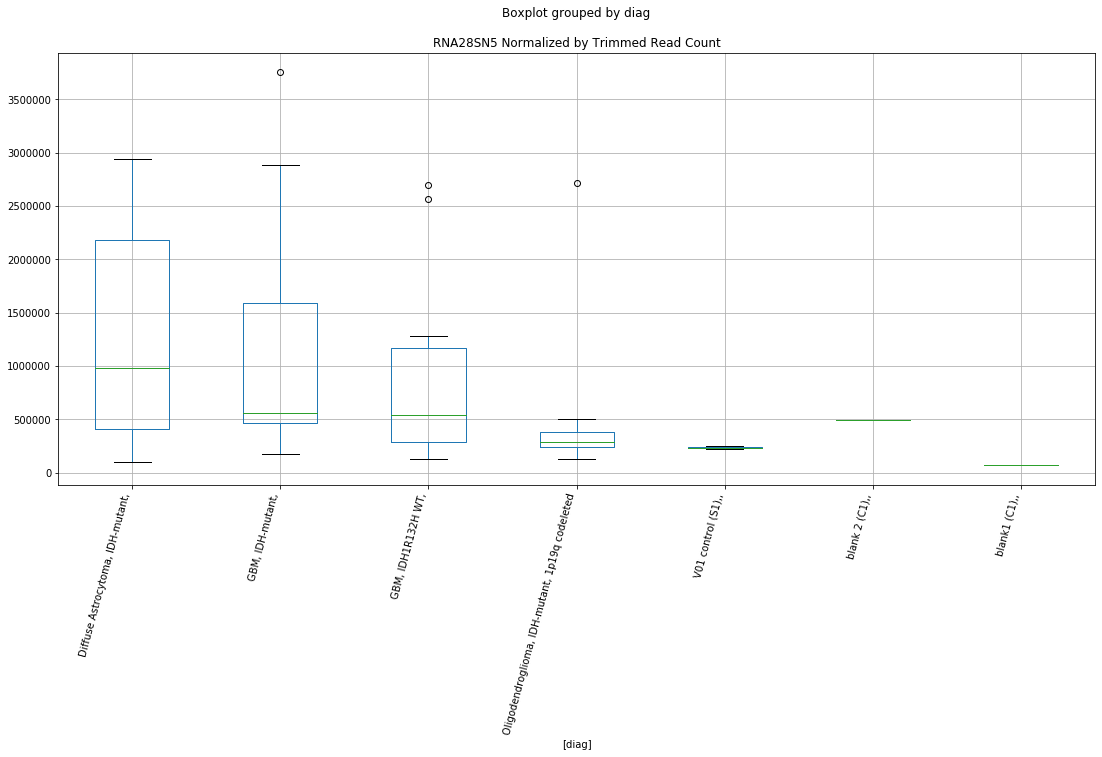

RNA28SN5 D-plex cutadapt3
	t = -1.790564523004742
	p = 0.09019705467749108


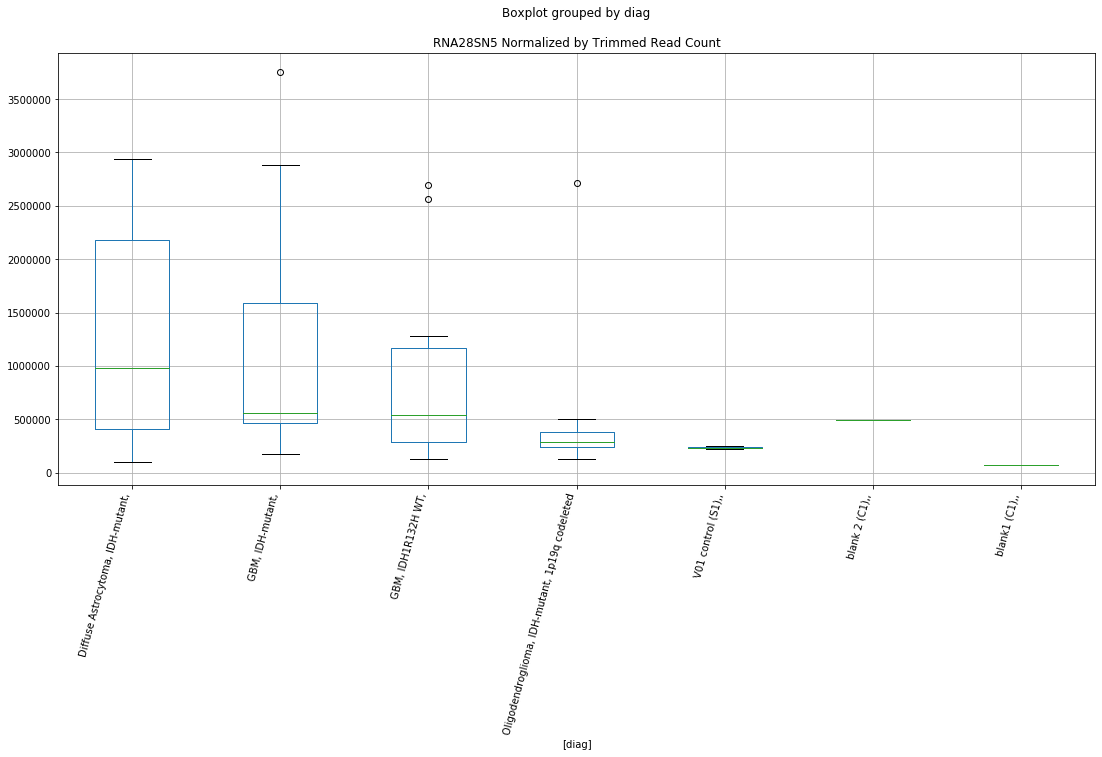

RNA28SN4 D-plex cutadapt1
	t = -1.7942065976357224
	p = 0.08959491343892799


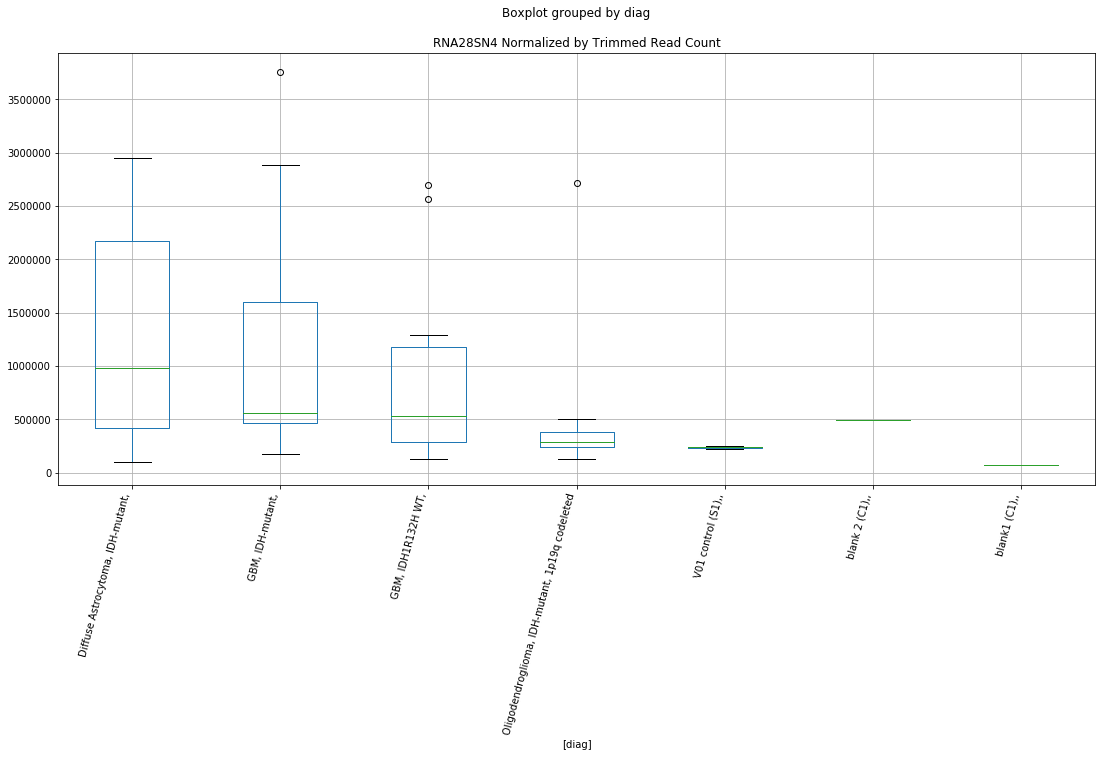

RNA28SN4 D-plex cutadapt2
	t = -1.7949784595998022
	p = 0.08946775379468837


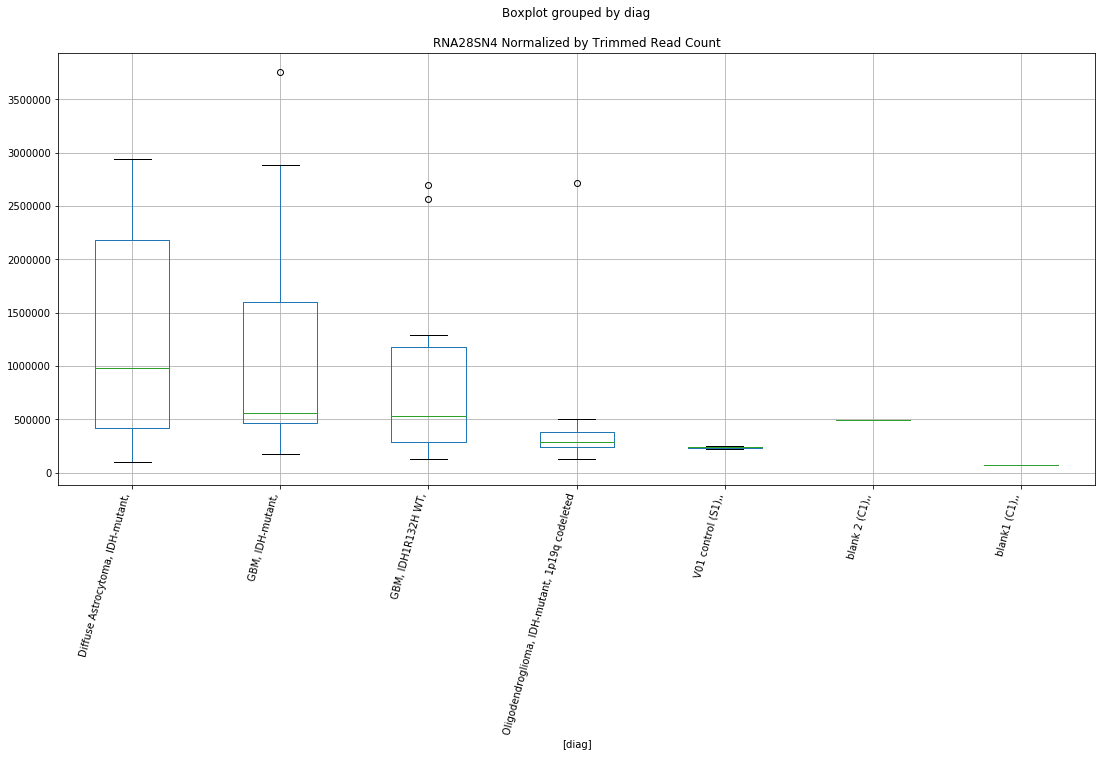

RNA28SN4 D-plex cutadapt3
	t = -1.794922673311482
	p = 0.08947693896566188


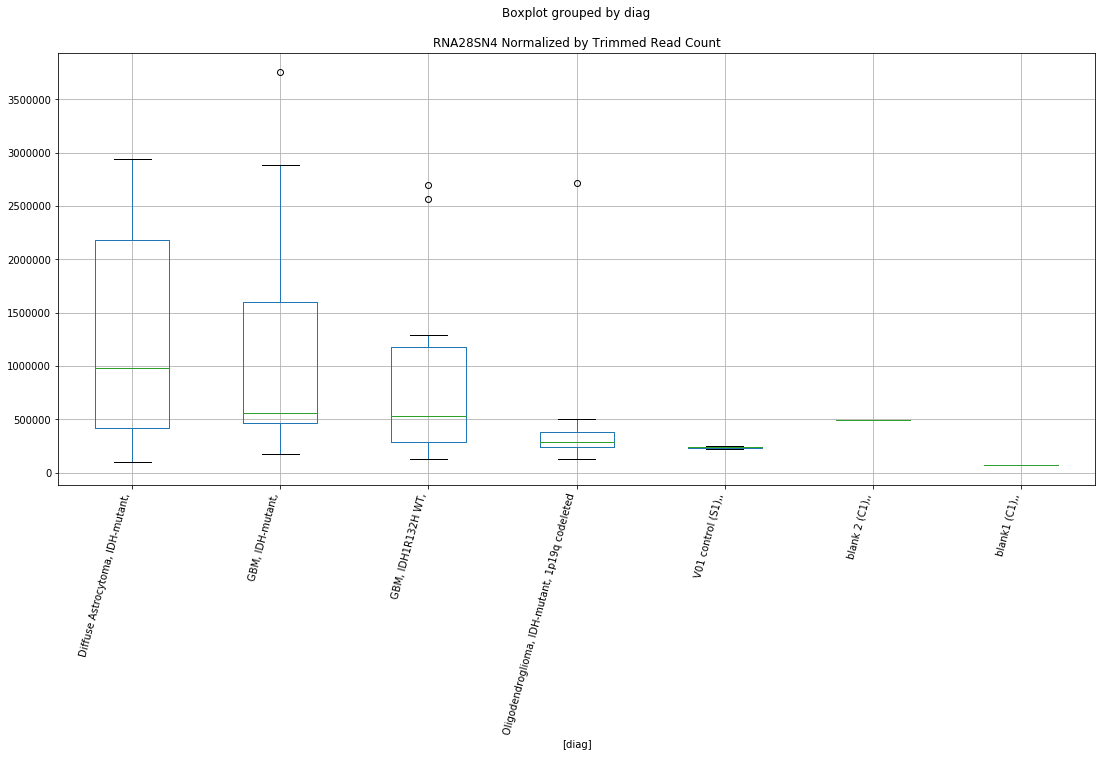

AHDC1 D-plex bbduk2
	t = -1.886339148769902
	p = 0.07548959438937052


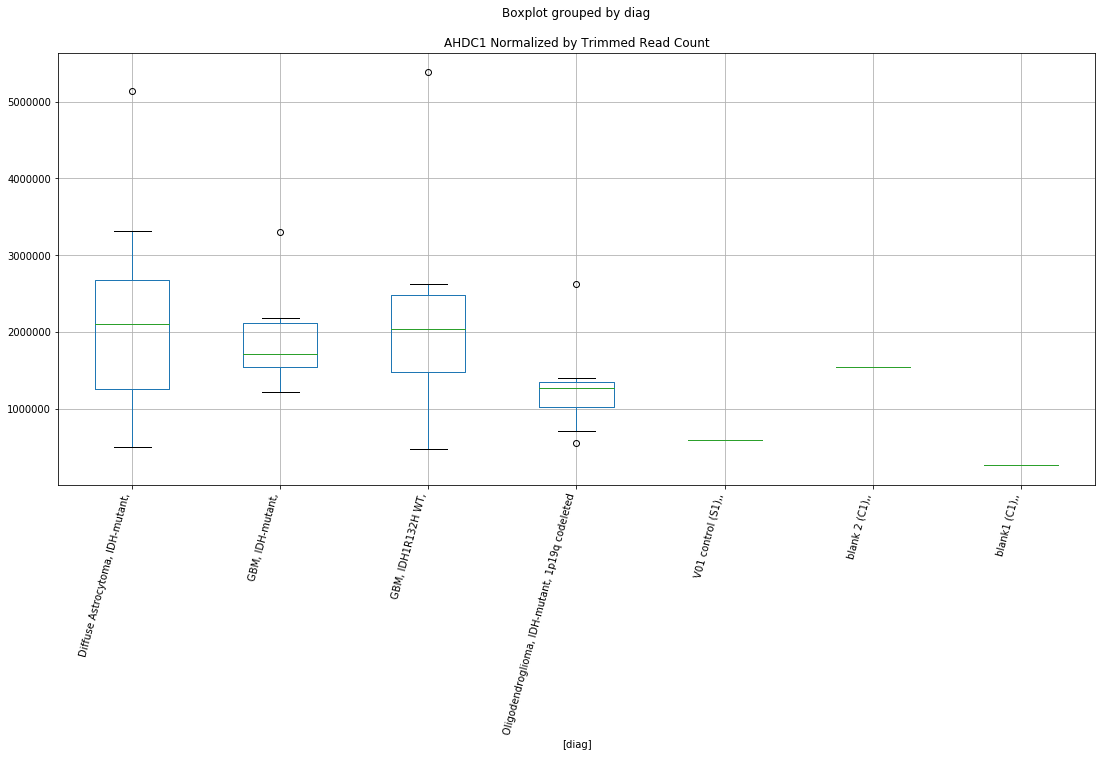

In [63]:
for gene in genes:
    #print()
    for labkit in "D-plex","Lexogen":
        for trimmer in "bbduk1","bbduk2","bbduk3","cutadapt1","cutadapt2","cutadapt3":
            t, p = stats.ttest_ind(
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer) & 
                    (dfn["diag"]=="Oligodendroglioma, IDH-mutant, 1p19q codeleted"))][gene],
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer) & 
                    (dfn["diag"]=="Diffuse Astrocytoma, IDH-mutant,"))][gene])
            if p < 0.10:
                print(gene+" "+labkit+" "+trimmer)
                print("\tt = " + str(t))
                print("\tp = " + str(p))
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer))].boxplot(column=gene,by=['diag'])
                plt.title(gene + " Normalized by Trimmed Read Count")
                plt.xticks(rotation=75,ha='right')
                plt.show()


# Normalize by STAR Aligned Genome Count

In [64]:
dfn=df.copy()

In [65]:
dfn.head()

sample Subject Lab kit    Trimmer Raw Read Count Raw Read Length  \
0  SFHH005aa     3_5  D-plex     bbduk1        7706323             201   
1  SFHH005aa     3_5  D-plex     bbduk2        7706323             201   
2  SFHH005aa     3_5  D-plex     bbduk3        7706323             201   
3  SFHH005aa     3_5  D-plex  cutadapt1        7706323             201   
4  SFHH005aa     3_5  D-plex  cutadapt2        7706323             201   

  Trimmed Read Count Trimmed Ave Read Length STAR Aligned to Transcriptome  \
0            4578177                 57.8849                         99328   
1            7054912                 60.3426                        140222   
2            7067406                 60.5684                        138584   
3            4879448                 132.375                        105508   
4            4877655                  131.86                        119834   

  STAR Aligned to Transcriptome %  ... hsa-mir-6887-hairpin  \
0                            2.16  ...                20494   
1                            1.98  ...                   78   
2                            1.96  ...                   68   
3                            2.16  ...                15303   
4                            2.45  ...                15303   

  hsa-mir-6887-5p-mature hsa-mir-3613-3p-mature subject      dplex    lexogen  \
0                  20259                      2     3_5  SFHH005aa  SFHH006aa   
1                     76                  12246     3_5  SFHH005aa  SFHH006aa   
2                     66                  12209     3_5  SFHH005aa  SFHH006aa   
3                  15056                     35     3_5  SFHH005aa  SFHH006aa   
4                  15056                     35     3_5  SFHH005aa  SFHH006aa   

               diag disease          idh x1p19q  
0  GBM, IDH-mutant,     GBM   IDH-mutant         
1  GBM, IDH-mutant,     GBM   IDH-mutant         
2  GBM, IDH-mutant,     GBM   IDH-mutant         
3  GBM, IDH-mutant,     GBM   IDH-mutant         
4  GBM, IDH-mutant,     GBM   IDH-mutant         

[5 rows x 139 columns]

In [66]:
dfn[mirnas].head()

hsa-mir-4329-hairpin hsa-mir-5588-hairpin hsa-mir-92b-hairpin  \
0                   37                    2                 337   
1               504505               164998              130955   
2               492709               169068              127250   
3                  178                  121                1250   
4                  178                  121                1251   

  hsa-mir-4271-hairpin hsa-mir-548u-hairpin hsa-mir-1260a-hairpin  \
0                  968                    7                   355   
1                84567               211982                  1300   
2                81636               207177                  1278   
3                 2630                  307                  1035   
4                 2630                  307                  1035   

  hsa-mir-944-hairpin hsa-mir-10226-hairpin hsa-mir-4538-hairpin  \
0                 380                  4846                   32   
1                  31                  4799                  NaN   
2                  30                  4799                  NaN   
3                 694                    71                   18   
4                 694                    71                   18   

  hsa-mir-4538-mature  ... hsa-mir-509-1-hairpin hsa-mir-892b-hairpin  \
0                  28  ...                   152                  166   
1                 NaN  ...                    54                  161   
2                 NaN  ...                    52                  158   
3                  15  ...                   276                  268   
4                  15  ...                   276                  269   

  hsa-mir-509-2-hairpin hsa-mir-509-3-hairpin hsa-mir-6787-hairpin  \
0                   152                   116                  874   
1                    54                    54                   36   
2                    52                    52                   33   
3                   276                   276                 1255   
4                   276                   276                 1255   

  hsa-mir-6787-5p-mature hsa-mir-1281-hairpin hsa-mir-6887-hairpin  \
0                    799                14186                20494   
1                     33                  121                   78   
2                     31                  103                   68   
3                   1034                20096                15303   
4                   1034                20096                15303   

  hsa-mir-6887-5p-mature hsa-mir-3613-3p-mature  
0                  20259                      2  
1                     76                  12246  
2                     66                  12209  
3                  15056                     35  
4                  15056                     35  

[5 rows x 50 columns]

In [67]:
dfn[mirnas]=dfn.apply(lambda row: 1e9*pd.to_numeric(row[mirnas])/pd.to_numeric(row['STAR Aligned to Genome']), axis=1 )


In [68]:
dfn[mirnas].head()

hsa-mir-4329-hairpin  hsa-mir-5588-hairpin  hsa-mir-92b-hairpin  \
0              3.10e+04              1.68e+03             2.83e+05   
1              1.77e+08              5.78e+07             4.59e+07   
2              1.73e+08              5.95e+07             4.48e+07   
3              5.40e+04              3.67e+04             3.79e+05   
4              5.37e+04              3.65e+04             3.78e+05   

   hsa-mir-4271-hairpin  hsa-mir-548u-hairpin  hsa-mir-1260a-hairpin  \
0              8.12e+05              5.87e+03              297718.39   
1              2.96e+07              7.43e+07              455714.54   
2              2.87e+07              7.29e+07              449531.32   
3              7.98e+05              9.31e+04              313878.53   
4              7.94e+05              9.27e+04              312444.81   

   hsa-mir-944-hairpin  hsa-mir-10226-hairpin  hsa-mir-4538-hairpin  \
0            318684.47               4.06e+06              26836.59   
1             10867.04               1.68e+06                   NaN   
2             10552.38               1.69e+06                   NaN   
3            210465.41               2.15e+04               5458.76   
4            209504.06               2.14e+04               5433.82   

   hsa-mir-4538-mature  ...  hsa-mir-509-1-hairpin  hsa-mir-892b-hairpin  \
0             23482.01  ...              127473.79             139214.80   
1                  NaN  ...               18929.68              56438.49   
2                  NaN  ...               18290.79              55575.86   
3              4548.96  ...               83700.94              81274.83   
4              4528.19  ...               83318.62              81205.46   

   hsa-mir-509-2-hairpin  hsa-mir-509-3-hairpin  hsa-mir-6787-hairpin  \
0              127473.79               97282.63             732974.28   
1               18929.68               18929.68              12619.79   
2               18290.79               18290.79              11607.62   
3               83700.94               83700.94             380596.67   
4               83318.62               83318.62             378858.20   

   hsa-mir-6787-5p-mature  hsa-mir-1281-hairpin  hsa-mir-6887-hairpin  \
0               670076.03              1.19e+07              1.72e+07   
1                11568.14              4.24e+04              2.73e+04   
2                10904.12              3.62e+04              2.39e+04   
3               313575.26              6.09e+06              4.64e+06   
4               312142.93              6.07e+06              4.62e+06   

   hsa-mir-6887-5p-mature  hsa-mir-3613-3p-mature  
0                1.70e+07                1.68e+03  
1                2.66e+04                4.29e+06  
2                2.32e+04                4.29e+06  
3                4.57e+06                1.06e+04  
4                4.55e+06                1.06e+04  

[5 rows x 50 columns]

In [69]:
dfn[genes].head()

LOC102724859 RPH3A PLCE1 ADGRG6 CCDC151   IGF2  P2RX6 PIGG MAPT MIR486-1  \
0          NaN   NaN  2660    481     152      7  67662  NaN   21      NaN   
1          NaN   NaN   252    NaN      24  39465   2583  NaN  NaN      NaN   
2          NaN   NaN   252    NaN      24  43385   2520  NaN  NaN      NaN   
3           34     1  2110    250     NaN     17  55125  NaN  NaN      NaN   
4           34     1  2110    250     NaN     17  55125  NaN  NaN      NaN   

   ...  AHDC1 INS-IGF2 MICAL2 NOTCH2NLB   TTN TTC21A TUBGCP4  WSB1 EDEM3 NACC2  
0  ...    336        1   2220        21  2124   5814      48     4  6636    28  
1  ...   9848     7893     78       NaN   144     38      30  4270   486   NaN  
2  ...  11708     8677     76       NaN   144     38      30  4190   450   NaN  
3  ...   2662        2   2960       206  4626   4826     216   NaN  7242    34  
4  ...   2662        2   2960       206  4626   4826     216   NaN  7242    34  

[5 rows x 50 columns]

In [70]:
dfn[genes]=dfn.apply(lambda row: 1e9*pd.to_numeric(row[genes])/pd.to_numeric(row['STAR Aligned to Genome']), axis=1 )


In [71]:
dfn[genes].head()

LOC102724859   RPH3A     PLCE1     ADGRG6    CCDC151      IGF2     P2RX6  \
0           NaN     NaN  2.23e+06  403387.45  127473.79  5.87e+03  5.67e+07   
1           NaN     NaN  8.83e+04        NaN    8413.19  1.38e+07  9.05e+05   
2           NaN     NaN  8.86e+04        NaN    8441.90  1.53e+07  8.86e+05   
3      10310.99  303.26  6.40e+05   75816.07        NaN  5.16e+03  1.67e+07   
4      10263.89  301.88  6.37e+05   75469.76        NaN  5.13e+03  1.66e+07   

   PIGG      MAPT  MIR486-1  ...     AHDC1  INS-IGF2    MICAL2  NOTCH2NLB  \
0   NaN  17611.51       NaN  ...  2.82e+05  8.39e+02  1.86e+06   17611.51   
1   NaN       NaN       NaN  ...  3.45e+06  2.77e+06  2.73e+04        NaN   
2   NaN       NaN       NaN  ...  4.12e+06  3.05e+06  2.67e+04        NaN   
3   NaN       NaN       NaN  ...  8.07e+05  6.07e+02  8.98e+05   62472.44   
4   NaN       NaN       NaN  ...  8.04e+05  6.04e+02  8.94e+05   62187.08   

        TTN    TTC21A   TUBGCP4      WSB1     EDEM3     NACC2  
0  1.78e+06  4.88e+06  40254.88  3.35e+03  5.57e+06  23482.01  
1  5.05e+04  1.33e+04  10516.49  1.50e+06  1.70e+05       NaN  
2  5.07e+04  1.34e+04  10552.38  1.47e+06  1.58e+05       NaN  
3  1.40e+06  1.46e+06  65505.08       NaN  2.20e+06  10310.99  
4  1.40e+06  1.46e+06  65205.87       NaN  2.19e+06  10263.89  

[5 rows x 50 columns]

In [72]:
dfn.value_counts(['disease','idh','x1p19q'])

disease              idh            x1p19q          
Oligodendroglioma     IDH-mutant     1p19q codeleted    120
GBM                   IDH1R132H WT                      120
                      IDH-mutant                        120
Diffuse Astrocytoma   IDH-mutant                        120
V01 control (S1)                                         24
blank1 (C1)                                              12
blank 2 (C1)                                             12
dtype: int64

In [73]:
dfn.value_counts(['diag'])

diag                                          
Oligodendroglioma, IDH-mutant, 1p19q codeleted    120
GBM, IDH1R132H WT,                                120
GBM, IDH-mutant,                                  120
Diffuse Astrocytoma, IDH-mutant,                  120
V01 control (S1),,                                 24
blank1 (C1),,                                      12
blank 2 (C1),,                                     12
dtype: int64

In [74]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

hsa-mir-4329-hairpin D-plex cutadapt1
	t = -2.592899844706594
	p = 0.018371463848428925


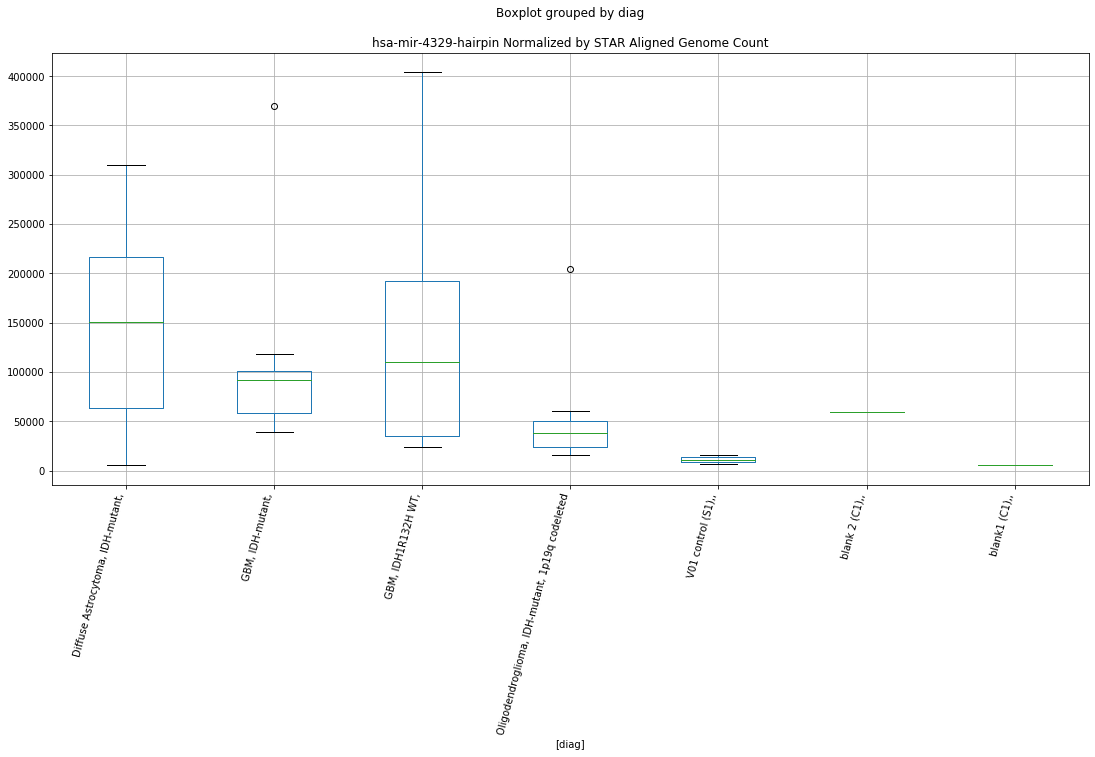

hsa-mir-4329-hairpin D-plex cutadapt2
	t = -2.582669385965695
	p = 0.01877034549838339


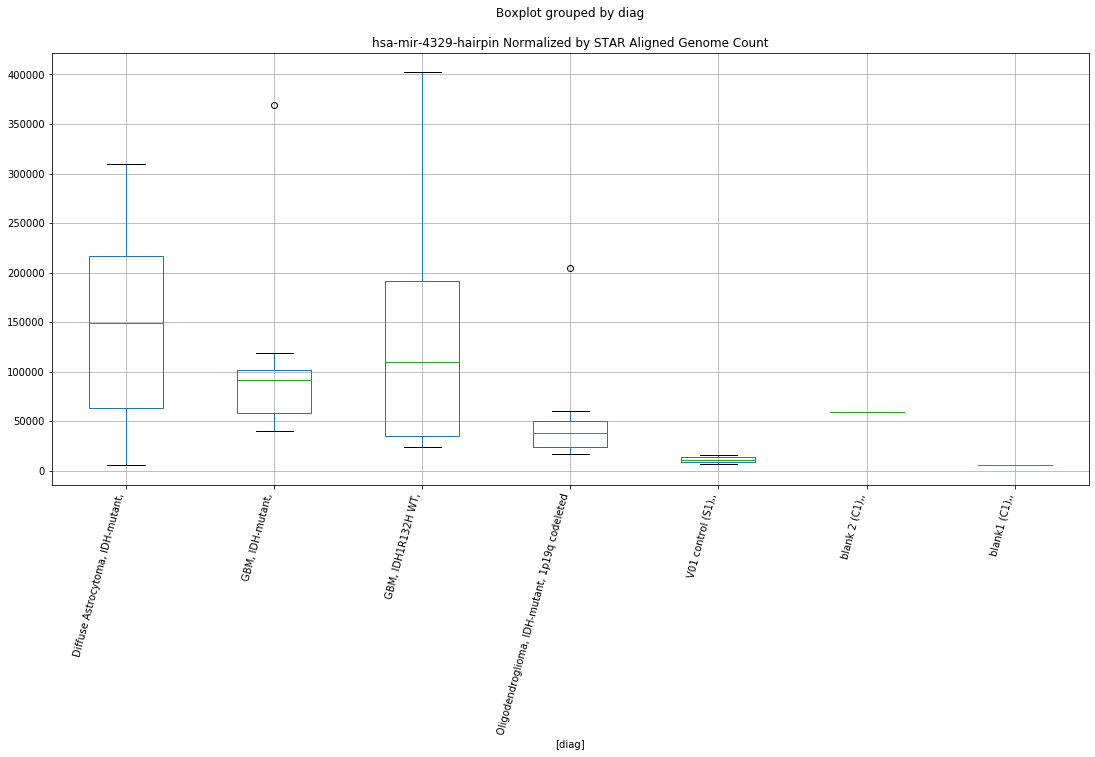

hsa-mir-4329-hairpin D-plex cutadapt3
	t = -2.5826475539559395
	p = 0.01877120543415154


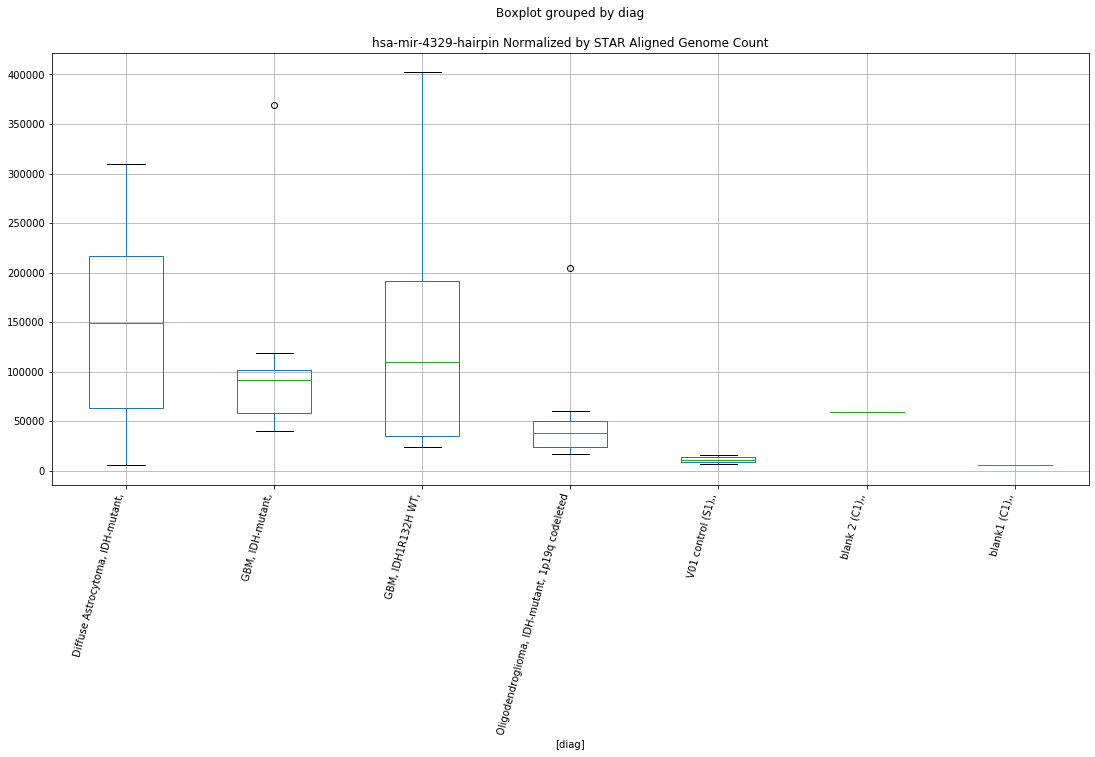

hsa-mir-4329-hairpin Lexogen bbduk1
	t = -1.9892077440808953
	p = 0.062095397985351776


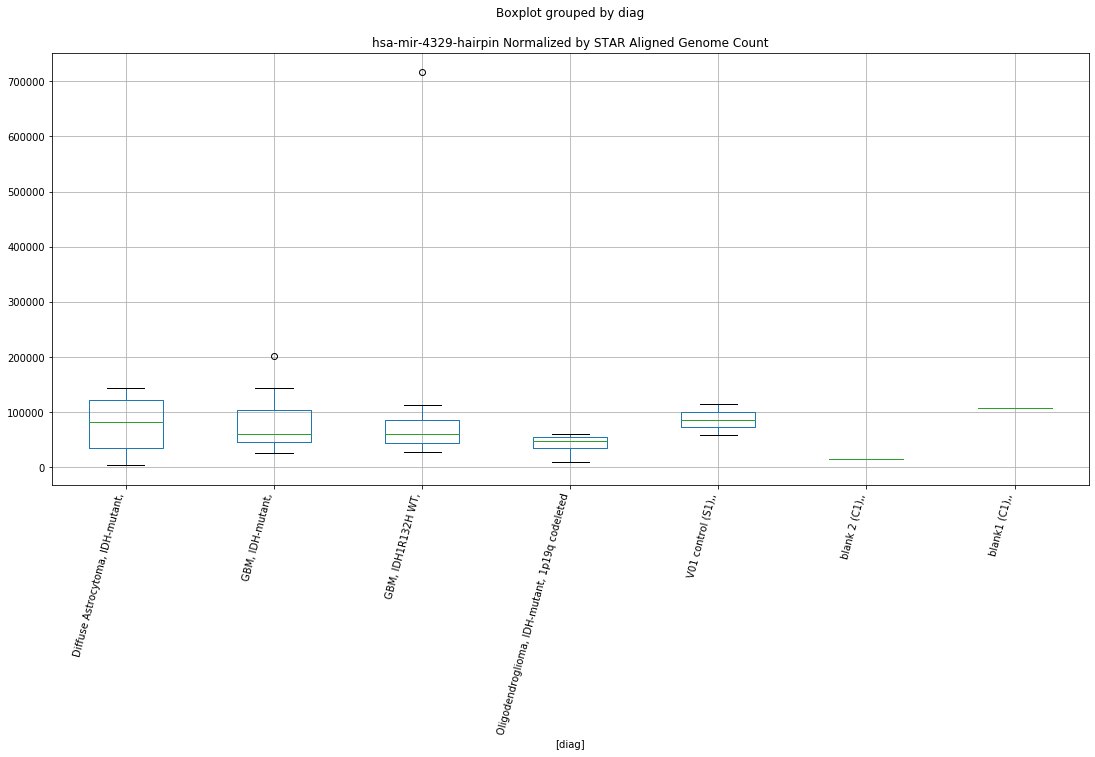

hsa-mir-4329-hairpin Lexogen bbduk2
	t = -1.7424300653976357
	p = 0.0984925653451132


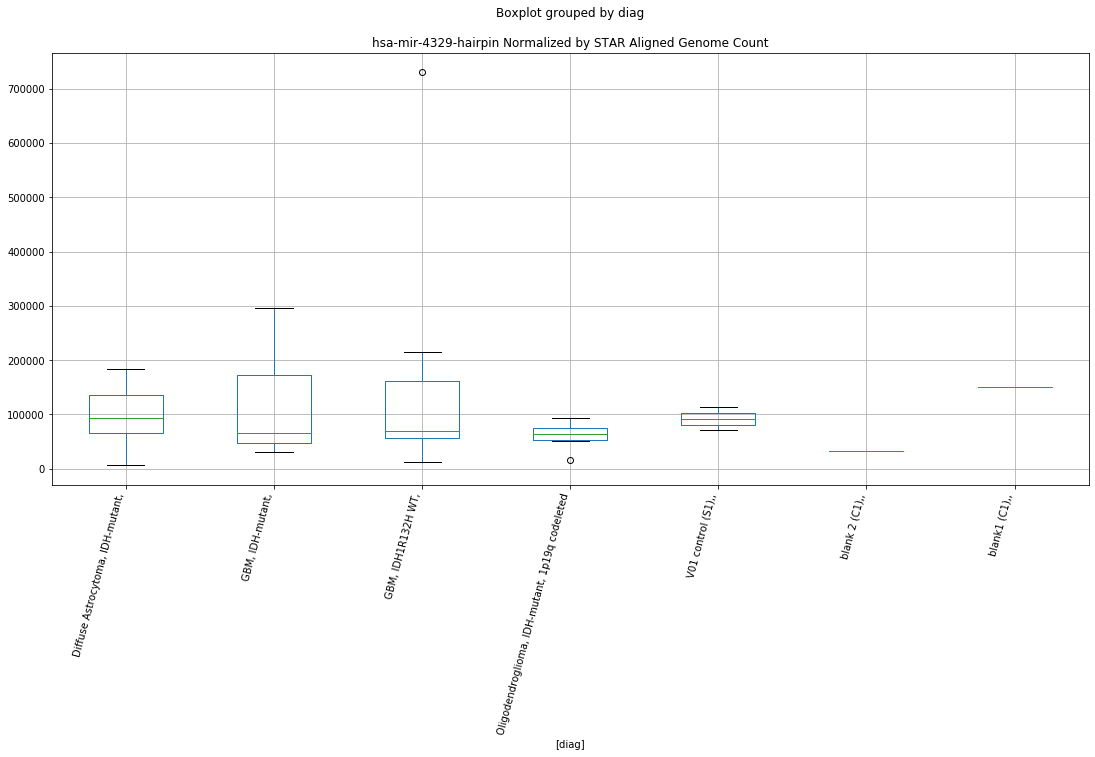

hsa-mir-5588-hairpin D-plex cutadapt1
	t = -2.081836983005449
	p = 0.05190182566185366


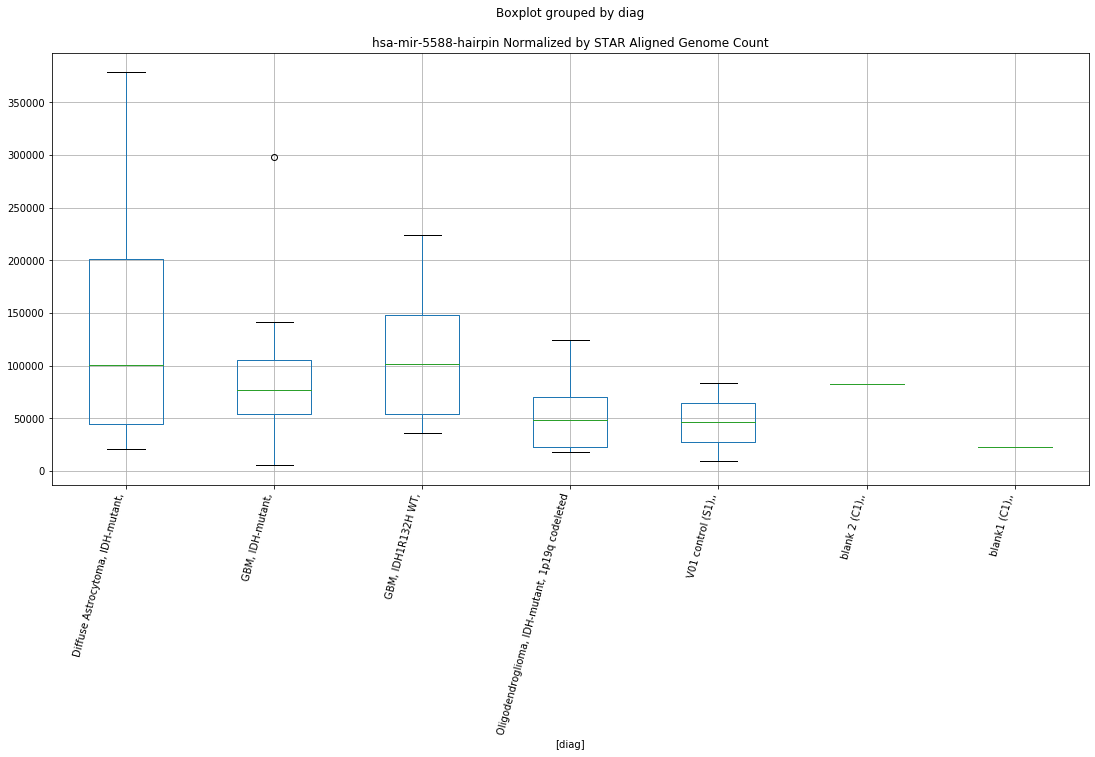

hsa-mir-5588-hairpin D-plex cutadapt2
	t = -2.0770789509022842
	p = 0.05238607329975269


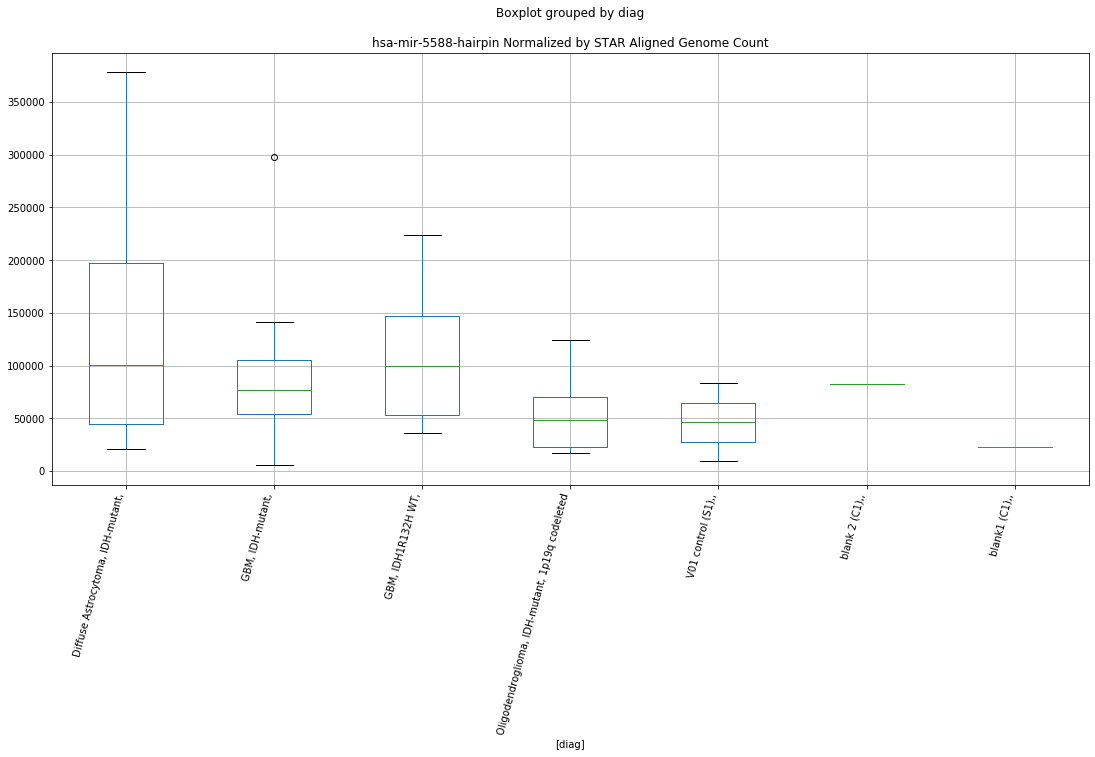

hsa-mir-5588-hairpin D-plex cutadapt3
	t = -2.077106429717227
	p = 0.052383264928981314


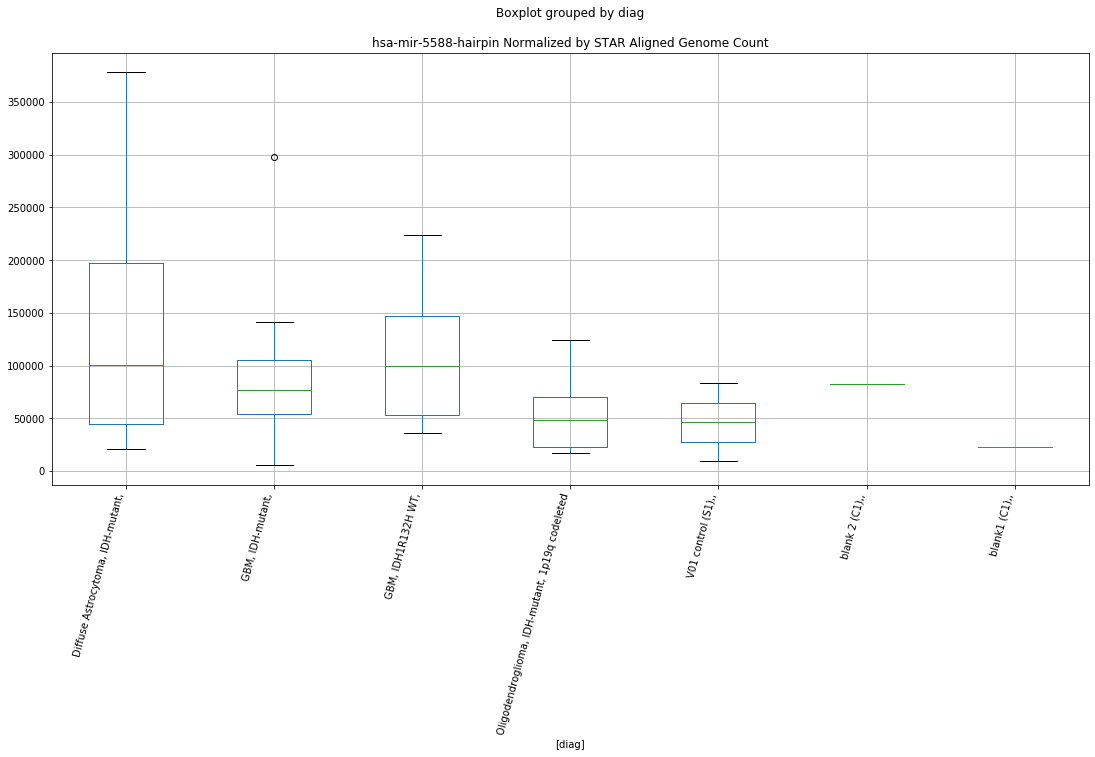

hsa-mir-92b-hairpin D-plex cutadapt1
	t = -2.7922587631508633
	p = 0.012034646579681264


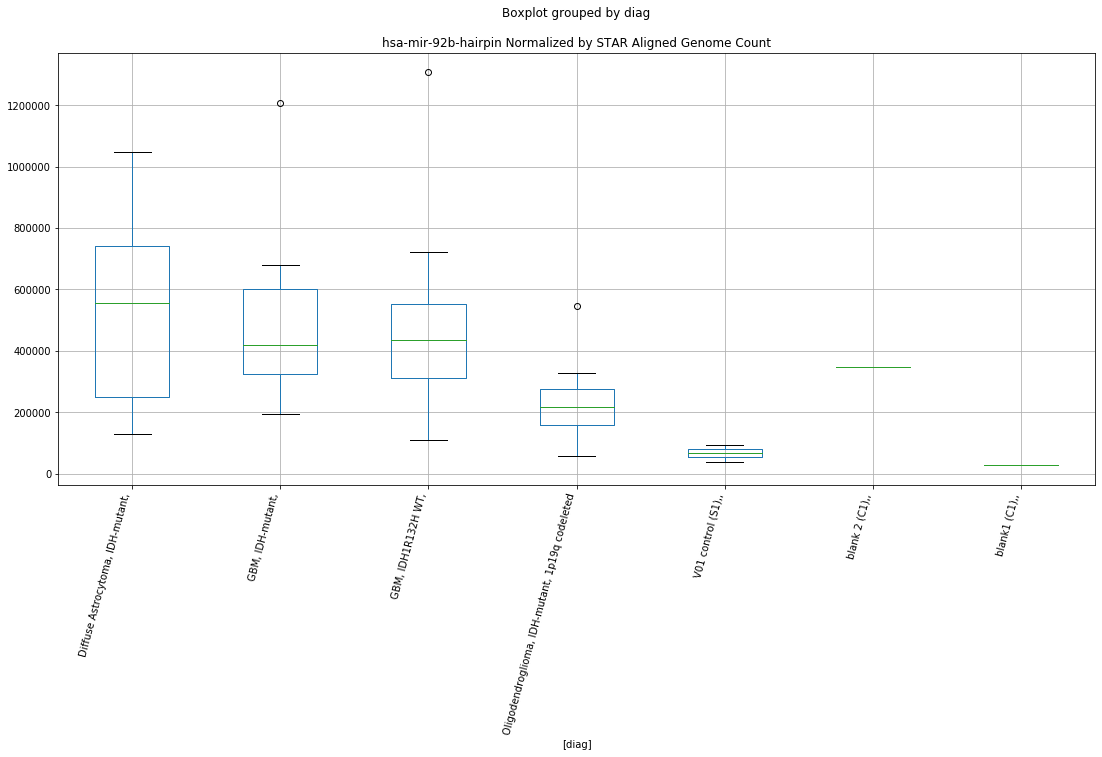

hsa-mir-92b-hairpin D-plex cutadapt2
	t = -2.7855418687183673
	p = 0.012208951577503489


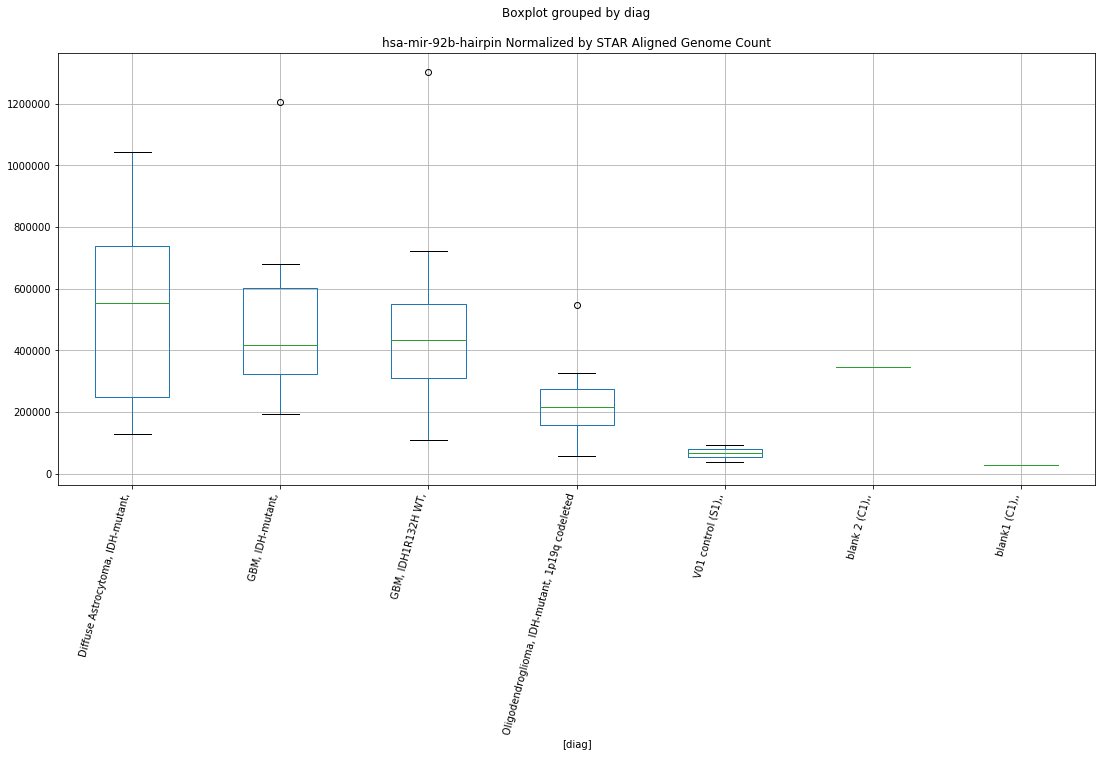

hsa-mir-92b-hairpin D-plex cutadapt3
	t = -2.7854930418371686
	p = 0.012210227476688136


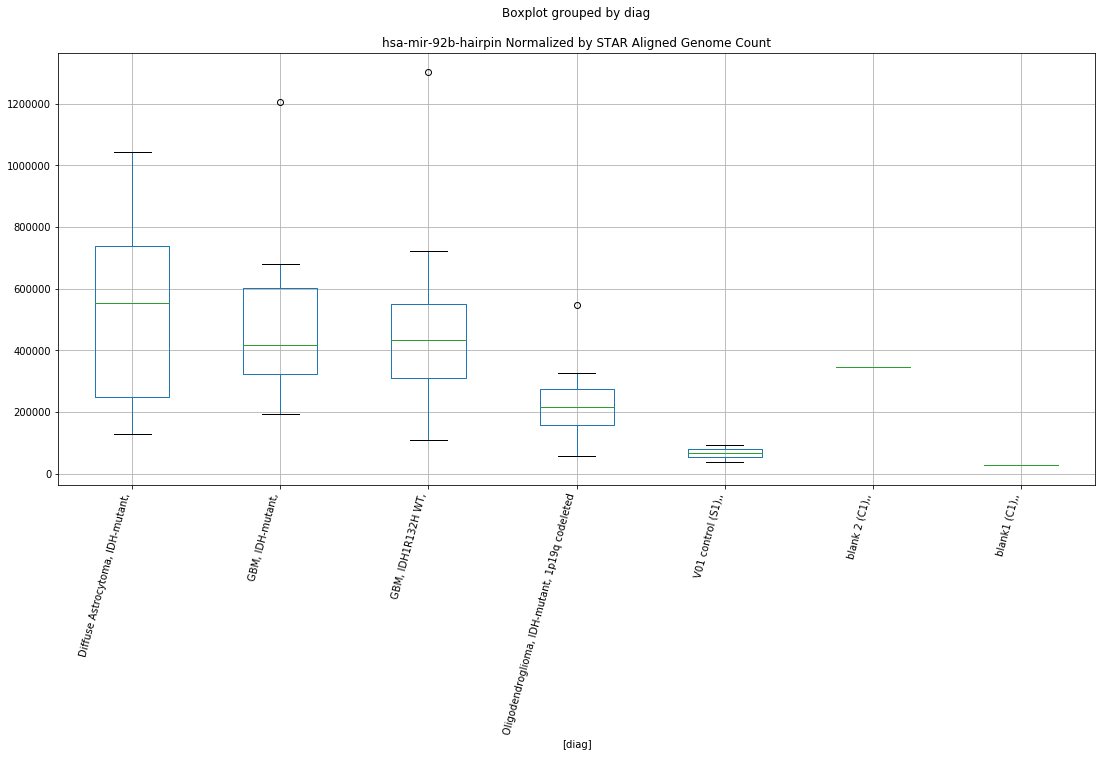

hsa-mir-548u-hairpin D-plex cutadapt1
	t = -2.385499560373918
	p = 0.028254601806202748


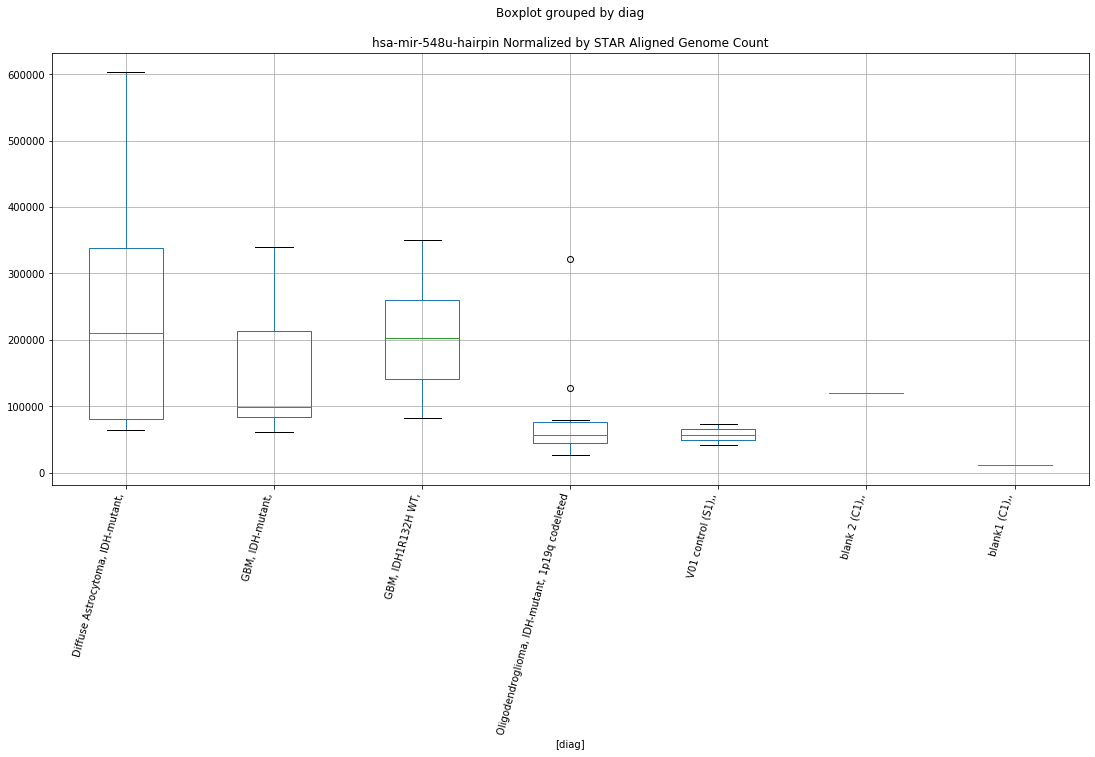

hsa-mir-548u-hairpin D-plex cutadapt2
	t = -2.3770384004023652
	p = 0.028748313821099925


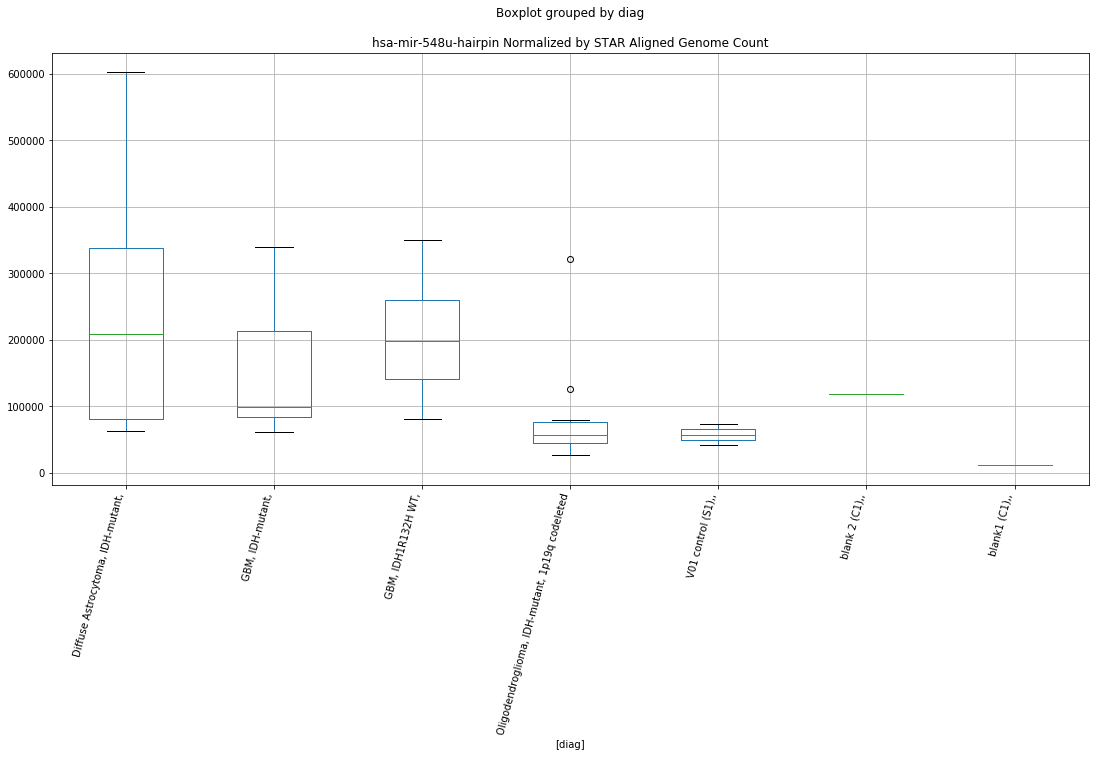

hsa-mir-548u-hairpin D-plex cutadapt3
	t = -2.3770506363474477
	p = 0.028747594070063248


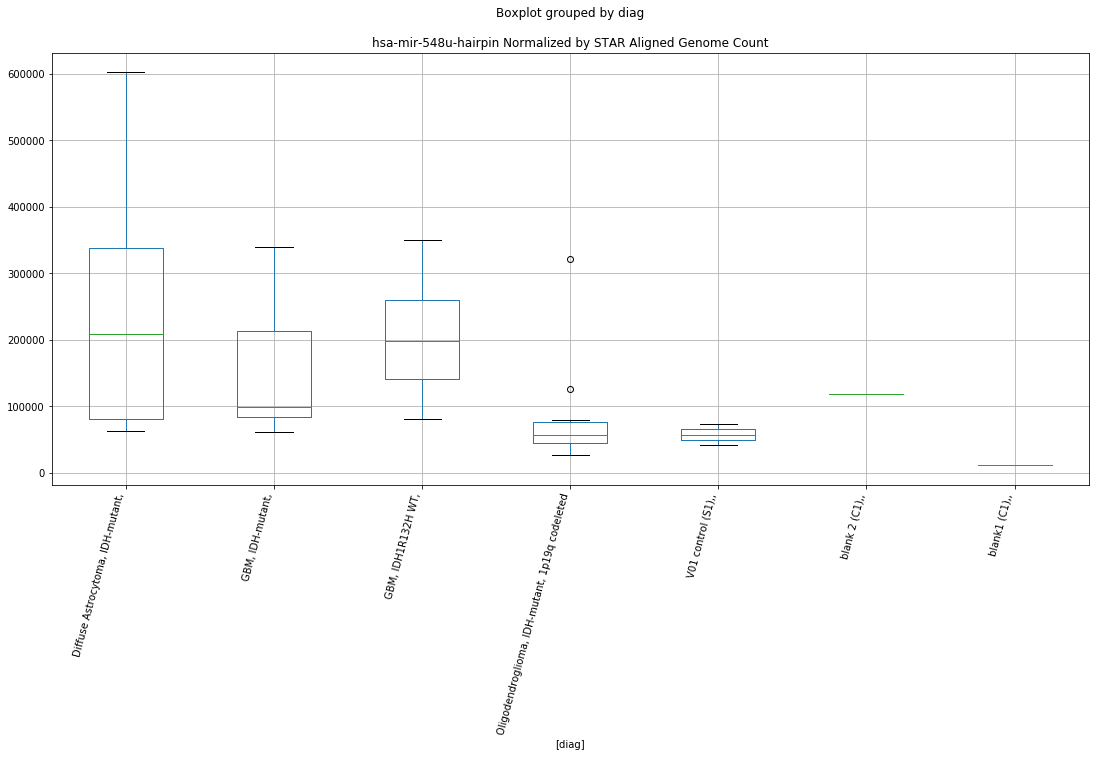

hsa-mir-3613-hairpin D-plex cutadapt1
	t = -1.7899386153267556
	p = 0.09030089035822232


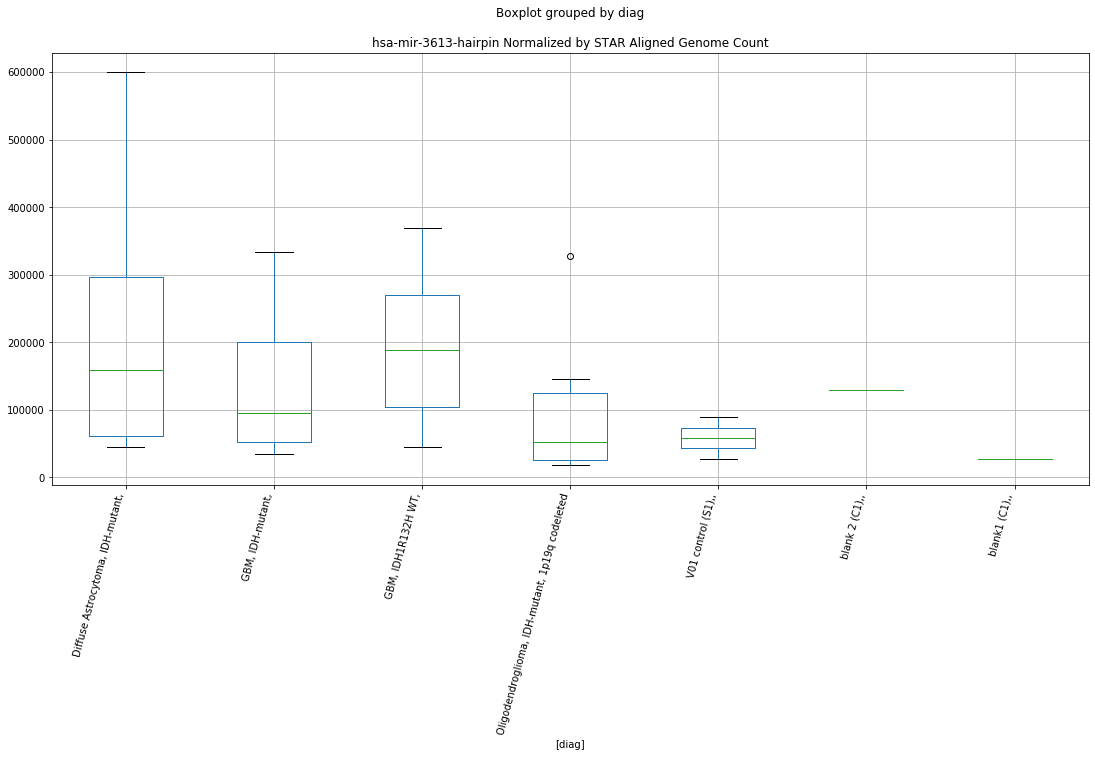

hsa-mir-3613-hairpin D-plex cutadapt2
	t = -1.7813763860760452
	p = 0.09173183662556787


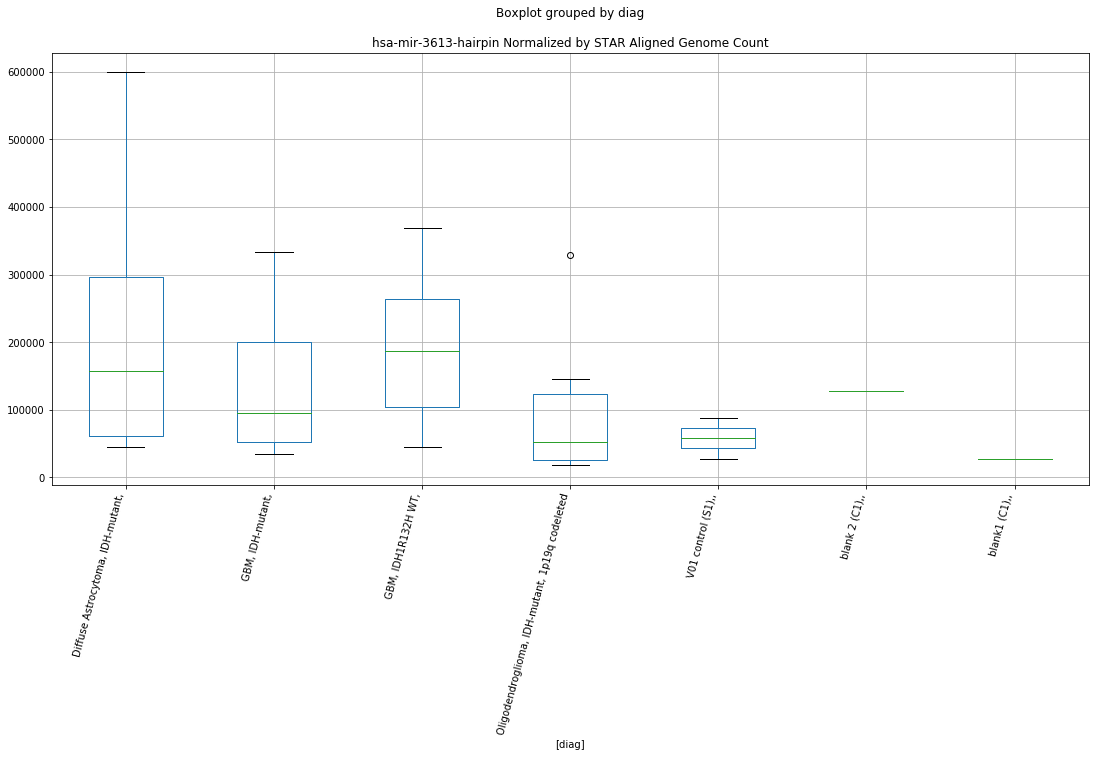

hsa-mir-3613-hairpin D-plex cutadapt3
	t = -1.7836587680023632
	p = 0.09134847859552507


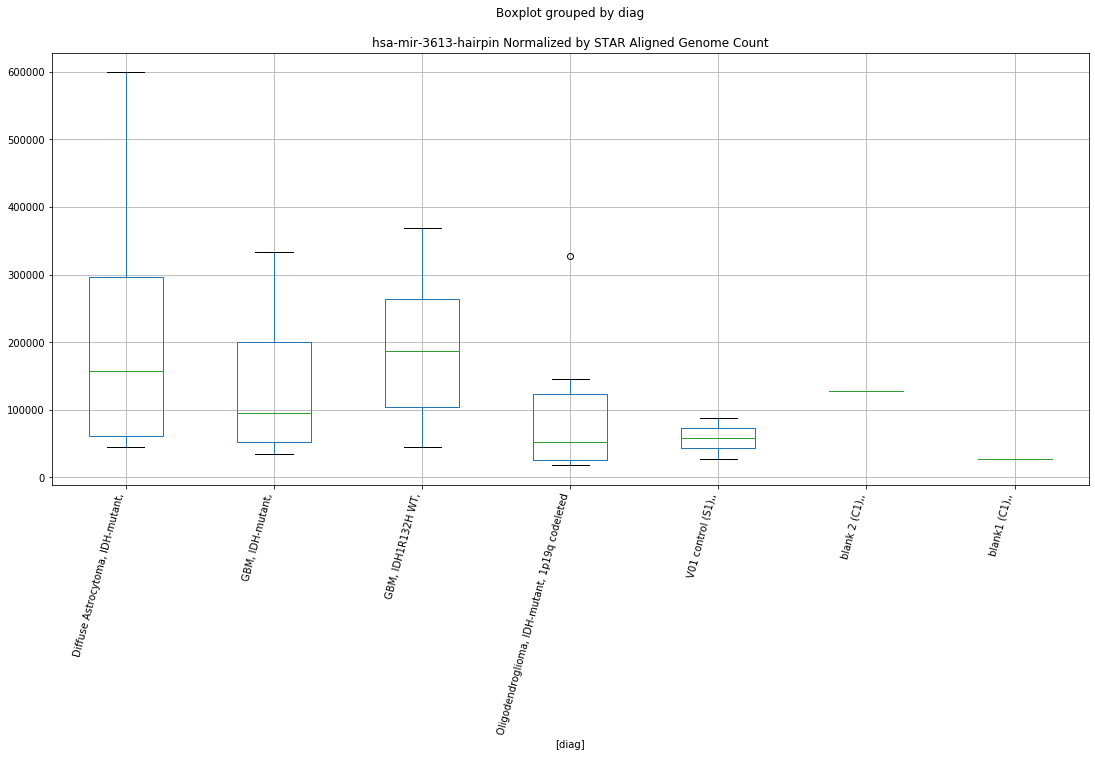

hsa-mir-3613-hairpin Lexogen cutadapt1
	t = 1.7572401103427702
	p = 0.09587237618188284


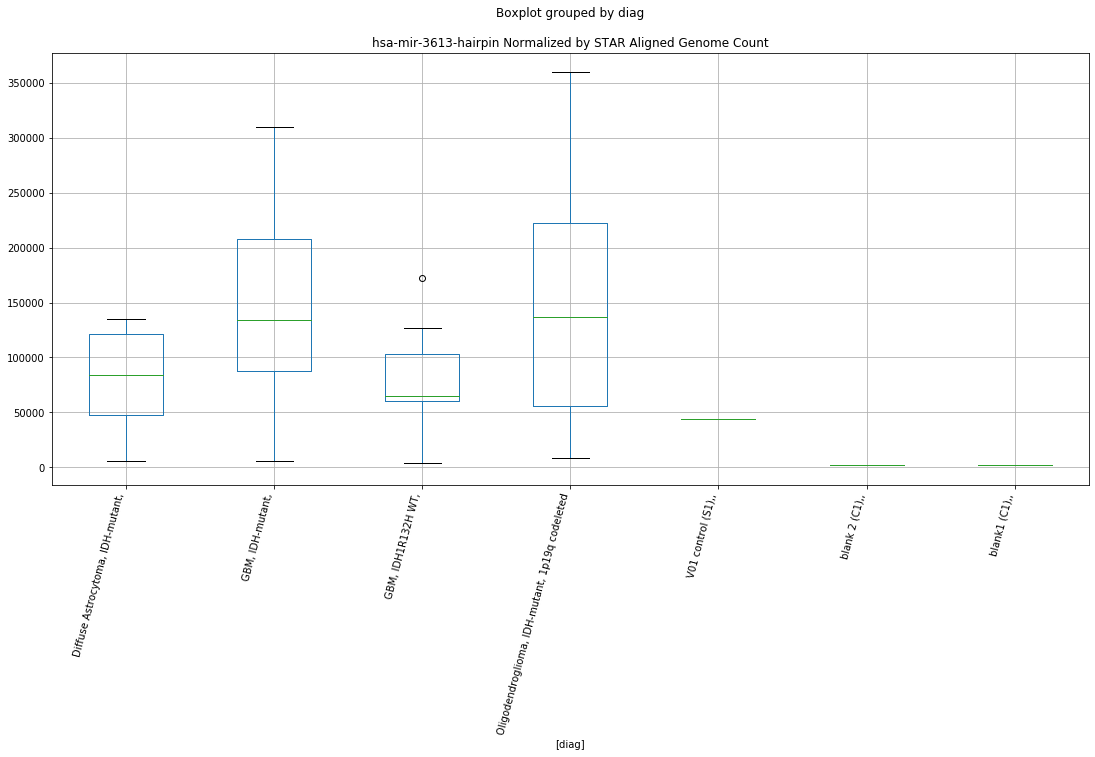

hsa-mir-3613-hairpin Lexogen cutadapt2
	t = 1.7523698710616105
	p = 0.0967272647109625


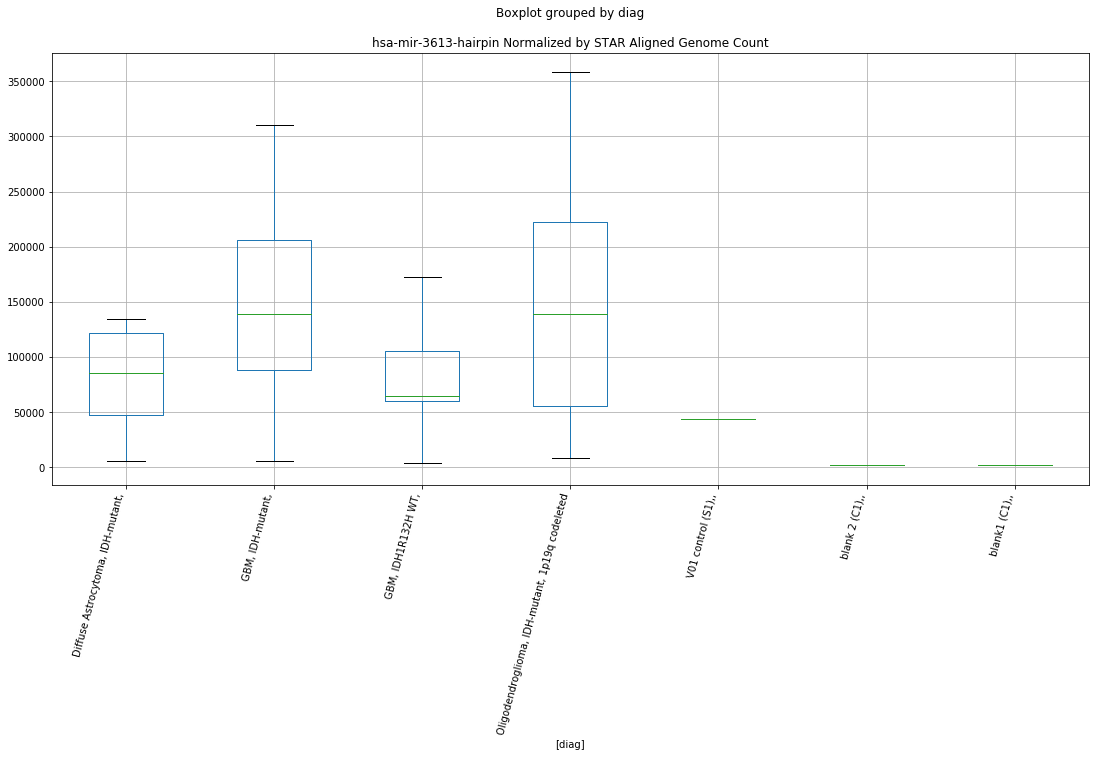

hsa-mir-3613-hairpin Lexogen cutadapt3
	t = 1.7458672295017588
	p = 0.09787899635412936


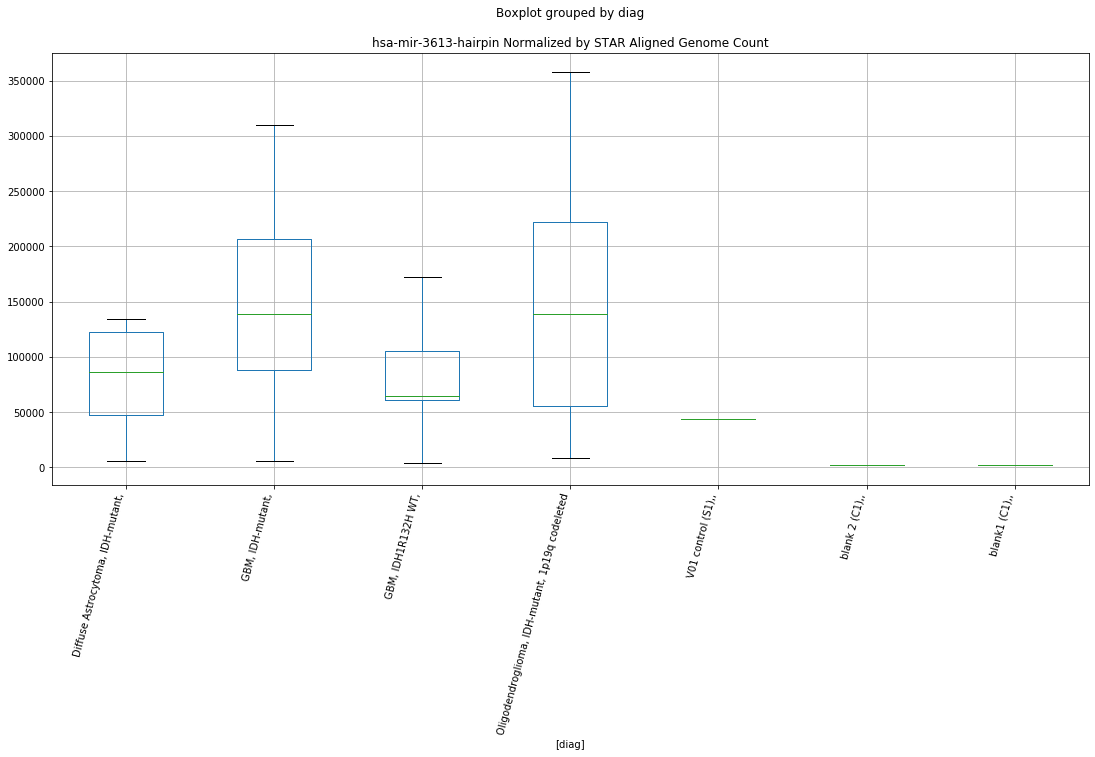

hsa-mir-4668-hairpin D-plex cutadapt1
	t = -2.0843428084569493
	p = 0.05164843120405477


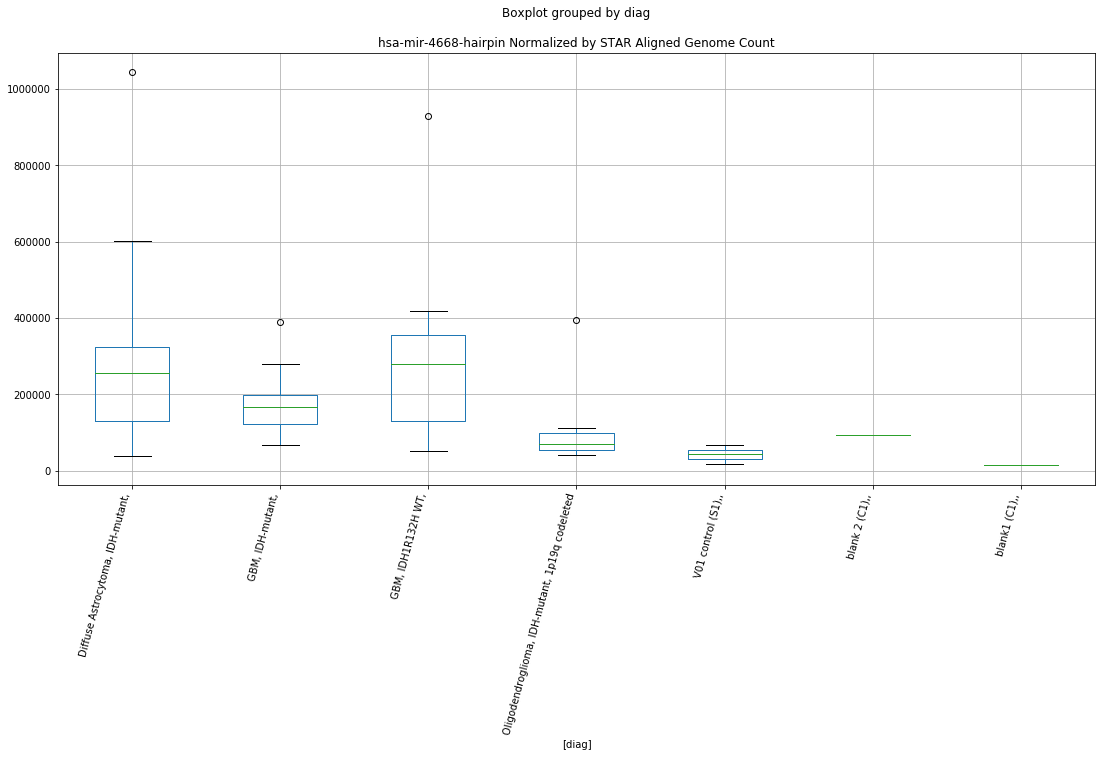

hsa-mir-4668-hairpin D-plex cutadapt2
	t = -2.0808170091379323
	p = 0.052005290121522246


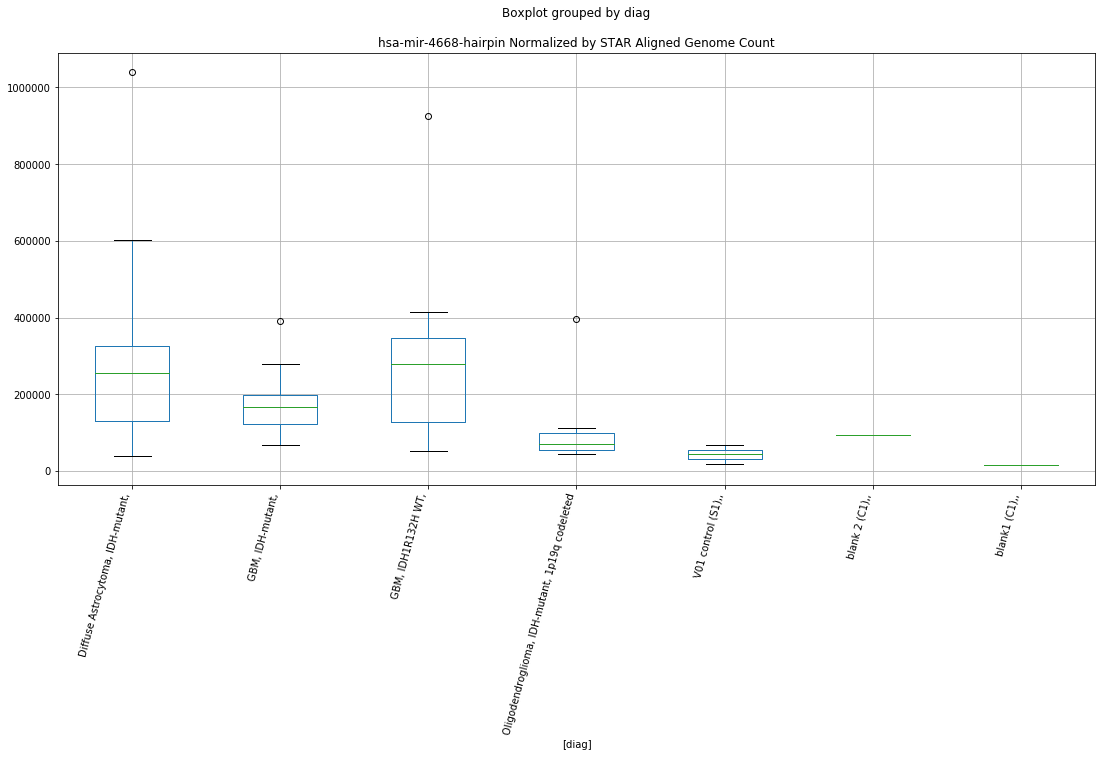

hsa-mir-4668-hairpin D-plex cutadapt3
	t = -2.0807751819674283
	p = 0.05200953699029415


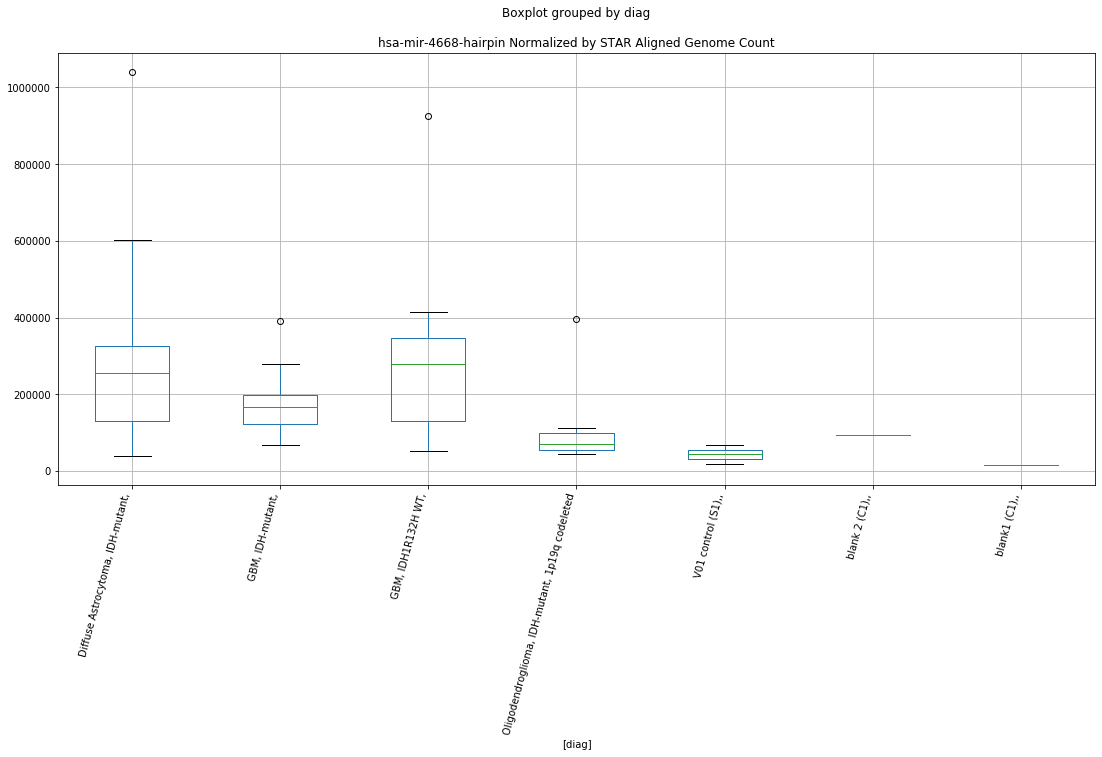

hsa-mir-4668-5p-mature D-plex cutadapt1
	t = -1.8883687371191467
	p = 0.0752022900156076


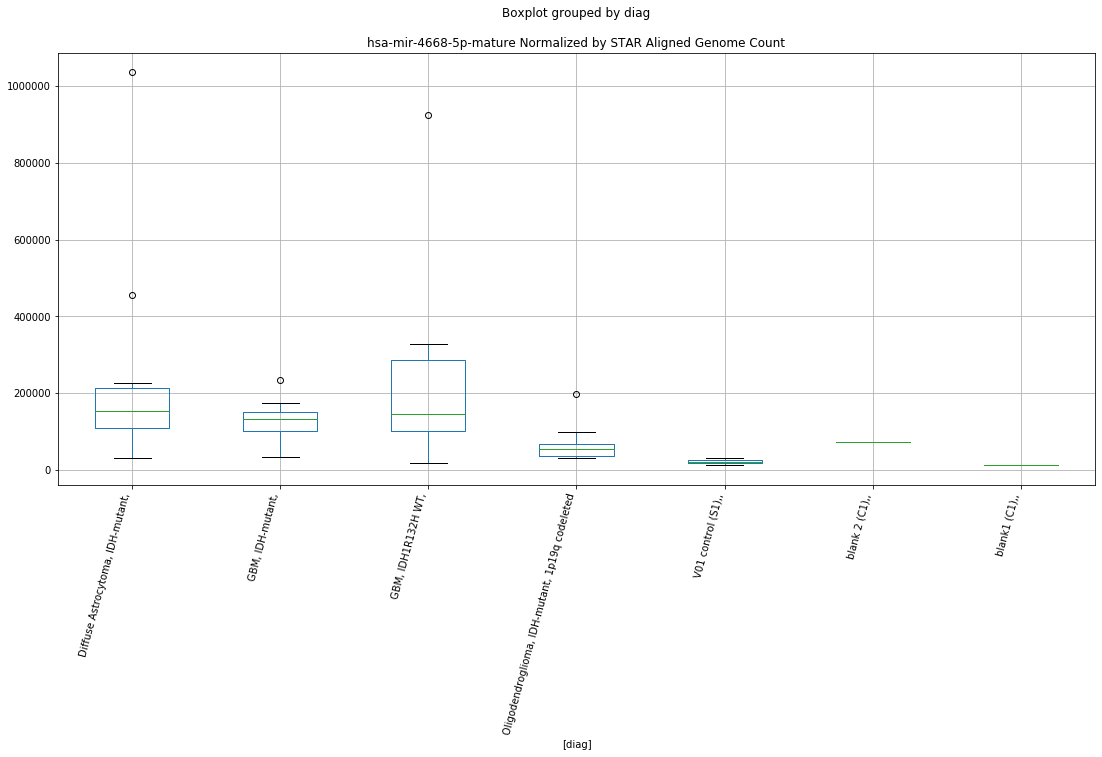

hsa-mir-4668-5p-mature D-plex cutadapt2
	t = -1.886547009054472
	p = 0.0754601255238011


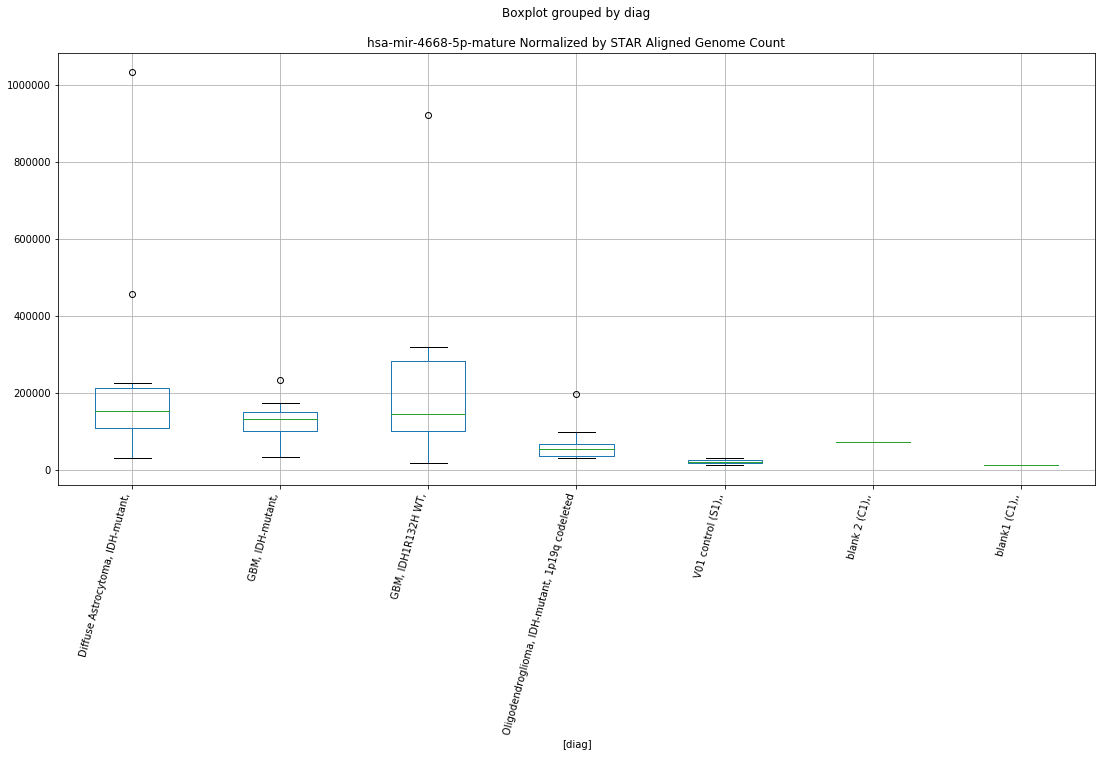

hsa-mir-4668-5p-mature D-plex cutadapt3
	t = -1.8865049307126922
	p = 0.07546609025207617


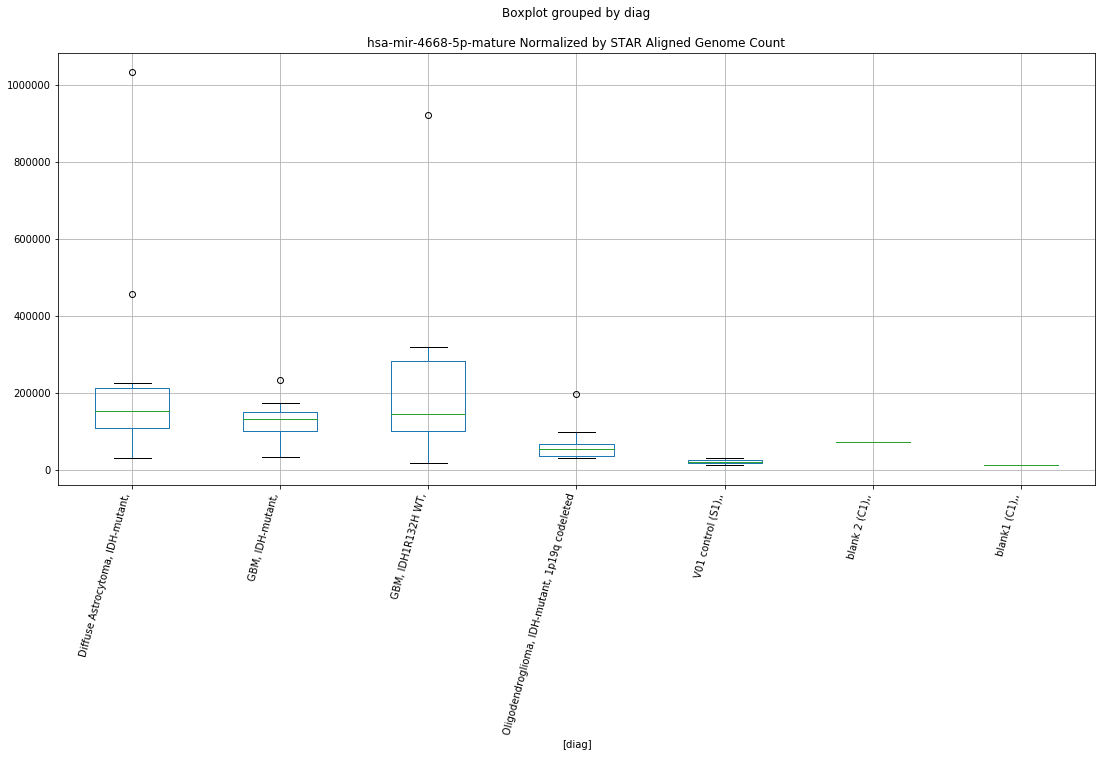

hsa-mir-484-hairpin D-plex cutadapt1
	t = -1.9545761992764745
	p = 0.0663464669765915


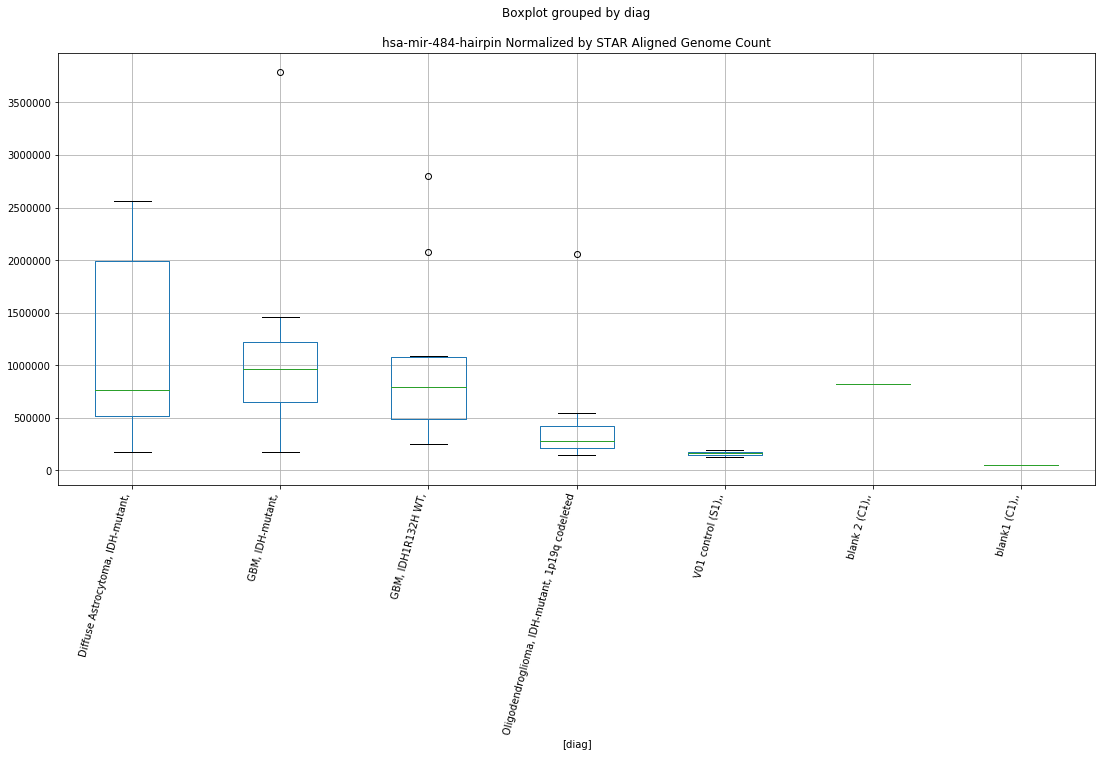

hsa-mir-484-hairpin D-plex cutadapt2
	t = -1.9465469037110454
	p = 0.06736847889307952


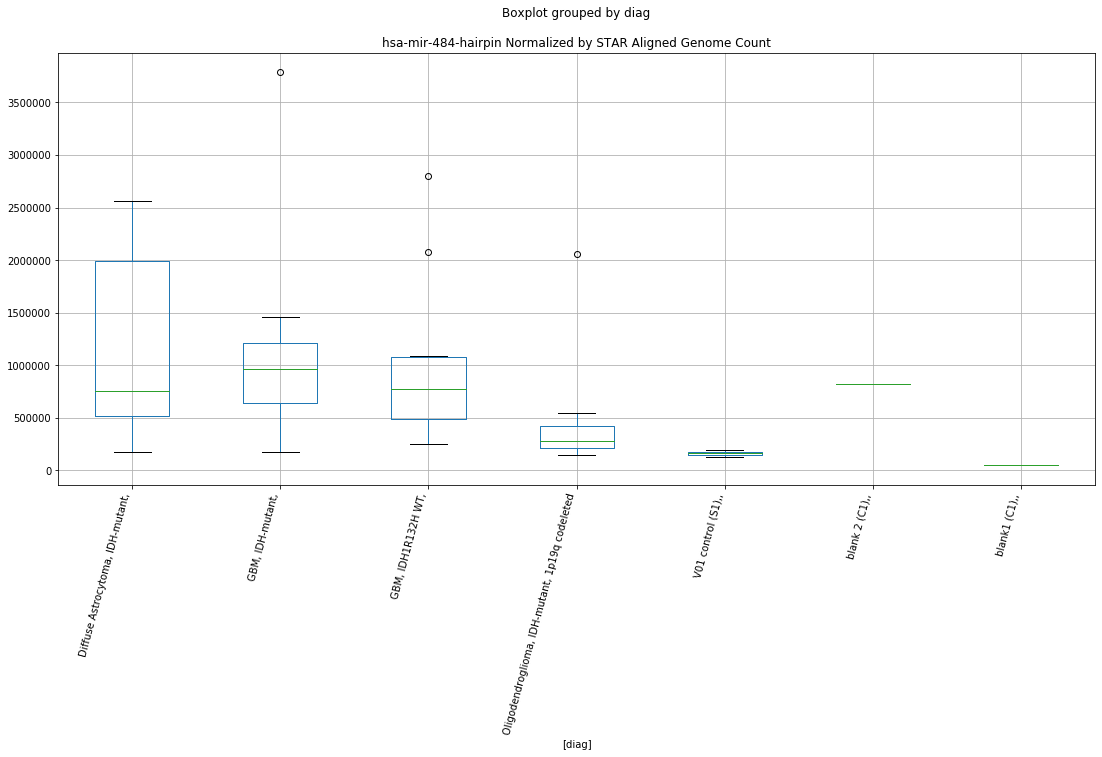

hsa-mir-484-hairpin D-plex cutadapt3
	t = -1.9465174454013443
	p = 0.0673722542318984


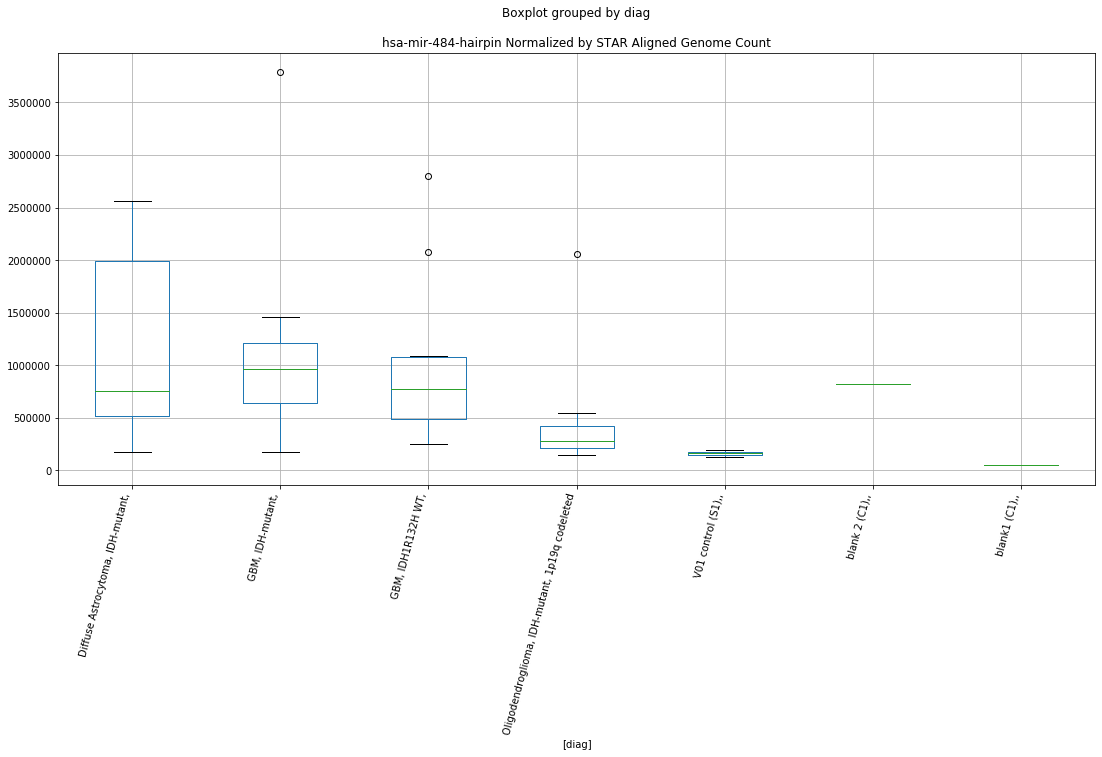

hsa-mir-3658-hairpin D-plex cutadapt1
	t = -2.03060407117667
	p = 0.05733569305396686


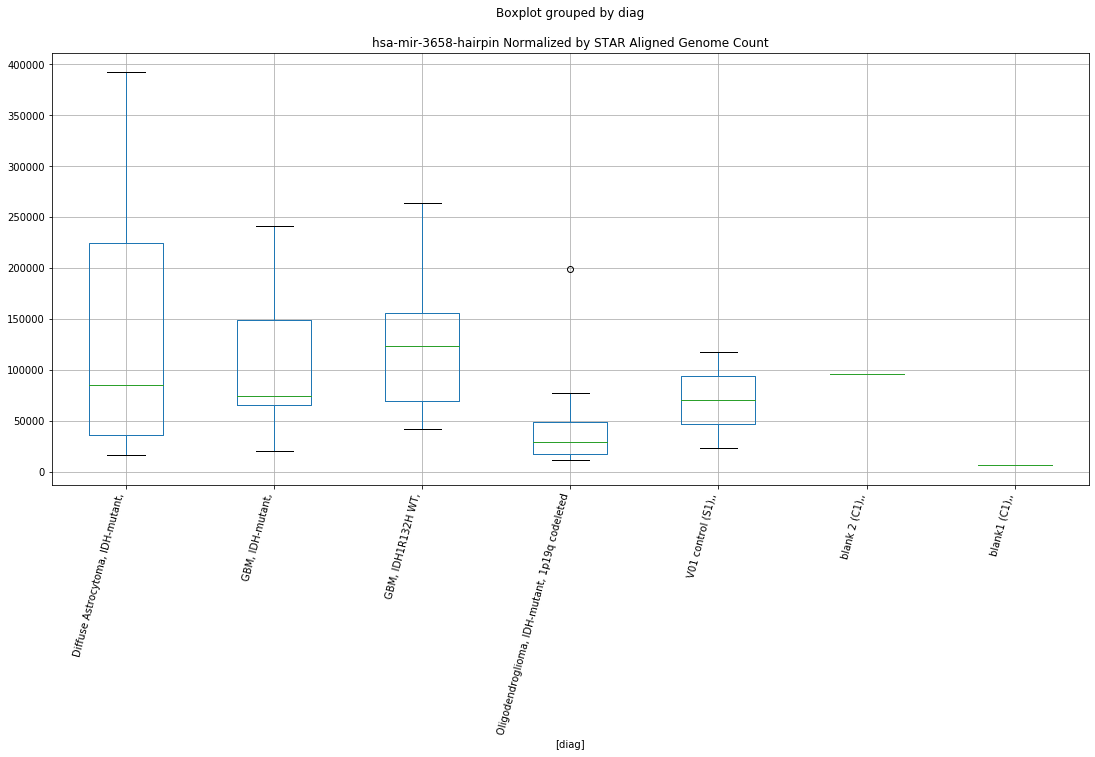

hsa-mir-3658-hairpin D-plex cutadapt2
	t = -2.022480209329423
	p = 0.058243003847188855


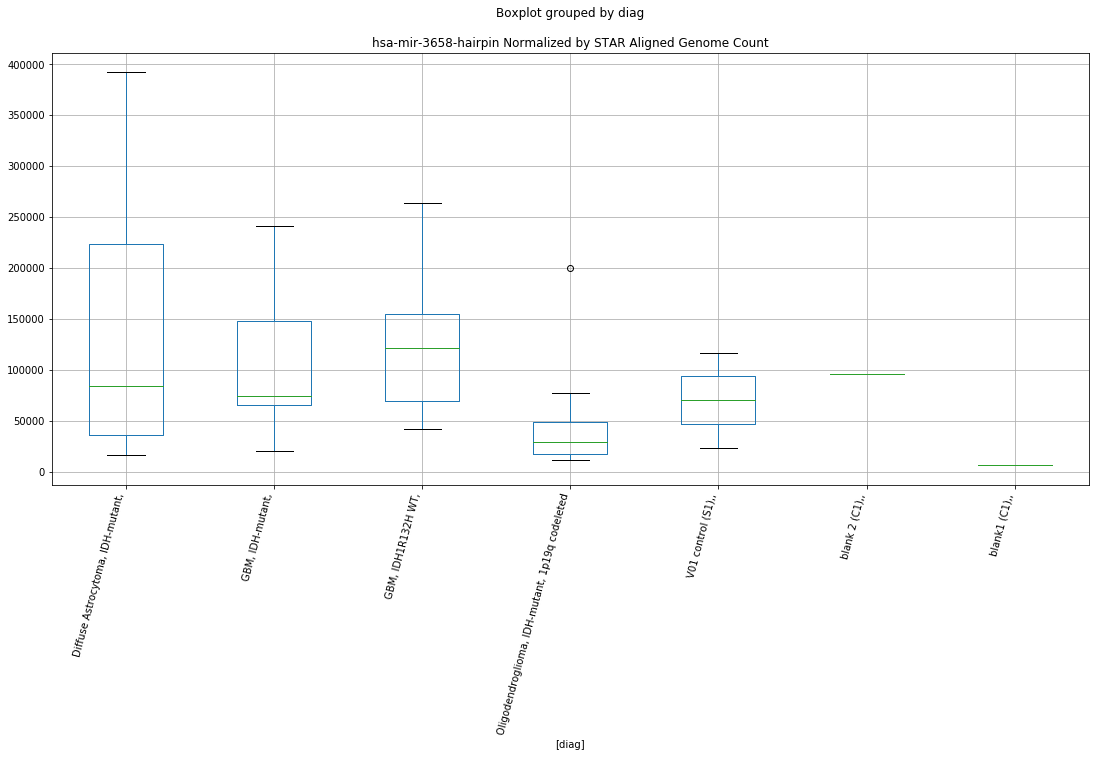

hsa-mir-3658-hairpin D-plex cutadapt3
	t = -2.0258383587210003
	p = 0.057866392954097144


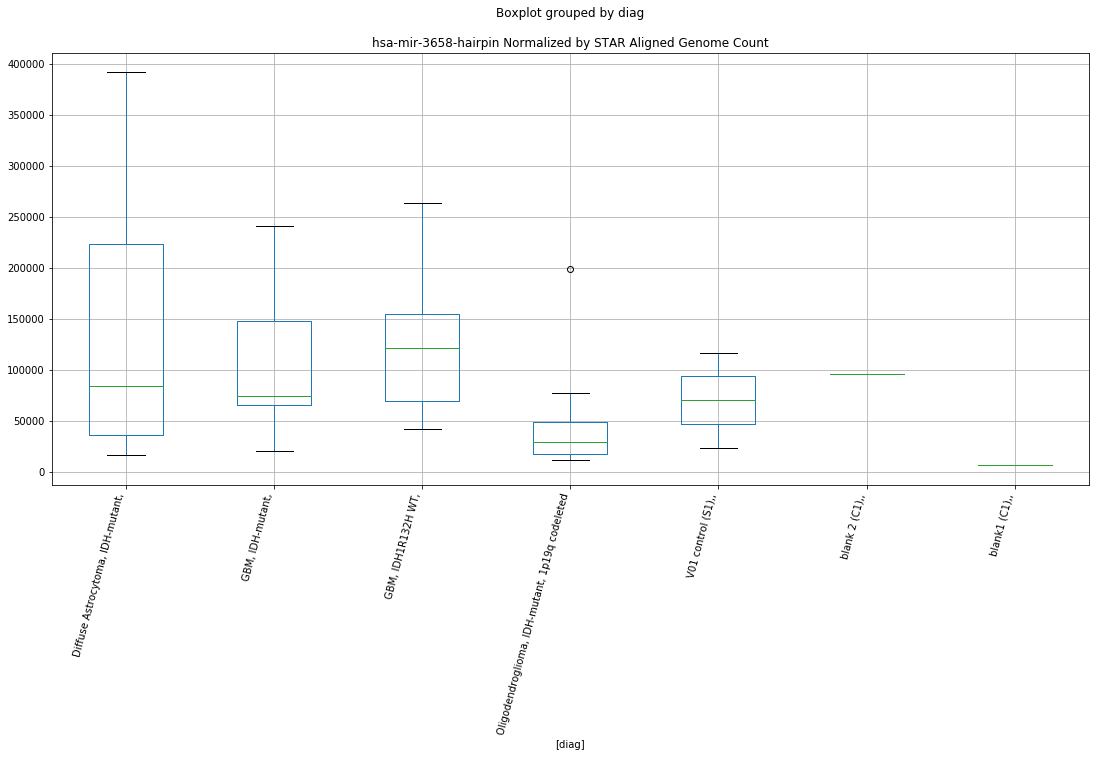

hsa-mir-567-hairpin D-plex cutadapt1
	t = -2.190400753386492
	p = 0.04190189470261197


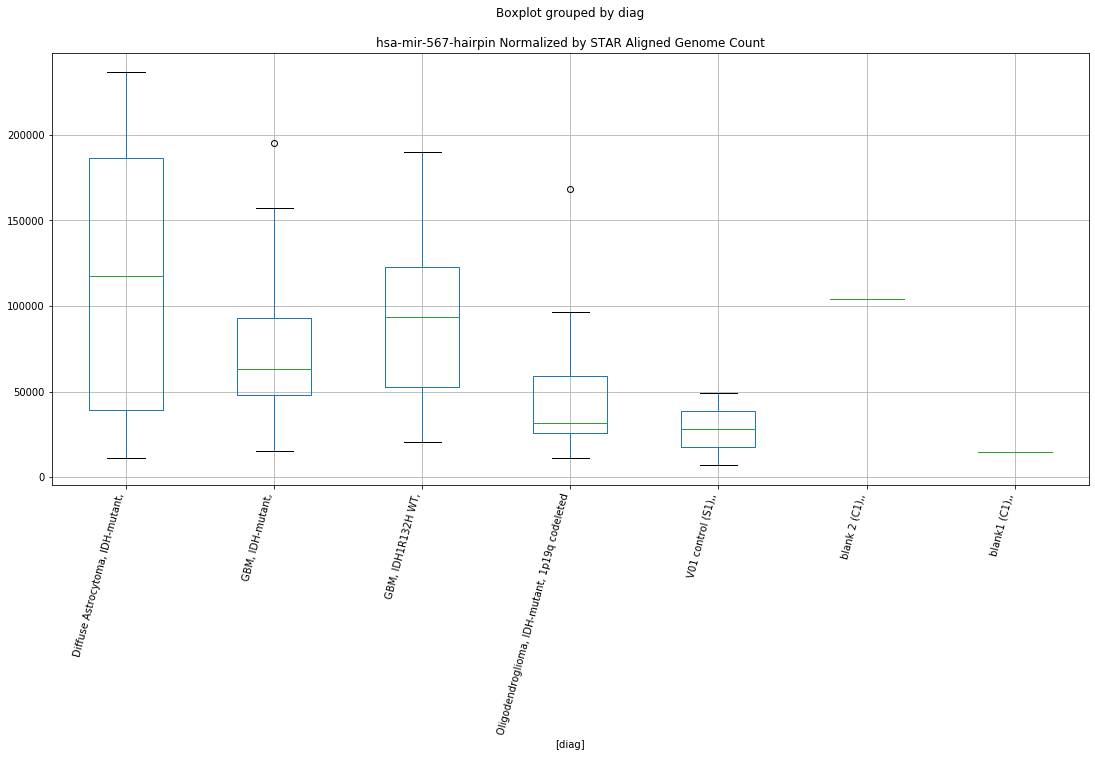

hsa-mir-567-hairpin D-plex cutadapt2
	t = -2.183808155429602
	p = 0.04245483486981378


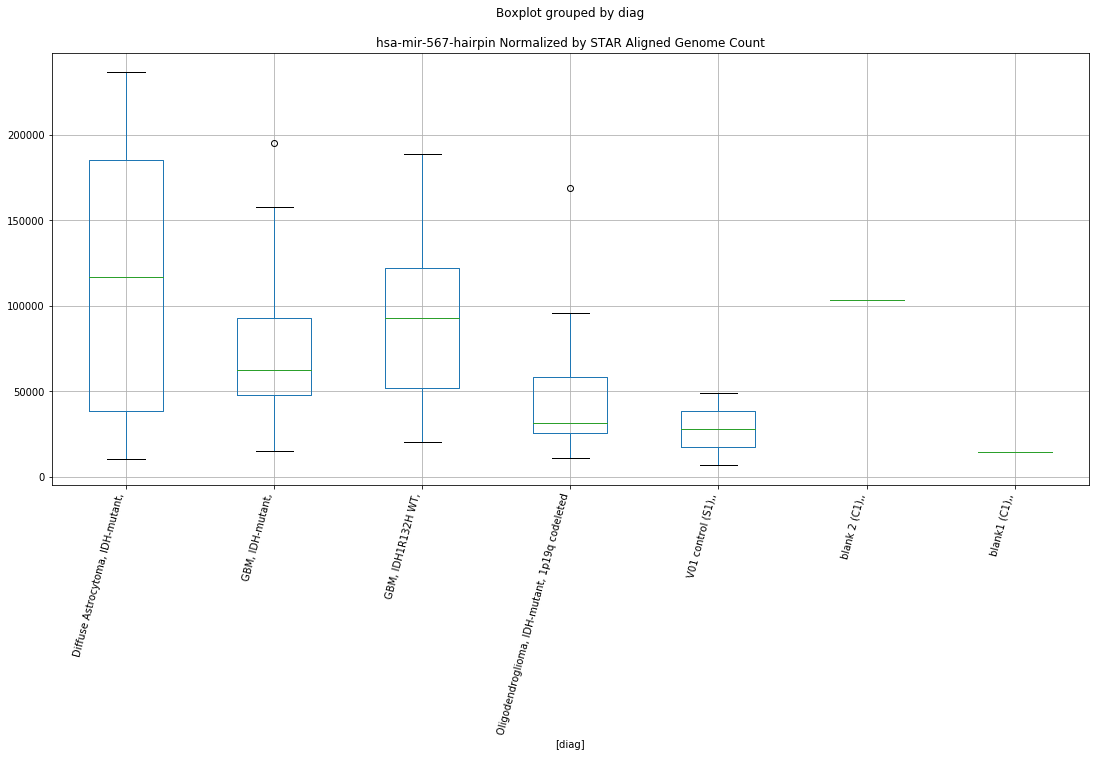

hsa-mir-567-hairpin D-plex cutadapt3
	t = -2.1837903517815955
	p = 0.04245633713036548


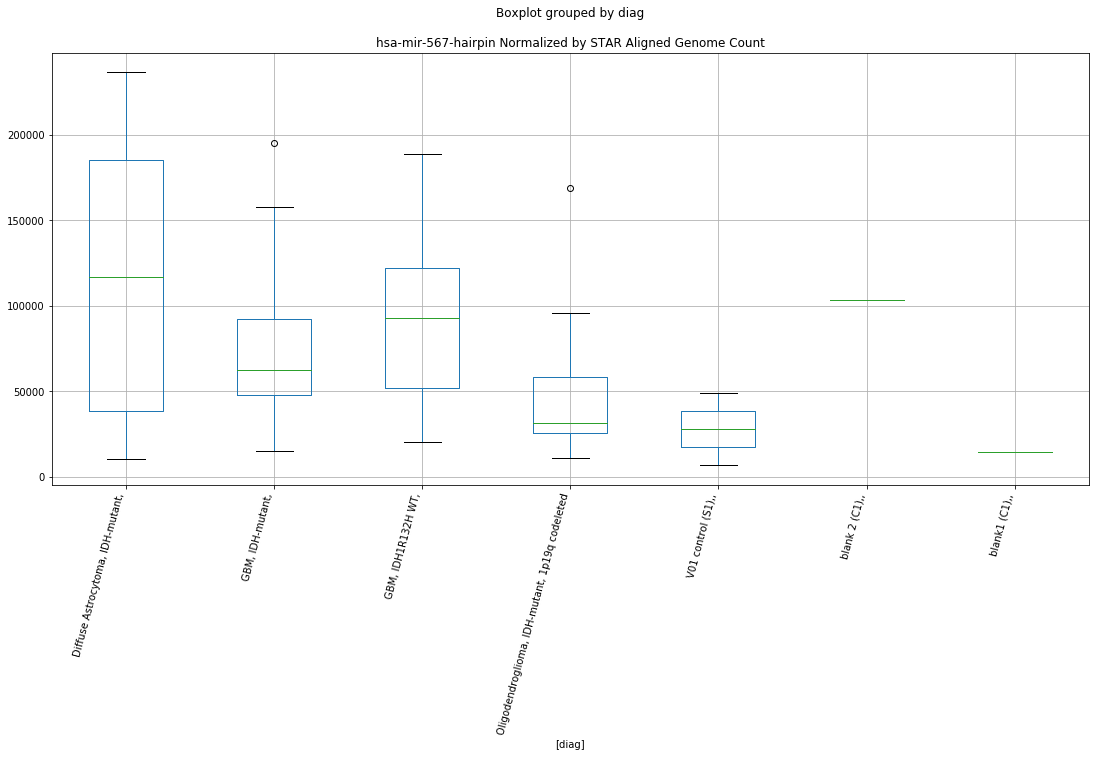

hsa-mir-8052-hairpin D-plex cutadapt1
	t = -2.0004780997099703
	p = 0.06076557699900926


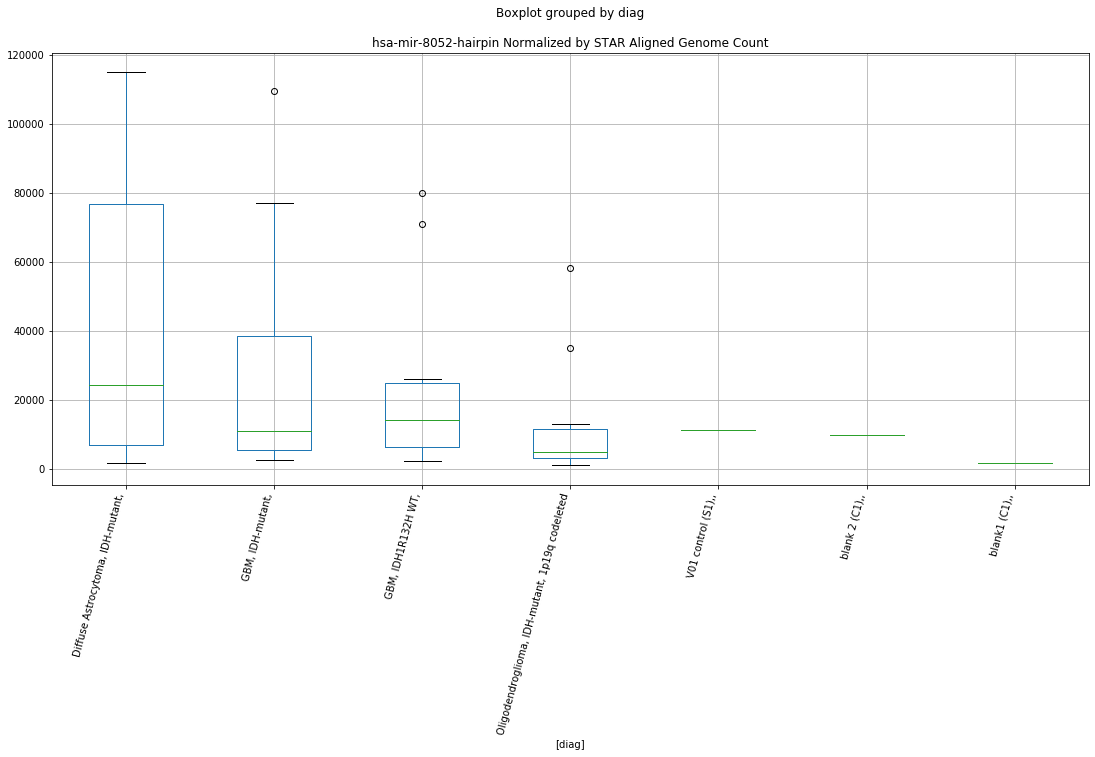

hsa-mir-8052-hairpin D-plex cutadapt2
	t = -1.998561280896038
	p = 0.06098992702042612


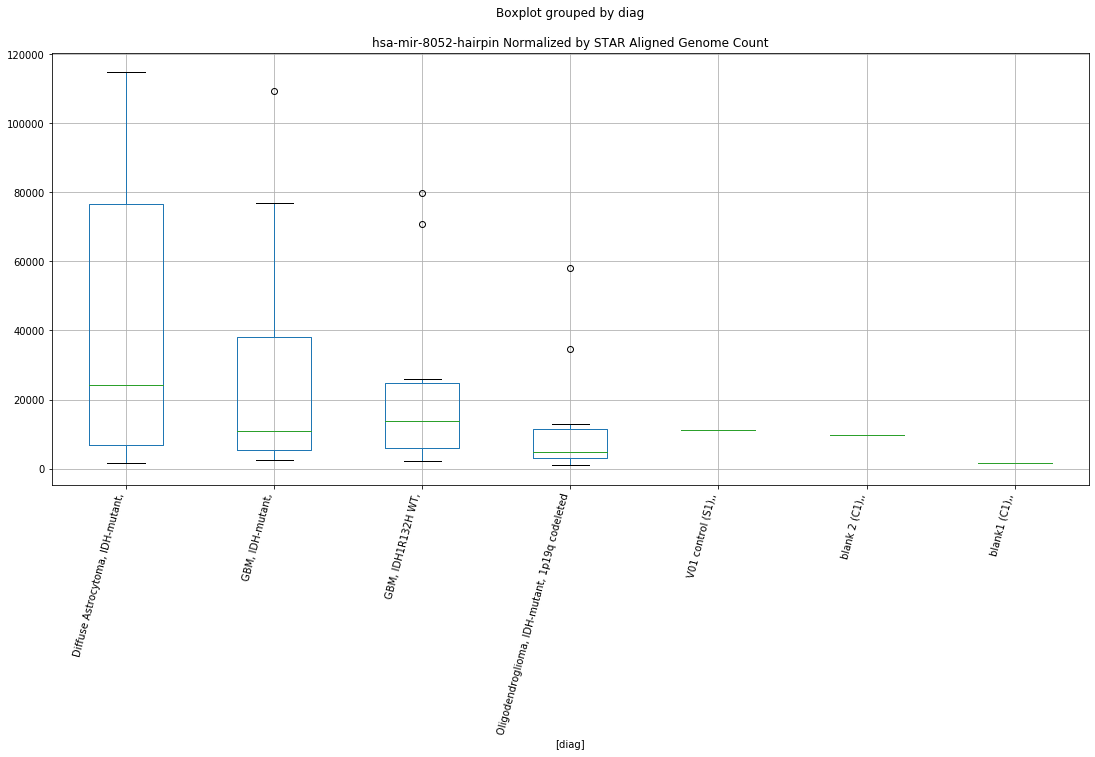

hsa-mir-8052-hairpin D-plex cutadapt3
	t = -1.998534238138897
	p = 0.06099309749827289


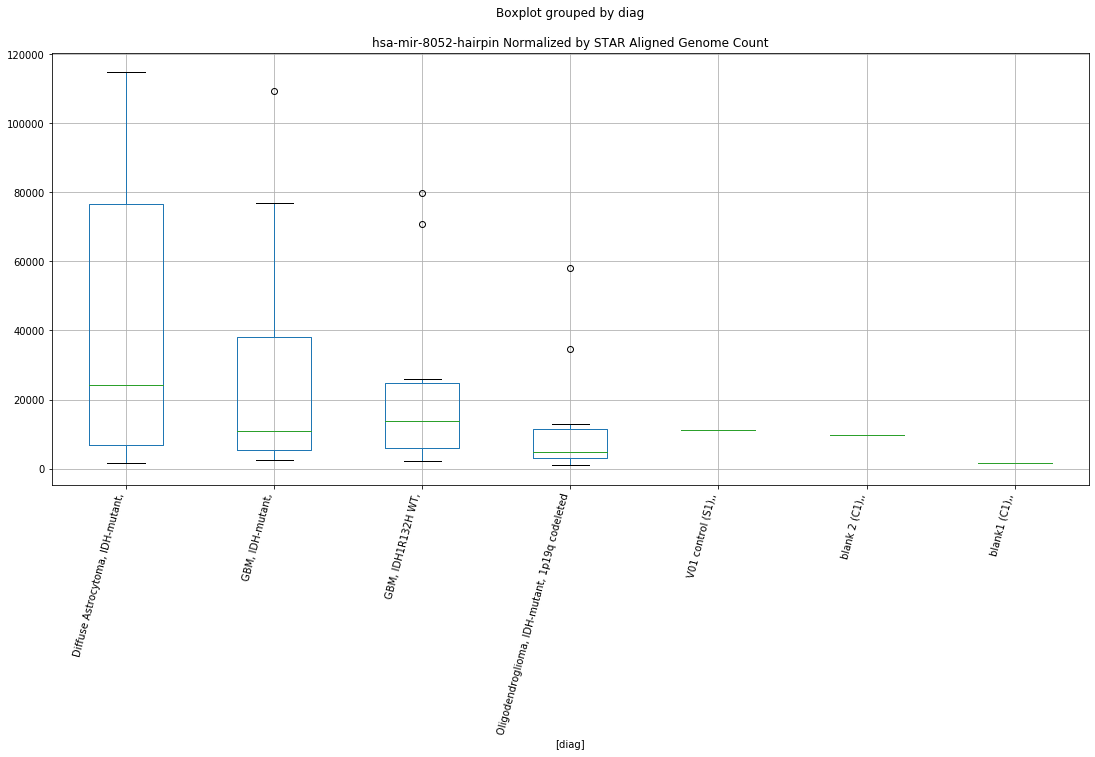

hsa-mir-3613-5p-mature D-plex cutadapt1
	t = -1.7919224870580797
	p = 0.08997213186967379


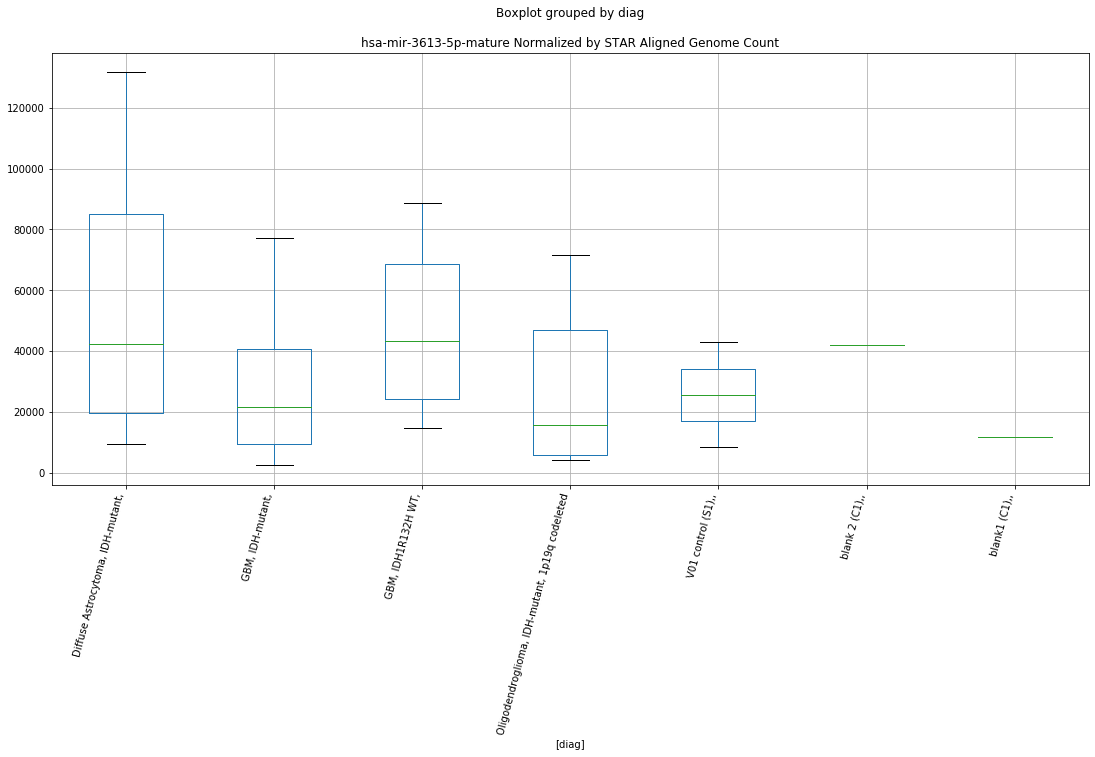

hsa-mir-3613-5p-mature D-plex cutadapt2
	t = -1.7885357651329066
	p = 0.09053399676670072


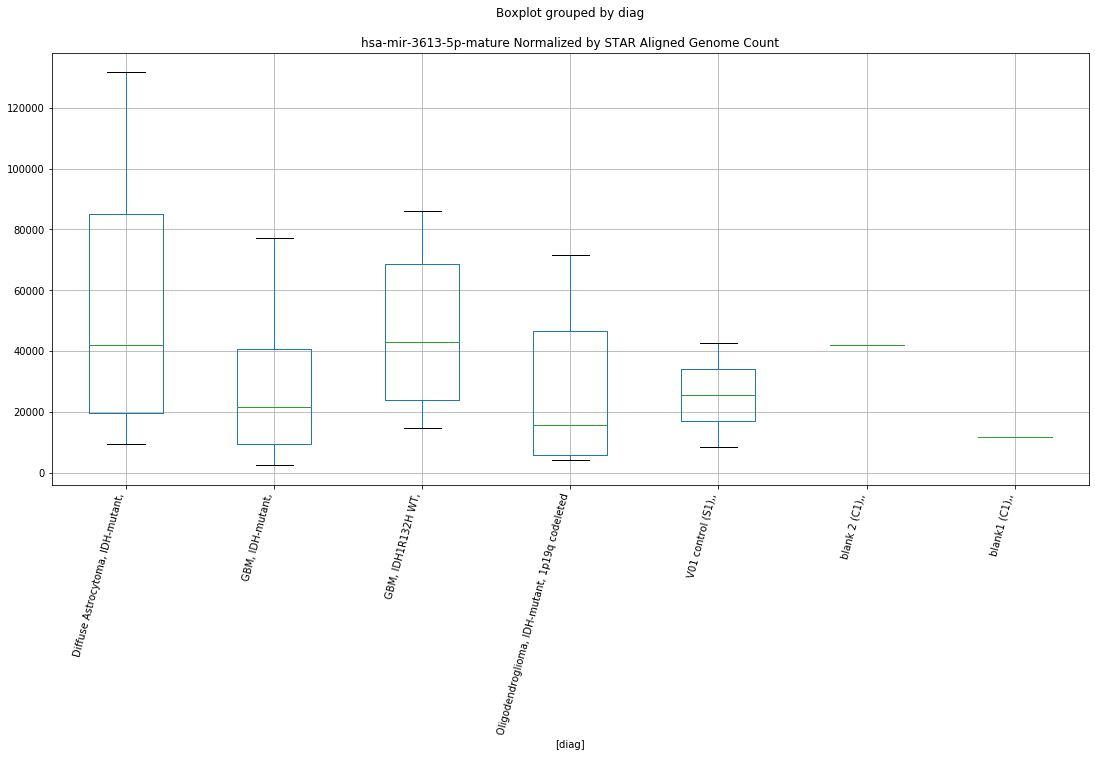

hsa-mir-3613-5p-mature D-plex cutadapt3
	t = -1.788503597563171
	p = 0.0905393480837503


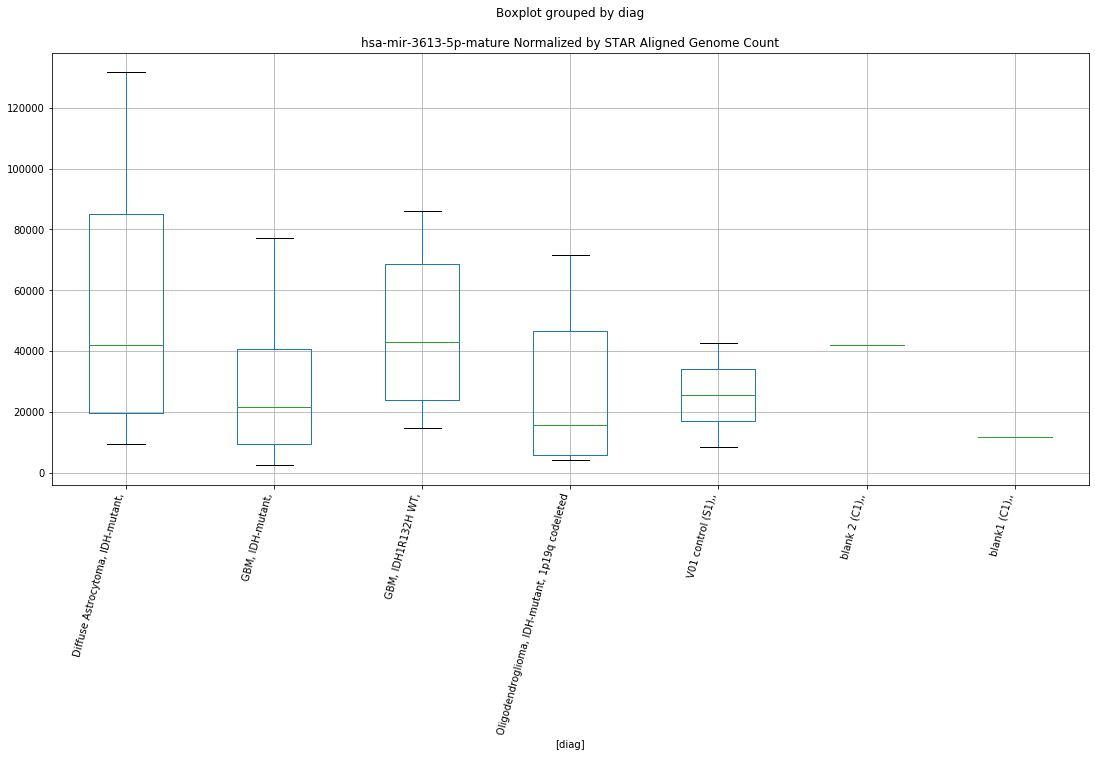

hsa-mir-509-1-hairpin D-plex bbduk2
	t = -2.260578234565838
	p = 0.03641257173291633


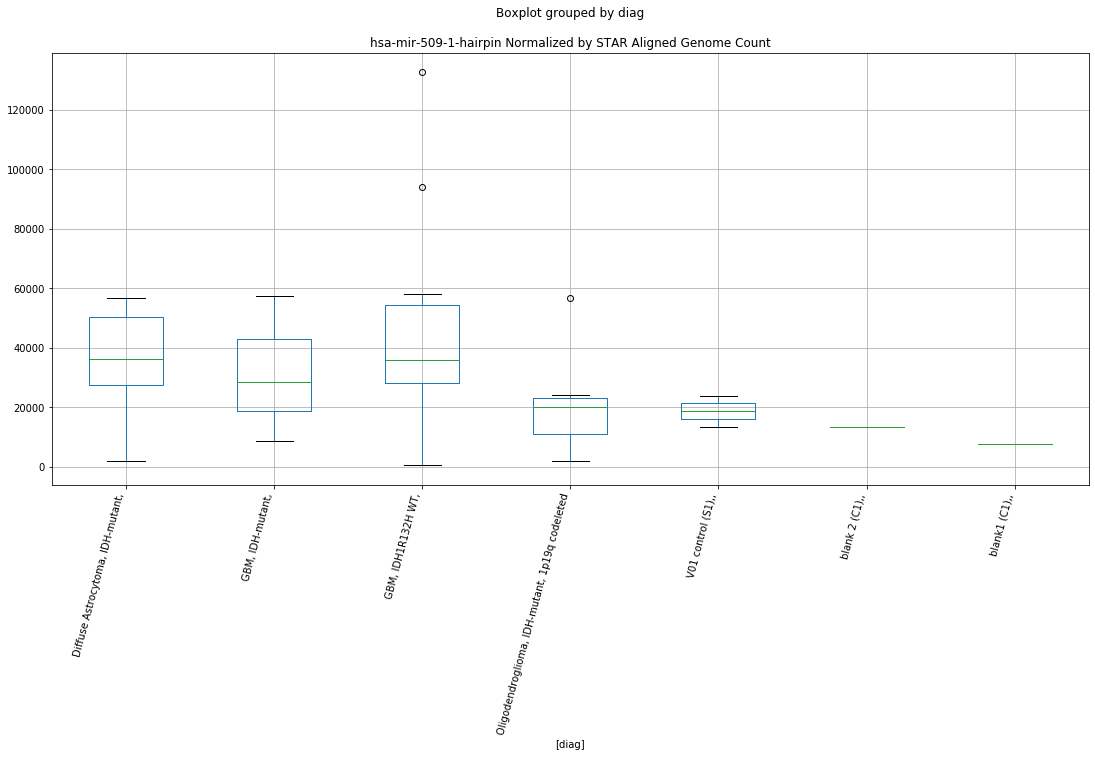

hsa-mir-509-1-hairpin D-plex bbduk3
	t = -2.256250613648643
	p = 0.03673088788752737


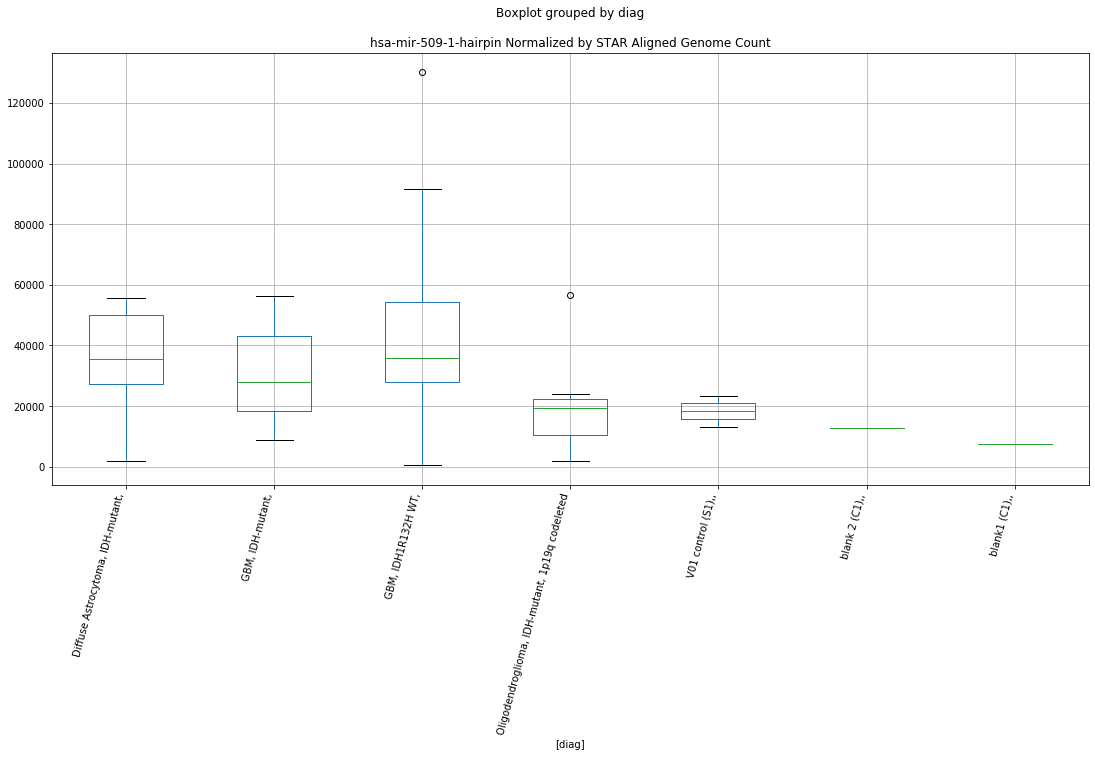

hsa-mir-509-2-hairpin D-plex bbduk2
	t = -2.265319738336312
	p = 0.036066739381782


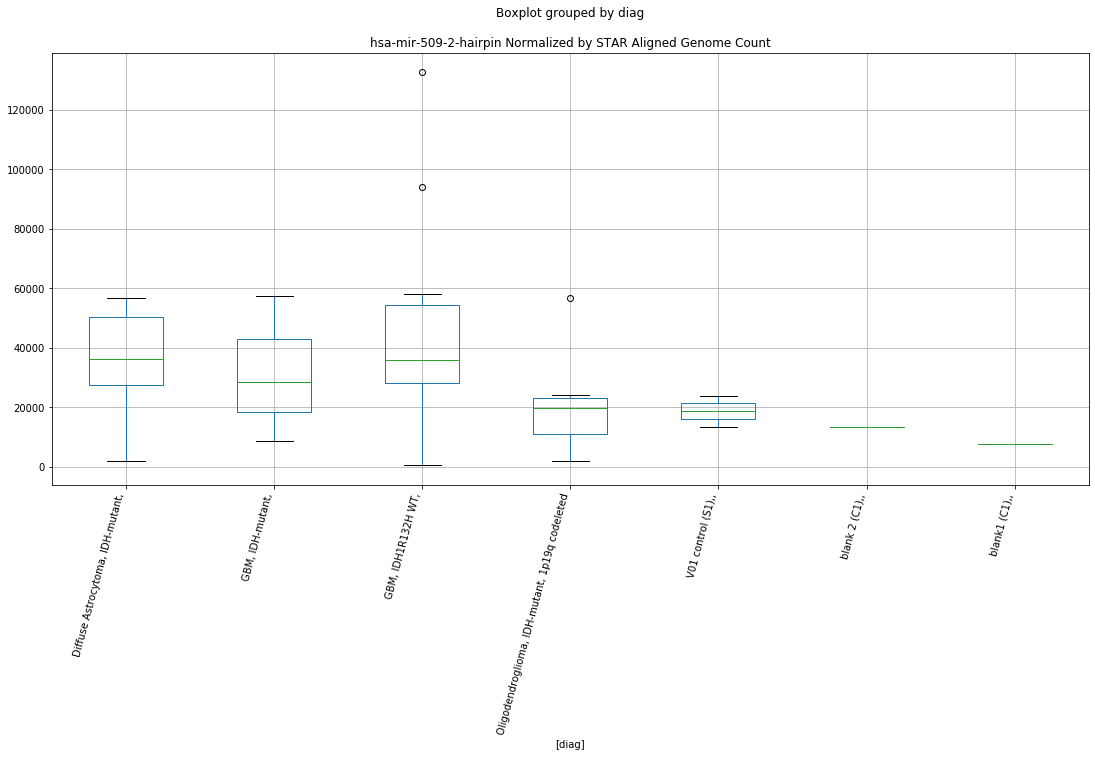

hsa-mir-509-2-hairpin D-plex bbduk3
	t = -2.261001946248567
	p = 0.03638154315658711


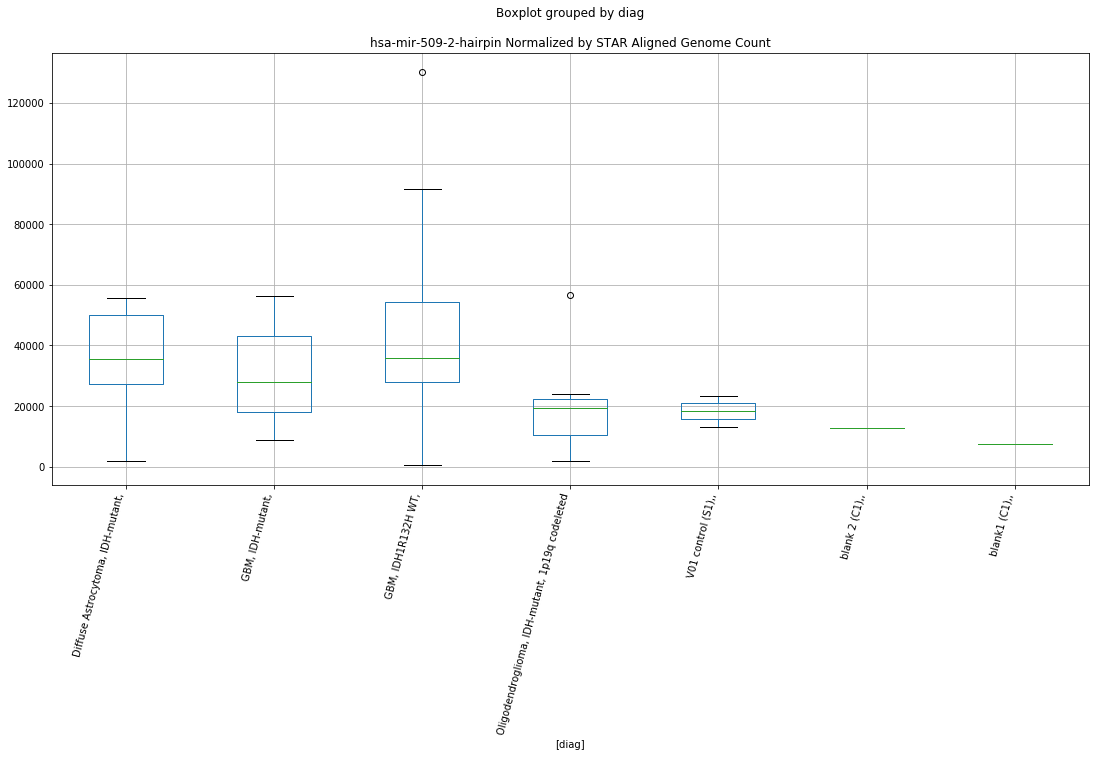

hsa-mir-509-3-hairpin D-plex bbduk2
	t = -2.261290914579137
	p = 0.03636039590132579


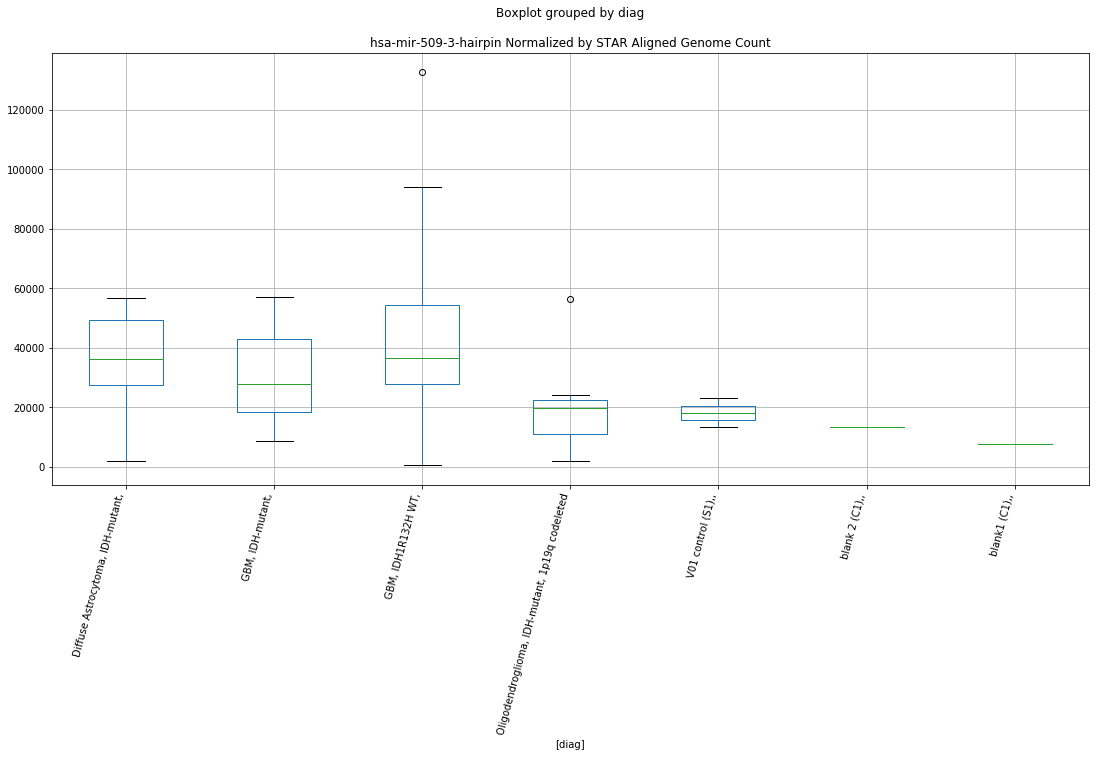

hsa-mir-509-3-hairpin D-plex bbduk3
	t = -2.2386431351841534
	p = 0.03805266417871794


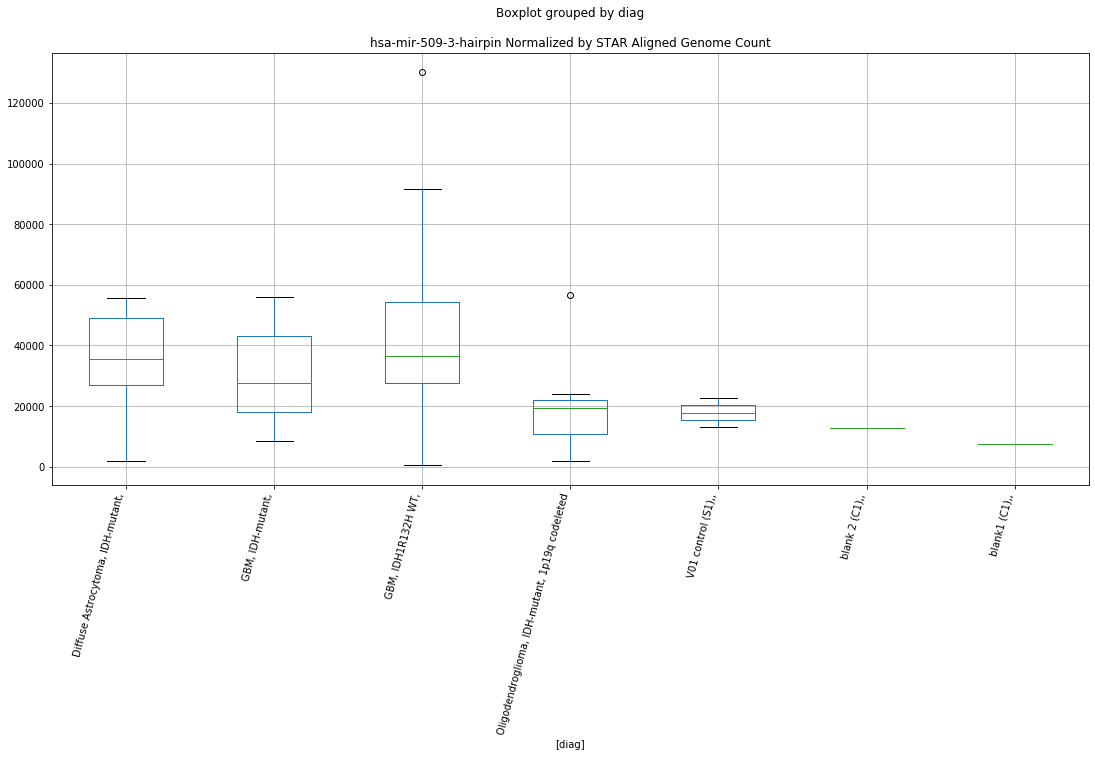

hsa-mir-6787-hairpin D-plex cutadapt1
	t = -1.759219780903865
	p = 0.09552675755959049


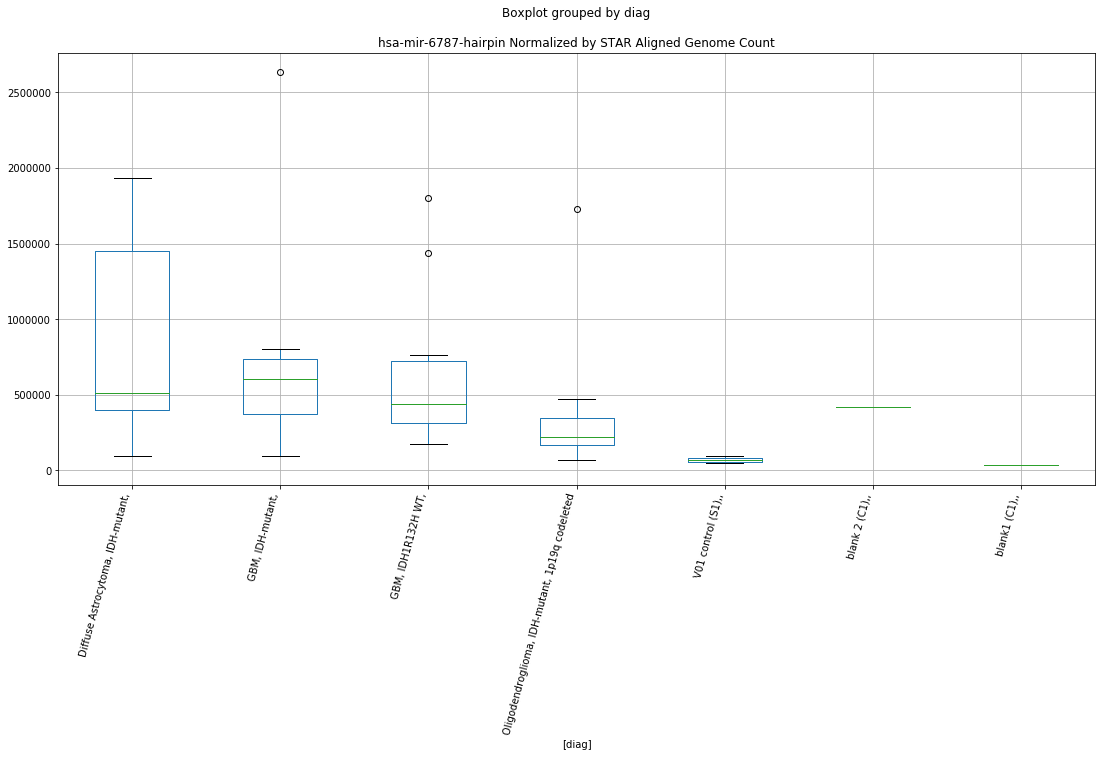

hsa-mir-6787-hairpin D-plex cutadapt2
	t = -1.7529056373119805
	p = 0.09663289734515602


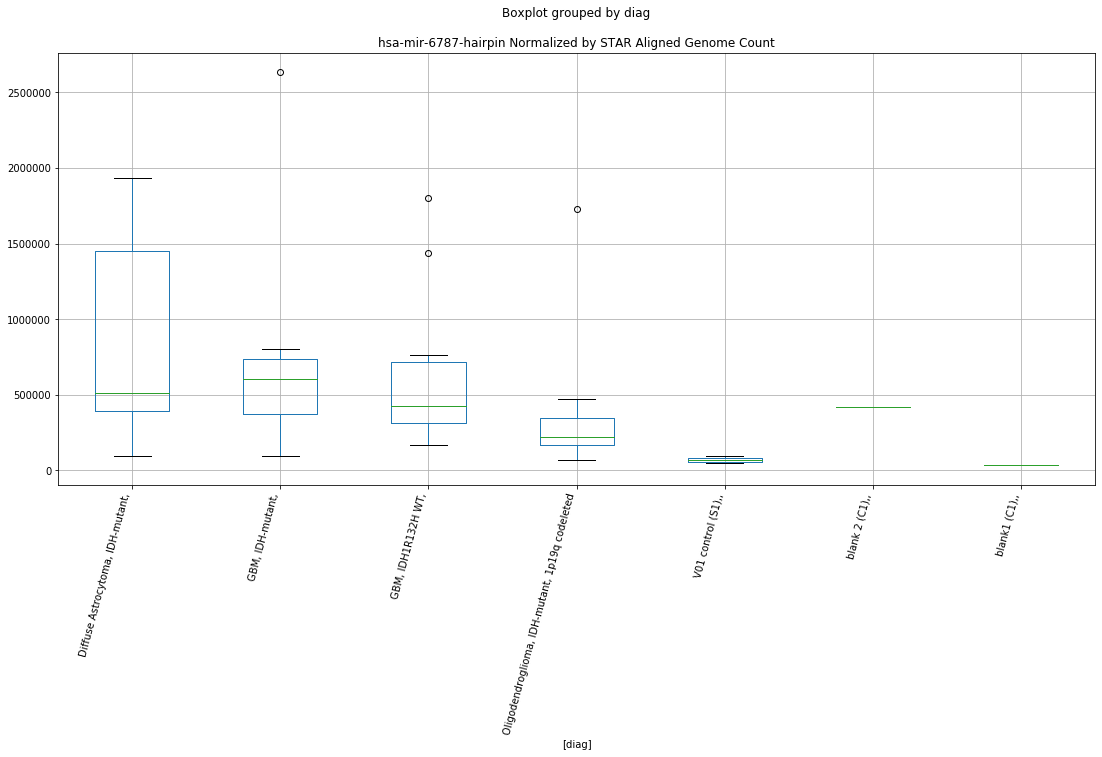

hsa-mir-6787-hairpin D-plex cutadapt3
	t = -1.7528605991603738
	p = 0.09664082707918327


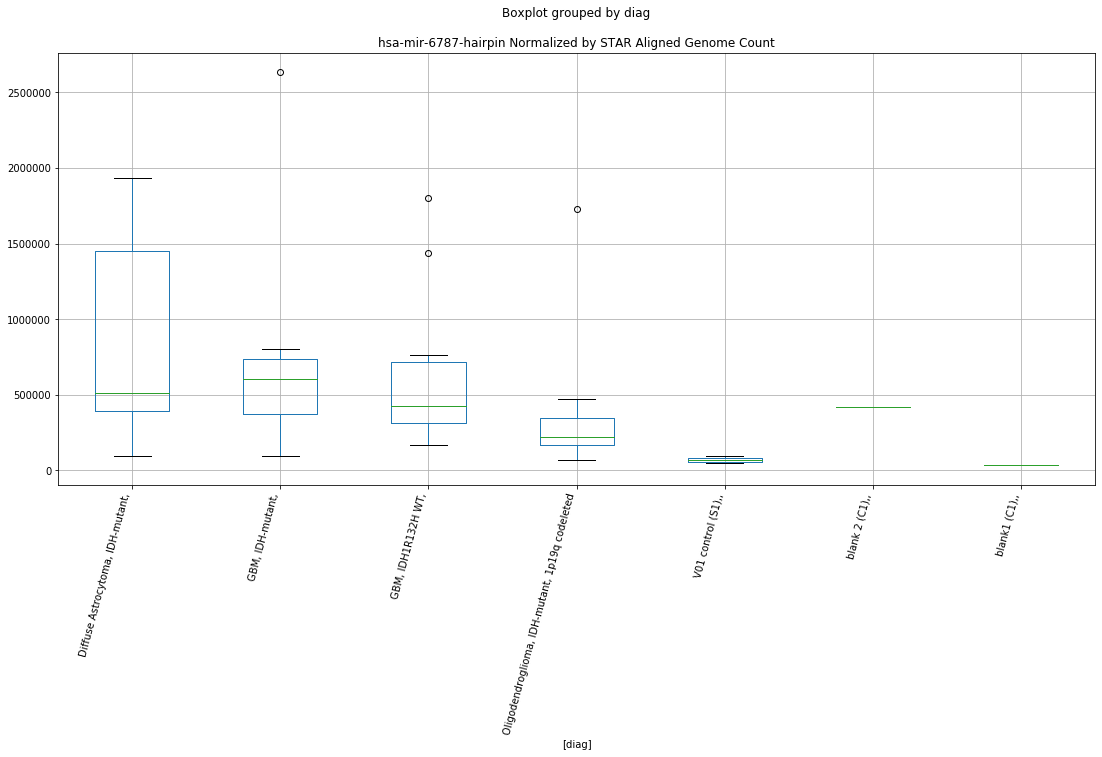

hsa-mir-6887-hairpin D-plex cutadapt1
	t = -1.7402311952410148
	p = 0.09888683086902689


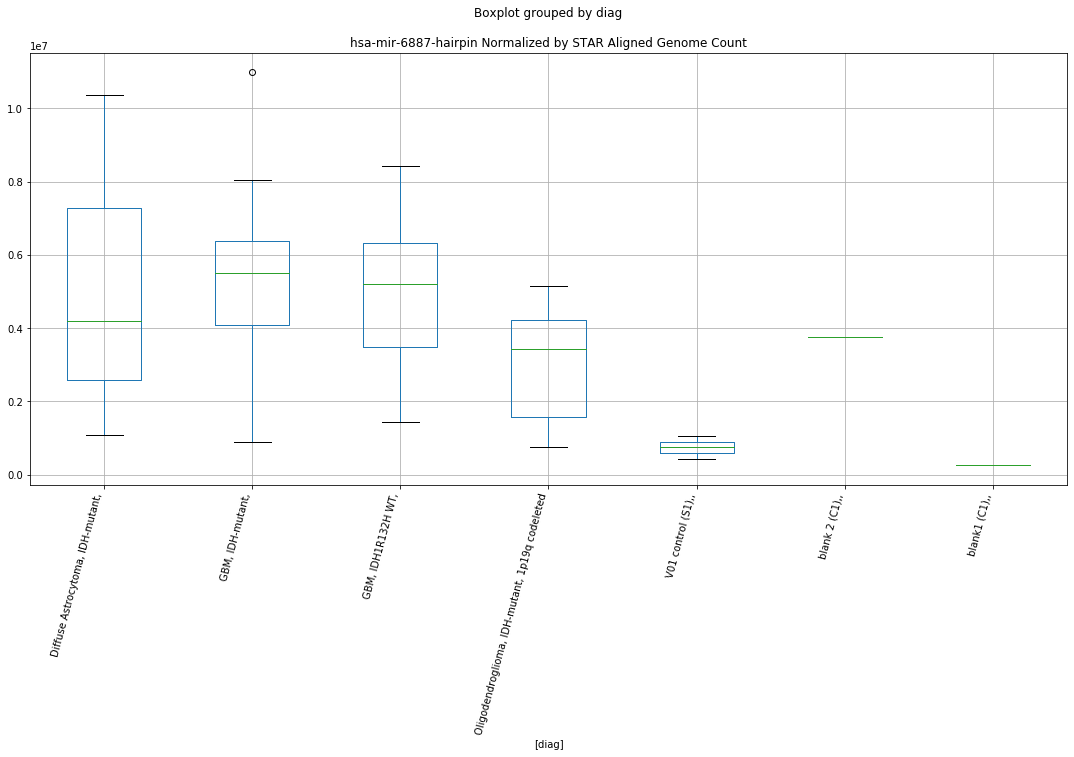

hsa-mir-6887-hairpin D-plex cutadapt2
	t = -1.7347204962993068
	p = 0.099880926514872


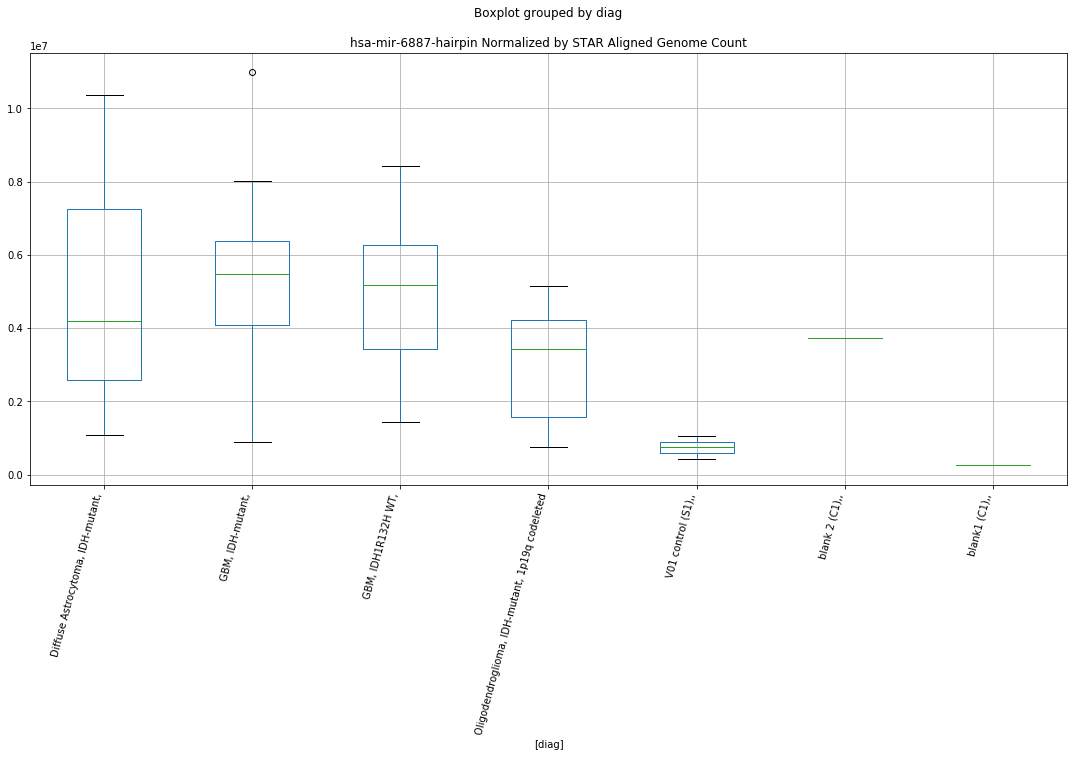

hsa-mir-6887-hairpin D-plex cutadapt3
	t = -1.7346445691345285
	p = 0.09989468345653463


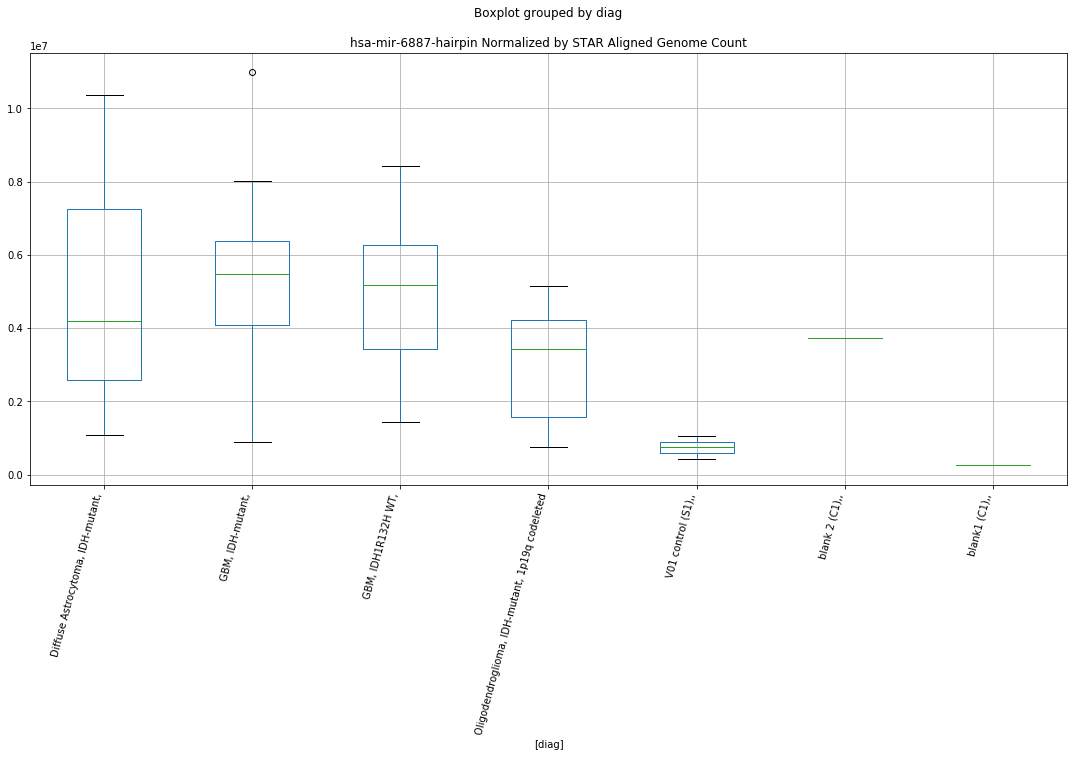

In [75]:
for mirna in mirnas:
    #print()
    for labkit in "D-plex","Lexogen":
        for trimmer in "bbduk1","bbduk2","bbduk3","cutadapt1","cutadapt2","cutadapt3":
            t, p = stats.ttest_ind(
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer) & 
                    (dfn["diag"]=="Oligodendroglioma, IDH-mutant, 1p19q codeleted"))][mirna],
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer) & 
                    (dfn["diag"]=="Diffuse Astrocytoma, IDH-mutant,"))][mirna])
            if p < 0.10:
                print(mirna+" "+labkit+" "+trimmer)
                print("\tt = " + str(t))
                print("\tp = " + str(p))
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer))].boxplot(column=mirna,by=['diag'])
                plt.title(mirna + " Normalized by STAR Aligned Genome Count")
                plt.xticks(rotation=75,ha='right')
                plt.show()


P2RX6 D-plex cutadapt1
	t = -1.931055354649217
	p = 0.06938009245350027


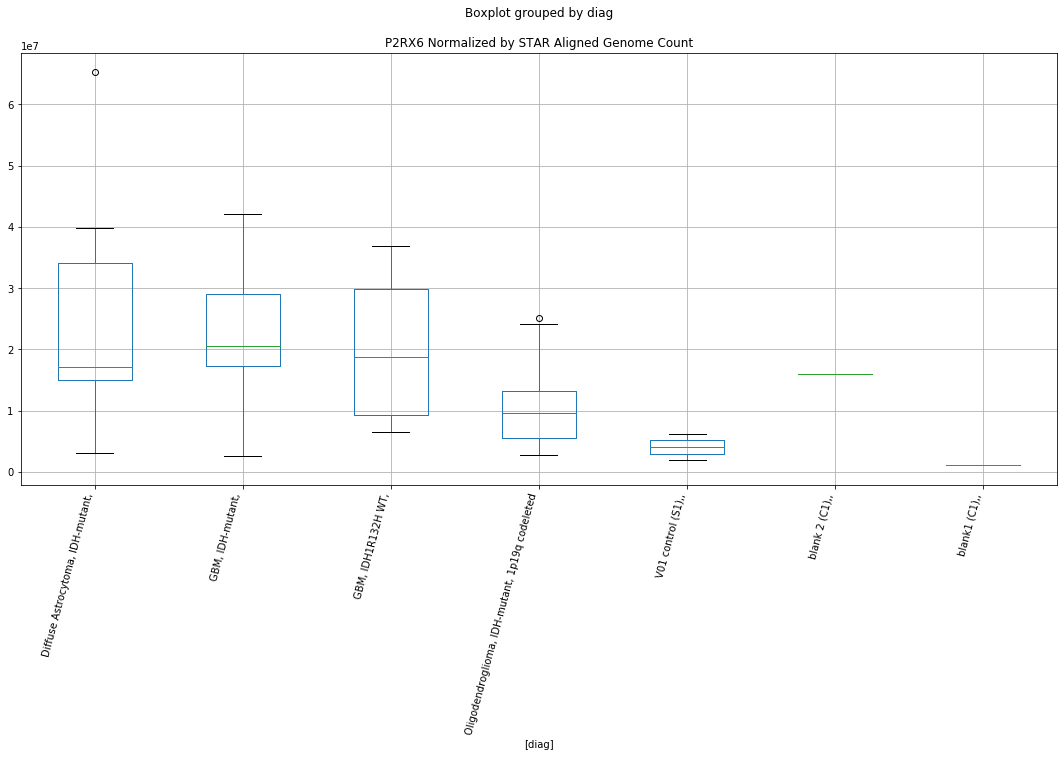

P2RX6 D-plex cutadapt2
	t = -1.9250560798945264
	p = 0.07017337179341243


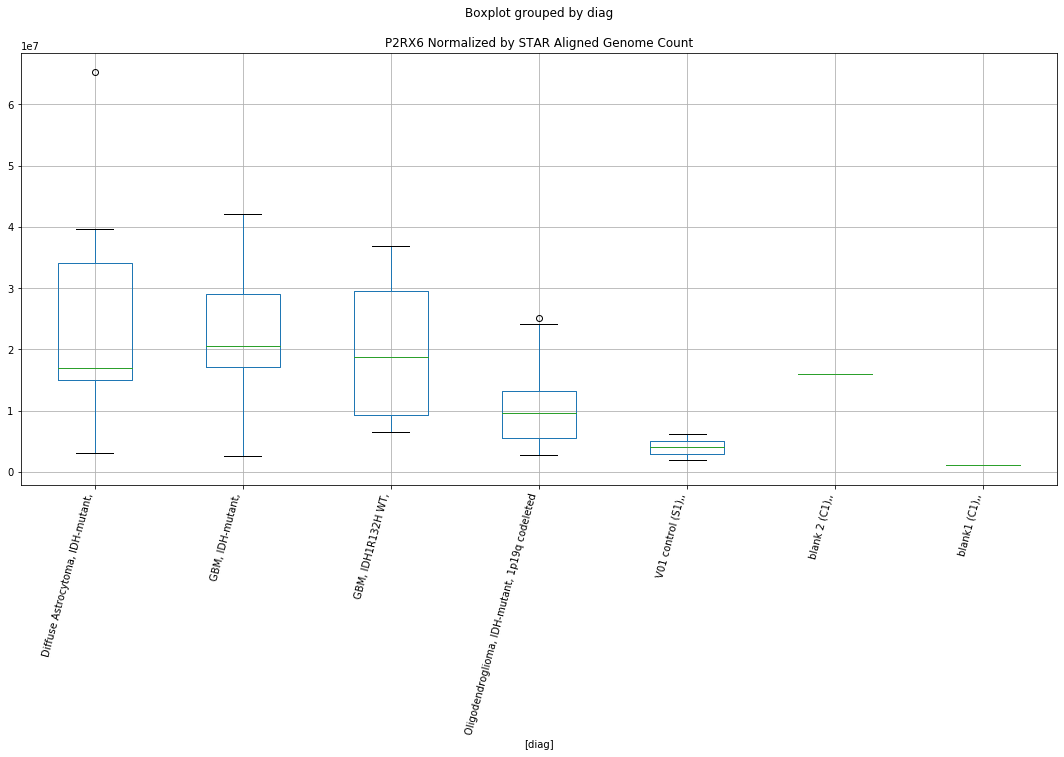

P2RX6 D-plex cutadapt3
	t = -1.9250219932830137
	p = 0.0701779020055468


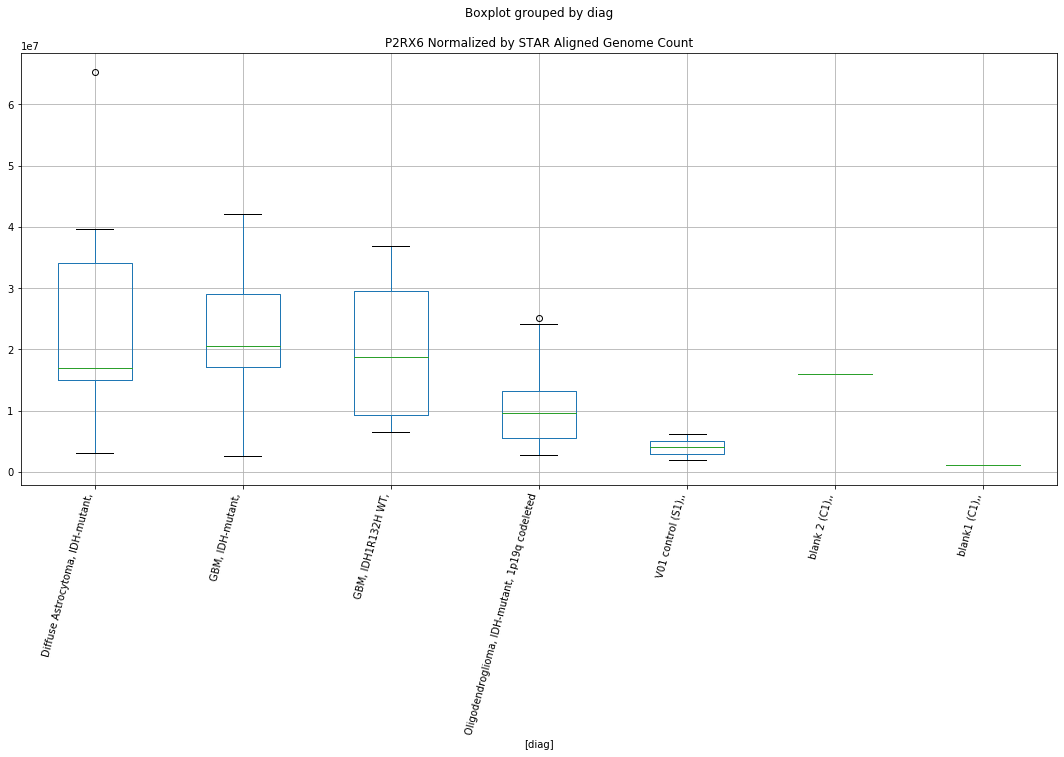

RARS2 Lexogen bbduk1
	t = -1.7468879716268528
	p = 0.09769742238003395


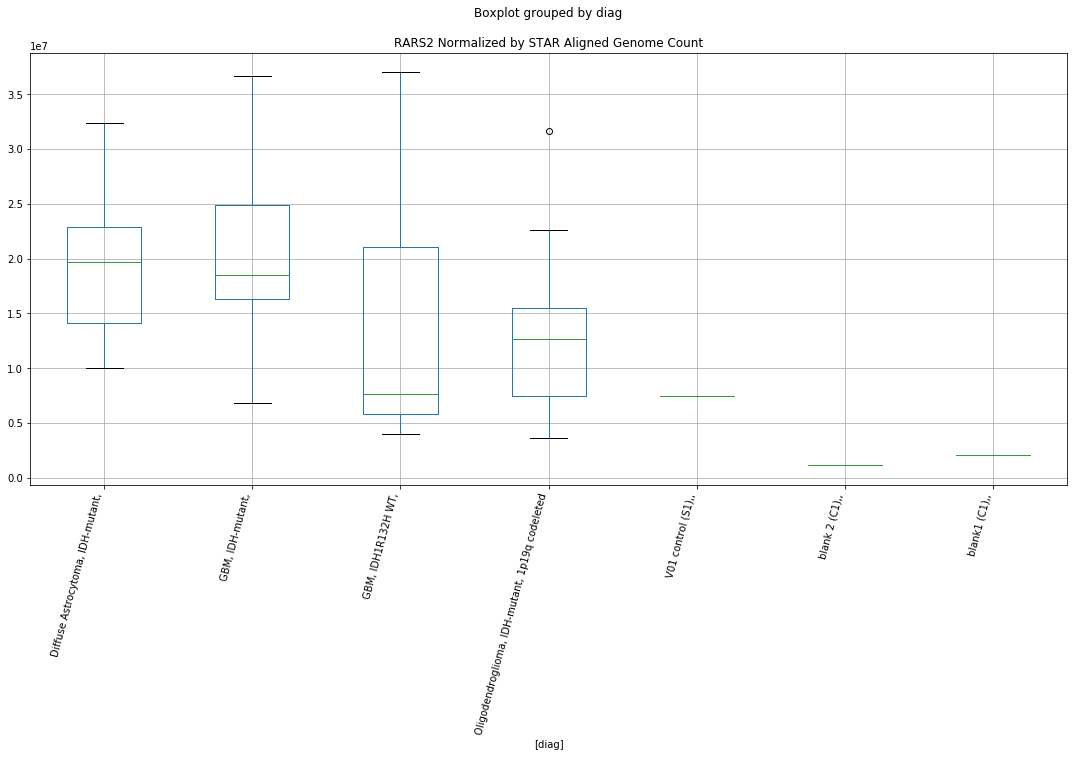

RARS2 Lexogen bbduk2
	t = -1.868551011118478
	p = 0.0780494837759739


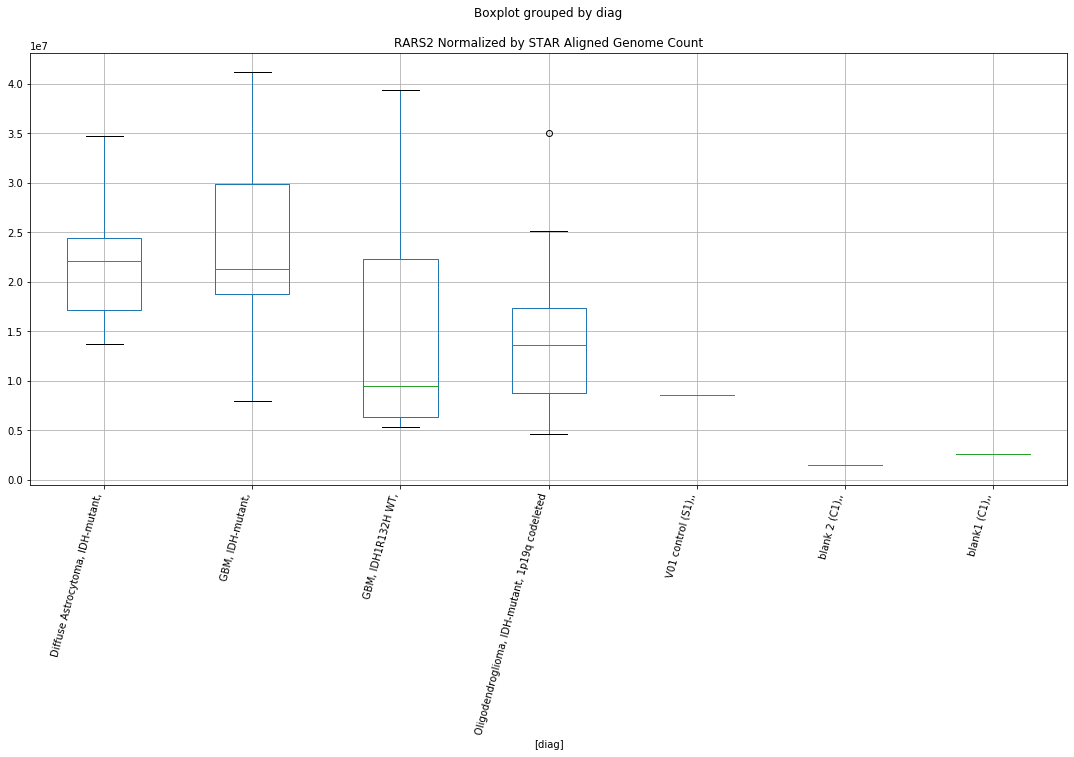

RARS2 Lexogen bbduk3
	t = -1.8601177730188647
	p = 0.07928967698080915


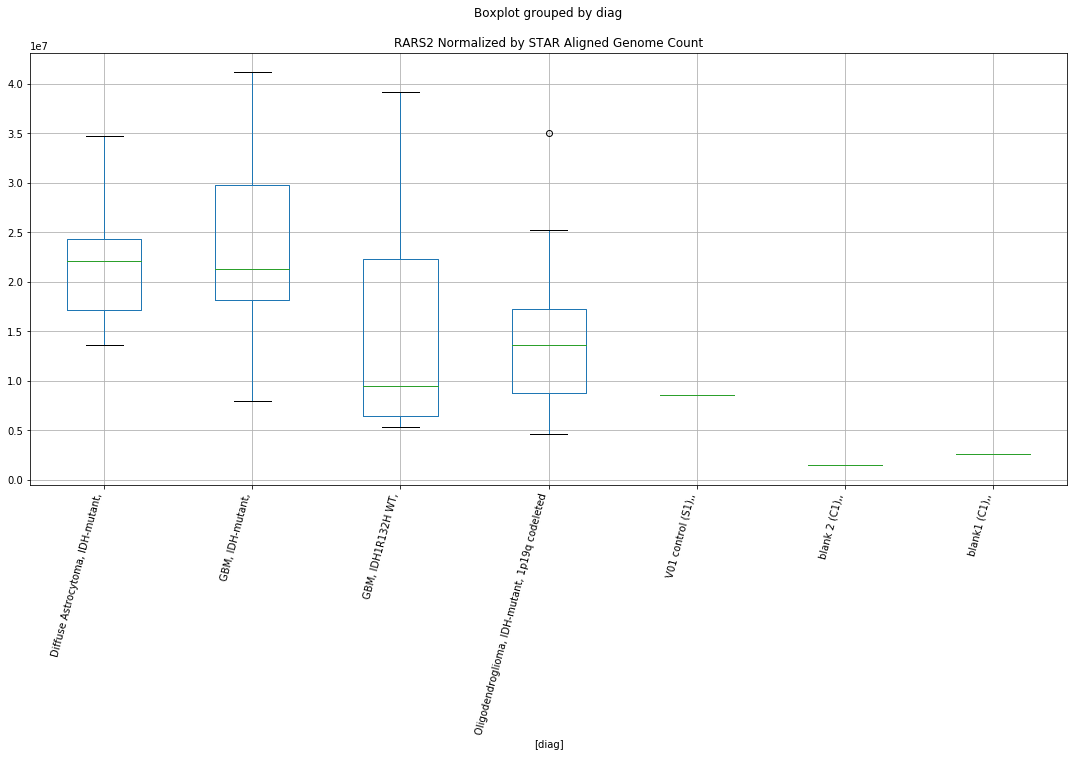

RARS2 Lexogen cutadapt1
	t = -1.892772071353433
	p = 0.07458228949962536


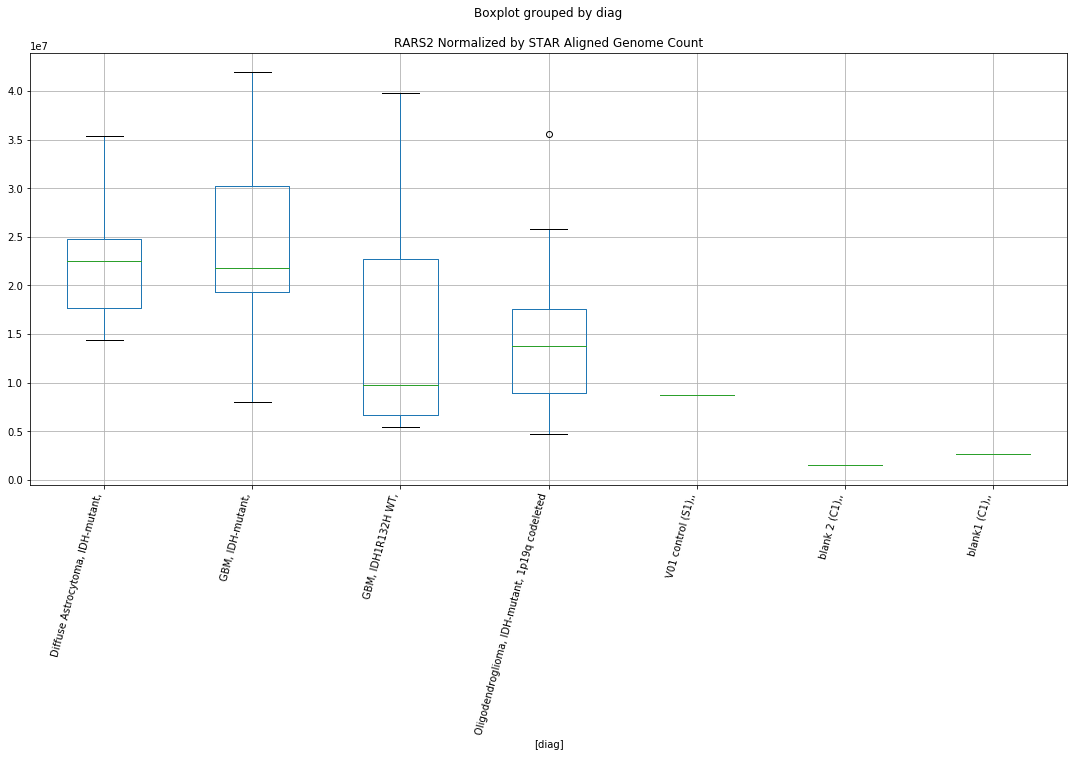

RARS2 Lexogen cutadapt2
	t = -1.8894224966712534
	p = 0.07505350408293146


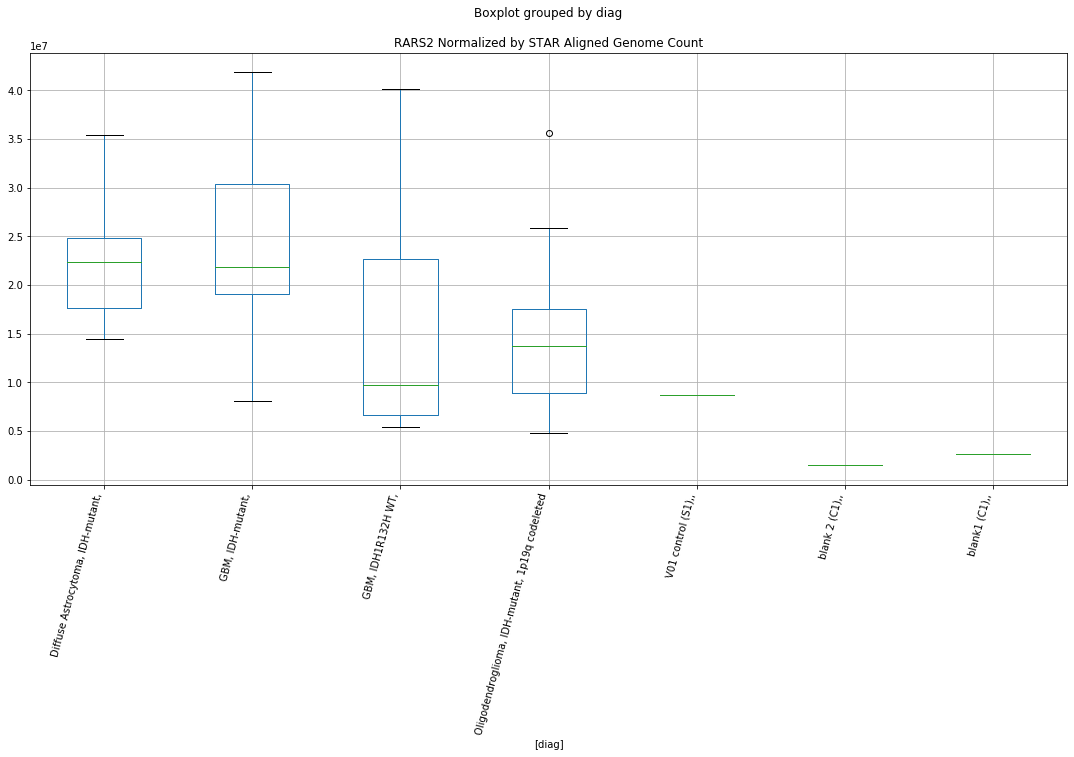

RARS2 Lexogen cutadapt3
	t = -1.8882949155330129
	p = 0.07521272306029042


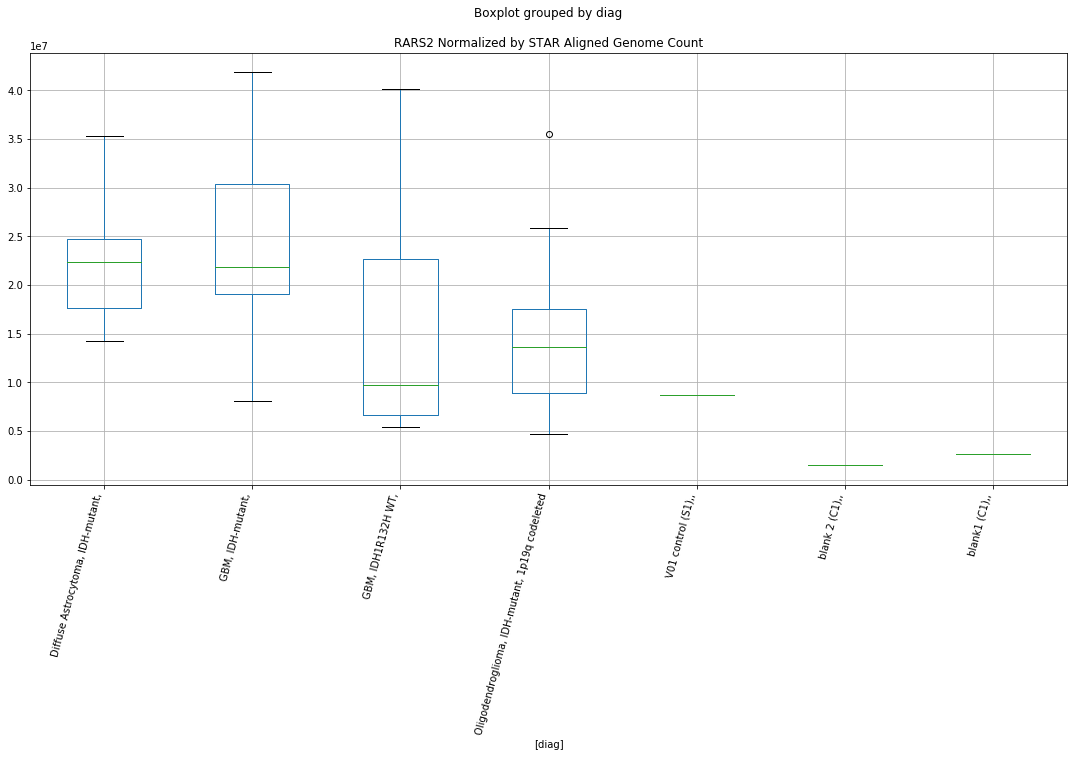

NAALADL2 D-plex cutadapt1
	t = -2.0192829233080554
	p = 0.058603624469312714


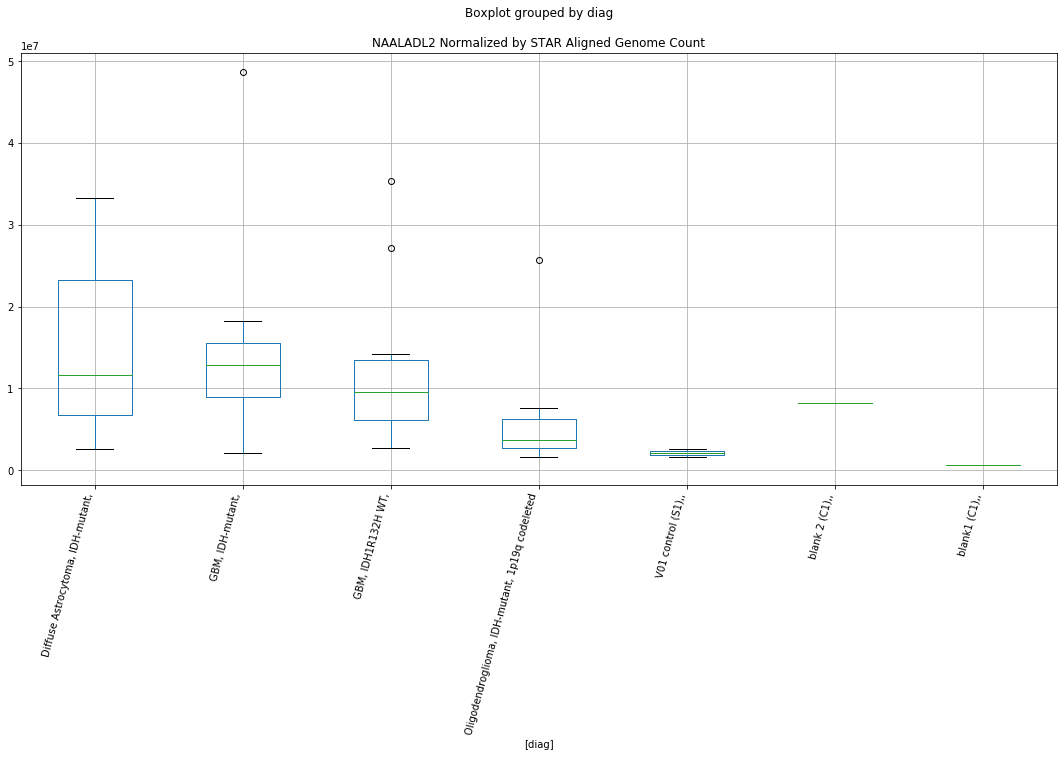

NAALADL2 D-plex cutadapt2
	t = -2.0102179131694524
	p = 0.05963701801081105


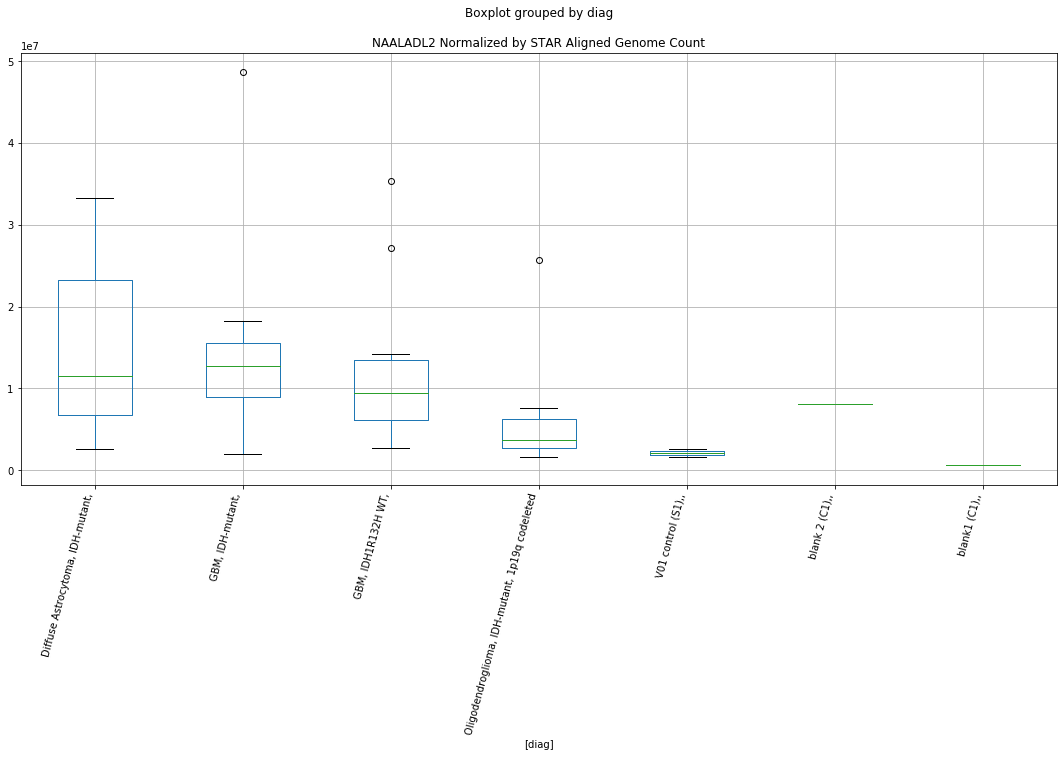

NAALADL2 D-plex cutadapt3
	t = -2.0101890732728953
	p = 0.059640331700353724


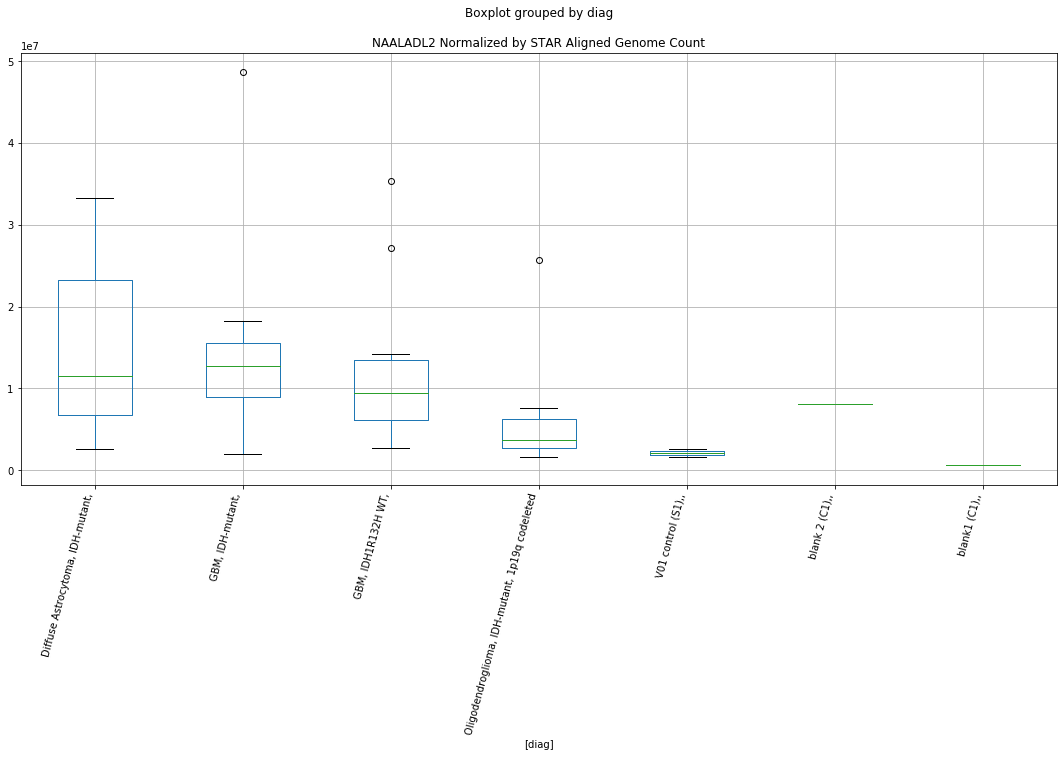

AHDC1 D-plex bbduk2
	t = -1.8708598010400554
	p = 0.07771295228316885


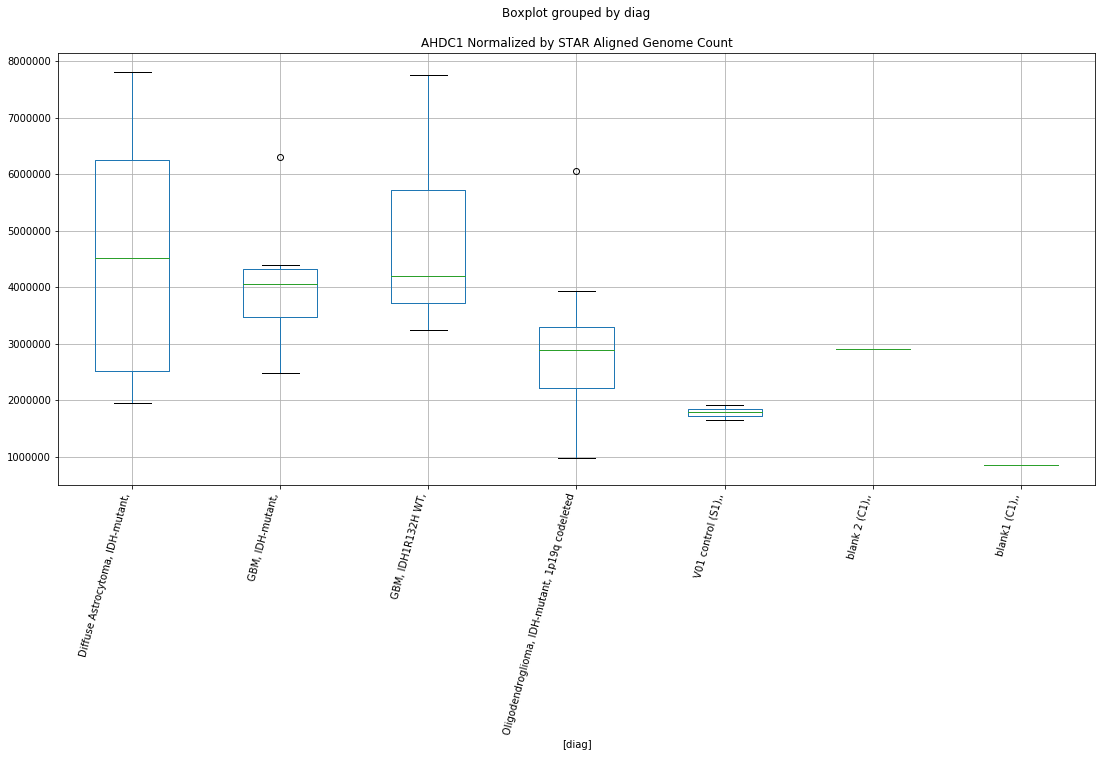

TTC21A D-plex cutadapt1
	t = -1.7488327455171357
	p = 0.09735228548477741


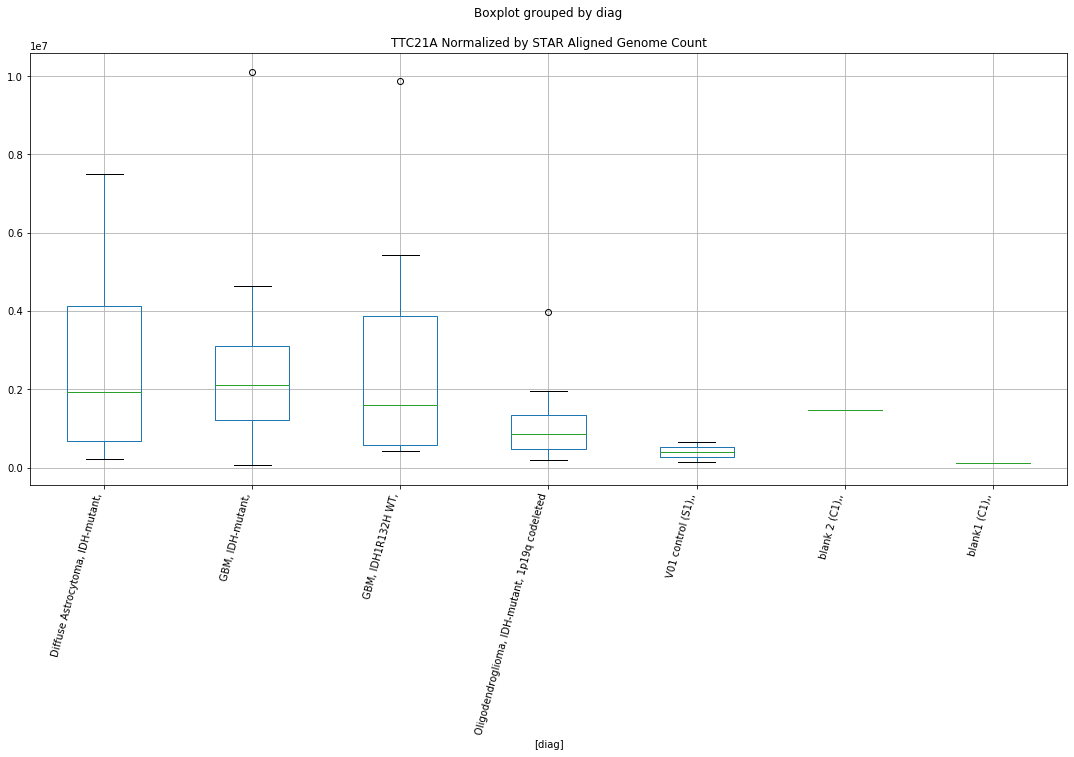

TTC21A D-plex cutadapt2
	t = -1.7457058366227174
	p = 0.09790773236526583


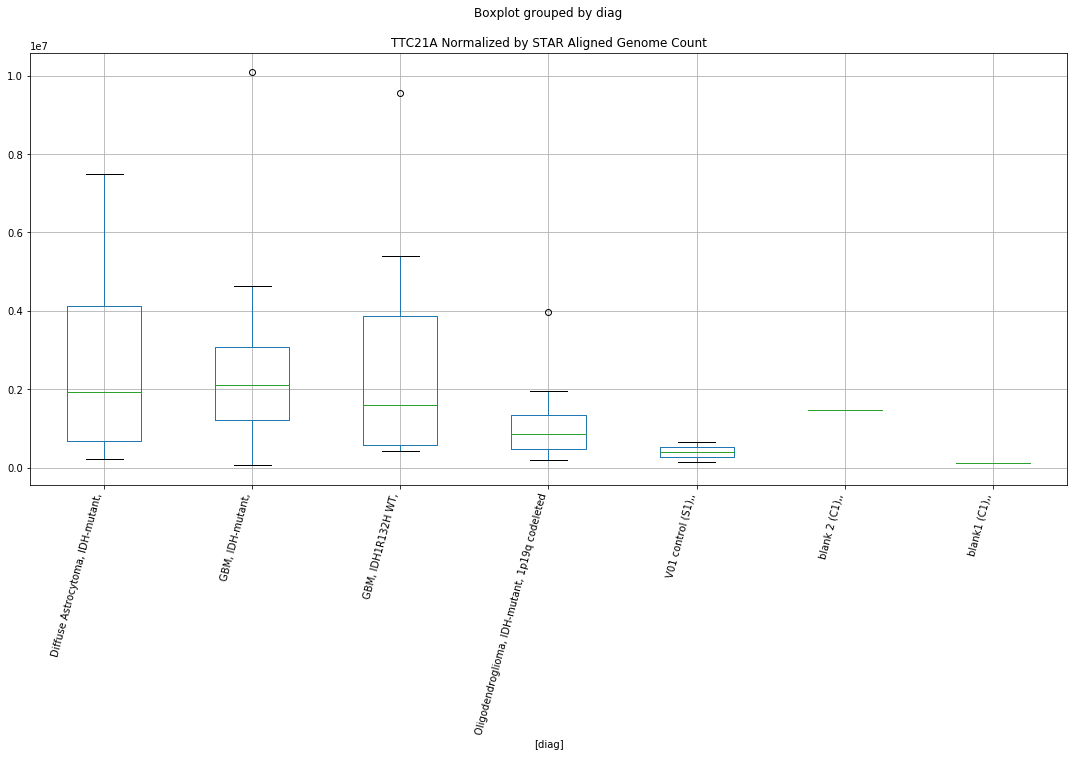

TTC21A D-plex cutadapt3
	t = -1.7456585750166647
	p = 0.09791614868045968


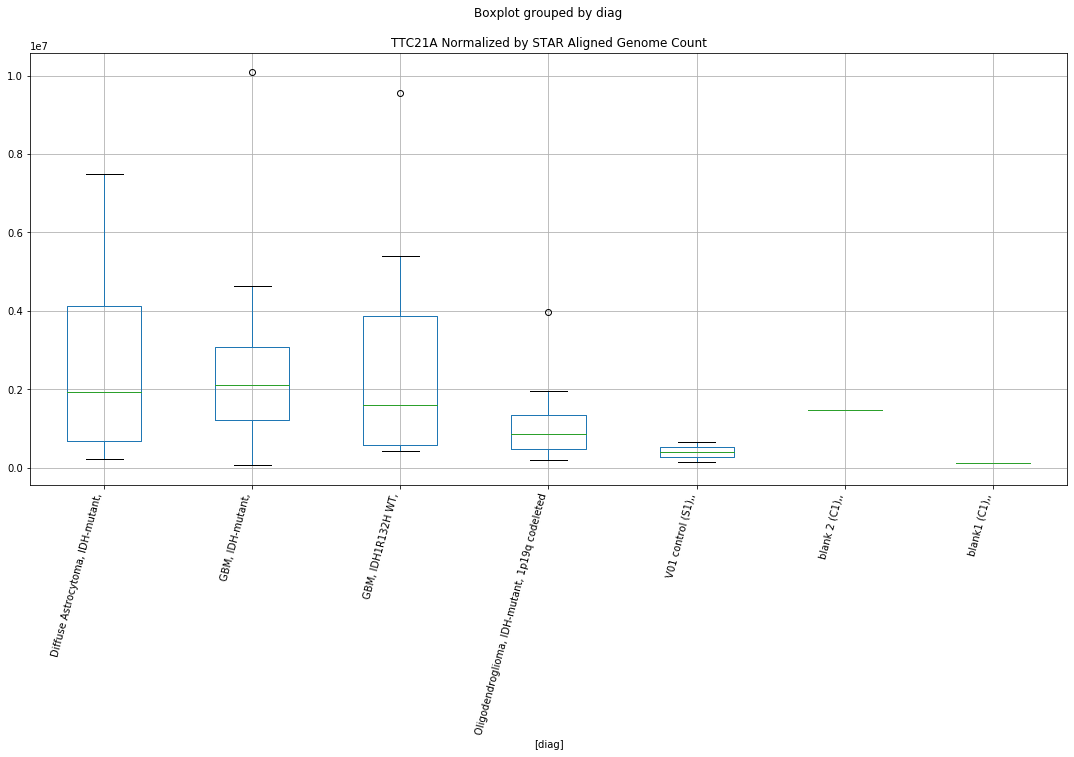

In [76]:
for gene in genes:
    #print()
    for labkit in "D-plex","Lexogen":
        for trimmer in "bbduk1","bbduk2","bbduk3","cutadapt1","cutadapt2","cutadapt3":
            t, p = stats.ttest_ind(
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer) & 
                    (dfn["diag"]=="Oligodendroglioma, IDH-mutant, 1p19q codeleted"))][gene],
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer) & 
                    (dfn["diag"]=="Diffuse Astrocytoma, IDH-mutant,"))][gene])
            if p < 0.10:
                print(gene+" "+labkit+" "+trimmer)
                print("\tt = " + str(t))
                print("\tp = " + str(p))
                dfn[((dfn["Lab kit"]==labkit) & (dfn["Trimmer"]==trimmer))].boxplot(column=gene,by=['diag'])
                plt.title(gene + " Normalized by STAR Aligned Genome Count")
                plt.xticks(rotation=75,ha='right')
                plt.show()


In [77]:
pd.set_option('display.max_columns', default_max_columns)

In [78]:
pd.set_option('display.max_rows',default_max_rows)

In [79]:
pd.set_option('display.precision', default_precision)